# Predicting Football Players Market Value based on their performance


## Author: Nazhad Bari

My Capstone project is on Predicting the Football Players Market Value based on their on-field performance and finding the factors that determines this value. I collected data for all players from Europe's big 5 leagues. In this notebook I will load and combine the datasets, clean and perform exploratory data analysis, wrangling and then preprocess and perform Machine Learning modeling on the data in order to get a data driven understanding about the Market Values.

### Table of Contents

[Introduction](#Introduction)


[Problem Statement](#Problem-Statement)
    

[Value Add](#Value-Add)
    

[Data Collection](#Data-Collection)
    
   - [Transfermarkt dataset](#Transfermarkt-dataset)
   - [Cleaning the Transfermarkt dataset](#Cleaning-the-Transfermarkt-dataset)
   - [fbref dataset](#fbref-dataset)
   - [Cleaning the fbref dataset](#Cleaning-the-fbref-dataset)    
   - [Combining transfermarkt dataset and fbref dataset](#Combining-transfermarkt-dataset-and-fbref-dataset)    
   - [Cleaning the market_stats dataframe](#Cleaning-the-market_stats-dataframe) 
   - [Data Dictionary](#Data-Dictionary)
    
[Exploratory Data Analysis & Feature Engineering](#Exploratory-Data-Analysis-&-Feature-Engineering)

[Modeling](#Modeling)

   - [Linear Regression](#Linear-Regression)
   - [Lasso Regression](#Lasso-Regression)
   - [Ridge Regression](#Ridge-Regression)
   - [Transforming the target variable by taking the log of market_val_amnt_mil](#Transforming-the-target-variable-by-taking-the-log-of-market_val_amnt_mil)
   - [Address the issue of overfitting and multicolinearity](#Address-the-issue-of-overfitting-and-multicolinearity)
   - [KNN Regressor](#KNN-Regressor)
   - [Decision Tree Regressor](#Decision-Tree-Regressor)
   - [Support Vector Regressor](#Support-Vector-Regressor)
   
[Findings](#Findings)

[Conclusion](#Conclusion)

[Drawbacks and Next Steps](#Drawbacks-and-Next-Steps)

## Introduction

The transfer market in Football world is considered one of the most competitive and expensive transactional activities in the world. Football club Chelsea spent around € 200 million in 2021. Top clubs spend large sums of money in the hopes of winning matches, Cups and the hearts of millions of fans. So clubs need to be very careful when they do a transaction in the transfer market. This project focuses on predicting the player market value and the factors that affect this value.

## Problem Statement

- Using Machine Learning can we predict the Market Value of Football Players based on their on-field performance?
- What are the key predictors in determining this value? 

## Value Add

Clubs spend millions of dollars in buying potential players at the Transfer Market. But often after the signing, the
player in question underperforms. So, the question is what truly dictates a player’s market value? Is it the on-field performance of that player, is it the player’s persona or is it their ability to generate sponsorship revenue that dictates the player’s true valuation? This model will help clubs who wants to be at the top of their leagues by efficiently spending in the transfer market by focusing on what is valuable for them – their on-field success.

Let me first import the required packages needed for the analysis.

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# %config InlineBackend.figure_format='retina'

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

/Users/nazhadbari/opt/anaconda3/envs/boosting/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Collection

Two types of datasets has been acquired for this project from 2 different websites:
- [Transfermarkt dataset](https://github.com/d2ski/football-transfers-data) - containing player information and their Transfer Market Value.
- [fbref datasets](https://fbref.com/en/) - containing player on-field performance statistics data (10 datasets from the years 2011 to 2021) .

First I will load the **Transfermarkt dataset** containing the player information and Tranfer Market Values.

### Transfermarkt dataset

In [2]:
# load in our Transfermarket dataset
raw_transfer = pd.read_csv('Data/transfers.csv')
# looking at the first 5 rows of the data frame
raw_transfer.head()

league  season window  team_id          team_name team_country dir  \
0    GB1    2009      s      985  Manchester United      England  in   
1    GB1    2009      s      985  Manchester United      England  in   
2    GB1    2009      s      985  Manchester United      England  in   
3    GB1    2009      s      985  Manchester United      England  in   
4    GB1    2009      s      985  Manchester United      England  in   

   player_id       player_name  player_age  ... counter_team_id  \
0      33544  Antonio Valencia        23.0  ...            1071   
1      62049        Mame Diouf        21.0  ...             687   
2      43261   Gabriel Obertan        20.0  ...              40   
3       1397      Michael Owen        29.0  ...             762   
4      73538     Scott Moffatt        18.0  ...            5242   

       counter_team_name counter_team_country transfer_fee_amnt  \
0         Wigan Athletic              England        18800000.0   
1               Molde FK               Norway         4500000.0   
2  FC Girondins Bordeaux               France         4000000.0   
3       Newcastle United              England               0.0   
4  Manchester United U18              England               NaN   

  market_val_amnt is_free  is_loan  is_loan_end  is_retired  transfer_id  
0             NaN   False    False        False       False       310832  
1       1600000.0   False    False        False       False       319841  
2        400000.0   False    False        False       False       315185  
3             NaN    True    False        False       False       306421  
4             NaN   False    False        False       False       339015  

[5 rows x 23 columns]

The transfermarket dataset has been loaded into a pandas dataframe and named "***raw_transfer***". I will now look at the columns in the dataset.

In [3]:
# peeking into the columns of the dataframe
print("The Transfermarket DataFrame columns:")
print(raw_transfer.columns)

The Transfermarket DataFrame columns:
Index(['league', 'season', 'window', 'team_id', 'team_name', 'team_country',
       'dir', 'player_id', 'player_name', 'player_age', 'player_nation',
       'player_nation2', 'player_pos', 'counter_team_id', 'counter_team_name',
       'counter_team_country', 'transfer_fee_amnt', 'market_val_amnt',
       'is_free', 'is_loan', 'is_loan_end', 'is_retired', 'transfer_id'],
      dtype='object')


Looking at the shape of the dataset, I can see there are **70006 rows** and **23 columns** in the dataset.

In [4]:
# Take a look at the shape of the dataframe
print(f'There are {raw_transfer.shape[0]} rows and {raw_transfer.shape[1]} columns in the dataset.')

There are 70006 rows and 23 columns in the dataset.


I will now look at the summary of each of the columns in the dataset.

In [5]:
# get the summary of the data frame
raw_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70006 entries, 0 to 70005
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   league                70006 non-null  object 
 1   season                70006 non-null  int64  
 2   window                70006 non-null  object 
 3   team_id               70006 non-null  int64  
 4   team_name             70006 non-null  object 
 5   team_country          70006 non-null  object 
 6   dir                   70006 non-null  object 
 7   player_id             70006 non-null  int64  
 8   player_name           70006 non-null  object 
 9   player_age            69990 non-null  float64
 10  player_nation         70001 non-null  object 
 11  player_nation2        23181 non-null  object 
 12  player_pos            70006 non-null  object 
 13  counter_team_id       70006 non-null  object 
 14  counter_team_name     70006 non-null  object 
 15  counter_team_countr

Before I move forward, I will first try to understand each of the variables. There are 70006 rows and 23 columns in the dataset. Among the 23 columns, there are 7 numeric datatype variables, 4 boolean datatype variables and 12 object or categorical variables.

The variables are described below:

- `league` - Football league the player is currently playing in
- `season` - year the Market Value was reported
- `window` - the time of the year the Market Value was recorded (s represents summer and w represents winter)
- `team_id` - player's current team ID used by the Transfermarkt site
- `team_name` - team the player currently plays for
- `team_country` - team country the player currently plays for 
- `dir` - direction of the transfer (in or left)
- `player_id` - player's ID used by Transfermarkt site
- `player_name` - name of the player
- `player_age` - player's age
- `player_nation` - player's nationality
- `player_nation2` - player's second nationality if any
- `player_pos` - on-field position of the player
- `counter_team_id` - counter team's ID used by Transfermarkt site
- `counter_team_name` - the team they left
- `counter_team_country` - country of the team they left
- `transfer_fee_amnt` - player Transfer fee amount in EUR
- `market_val_amnt` - player's Market Value in EUR estimated by Transfermarkt
- `is_free` - is the player a free transfer (True or False)
- `is_loan` - is the player a loan transfer (True or False)
- `is_loan_end` - the player's end of loan transfer (True or False)
- `is_retired` - is the player retired (True or False)
- `transfer_id` - transfer's ID used by Transfermarkt site

### Cleaning the Transfermarkt dataset

I will first look at the values in the column `season` which returns the value of the year the Market Value has been reported.

In [6]:
# Look at the values of the column season
raw_transfer['season'].value_counts()

2014    5868
2015    5777
2019    5725
2013    5654
2016    5620
2017    5618
2018    5572
2011    5504
2012    5399
2010    5170
2020    5140
2009    4931
2021    4028
Name: season, dtype: int64

Since I'll be using 10 years data from 2011 to 2021 for this project, I'll remove the years 2009 and 2010 from the dataset.

In [7]:
# Remove the years 2009 and 2010
raw_transfer.drop(raw_transfer.index[raw_transfer['season'] == 2009], inplace=True)
raw_transfer.drop(raw_transfer.index[raw_transfer['season'] == 2010], inplace=True)
# Check the values of player_age
raw_transfer['season'].value_counts()

2014    5868
2015    5777
2019    5725
2013    5654
2016    5620
2017    5618
2018    5572
2011    5504
2012    5399
2020    5140
2021    4028
Name: season, dtype: int64

I have removed the years 2009 to 2010. Just for a sanity check I'll look at the data again.

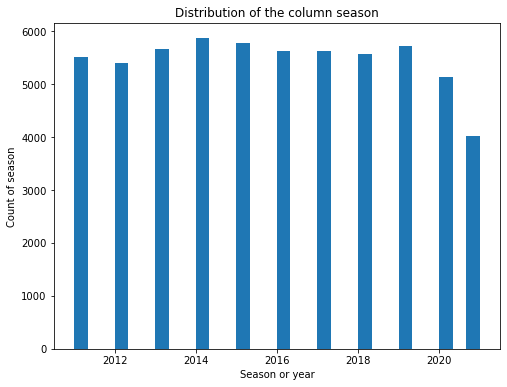

In [18]:
# Visualize the column season
plt.figure(figsize=(8,6))
plt.hist(raw_transfer['season'], bins=30)
plt.xlabel('Season or year')
plt.ylabel('Count of season')
plt.title('Distribution of the column season')

plt.show()

In [19]:
# Sanity check by looking at the first 5 records
raw_transfer.head()

league  season window  team_id                team_name team_country dir  \
1906    GB1    2011      s      543  Wolverhampton Wanderers      England  in   
1907    GB1    2011      s      543  Wolverhampton Wanderers      England  in   
1908    GB1    2011      s      543  Wolverhampton Wanderers      England  in   
1909    GB1    2011      s      543  Wolverhampton Wanderers      England  in   
1910    GB1    2011      s      543  Wolverhampton Wanderers      England  in   

      player_id      player_name  player_age  ... counter_team_id  \
1906      42751    Roger Johnson        28.0  ...             337   
1907      38090     Jamie O'Hara        24.0  ...             148   
1908       6404   Dorus de Vries        30.0  ...            2288   
1909     145923  Michael Ihiekwe        18.0  ...           12801   
1910     145488    Johnny Gorman        18.0  ...           12801   

                counter_team_name counter_team_country transfer_fee_amnt  \
1906              Birmingham City              England         8000000.0   
1907            Tottenham Hotspur              England         3750000.0   
1908                 Swansea City              England               0.0   
1909  Wolverhampton Wanderers U18              England               NaN   
1910  Wolverhampton Wanderers U18              England               NaN   

     market_val_amnt is_free  is_loan  is_loan_end  is_retired  transfer_id  
1906             NaN   False    False        False       False       601911  
1907             NaN   False    False        False       False       587742  
1908             NaN    True    False        False       False       588551  
1909        450000.0   False    False        False       False      1070842  
1910             NaN   False    False        False       False       638479  

[5 rows x 23 columns]

Now I'll take a look at the values in the column `league`. This column return the Football league the player is currently playing in.

In [20]:
# Look at the values of the column league
raw_transfer['league'].value_counts()

IT1    13995
PO1     9589
GB1     9255
ES1     7618
FR1     7052
NL1     6369
L1      6027
Name: league, dtype: int64

The column `league` returns the following values:

- GB1 : ENGLISH PREMIER LEAGUE
- ES1 : LA LIGA
- IT1 : SERIE A
- L1 : BUNDESLIGA
- FR1 : FRENCH LIGUE 1
- PO1 : LIGA PORTUGAL BWIN
- NL1 : DUTCH EREDIVISIE

I'll be working with only the top 5 leagues in Europe in this project, namely GB1 (ENGLISH PREMIER LEAGUE), ES1 (LA LIGA), IT1 (SERIE A), L1 (BUNDESLIGA) and FR1 (FRENCH LIGUE 1). So I'll remove PO1 (LIGA PORTUGAL BWIN) and NL1 (DUTCH EREDIVISIE) from the dataframe.

In [21]:
# Dropping the PO1
raw_transfer = raw_transfer[raw_transfer["league"].str.contains("PO1") == False]
# Dropping the NL1
raw_transfer = raw_transfer[raw_transfer["league"].str.contains("NL1") == False]

In [22]:
# Check the values of league
raw_transfer['league'].value_counts()

IT1    13995
GB1     9255
ES1     7618
FR1     7052
L1      6027
Name: league, dtype: int64

Looking at the values of the column again I can see that the column now returns the 5 leagues. I'll also rename the names of the leagues so that they are more understandable.

In [23]:
# Rename the league names with proper names
raw_transfer['league'] = raw_transfer['league'].replace({"GB1": "Premier League"})
raw_transfer['league'] = raw_transfer['league'].replace({"IT1": "Serie A"})
raw_transfer['league'] = raw_transfer['league'].replace({"ES1": "La Liga"})
raw_transfer['league'] = raw_transfer['league'].replace({"FR1": "Ligue 1"})
raw_transfer['league'] = raw_transfer['league'].replace({"L1": "Futball-Bundesliga"})

# Check the values again
raw_transfer['league'].value_counts()

Serie A               13995
Premier League         9255
La Liga                7618
Ligue 1                7052
Futball-Bundesliga     6027
Name: league, dtype: int64

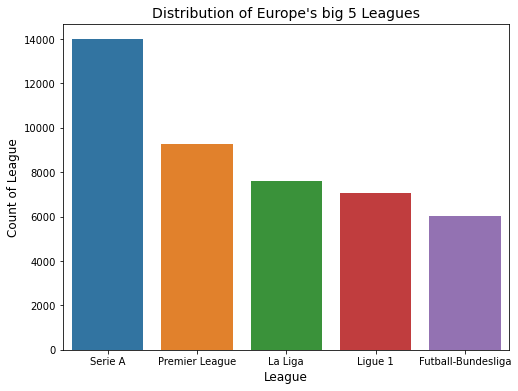

In [26]:
# Visualizing the distribution of league
plt.figure(figsize=(8,6))
sns.barplot(raw_transfer['league'].value_counts().index, raw_transfer['league'].value_counts().values)
plt.xlabel('League', fontsize=12)
plt.ylabel('Count of League', fontsize=12)
plt.title("Distribution of Europe's big 5 Leagues", fontsize=14)

plt.show()   

The league names have been renamed. I will now take a look at the `dir` column. 

In [27]:
# Check the values of the column dir
raw_transfer['dir'].value_counts()

left    24742
in      19205
Name: dir, dtype: int64

The `dir` column returns 2 values. "left" represents the data for players who had a left a particular team while "in" represents player who joined the team. Since this project is focused on predicting on the transfer market value, I will only keep the data for "in". Therefore I will remove the data for "left" from this column.

In [28]:
# Removing the left values
raw_transfer = raw_transfer[raw_transfer["dir"].str.contains("left") == False]
# Check the values again
raw_transfer['dir'].value_counts()

in    19205
Name: dir, dtype: int64

The "left" values have been removed from the column. Now I will remove the unnecessary columns from the dataframe such as `player_nation2` since I already have another column `player_nation` so this column is redundant. I will also remove the columns `is_free`, `is_loan`, `is_loan_end`, `is_retired` and `transfer_id` since these columns are not relevant to this project. 

In [29]:
# Remove the unnecessary columns 
raw_transfer.drop('player_nation2', axis=1, inplace=True)
raw_transfer.drop('is_free', axis=1, inplace=True)
raw_transfer.drop('is_loan', axis=1, inplace=True)
raw_transfer.drop('is_loan_end', axis=1, inplace=True)
raw_transfer.drop('is_retired', axis=1, inplace=True)
raw_transfer.drop('transfer_id', axis=1, inplace=True)

The columns have been removed. I will also remove the `dir` column since it returns only one value.

In [30]:
# Remove the column dir
raw_transfer.drop('dir', axis=1, inplace=True)

In [31]:
# Check the dataset
raw_transfer.head()

league  season window  team_id                team_name  \
1906  Premier League    2011      s      543  Wolverhampton Wanderers   
1907  Premier League    2011      s      543  Wolverhampton Wanderers   
1908  Premier League    2011      s      543  Wolverhampton Wanderers   
1909  Premier League    2011      s      543  Wolverhampton Wanderers   
1910  Premier League    2011      s      543  Wolverhampton Wanderers   

     team_country  player_id      player_name  player_age     player_nation  \
1906      England      42751    Roger Johnson        28.0           England   
1907      England      38090     Jamie O'Hara        24.0           England   
1908      England       6404   Dorus de Vries        30.0       Netherlands   
1909      England     145923  Michael Ihiekwe        18.0           England   
1910      England     145488    Johnny Gorman        18.0  Northern Ireland   

     player_pos counter_team_id            counter_team_name  \
1906         CB             337              Birmingham City   
1907         CM             148            Tottenham Hotspur   
1908         GK            2288                 Swansea City   
1909         CB           12801  Wolverhampton Wanderers U18   
1910         LW           12801  Wolverhampton Wanderers U18   

     counter_team_country  transfer_fee_amnt  market_val_amnt  
1906              England          8000000.0              NaN  
1907              England          3750000.0              NaN  
1908              England                0.0              NaN  
1909              England                NaN         450000.0  
1910              England                NaN              NaN

I'll take a look at the number of players in the dataset. 

In [33]:
# find the number of players
raw_transfer['player_name'].nunique()

8643

There are more than 8000 players in the dataset. I will rename the column to `Player` for better understanding.

In [34]:
# Rename the columns
raw_transfer.rename(columns={'player_name': 'Player'}, inplace=True)
raw_transfer.head()

league  season window  team_id                team_name  \
1906  Premier League    2011      s      543  Wolverhampton Wanderers   
1907  Premier League    2011      s      543  Wolverhampton Wanderers   
1908  Premier League    2011      s      543  Wolverhampton Wanderers   
1909  Premier League    2011      s      543  Wolverhampton Wanderers   
1910  Premier League    2011      s      543  Wolverhampton Wanderers   

     team_country  player_id           Player  player_age     player_nation  \
1906      England      42751    Roger Johnson        28.0           England   
1907      England      38090     Jamie O'Hara        24.0           England   
1908      England       6404   Dorus de Vries        30.0       Netherlands   
1909      England     145923  Michael Ihiekwe        18.0           England   
1910      England     145488    Johnny Gorman        18.0  Northern Ireland   

     player_pos counter_team_id            counter_team_name  \
1906         CB             337              Birmingham City   
1907         CM             148            Tottenham Hotspur   
1908         GK            2288                 Swansea City   
1909         CB           12801  Wolverhampton Wanderers U18   
1910         LW           12801  Wolverhampton Wanderers U18   

     counter_team_country  transfer_fee_amnt  market_val_amnt  
1906              England          8000000.0              NaN  
1907              England          3750000.0              NaN  
1908              England                0.0              NaN  
1909              England                NaN         450000.0  
1910              England                NaN              NaN

I will now check for duplicates in the dataset.

In [35]:
# Finding the total number of duplicated rows 
print(f'Duplicated rows: {raw_transfer.duplicated().any()}')

# Finding the total number of duplicated columns 
print(f'Duplicated columns: {raw_transfer.T.duplicated().any()}')

Duplicated rows: True
Duplicated columns: False


In [26]:
# check if any row is a duplicate
raw_transfer.duplicated().sum()

5

In [27]:
# Check further the percentage of duplicated rows
raw_transfer.duplicated().sum()/raw_transfer.shape[0]*100.0

0.02603488674824265

From above, I can see that there are no duplicated columns but there are 5 duplicated rows in the dataset which is approximately 0.02%. The duplicated rows are further investigated to see what they contain.

In [36]:
# look at the duplicated rows
raw_transfer[raw_transfer.duplicated(keep=False)]

league  season window  team_id        team_name team_country  \
3673  Premier League    2012      w      379  West Ham United      England   
3674  Premier League    2012      w      379  West Ham United      England   
4834  Premier League    2013      w      603     Cardiff City      England   
4840  Premier League    2013      w      603     Cardiff City      England   
4861  Premier League    2013      w     3008        Hull City      England   
4866  Premier League    2013      w     3008        Hull City      England   
5732  Premier League    2014      w      873   Crystal Palace      England   
5734  Premier League    2014      w      873   Crystal Palace      England   
6550  Premier League    2015      s      989  AFC Bournemouth      England   
6551  Premier League    2015      s      989  AFC Bournemouth      England   

      player_id             Player  player_age player_nation player_pos  \
3673      52191  Stephen Henderson        24.0       Ireland         GK   
3674      52191  Stephen Henderson        24.0       Ireland         GK   
4834     120706          Joe Mason        22.0       Ireland         CF   
4840     120706          Joe Mason        22.0       Ireland         CF   
4861       2857    Eldin Jakupovic        29.0   Switzerland         GK   
4866       2857    Eldin Jakupovic        29.0   Switzerland         GK   
5732      29974   Patrick McCarthy        31.0       Ireland         CB   
5734      29974   Patrick McCarthy        31.0       Ireland         CB   
6550      56829     Stéphane Zubar        28.0    Guadeloupe         CB   
6551      56829     Stéphane Zubar        28.0    Guadeloupe         CB   

     counter_team_id counter_team_name counter_team_country  \
3673             677      Ipswich Town              England   
3674             677      Ipswich Town              England   
4834             355  Bolton Wanderers              England   
4840             355  Bolton Wanderers              England   
4861            1150     Leyton Orient              England   
4866            1150     Leyton Orient              England   
5732             350  Sheffield United              England   
5734             350  Sheffield United              England   
6550            1252         York City              England   
6551            1252         York City              England   

      transfer_fee_amnt  market_val_amnt  
3673                NaN         300000.0  
3674                NaN         300000.0  
4834                NaN         400000.0  
4840                NaN         400000.0  
4861                NaN         300000.0  
4866                NaN         300000.0  
5732                NaN              NaN  
5734                NaN              NaN  
6550                NaN              NaN  
6551                NaN              NaN

It looks like they are all redundant information. So I will drop the duplicated rows from the dataset in oredr to avoid redundancy.

In [37]:
# drop the duplicates and save the result to a new data frame
raw_transfer = raw_transfer.drop_duplicates()
raw_transfer.head()

league  season window  team_id                team_name  \
1906  Premier League    2011      s      543  Wolverhampton Wanderers   
1907  Premier League    2011      s      543  Wolverhampton Wanderers   
1908  Premier League    2011      s      543  Wolverhampton Wanderers   
1909  Premier League    2011      s      543  Wolverhampton Wanderers   
1910  Premier League    2011      s      543  Wolverhampton Wanderers   

     team_country  player_id           Player  player_age     player_nation  \
1906      England      42751    Roger Johnson        28.0           England   
1907      England      38090     Jamie O'Hara        24.0           England   
1908      England       6404   Dorus de Vries        30.0       Netherlands   
1909      England     145923  Michael Ihiekwe        18.0           England   
1910      England     145488    Johnny Gorman        18.0  Northern Ireland   

     player_pos counter_team_id            counter_team_name  \
1906         CB             337              Birmingham City   
1907         CM             148            Tottenham Hotspur   
1908         GK            2288                 Swansea City   
1909         CB           12801  Wolverhampton Wanderers U18   
1910         LW           12801  Wolverhampton Wanderers U18   

     counter_team_country  transfer_fee_amnt  market_val_amnt  
1906              England          8000000.0              NaN  
1907              England          3750000.0              NaN  
1908              England                0.0              NaN  
1909              England                NaN         450000.0  
1910              England                NaN              NaN

In [38]:
# Sanity check
raw_transfer.duplicated().sum()

0

The duplicates have been removed. Now I will check for null or missing values in the dataset.

In [39]:
# print true/false for null values
print(f'Null values: {raw_transfer.isnull().sum().any()}')

Null values: True


In [40]:
# Finding the null values
raw_transfer.isna().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
player_id                   0
Player                      0
player_age                  4
player_nation               0
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       10458
market_val_amnt          3147
dtype: int64

In [41]:
# proportion of nulls values in the dataframe
raw_transfer.isna().mean()*100

league                   0.000000
season                   0.000000
window                   0.000000
team_id                  0.000000
team_name                0.000000
team_country             0.000000
player_id                0.000000
Player                   0.000000
player_age               0.020833
player_nation            0.000000
player_pos               0.000000
counter_team_id          0.000000
counter_team_name        0.000000
counter_team_country     0.000000
transfer_fee_amnt       54.468750
market_val_amnt         16.390625
dtype: float64

There are null values present in the columns `player_age`, `transfer_fee_amnt` and `market_val_amnt`. I will not drop the rows with the null values as this might lead to a significant loss of data from the dataset. Let me check to see these values in the dataframe.

In [42]:
# Look at the null values in the dataframe
raw_transfer[raw_transfer.isna().any(axis=1)]

league  season window  team_id                team_name  \
1906   Premier League    2011      s      543  Wolverhampton Wanderers   
1907   Premier League    2011      s      543  Wolverhampton Wanderers   
1908   Premier League    2011      s      543  Wolverhampton Wanderers   
1909   Premier League    2011      s      543  Wolverhampton Wanderers   
1910   Premier League    2011      s      543  Wolverhampton Wanderers   
...               ...     ...    ...      ...                      ...   
51181         Ligue 1    2021      s     3524         Clermont Foot 63   
51195         Ligue 1    2021      w     1082               LOSC Lille   
51196         Ligue 1    2021      w     1041           Olympique Lyon   
51197         Ligue 1    2021      w      417                 OGC Nice   
51198         Ligue 1    2021      w     3911        Stade Brestois 29   

      team_country  player_id                Player  player_age  \
1906       England      42751         Roger Johnson        28.0   
1907       England      38090          Jamie O'Hara        24.0   
1908       England       6404        Dorus de Vries        30.0   
1909       England     145923       Michael Ihiekwe        18.0   
1910       England     145488         Johnny Gorman        18.0   
...            ...        ...                   ...         ...   
51181       France     657635  Bryan Silva Teixeira        20.0   
51195       France     854488         Joffrey Bazie        18.0   
51196       France     672202                Camilo        22.0   
51197       France     273438        Danilo Barbosa        25.0   
51198       France      93726            Paul Lasne        32.0   

          player_nation player_pos counter_team_id  \
1906            England         CB             337   
1907            England         CM             148   
1908        Netherlands         GK            2288   
1909            England         CB           12801   
1910   Northern Ireland         LW           12801   
...                 ...        ...             ...   
51181            France         RW           10868   
51195      Burkina Faso         LW           46649   
51196            Brazil         CM           28022   
51197            Brazil         DM            1023   
51198            France         DM             515   

                   counter_team_name counter_team_country  transfer_fee_amnt  \
1906                 Birmingham City              England          8000000.0   
1907               Tottenham Hotspur              England          3750000.0   
1908                    Swansea City              England                0.0   
1909     Wolverhampton Wanderers U18              England                NaN   
1910     Wolverhampton Wanderers U18              England                NaN   
...                              ...                  ...                ...   
51181                     US Orléans               France                NaN   
51195        Salitas Football School         Burkina Faso                NaN   
51196      Cuiabá Esporte Clube (MT)               Brazil                NaN   
51197  Sociedade Esportiva Palmeiras               Brazil                NaN   
51198                   Without Club         Without Club                NaN   

       market_val_amnt  
1906               NaN  
1907               NaN  
1908               NaN  
1909          450000.0  
1910               NaN  
...                ...  
51181         300000.0  
51195              NaN  
51196        1300000.0  
51197        6500000.0  
51198         700000.0  

[11945 rows x 16 columns]

**Dealing with null values in `player_age` column:**

I will first deal with the missing values in the `player_age` column. I will take a look at the distribution of the column and find the mean and median values of age of the players.

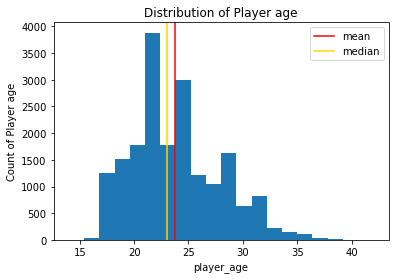

In [50]:
# Plot a histogram to show the distribution of Player Age
plt.figure()
plt.hist(raw_transfer['player_age'], bins=20)
    
# add vertical lines to show the median and mean
plt.axvline(raw_transfer['player_age'].mean(), c='r', label='mean')
plt.axvline(raw_transfer['player_age'].median(), c='gold', label='median')
plt.xlabel('player_age')
plt.ylabel('Count of Player age')
plt.title("Distribution of Player age")
plt.legend()

plt.show()  

I will find the players with the missing age in the dataframe.

In [51]:
# Value counts of Player_name for missing age
raw_transfer[raw_transfer['player_age'].isna()][['Player', 'season']].value_counts()

Player             season
Emiliano Sala      2018      1
Jonas Pessalli     2016      1
Niklas Feierabend  2015      1
Reece Hayes        2013      1
dtype: int64

There are 4 players in the dataset with the missing age. Since I now know the players with the missing values, I can now fill these values by finding their age from Google search. 

In [53]:
# fill the player with the missing age
Emiliano_Sala = (raw_transfer['player_age'].isna()) & (raw_transfer['Player']== 'Emiliano Sala')
raw_transfer[Emiliano_Sala]
# Fill these with 28
raw_transfer.loc[Emiliano_Sala, 'player_age'] = 28

In [54]:
# fill the player with the missing age
Jonas_Pessalli = (raw_transfer['player_age'].isna()) & (raw_transfer['Player']== 'Jonas Pessalli')
raw_transfer[Jonas_Pessalli]
# Fill these with 26
raw_transfer.loc[Jonas_Pessalli, 'player_age'] = 26

In [55]:
# fill the player with the missing age
Niklas_Feierabend = (raw_transfer['player_age'].isna()) & (raw_transfer['Player']== 'Niklas Feierabend')
raw_transfer[Niklas_Feierabend]
# Fill these with 18
raw_transfer.loc[Niklas_Feierabend, 'player_age'] = 18

In [56]:
# fill the player with the missing age
Reece_Hayes = (raw_transfer['player_age'].isna()) & (raw_transfer['Player']== 'Reece Hayes')
raw_transfer[Reece_Hayes]
# Fill these with 18
raw_transfer.loc[Reece_Hayes, 'player_age'] = 18

In [57]:
# Finding the null values
raw_transfer.isna().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
player_id                   0
Player                      0
player_age                  0
player_nation               0
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       10458
market_val_amnt          3147
dtype: int64

All the mising player ages have been filled. I will now take a look at the missing values in the column `transfer_fee_amnt`.

**Dealing with null values in `transfer_fee_amnt` column:**

I will first find the players with the missing transfer fee amounts and the year of the transfer. 

In [58]:
# Values of Players for missing transfer_fee
raw_transfer[raw_transfer['transfer_fee_amnt'].isna()][['Player', 'season']].value_counts()

Player               season
Mohammed Abu         2012      4
Adalberto Peñaranda  2016      4
Patrick Bamford      2015      4
Adama Traoré         2019      4
Christian Atsu       2015      4
                              ..
Gonçalo Brandão      2012      1
                     2011      1
Gonzalo Jara         2013      1
                     2012      1
Özkan Yildirim       2011      1
Length: 9305, dtype: int64

Searching these players in the [Transfermarkt](https://www.transfermarkt.com/) website and looking at the year of the transfer I can see that all of these players were free transfers as they were transferred to another team as loans. So I will fill the missing values of these players with 0 since they are all free transfers. 

In [62]:
# Fill the null values in transfer_fee_amnt with 0
raw_transfer['transfer_fee_amnt'] = raw_transfer['transfer_fee_amnt'].fillna(0.0)

In [64]:
# check the null values again
raw_transfer.isna().sum()

league                     0
season                     0
window                     0
team_id                    0
team_name                  0
team_country               0
player_id                  0
Player                     0
player_age                 0
player_nation              0
player_pos                 0
counter_team_id            0
counter_team_name          0
counter_team_country       0
transfer_fee_amnt          0
market_val_amnt         3147
dtype: int64

All the missing values for the `transfer_fee_amnt` column have been filled. Now I'll take a look at the `market_val_amnt` column.

**Dealing with null values in `market_val_amnt` column:**

I will take a look at the distribution of the `market_val_amnt` column.

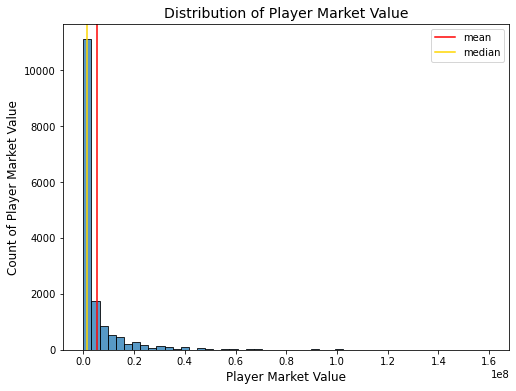

In [70]:
# Visualizing the distribution of Player Market Value
plt.figure(figsize=(8,6))
sns.histplot(data = raw_transfer, x = 'market_val_amnt', bins=50)
    
# Add vertical lines to show the median and mean
plt.axvline(raw_transfer['market_val_amnt'].mean(), c='r', label='mean')
plt.axvline(raw_transfer['market_val_amnt'].median(), c='gold', label='median')
plt.xlabel('Player Market Value', fontsize=12)
plt.ylabel('Count of Player Market Value', fontsize=12)
plt.title("Distribution of Player Market Value", fontsize=14)
plt.legend()

plt.show()

The target variable is very imbalanced. I will deal with the missing values of this column later. 

In [73]:
# Take a look at the shape of the dataframe
print(f'There are {raw_transfer.shape[0]} rows and {raw_transfer.shape[1]} columns in the dataset.')

There are 19200 rows and 16 columns in the dataset.


My "**raw_transfer**" dataset has 19200 rows and 16 columns. Now I will move on to loading my second dataset containing the player performance statisctics.

----

### fbref dataset

10 datasets for each year from 2011 to 2021 have been downloaded from the **fbref** website. The dataset contains player on-field performance standard statistics data like goals scored, assists made, non-penalty goals, matches played, etc. It also contains per 90 minutes performance statistics that represent the statistics based on per game as well as player potential performance statistics like expected goals, expected assists, expected penalty kicks, etc. 

I will load the first dataset which is the player performance statisctics data for 2021 and store it into a dataframe called "fbref_2021".

In [74]:
# load in our fbref-2021 dataset
fbref_2021 = pd.read_csv('Data/stats/fbref-2021.csv')
# looking at the first 5 rows of the data frame
fbref_2021.head()

Rk               Player  Nation   Pos           Squad                Comp  \
0   1        Ismael Aaneba  fr FRA  FWDF      Strasbourg          fr Ligue 1   
1   2  Patrick van Aanholt  nl NED    DF  Crystal Palace  eng Premier League   
2   3          Issah Abbas  gh GHA  DFFW        Mainz 05       de Bundesliga   
3   4     Yunis Abdelhamid  ma MAR    DF           Reims          fr Ligue 1   
4   5        Sabit Abdulai  gh GHA    MF          Getafe          es La Liga   

   Age  Born  MP  Starts  ...  npxG    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0   21  1999   2       0  ...  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
1   29  1990  22      20  ...  0.06  0.04     0.10  0.06  0.04   0.10    0.06   
2   21  1998   2       0  ...  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
3   32  1987  33      33  ...  0.05  0.01     0.06  0.05  0.01   0.06    0.05   
4   21  1999   3       0  ...  0.00  0.00     0.00  0.00  0.00   0.00    0.00   

   npxG+xA.1  Matches     -9999  
0       0.00  Matches  a7e4760c  
1       0.10  Matches  5f09991f  
2       0.00  Matches  2590ddf7  
3       0.06  Matches  32c2d95f  
4       0.00  Matches  9f9e1b9c  

[5 rows x 35 columns]

I will create a new column with the year of the data and input the values of the year 2021 into it.

In [75]:
# Add a new season column to the dataset
fbref_2021['season'] = 2021
fbref_2021.head()

Rk               Player  Nation   Pos           Squad                Comp  \
0   1        Ismael Aaneba  fr FRA  FWDF      Strasbourg          fr Ligue 1   
1   2  Patrick van Aanholt  nl NED    DF  Crystal Palace  eng Premier League   
2   3          Issah Abbas  gh GHA  DFFW        Mainz 05       de Bundesliga   
3   4     Yunis Abdelhamid  ma MAR    DF           Reims          fr Ligue 1   
4   5        Sabit Abdulai  gh GHA    MF          Getafe          es La Liga   

   Age  Born  MP  Starts  ...    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0   21  1999   2       0  ...  0.00     0.00  0.00  0.00   0.00    0.00   
1   29  1990  22      20  ...  0.04     0.10  0.06  0.04   0.10    0.06   
2   21  1998   2       0  ...  0.00     0.00  0.00  0.00   0.00    0.00   
3   32  1987  33      33  ...  0.01     0.06  0.05  0.01   0.06    0.05   
4   21  1999   3       0  ...  0.00     0.00  0.00  0.00   0.00    0.00   

   npxG+xA.1  Matches     -9999  season  
0       0.00  Matches  a7e4760c    2021  
1       0.10  Matches  5f09991f    2021  
2       0.00  Matches  2590ddf7    2021  
3       0.06  Matches  32c2d95f    2021  
4       0.00  Matches  9f9e1b9c    2021  

[5 rows x 36 columns]

I will also change the position of the new column `season`.

In [76]:
# change the position of the column season
third_col = fbref_2021.pop('season')
fbref_2021.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2021.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp  Age  Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1   21  1999   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League   29  1990  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga   21  1998   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1   32  1987  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga   21  1999   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

Similarly, I will do the same with all the 10 datasets from the fbref website. I will first load them into separate dataframes, add a season column with the year of the data and then change the position of the new column.

In [77]:
# load in our fbref-2020 dataset
fbref_2020 = pd.read_csv('Data/stats/fbref-2020.csv')
# looking at the first 5 rows of the data frame
fbref_2020.head()

Rk               Player   Nation   Pos           Squad                Comp  \
0   1  Patrick van Aanholt   nl NED    DF  Crystal Palace  eng Premier League   
1   2           Max Aarons  eng ENG    DF    Norwich City  eng Premier League   
2   3     Yunis Abdelhamid   ma MAR    DF           Reims          fr Ligue 1   
3   4   Suleiman Abdullahi   ng NGA  FWMF    Union Berlin       de Bundesliga   
4   5          Mehdi Abeid   dz ALG    MF          Nantes          fr Ligue 1   

   Age  Born  MP  Starts  ...  npxG    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0   28  1990  29      29  ...  0.06  0.11     0.17  0.08  0.11   0.20    0.06   
1   19  2000  36      36  ...  0.01  0.09     0.11  0.01  0.09   0.11    0.01   
2   31  1987  28      28  ...  0.05  0.00     0.05  0.05  0.00   0.05    0.05   
3   22  1996   6       1  ...  0.76  0.12     0.82  0.72  0.10   0.82    0.72   
4   26  1992  25      20  ...  0.08  0.07     0.15  0.08  0.07   0.15    0.08   

   npxG+xA.1  Matches     -9999  
0       0.17  Matches  5f09991f  
1       0.11  Matches  774cf58b  
2       0.05  Matches  32c2d95f  
3       0.82  Matches  abf0cad0  
4       0.15  Matches  a4c3f7af  

[5 rows x 35 columns]

In [78]:
# Add a new season column to the dataset
fbref_2020['season'] = 2020
# change the position of the column season
third_col = fbref_2020.pop('season')
fbref_2020.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2020.head()

Rk               Player  season   Nation   Pos           Squad  \
0   1  Patrick van Aanholt    2020   nl NED    DF  Crystal Palace   
1   2           Max Aarons    2020  eng ENG    DF    Norwich City   
2   3     Yunis Abdelhamid    2020   ma MAR    DF           Reims   
3   4   Suleiman Abdullahi    2020   ng NGA  FWMF    Union Berlin   
4   5          Mehdi Abeid    2020   dz ALG    MF          Nantes   

                 Comp  Age  Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0  eng Premier League   28  1990  29  ...  0.06  0.11     0.17  0.08  0.11   
1  eng Premier League   19  2000  36  ...  0.01  0.09     0.11  0.01  0.09   
2          fr Ligue 1   31  1987  28  ...  0.05  0.00     0.05  0.05  0.00   
3       de Bundesliga   22  1996   6  ...  0.76  0.12     0.82  0.72  0.10   
4          fr Ligue 1   26  1992  25  ...  0.08  0.07     0.15  0.08  0.07   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.20    0.06       0.17  Matches  5f09991f  
1   0.11    0.01       0.11  Matches  774cf58b  
2   0.05    0.05       0.05  Matches  32c2d95f  
3   0.82    0.72       0.82  Matches  abf0cad0  
4   0.15    0.08       0.15  Matches  a4c3f7af  

[5 rows x 36 columns]

In [79]:
# load in our fbref-2019 dataset
fbref_2019 = pd.read_csv('Data/stats/fbref-2019.csv')
# looking at the first 5 rows of the data frame
fbref_2019.head()

Rk               Player  Nation Pos           Squad                Comp  \
0   1        Ismael Aaneba  fr FRA  DF      Strasbourg          fr Ligue 1   
1   2  Patrick van Aanholt  nl NED  DF  Crystal Palace  eng Premier League   
2   3        Ignazio Abate  it ITA  DF           Milan          it Serie A   
3   4          Issah Abbas  gh GHA  FW        Mainz 05       de Bundesliga   
4   5     Yunis Abdelhamid  ma MAR  DF           Reims          fr Ligue 1   

   Age  Born  MP  Starts  ...  npxG    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0   19  1999   3       3  ...  0.00  0.22     0.22  0.00  0.20   0.20    0.00   
1   27  1990  36      36  ...  0.08  0.09     0.17  0.08  0.09   0.17    0.08   
2   31  1986  19      15  ...  0.00  0.02     0.03  0.00  0.02   0.02    0.00   
3   19  1998   1       0  ...  0.00  0.00     0.00  0.17  0.00   0.17    0.17   
4   30  1987  38      38  ...  0.04  0.00     0.05  0.04  0.00   0.05    0.04   

   npxG+xA.1  Matches     -9999  
0       0.20  Matches  a7e4760c  
1       0.17  Matches  5f09991f  
2       0.02  Matches  1c529186  
3       0.17  Matches  2590ddf7  
4       0.05  Matches  32c2d95f  

[5 rows x 35 columns]

In [80]:
# Add a new season column to the dataset
fbref_2019['season'] = 2019
# change the position of the column season
third_col = fbref_2019.pop('season')
fbref_2019.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2019.head()

Rk               Player  season  Nation Pos           Squad  \
0   1        Ismael Aaneba    2019  fr FRA  DF      Strasbourg   
1   2  Patrick van Aanholt    2019  nl NED  DF  Crystal Palace   
2   3        Ignazio Abate    2019  it ITA  DF           Milan   
3   4          Issah Abbas    2019  gh GHA  FW        Mainz 05   
4   5     Yunis Abdelhamid    2019  ma MAR  DF           Reims   

                 Comp  Age  Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1   19  1999   3  ...  0.00  0.22     0.22  0.00  0.20   
1  eng Premier League   27  1990  36  ...  0.08  0.09     0.17  0.08  0.09   
2          it Serie A   31  1986  19  ...  0.00  0.02     0.03  0.00  0.02   
3       de Bundesliga   19  1998   1  ...  0.00  0.00     0.00  0.17  0.00   
4          fr Ligue 1   30  1987  38  ...  0.04  0.00     0.05  0.04  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.20    0.00       0.20  Matches  a7e4760c  
1   0.17    0.08       0.17  Matches  5f09991f  
2   0.02    0.00       0.02  Matches  1c529186  
3   0.17    0.17       0.17  Matches  2590ddf7  
4   0.05    0.04       0.05  Matches  32c2d95f  

[5 rows x 36 columns]

In [81]:
# load in our fbref-2018 dataset
fbref_2018= pd.read_csv('Data/stats/fbref-2018.csv')

# Add a new season column to the dataset
fbref_2018['season'] = 2018
# change the position of the column season
third_col = fbref_2018.pop('season')
fbref_2018.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2018.head()

Rk               Player  season   Nation   Pos           Squad  \
0   1  Patrick van Aanholt    2018   nl NED    DF  Crystal Palace   
1   2       Rolando Aarons    2018  eng ENG  FWMF   Newcastle Utd   
2   3       Rolando Aarons    2018  eng ENG  MFFW   Hellas Verona   
3   4        Ignazio Abate    2018   it ITA    DF           Milan   
4   5      Aymen Abdennour    2018   tn TUN    DF       Marseille   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0  eng Premier League  26.0  1990.0  28  ...  0.14  0.07     0.21  0.14  0.07   
1  eng Premier League  21.0  1995.0   4  ...  0.13  0.00     0.13  0.10  0.00   
2          it Serie A  21.0  1995.0  11  ...  0.04  0.04     0.09  0.04  0.04   
3          it Serie A  30.0  1986.0  17  ...  0.03  0.05     0.08  0.02  0.05   
4          fr Ligue 1  27.0  1989.0   8  ...  0.02  0.00     0.02  0.02  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.21    0.14       0.21  Matches  5f09991f  
1   0.10    0.10       0.10  Matches  c5942695  
2   0.08    0.04       0.08  Matches  c5942695  
3   0.07    0.02       0.07  Matches  1c529186  
4   0.02    0.02       0.02  Matches  2f798b41  

[5 rows x 36 columns]

In [83]:
# load in our fbref-2017 dataset
fbref_2017 = pd.read_csv('Data/stats/fbref-2017.csv')

# Add a new season column to the dataset
fbref_2017['season'] = 2017
# change the position of the column season
third_col = fbref_2017.pop('season')
fbref_2017.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2017.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1  Patrick van Aanholt    2017  nl NED  DFMF  Crystal Palace   
1   2  Patrick van Aanholt    2017  nl NED  DFMF      Sunderland   
2   3        Ignazio Abate    2017  it ITA    DF           Milan   
3   4     Yunis Abdelhamid    2017  ma MAR    DF           Dijon   
4   5      Aymen Abdennour    2017  tn TUN    DF        Valencia   

                 Comp   Age    Born  MP  ...  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
0  eng Premier League  25.0  1990.0  11  ...    0.0  0.13   0.0   0.25   0.00   
1  eng Premier League  25.0  1990.0  21  ...    0.0  0.10   0.0   0.15   0.05   
2          it Serie A  29.0  1986.0  23  ...    0.0  0.09   0.0   0.00   0.09   
3          fr Ligue 1  28.0  1987.0  18  ...    0.0  0.21   0.0   0.00   0.00   
4          es La Liga  26.0  1989.0  13  ...    0.0  0.41   0.0   0.00   0.00   

    G+A  G-PK.1  G+A-PK  Matches     -9999  
0  0.25    0.25    0.25  Matches  5f09991f  
1  0.20    0.15    0.20  Matches  5f09991f  
2  0.09    0.00    0.09  Matches  1c529186  
3  0.00    0.00    0.00  Matches  32c2d95f  
4  0.00    0.00    0.00  Matches  2f798b41  

[5 rows x 27 columns]

In [84]:
# load in our fbref-2016 dataset
fbref_2016 = pd.read_csv('Data/stats/fbref-2016.csv')

# Add a new season column to the dataset
fbref_2016['season'] = 2016
# change the position of the column season
third_col = fbref_2016.pop('season')
fbref_2016.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2016.head()

Rk               Player  season   Nation   Pos          Squad  \
0   1  Patrick van Aanholt    2016   nl NED    DF     Sunderland   
1   2       Rolando Aarons    2016  eng ENG  DFMF  Newcastle Utd   
2   3        Ignazio Abate    2016   it ITA    DF          Milan   
3   4    Christian Abbiati    2016   it ITA    GK          Milan   
4   5      Aymen Abdennour    2016   tn TUN    DF       Valencia   

                 Comp   Age    Born  MP  ...  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
0  eng Premier League  24.0  1990.0  33  ...    0.0  0.06   0.0   0.12   0.09   
1  eng Premier League  19.0  1995.0  10  ...    0.0  0.24   0.0   0.24   0.24   
2          it Serie A  28.0  1986.0  27  ...    0.0  0.28   0.0   0.04   0.04   
3          it Serie A  38.0  1977.0   1  ...    0.0  0.00   0.0   0.00   0.00   
4          es La Liga  25.0  1989.0  22  ...    0.0  0.19   0.0   0.00   0.00   

    G+A  G-PK.1  G+A-PK  Matches     -9999  
0  0.21    0.12    0.21  Matches  5f09991f  
1  0.47    0.24    0.47  Matches  c5942695  
2  0.08    0.04    0.08  Matches  1c529186  
3  0.00    0.00    0.00  Matches  322421c2  
4  0.00    0.00    0.00  Matches  2f798b41  

[5 rows x 27 columns]

In [85]:
# load in our fbref-2015 dataset
fbref_2015 = pd.read_csv('Data/stats/fbref-2015.csv')

# Add a new season column to the dataset
fbref_2015['season'] = 2015
# change the position of the column season
third_col = fbref_2015.pop('season')
fbref_2015.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2015.head()

Rk               Player  season   Nation   Pos          Squad  \
0   1  Patrick van Aanholt    2015   nl NED    DF     Sunderland   
1   2       Rolando Aarons    2015  eng ENG    MF  Newcastle Utd   
2   3        Ignazio Abate    2015   it ITA  DFMF          Milan   
3   4    Christian Abbiati    2015   it ITA    GK          Milan   
4   5      Kassim Abdallah    2015   km COM    DF          Evian   

                 Comp   Age    Born  MP  ...  PKatt  CrdY  CrdR  Gls.1  Ast.1  \
0  eng Premier League  23.0  1990.0  28  ...    0.0  0.16  0.00   0.00   0.20   
1  eng Premier League  18.0  1995.0   4  ...    0.0  0.67  0.00   0.68   0.00   
2          it Serie A  27.0  1986.0  23  ...    0.0  0.24  0.00   0.00   0.29   
3          it Serie A  37.0  1977.0  11  ...    0.0  0.00  0.00   0.00   0.00   
4          fr Ligue 1  27.0  1987.0  30  ...    0.0  0.17  0.03   0.00   0.10   

    G+A  G-PK.1  G+A-PK  Matches     -9999  
0  0.20    0.00    0.20  Matches  5f09991f  
1  0.68    0.68    0.68  Matches  c5942695  
2  0.29    0.00    0.29  Matches  1c529186  
3  0.00    0.00    0.00  Matches  322421c2  
4  0.10    0.00    0.10  Matches  6ae490cc  

[5 rows x 27 columns]

In [86]:
# load in our fbref-2014 dataset
fbref_2014 = pd.read_csv('Data/stats/fbref-2014.csv')

# Add a new season column to the dataset
fbref_2014['season'] = 2014
# change the position of the column season
third_col = fbref_2014.pop('season')
fbref_2014.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2014.head()

Rk             Player  season  Nation   Pos       Squad        Comp   Age  \
0   1        Toni Dovale    2014  es ESP  DFMF  Celta Vigo  es La Liga  23.0   
1   2  Zakariya Abarouai    2014  fr FRA    FW       Evian  fr Ligue 1  19.0   
2   3      Ignazio Abate    2014  it ITA  DFMF       Milan  it Serie A  26.0   
3   4  Christian Abbiati    2014  it ITA    GK       Milan  it Serie A  36.0   
4   5    Kassim Abdallah    2014  km COM    DF       Evian  fr Ligue 1  26.0   

     Born  MP  ...  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  G+A-PK  \
0  1990.0  12  ...    0.0  0.09  0.00   0.00   0.18  0.18    0.00    0.18   
1  1994.0   1  ...    0.0  0.00  0.00   0.00   0.00  0.00    0.00    0.00   
2  1986.0  19  ...    0.0  0.06  0.00   0.06   0.00  0.06    0.06    0.06   
3  1977.0  28  ...    0.0  0.15  0.04   0.00   0.00  0.00    0.00    0.00   
4  1987.0  11  ...    0.0  0.10  0.10   0.00   0.00  0.00    0.00    0.00   

   Matches     -9999  
0  Matches  d4b9adcf  
1  Matches  ac64eb68  
2  Matches  1c529186  
3  Matches  322421c2  
4  Matches  6ae490cc  

[5 rows x 27 columns]

In [87]:
# load in our fbref-2013 dataset
fbref_2013 = pd.read_csv('Data/stats/fbref-2013.csv')

# Add a new season column to the dataset
fbref_2013['season'] = 2013
# change the position of the column season
third_col = fbref_2013.pop('season')
fbref_2013.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2013.head()

Rk             Player  season  Nation   Pos       Squad        Comp   Age  \
0   1        Toni Dovale    2013  es ESP  DFMF  Celta Vigo  es La Liga  22.0   
1   2      Ignazio Abate    2013  it ITA  DFMF       Milan  it Serie A  25.0   
2   3  Christian Abbiati    2013  it ITA    GK       Milan  it Serie A  35.0   
3   4   Elvis Abbruscato    2013  it ITA    FW     Pescara  it Serie A  31.0   
4   5    Kassim Abdallah    2013  km COM    DF   Marseille  fr Ligue 1  25.0   

     Born  MP  ...  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  G+A-PK  \
0  1990.0  14  ...    0.0  0.67   0.0   0.00   0.00  0.00    0.00    0.00   
1  1986.0  27  ...    0.0  0.08   0.0   0.00   0.08  0.08    0.00    0.08   
2  1977.0  28  ...    0.0  0.07   0.0   0.00   0.00  0.00    0.00    0.00   
3  1981.0  25  ...    0.0  0.08   0.0   0.16   0.00  0.16    0.16    0.16   
4  1987.0  13  ...    0.0  0.10   0.1   0.00   0.00  0.00    0.00    0.00   

   Matches     -9999  
0  Matches  d4b9adcf  
1  Matches  1c529186  
2  Matches  322421c2  
3  Matches  3b0bc99c  
4  Matches  6ae490cc  

[5 rows x 27 columns]

In [88]:
# load in our fbref-2012 dataset
fbref_2012 = pd.read_csv('Data/stats/fbref-2012.csv')

# Add a new season column to the dataset
fbref_2012['season'] = 2012
# change the position of the column season
third_col = fbref_2012.pop('season')
fbref_2012.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2012.head()

Rk               Player  season  Nation   Pos           Squad  \
0  1  Patrick van Aanholt    2012  nl NED    DF  Wigan Athletic   
1  2        Ignazio Abate    2012  it ITA  DFMF           Milan   
2  3    Christian Abbiati    2012  it ITA    GK           Milan   
3  4  Mohammed Abdellaoue    2012  no NOR    FW     Hannover 96   
4  5      Aymen Abdennour    2012  tn TUN    DF        Toulouse   

                 Comp   Age    Born    MP  ...  PKatt  CrdY  CrdR  Gls.1  \
0  eng Premier League  20.0  1990.0   3.0  ...   0.00  0.00   0.0   0.00   
1          it Serie A  24.0  1986.0  29.0  ...   0.00  0.14   0.0   0.00   
2          it Serie A  34.0  1977.0  31.0  ...   0.00  0.00   0.0   0.00   
3       de Bundesliga  25.0  1985.0  28.0  ...   0.14  0.09   0.0   0.50   
4          fr Ligue 1  21.0  1989.0  32.0  ...   0.00  0.22   0.0   0.06   

   Ast.1   G+A  G-PK.1  G+A-PK  Matches     -9999  
0   0.00  0.00    0.00    0.00  Matches  5f09991f  
1   0.07  0.07    0.00    0.07  Matches  1c529186  
2   0.00  0.00    0.00    0.00  Matches  322421c2  
3   0.00  0.50    0.36    0.36  Matches  7b068bd2  
4   0.00  0.06    0.06    0.06  Matches  2f798b41  

[5 rows x 27 columns]

In [89]:
# load in our fbref-2011 dataset
fbref_2011 = pd.read_csv('Data/stats/fbref-2011.csv')

# Add a new season column to the dataset
fbref_2011['season'] = 2011
# change the position of the column season
third_col = fbref_2011.pop('season')
fbref_2011.insert(2, 'season', third_col)
# look at the first 5 rows again for sanity check
fbref_2011.head()

Rk               Player  season  Nation   Pos        Squad           Comp  \
0   1   Fernando Menegazzo    2011  br BRA    MF     Bordeaux     fr Ligue 1   
1   2   Sergio Abad Beyxer    2011  es ESP    MF      Levante     es La Liga   
2   3        Ignazio Abate    2011  it ITA  DFMF        Milan     it Serie A   
3   4    Christian Abbiati    2011  it ITA    GK        Milan     it Serie A   
4   5  Mohammed Abdellaoue    2011  no NOR    FW  Hannover 96  de Bundesliga   

    Age  Born  MP  ...  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  G+A-PK  \
0  29.0  1981  35  ...    0.0  0.21  0.00   0.06   0.03  0.09    0.06    0.09   
1  21.0  1989   1  ...    0.0  0.00  0.00   0.00   0.00  0.00    0.00    0.00   
2  23.0  1986  29  ...    0.0  0.07  0.04   0.00   0.04  0.04    0.00    0.04   
3  33.0  1977  35  ...    0.0  0.06  0.00   0.00   0.00  0.00    0.00    0.00   
4  24.0  1985  26  ...    0.0  0.04  0.00   0.43   0.04  0.47    0.43    0.47   

   Matches     -9999  
0  Matches  75b8877e  
1  Matches  30f729b3  
2  Matches  1c529186  
3  Matches  322421c2  
4  Matches  7b068bd2  

[5 rows x 27 columns]

I will now concatenate the datasets two at a time. That means first I will concatenate the 2021 and 2020 datasets and then concatenate the 2019 datsets with the 2020 and 2021 and so on.

In [90]:
# Concatenate the 2020 and 2021 dataset
fbref_20_21 = pd.concat([fbref_2021, fbref_2020], axis = 0).reset_index(drop=True)
fbref_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp  Age  Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1   21  1999   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League   29  1990  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga   21  1998   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1   32  1987  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga   21  1999   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [91]:
# Concatenate the 2019, 2020, 2021 dataset
fbref_19_2021 = pd.concat([fbref_20_21, fbref_2019], axis = 0).reset_index(drop=True)
fbref_19_2021.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp  Age  Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1   21  1999   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League   29  1990  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga   21  1998   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1   32  1987  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga   21  1999   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [92]:
# Concatenate the 2018, 2019, 2020, 2021 dataset
fbref_18_19_20_21 = pd.concat([fbref_19_2021, fbref_2018], axis = 0).reset_index(drop=True)
fbref_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1  21.0  1999.0   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League  29.0  1990.0  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga  21.0  1998.0   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga  21.0  1999.0   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [93]:
# Concatenate the 2017, 2018, 2019, 2020, 2021 dataset
fbref_17_18_19_20_21 = pd.concat([fbref_18_19_20_21, fbref_2017], axis = 0).reset_index(drop=True)
fbref_17_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1  21.0  1999.0   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League  29.0  1990.0  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga  21.0  1998.0   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga  21.0  1999.0   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [94]:
# Concatenate the 2016, 2017, 2018, 2019, 2020, 2021 dataset
fbref_16_17_18_19_20_21 = pd.concat([fbref_17_18_19_20_21, fbref_2016], axis = 0).reset_index(drop=True)
fbref_16_17_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1  21.0  1999.0   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League  29.0  1990.0  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga  21.0  1998.0   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga  21.0  1999.0   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [95]:
# Concatenate the 2015, 2016, 2017, 2018, 2019, 2020, 2021 dataset
fbref_15_16_17_18_19_20_21 = pd.concat([fbref_16_17_18_19_20_21, fbref_2015], axis = 0).reset_index(drop=True)
fbref_15_16_17_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1  21.0  1999.0   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League  29.0  1990.0  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga  21.0  1998.0   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga  21.0  1999.0   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [96]:
# Concatenate the 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021 dataset
fbref_14_15_16_17_18_19_20_21 = pd.concat([fbref_15_16_17_18_19_20_21, fbref_2014], axis = 0).reset_index(drop=True)
fbref_14_15_16_17_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1  21.0  1999.0   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League  29.0  1990.0  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga  21.0  1998.0   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga  21.0  1999.0   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [97]:
# Concatenate the 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021 dataset
fbref_13_14_15_16_17_18_19_20_21 = pd.concat([fbref_14_15_16_17_18_19_20_21, fbref_2013], axis = 0).reset_index(drop=True)
fbref_13_14_15_16_17_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0   1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1   2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2   3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3   4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4   5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born  MP  ...  npxG    xA  npxG+xA  xG.1  xA.1  \
0          fr Ligue 1  21.0  1999.0   2  ...  0.00  0.00     0.00  0.00  0.00   
1  eng Premier League  29.0  1990.0  22  ...  0.06  0.04     0.10  0.06  0.04   
2       de Bundesliga  21.0  1998.0   2  ...  0.00  0.00     0.00  0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33  ...  0.05  0.01     0.06  0.05  0.01   
4          es La Liga  21.0  1999.0   3  ...  0.00  0.00     0.00  0.00  0.00   

   xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0   0.00    0.00       0.00  Matches  a7e4760c  
1   0.10    0.06       0.10  Matches  5f09991f  
2   0.00    0.00       0.00  Matches  2590ddf7  
3   0.06    0.05       0.06  Matches  32c2d95f  
4   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [98]:
# Concatenate the 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021 dataset
fbref_12_13_14_15_16_17_18_19_20_21 = pd.concat([fbref_13_14_15_16_17_18_19_20_21, fbref_2012], axis = 0).reset_index(drop=True)
fbref_12_13_14_15_16_17_18_19_20_21.head()

Rk               Player  season  Nation   Pos           Squad  \
0  1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1  2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2  3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3  4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4  5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born    MP  ...  npxG    xA  npxG+xA  xG.1  \
0          fr Ligue 1  21.0  1999.0   2.0  ...  0.00  0.00     0.00  0.00   
1  eng Premier League  29.0  1990.0  22.0  ...  0.06  0.04     0.10  0.06   
2       de Bundesliga  21.0  1998.0   2.0  ...  0.00  0.00     0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33.0  ...  0.05  0.01     0.06  0.05   
4          es La Liga  21.0  1999.0   3.0  ...  0.00  0.00     0.00  0.00   

   xA.1  xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0  0.00   0.00    0.00       0.00  Matches  a7e4760c  
1  0.04   0.10    0.06       0.10  Matches  5f09991f  
2  0.00   0.00    0.00       0.00  Matches  2590ddf7  
3  0.01   0.06    0.05       0.06  Matches  32c2d95f  
4  0.00   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

In [99]:
# Concatenate the 2011 to 2021 dataset
fbref_final = pd.concat([fbref_12_13_14_15_16_17_18_19_20_21, fbref_2011], axis = 0).reset_index(drop=True)
# Look at the first 5 records of the dataframe
fbref_final.head()

Rk               Player  season  Nation   Pos           Squad  \
0  1        Ismael Aaneba    2021  fr FRA  FWDF      Strasbourg   
1  2  Patrick van Aanholt    2021  nl NED    DF  Crystal Palace   
2  3          Issah Abbas    2021  gh GHA  DFFW        Mainz 05   
3  4     Yunis Abdelhamid    2021  ma MAR    DF           Reims   
4  5        Sabit Abdulai    2021  gh GHA    MF          Getafe   

                 Comp   Age    Born    MP  ...  npxG    xA  npxG+xA  xG.1  \
0          fr Ligue 1  21.0  1999.0   2.0  ...  0.00  0.00     0.00  0.00   
1  eng Premier League  29.0  1990.0  22.0  ...  0.06  0.04     0.10  0.06   
2       de Bundesliga  21.0  1998.0   2.0  ...  0.00  0.00     0.00  0.00   
3          fr Ligue 1  32.0  1987.0  33.0  ...  0.05  0.01     0.06  0.05   
4          es La Liga  21.0  1999.0   3.0  ...  0.00  0.00     0.00  0.00   

   xA.1  xG+xA  npxG.1  npxG+xA.1  Matches     -9999  
0  0.00   0.00    0.00       0.00  Matches  a7e4760c  
1  0.04   0.10    0.06       0.10  Matches  5f09991f  
2  0.00   0.00    0.00       0.00  Matches  2590ddf7  
3  0.01   0.06    0.05       0.06  Matches  32c2d95f  
4  0.00   0.00    0.00       0.00  Matches  9f9e1b9c  

[5 rows x 36 columns]

All 10 years of data have been combined together to create one complete dataset containing player performance statistics. Let me check the values of the column `season` to check if all the years between 2011 and 2021 data are present in the dataframe.

In [103]:
# check the column season
fbref_final['season'].value_counts()

2021    2822
2016    2771
2013    2756
2014    2750
2012    2735
2020    2732
2017    2730
2011    2709
2018    2691
2015    2691
2019    2656
Name: season, dtype: int64

In [104]:
fbref_final['season'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011])

The dataframe contains the data for the years between 2011 and 2021. 

### Cleaning the fbref dataset

I will take a look at the shape of the dataframe. 

In [105]:
# Check the number of rows and columns in fbref_final dataset
print(f'There are {fbref_final.shape[0]} rows and {fbref_final.shape[1]} columns in the dataset.')

There are 30043 rows and 36 columns in the dataset.


There are **30043 rows** and **36 columns** in the dataset. Let me take a look at the summary of the columns.

In [106]:
# Check the summary of the dataset
fbref_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30043 entries, 0 to 30042
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         30043 non-null  object 
 1   Player     30042 non-null  object 
 2   season     30043 non-null  int64  
 3   Nation     30029 non-null  object 
 4   Pos        30028 non-null  object 
 5   Squad      30042 non-null  object 
 6   Comp       30042 non-null  object 
 7   Age        30030 non-null  float64
 8   Born       30031 non-null  float64
 9   MP         30042 non-null  float64
 10  Starts     30042 non-null  float64
 11  Min        30042 non-null  float64
 12  90s        30042 non-null  float64
 13  Gls        30042 non-null  float64
 14  Ast        30009 non-null  float64
 15  G-PK       30040 non-null  float64
 16  PK         30040 non-null  float64
 17  PKatt      30004 non-null  float64
 18  CrdY       30042 non-null  float64
 19  CrdR       30042 non-null  float64
 20  Gls.1 

There are some unnecessary and redundant columns in the dataframe. I will remove these unnecessary columns from the dataframe. 

In [107]:
# Remove the unnecessary columns from the dataset
fbref_final.drop('Nation', axis=1, inplace=True)
fbref_final.drop('Pos', axis=1, inplace=True)
fbref_final.drop('Squad', axis=1, inplace=True)
fbref_final.drop('Comp', axis=1, inplace=True)
fbref_final.drop('Age', axis=1, inplace=True)
fbref_final.drop('Born', axis=1, inplace=True)
fbref_final.drop('Matches', axis=1, inplace=True)
fbref_final.drop('-9999', axis=1, inplace=True)
# Check the dataset now
fbref_final.head()

Rk               Player  season    MP  Starts     Min   90s   Gls   Ast  \
0  1        Ismael Aaneba    2021   2.0     0.0    11.0   0.1  0.00  0.00   
1  2  Patrick van Aanholt    2021  22.0    20.0  1777.0  19.7  0.00  0.05   
2  3          Issah Abbas    2021   2.0     0.0    18.0   0.2  0.00  0.00   
3  4     Yunis Abdelhamid    2021  33.0    33.0  2889.0  32.1  0.09  0.00   
4  5        Sabit Abdulai    2021   3.0     0.0    60.0   0.7  0.00  0.00   

   G-PK  ...  G+A-PK    xG  npxG    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
1  0.00  ...    0.05  0.06  0.06  0.04     0.10  0.06  0.04   0.10    0.06   
2  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
3  0.09  ...    0.09  0.05  0.05  0.01     0.06  0.05  0.01   0.06    0.05   
4  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   

   npxG+xA.1  
0       0.00  
1       0.10  
2       0.00  
3       0.06  
4       0.00  

[5 rows x 28 columns]

In [108]:
# Check the number of rows and columns in fbref_final dataset
print(f'There are {fbref_final.shape[0]} rows and {fbref_final.shape[1]} columns in the dataset.')

There are 30043 rows and 28 columns in the dataset.


My dataset now has 30043 rows and 28 columns. I will now check for duplicates in the dataset.

In [110]:
# check for duplicated rows 
print(f'Duplicated rows: {fbref_final.duplicated().any()}')

# check for duplicated columns 
print(f'Duplicated columns: {fbref_final.T.duplicated().any()}')

Duplicated rows: False
Duplicated columns: False


In [91]:
# Finding the total number of duplicated rows in the dataset
fbref_final.duplicated().sum()

0

I can see there are no duplicates in the dataframe. I will now check for missing or null values in the dataset.

In [111]:
# print true/false for null values
print(f'Null values: {fbref_final.isnull().sum().any()}')

Null values: True


In [112]:
# Look for null values
fbref_final.isna().sum()

Rk               0
Player           1
season           0
MP               1
Starts           1
Min              1
90s              1
Gls              1
Ast             34
G-PK             3
PK               3
PKatt           39
CrdY             1
CrdR             1
Gls.1            1
Ast.1           34
G+A             34
G-PK.1           3
G+A-PK          36
xG           19146
npxG         19146
xA           19146
npxG+xA      19146
xG.1         19147
xA.1         19147
xG+xA        19147
npxG.1       19147
npxG+xA.1    19147
dtype: int64

In [113]:
# Find the percentage of null values in the datatframe
fbref_final.isna().mean()*100

Rk            0.000000
Player        0.003329
season        0.000000
MP            0.003329
Starts        0.003329
Min           0.003329
90s           0.003329
Gls           0.003329
Ast           0.113171
G-PK          0.009986
PK            0.009986
PKatt         0.129814
CrdY          0.003329
CrdR          0.003329
Gls.1         0.003329
Ast.1         0.113171
G+A           0.113171
G-PK.1        0.009986
G+A-PK        0.119828
xG           63.728656
npxG         63.728656
xA           63.728656
npxG+xA      63.728656
xG.1         63.731984
xA.1         63.731984
xG+xA        63.731984
npxG.1       63.731984
npxG+xA.1    63.731984
dtype: float64

There are null values present in the dataset. I will not drop the rows with the null values as this might lead to a significant loss of data from the dataset. Let me check to see these values in the dataframe.

In [114]:
# Look at the null values in the dataframe
fbref_final[fbref_final.isna().any(axis=1)]

Rk                  Player  season    MP  Starts     Min   90s   Gls  \
9971   1762  Georges-Kévin N'Koudou    2018   1.0     0.0     1.0   0.0  0.00   
10040  1831           Aiden O'Neill    2018   1.0     0.0     1.0   0.0  0.00   
10486  2277    Sergio Segura García    2018   1.0     0.0    23.0   0.3  0.00   
10685  2476        Emanuele Torrasi    2018   1.0     0.0     6.0   0.1  0.00   
10900  2691       Christian Rutjens    2018   1.0     0.0     1.0   0.0  0.00   
...     ...                     ...     ...   ...     ...     ...   ...   ...   
30038  2705            Ronald Zubar    2011  15.0    14.0  1260.0  14.0  0.07   
30039  2706         Franco Zuculini    2011   4.0     1.0   135.0   1.5  0.00   
30040  2707       Gianni Zuiverloon    2011   2.0     1.0   117.0   1.3  0.00   
30041  2708             Juan Zúñiga    2011  27.0    15.0  1547.0  17.2  0.12   
30042  2709          David Zurutuza    2011  36.0    30.0  2502.0  27.8  0.07   

        Ast  G-PK  ...  G+A-PK   xG  npxG   xA  npxG+xA  xG.1  xA.1  xG+xA  \
9971   0.00  0.00  ...    0.00  0.0   0.0  0.0      0.0   NaN   NaN    NaN   
10040  0.00  0.00  ...    0.00  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
10486  0.00  0.00  ...    0.00  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
10685  0.00  0.00  ...    0.00  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
10900  0.00  0.00  ...    0.00  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
...     ...   ...  ...     ...  ...   ...  ...      ...   ...   ...    ...   
30038  0.00  0.07  ...    0.07  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
30039  0.00  0.00  ...    0.00  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
30040  0.00  0.00  ...    0.00  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
30041  0.12  0.12  ...    0.23  NaN   NaN  NaN      NaN   NaN   NaN    NaN   
30042  0.04  0.07  ...    0.11  NaN   NaN  NaN      NaN   NaN   NaN    NaN   

       npxG.1  npxG+xA.1  
9971      NaN        NaN  
10040     NaN        NaN  
10486     NaN        NaN  
10685     NaN        NaN  
10900     NaN        NaN  
...       ...        ...  
30038     NaN        NaN  
30039     NaN        NaN  
30040     NaN        NaN  
30041     NaN        NaN  
30042     NaN        NaN  

[19147 rows x 28 columns]

Looking at these values in the [fbref](https://fbref.com/en/) website I can see that these performance statistics are 0 since the players did not score a goal or appear in a match. Therefore I will fill the missing values of the columns with 0.

In [116]:
# Fill the null values 
fbref_final['Ast.1'] = fbref_final['Ast.1'].fillna(0.00)
fbref_final['G+A'] = fbref_final['G+A'].fillna(0.00)
fbref_final['G-PK.1'] = fbref_final['G-PK.1'].fillna(0.00)
fbref_final['G+A-PK'] = fbref_final['G+A-PK'].fillna(0.00)
fbref_final['xG'] = fbref_final['xG'].fillna(0.00)
fbref_final['npxG+xA'] = fbref_final['npxG+xA'].fillna(0.00)
fbref_final['xG.1'] = fbref_final['xG.1'].fillna(0.00)
fbref_final['npxG'] = fbref_final['npxG'].fillna(0.00)
fbref_final['xA'] = fbref_final['xA'].fillna(0.00)
fbref_final['xA.1'] = fbref_final['xA.1'].fillna(0.00)
fbref_final['xG+xA'] = fbref_final['xG+xA'].fillna(0.00)
fbref_final['npxG.1'] = fbref_final['npxG.1'].fillna(0.00)
fbref_final['npxG+xA.1'] = fbref_final['npxG+xA.1'].fillna(0.00)
fbref_final['PKatt'] = fbref_final['PKatt'].fillna(0.00)
fbref_final['Ast'] = fbref_final['Ast'].fillna(0.00)
fbref_final['G-PK'] = fbref_final['G-PK'].fillna(0.00)
fbref_final['MP'] = fbref_final['MP'].fillna(0.00)
fbref_final['Starts'] = fbref_final['Starts'].fillna(0.00)
fbref_final['Min'] = fbref_final['Min'].fillna(0.00)
fbref_final['90s'] = fbref_final['90s'].fillna(0.00)
fbref_final['Gls'] = fbref_final['Gls'].fillna(0.00)
fbref_final['CrdY'] = fbref_final['CrdY'].fillna(0.00)
fbref_final['CrdR'] = fbref_final['CrdR'].fillna(0.00)
fbref_final['Gls.1'] = fbref_final['Gls.1'].fillna(0.00)
fbref_final['PK'] = fbref_final['PK'].fillna(0.00)

In [117]:
# Look for null values
fbref_final.isna().sum()

Rk           0
Player       1
season       0
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
dtype: int64

In [118]:
# Check the dataset for sanity
fbref_final.head(200)

Rk               Player  season    MP  Starts     Min   90s   Gls   Ast  \
0      1        Ismael Aaneba    2021   2.0     0.0    11.0   0.1  0.00  0.00   
1      2  Patrick van Aanholt    2021  22.0    20.0  1777.0  19.7  0.00  0.05   
2      3          Issah Abbas    2021   2.0     0.0    18.0   0.2  0.00  0.00   
3      4     Yunis Abdelhamid    2021  33.0    33.0  2889.0  32.1  0.09  0.00   
4      5        Sabit Abdulai    2021   3.0     0.0    60.0   0.7  0.00  0.00   
..   ...                  ...     ...   ...     ...     ...   ...   ...   ...   
195  196          Melvin Bard    2021  14.0     4.0   432.0   4.8  0.00  0.00   
196  197          Enis Bardhi    2021  26.0    19.0  1682.0  18.7  0.05  0.11   
197  198        Phil Bardsley    2021   4.0     3.0   274.0   3.0  0.00  0.00   
198  199       Nicolò Barella    2021  36.0    32.0  2896.0  32.2  0.09  0.22   
199  200    Philipp Bargfrede    2021   1.0     0.0    27.0   0.3  0.00  0.00   

     G-PK  ...  G+A-PK    xG  npxG    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0    0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
1    0.00  ...    0.05  0.06  0.06  0.04     0.10  0.06  0.04   0.10    0.06   
2    0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
3    0.09  ...    0.09  0.05  0.05  0.01     0.06  0.05  0.01   0.06    0.05   
4    0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
..    ...  ...     ...   ...   ...   ...      ...   ...   ...    ...     ...   
195  0.00  ...    0.00  0.02  0.02  0.04     0.04  0.01  0.04   0.05    0.01   
196  0.05  ...    0.16  0.16  0.16  0.06     0.21  0.15  0.06   0.21    0.15   
197  0.00  ...    0.00  0.03  0.03  0.00     0.03  0.04  0.00   0.04    0.04   
198  0.09  ...    0.31  0.08  0.08  0.17     0.25  0.08  0.17   0.25    0.08   
199  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   

     npxG+xA.1  
0         0.00  
1         0.10  
2         0.00  
3         0.06  
4         0.00  
..         ...  
195       0.05  
196       0.21  
197       0.04  
198       0.25  
199       0.00  

[200 rows x 28 columns]

There is only one missing value which is a player name. I will drop that row.

In [119]:
# Delete row with null values
fbref_final = fbref_final.dropna(how='any',axis=0)
# Check the dataset
fbref_final.head()

Rk               Player  season    MP  Starts     Min   90s   Gls   Ast  \
0  1        Ismael Aaneba    2021   2.0     0.0    11.0   0.1  0.00  0.00   
1  2  Patrick van Aanholt    2021  22.0    20.0  1777.0  19.7  0.00  0.05   
2  3          Issah Abbas    2021   2.0     0.0    18.0   0.2  0.00  0.00   
3  4     Yunis Abdelhamid    2021  33.0    33.0  2889.0  32.1  0.09  0.00   
4  5        Sabit Abdulai    2021   3.0     0.0    60.0   0.7  0.00  0.00   

   G-PK  ...  G+A-PK    xG  npxG    xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
1  0.00  ...    0.05  0.06  0.06  0.04     0.10  0.06  0.04   0.10    0.06   
2  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   
3  0.09  ...    0.09  0.05  0.05  0.01     0.06  0.05  0.01   0.06    0.05   
4  0.00  ...    0.00  0.00  0.00  0.00     0.00  0.00  0.00   0.00    0.00   

   npxG+xA.1  
0       0.00  
1       0.10  
2       0.00  
3       0.06  
4       0.00  

[5 rows x 28 columns]

In [120]:
# Look for null values
fbref_final.isna().sum()

Rk           0
Player       0
season       0
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
dtype: int64

The `fbref_final` dataframe now has no missing values.

In [121]:
# Check the number of rows and columns in fbref_final dataset
print(f'There are {fbref_final.shape[0]} rows and {fbref_final.shape[1]} columns in the dataset.')

There are 30042 rows and 28 columns in the dataset.


The dataframe now has 30042 rows and 28 columns.

-------

### Combining transfermarkt dataset and fbref dataset

I will now merge the Transfermarkt dataset and the fbref dataset to create one complete dataset containing player information, transfer market value and performance statistics. I will name the new dataframe "**market_stats**".

In [122]:
# Join the 2 dataframes together to create one complete dataframe
market_stats = raw_transfer.merge(fbref_final,how='left',on=['Player','season'])
# Look at the first 200 rows of the new dataframe
market_stats.head(200)

league  season window  team_id                team_name  \
0    Premier League    2011      s      543  Wolverhampton Wanderers   
1    Premier League    2011      s      543  Wolverhampton Wanderers   
2    Premier League    2011      s      543  Wolverhampton Wanderers   
3    Premier League    2011      s      543  Wolverhampton Wanderers   
4    Premier League    2011      s      543  Wolverhampton Wanderers   
..              ...     ...    ...      ...                      ...   
195  Premier League    2011      s      512               Stoke City   
196  Premier League    2011      s      512               Stoke City   
197  Premier League    2011      s      512               Stoke City   
198  Premier League    2011      s      512               Stoke City   
199  Premier League    2011      s      512               Stoke City   

    team_country  player_id             Player  player_age     player_nation  \
0        England      42751      Roger Johnson        28.0           England   
1        England      38090       Jamie O'Hara        24.0           England   
2        England       6404     Dorus de Vries        30.0       Netherlands   
3        England     145923    Michael Ihiekwe        18.0           England   
4        England     145488      Johnny Gorman        18.0  Northern Ireland   
..           ...        ...                ...         ...               ...   
195      England       3273      Matthew Upson        32.0           England   
196      England       3224  Jonathan Woodgate        31.0           England   
197      England     207930         Ryan Brunt        18.0           England   
198      England     125561        Louis Moult        19.0           England   
199      England       3869      Andrew Davies        26.0           England   

     ... G+A-PK   xG npxG   xA  npxG+xA  xG.1 xA.1  xG+xA  npxG.1  npxG+xA.1  
0    ...   0.08  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
1    ...   0.32  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
2    ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
3    ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
4    ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
..   ...    ...  ...  ...  ...      ...   ...  ...    ...     ...        ...  
195  ...   0.04  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
196  ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
197  ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
198  ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
199  ...    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  

[200 rows x 42 columns]

In [107]:
# Take a look at the shape of the combined dataframe
print(f'There are {market_stats.shape[0]} rows and {market_stats.shape[1]} columns in the dataset.')

There are 20054 rows and 42 columns in the dataset.


The new dataframe "**market_stats**" has been created. There are **20054 rows** and **42 columns** in the dataset.

### Cleaning the `market_stats` dataframe 

I will first check for duplicates in the dataframe.

In [123]:
# Finding the total number of duplicated rows 
print(f'Duplicated rows: {market_stats.duplicated().any()}')

# Finding the total number of duplicated columns 
print(f'Duplicated columns: {market_stats.T.duplicated().any()}')

Duplicated rows: True
Duplicated columns: False


In [124]:
# Look for null values
market_stats.duplicated().sum()

1

There is 1 duplicated row in the dataframe. I will take a look to see what it contains.

In [125]:
# look at the duplicated rows
market_stats[market_stats.duplicated(keep=False)]

league  season window  team_id               team_name  \
3306  Premier League    2017      s     1237  Brighton & Hove Albion   
3308  Premier League    2017      s     1237  Brighton & Hove Albion   

     team_country  player_id    Player  player_age player_nation  ... G+A-PK  \
3306      England      33027  Tim Krul        29.0   Netherlands  ...    NaN   
3308      England      33027  Tim Krul        29.0   Netherlands  ...    NaN   

      xG npxG  xA  npxG+xA  xG.1 xA.1  xG+xA  npxG.1  npxG+xA.1  
3306 NaN  NaN NaN      NaN   NaN  NaN    NaN     NaN        NaN  
3308 NaN  NaN NaN      NaN   NaN  NaN    NaN     NaN        NaN  

[2 rows x 42 columns]

I will remove this duplicated row to avoid redundancy.

In [127]:
# drop the duplicates and save the result
market_stats = market_stats.drop_duplicates()
market_stats.head()

league  season window  team_id                team_name  \
0  Premier League    2011      s      543  Wolverhampton Wanderers   
1  Premier League    2011      s      543  Wolverhampton Wanderers   
2  Premier League    2011      s      543  Wolverhampton Wanderers   
3  Premier League    2011      s      543  Wolverhampton Wanderers   
4  Premier League    2011      s      543  Wolverhampton Wanderers   

  team_country  player_id           Player  player_age     player_nation  ...  \
0      England      42751    Roger Johnson        28.0           England  ...   
1      England      38090     Jamie O'Hara        24.0           England  ...   
2      England       6404   Dorus de Vries        30.0       Netherlands  ...   
3      England     145923  Michael Ihiekwe        18.0           England  ...   
4      England     145488    Johnny Gorman        18.0  Northern Ireland  ...   

  G+A-PK   xG npxG   xA  npxG+xA  xG.1 xA.1  xG+xA  npxG.1  npxG+xA.1  
0   0.08  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
1   0.32  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
2    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
3    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  
4    NaN  NaN  NaN  NaN      NaN   NaN  NaN    NaN     NaN        NaN  

[5 rows x 42 columns]

In [128]:
# sanity check
market_stats.duplicated().sum()

0

The duplicated row has been removed. I will now check for null or missing values in the dataset.

In [129]:
# print true/false for null values
print(f'Null values: {market_stats.isnull().sum().any()}')

Null values: True


In [130]:
# Look for null values
market_stats.isna().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
player_id                   0
Player                      0
player_age                  0
player_nation               0
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt           0
market_val_amnt          3307
Rk                      11589
MP                      11589
Starts                  11589
Min                     11589
90s                     11589
Gls                     11589
Ast                     11589
G-PK                    11589
PK                      11589
PKatt                   11589
CrdY                    11589
CrdR                    11589
Gls.1                   11589
Ast.1                   11589
G+A                     11589
G-PK.1                  11589
G+A-PK                  11589
xG        

In [131]:
# Look at the proportion of null values
market_stats.isna().mean()*100

league                   0.000000
season                   0.000000
window                   0.000000
team_id                  0.000000
team_name                0.000000
team_country             0.000000
player_id                0.000000
Player                   0.000000
player_age               0.000000
player_nation            0.000000
player_pos               0.000000
counter_team_id          0.000000
counter_team_name        0.000000
counter_team_country     0.000000
transfer_fee_amnt        0.000000
market_val_amnt         16.491298
Rk                      57.791852
MP                      57.791852
Starts                  57.791852
Min                     57.791852
90s                     57.791852
Gls                     57.791852
Ast                     57.791852
G-PK                    57.791852
PK                      57.791852
PKatt                   57.791852
CrdY                    57.791852
CrdR                    57.791852
Gls.1                   57.791852
Ast.1         

There are a lot of null values in the dataframe. I will first take a look at the target variable null values.

**Dealing with null values in the `market_val_amnt` column**

Let me first take a look at the distribution of the `market_val_amnt` column.

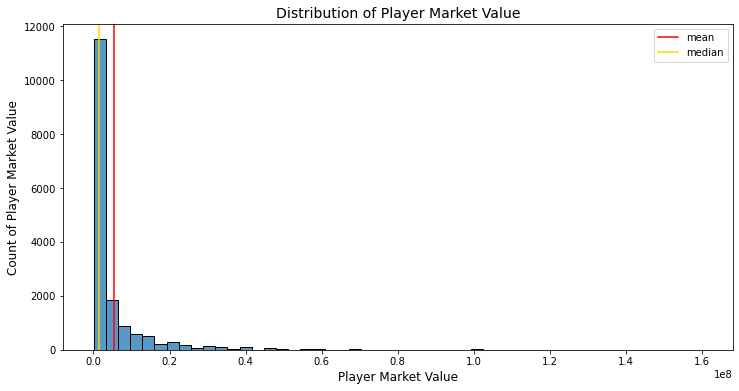

In [138]:
# Visualizing the distribution of Player Market Value
plt.figure(figsize=(12,6))
sns.histplot(data = market_stats, x = 'market_val_amnt', bins=50)
    
# Add vertical lines to show the median and mean
plt.axvline(market_stats['market_val_amnt'].mean(), c='r', label='mean')
plt.axvline(market_stats['market_val_amnt'].median(), c='gold', label='median')
plt.xlabel('Player Market Value', fontsize=12)
plt.ylabel('Count of Player Market Value', fontsize=12)
plt.title("Distribution of Player Market Value", fontsize=14)
plt.legend()

plt.show()

In [139]:
# Find the basic statistics of the column
market_stats['market_val_amnt'].describe()

count    1.674600e+04
mean     5.269950e+06
std      1.110443e+07
min      1.000000e+04
25%      4.000000e+05
50%      1.400000e+06
75%      5.000000e+06
max      1.600000e+08
Name: market_val_amnt, dtype: float64

In [140]:
# Find the mean and median of the column
print(f"The mean value is {market_stats['market_val_amnt'].mean()}")
print(f"The median value is {market_stats['market_val_amnt'].median()}")
print(f"The mode value is {market_stats['market_val_amnt'].mode()[0]}")

The mean value is 5269950.435924997
The median value is 1400000.0
The mode value is 300000.0


Looking at the distribution of the column I can see that the data is very imbalanced. The minimum market value of a player is around 100,000 EUR, the maximum is around 160 million EUR and the average is around 5.2 million EUR. I will now fill the missing values of the Market Value of the players by taking the values from the [Transfermarkt](https://www.transfermarkt.com/) website.

In [141]:
# fill the player with the missing market value
Giampaolo_Pazzini = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Giampaolo Pazzini')
market_stats[Giampaolo_Pazzini]
# Fill this from Transfermarkt
market_stats.loc[Giampaolo_Pazzini, 'market_val_amnt'] = 1100000

In [142]:
# fill the player with the missing market value
Andy_Haworth = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Andy Haworth')
market_stats[Andy_Haworth]
# Fill this from Transfermarkt
market_stats.loc[Andy_Haworth, 'market_val_amnt'] = 150000

In [143]:
# fill the player with the missing market value
Fernando_Torres = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Fernando Torres')
market_stats[Fernando_Torres]
# Fill this from Transfermarkt
market_stats.loc[Fernando_Torres, 'market_val_amnt'] = 1320000

In [144]:
# fill the player with the missing market value
Ryan_Brunt = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Ryan Brunt')
market_stats[Ryan_Brunt]
# Fill these with 0 as he was transferred as loan
market_stats.loc[Ryan_Brunt, 'market_val_amnt'] = 83000

In [145]:
# fill the player with the missing market value
Tiberio_Guarente = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Tiberio Guarente')
market_stats[Tiberio_Guarente]
# Fill these with 0 as he was transferred as loan
market_stats.loc[Tiberio_Guarente, 'market_val_amnt'] = 1650000

In [146]:
# fill the player with the missing market value
Giampiero_Pinzi = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Giampiero Pinzi')
market_stats[Giampiero_Pinzi]
# Fill these with 0 as he was transferred as loan
market_stats.loc[Giampiero_Pinzi, 'market_val_amnt'] = 1650000

In [147]:
# fill the player with the missing market value
Gianluca_Curci_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianluca Curci') & (market_stats['season']==2011)
market_stats[Gianluca_Curci_11]
# Fill these with the market value
market_stats.loc[Gianluca_Curci_11, 'market_val_amnt'] = 5500000

In [148]:
# fill the player with the missing market value
Gianluca_Curci_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianluca Curci') & (market_stats['season']==2013)
market_stats[Gianluca_Curci_13]
# Fill these with the market value
market_stats.loc[Gianluca_Curci_13, 'market_val_amnt'] = 3850000

In [149]:
# fill the player with the missing market value
Gianluca_Curci_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianluca Curci') & (market_stats['season']==2015)
market_stats[Gianluca_Curci_15]
# Fill these with the market value
market_stats.loc[Gianluca_Curci_15, 'market_val_amnt'] = 770000

In [150]:
# fill the player with the missing market value
Gianluca_Curci_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianluca Curci') & (market_stats['season']==2012)
market_stats[Gianluca_Curci_12]
# Fill these with the market value
market_stats.loc[Gianluca_Curci_12, 'market_val_amnt'] = 8250000

In [151]:
# fill the player with the missing market value
Daniel_Osvaldo_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Daniel Osvaldo') & (market_stats['season']==2014)
market_stats[Daniel_Osvaldo_14]
# Fill these with the market value
market_stats.loc[Daniel_Osvaldo_14, 'market_val_amnt'] = 14300000

In [152]:
# fill the player with the missing market value
Daniel_Osvaldo_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Daniel Osvaldo') & (market_stats['season']==2015)
market_stats[Daniel_Osvaldo_15]
# Fill these with the market value
market_stats.loc[Daniel_Osvaldo_15, 'market_val_amnt'] = 12100000

In [153]:
# fill the player with the missing market value
Daniel_Osvaldo_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Daniel Osvaldo') & (market_stats['season']==2013)
market_stats[Daniel_Osvaldo_13]
# Fill these with the market value
market_stats.loc[Daniel_Osvaldo_13, 'market_val_amnt'] = 18700000

In [154]:
# fill the player with the missing market value
Daniel_Osvaldo_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Daniel Osvaldo') & (market_stats['season']==2011)
market_stats[Daniel_Osvaldo_11]
# Fill these with the market value
market_stats.loc[Daniel_Osvaldo_11, 'market_val_amnt'] = 4400000

In [155]:
# fill the player with the missing market value - Óscar Vega
Óscar_Vega = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Óscar Vega')
market_stats[Óscar_Vega]
# Fill these with the market value
market_stats.loc[Óscar_Vega, 'market_val_amnt'] = 2200000

In [156]:
# fill the player with the missing market value - Igor Lewczuk
Igor_Lewczuk = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Igor Lewczuk')
market_stats[Igor_Lewczuk]
# Fill these with the market value
market_stats.loc[Igor_Lewczuk, 'market_val_amnt'] = 8250000

In [157]:
# fill the player with the missing market value
Ikechukwu_Uche_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Ikechukwu Uche') & (market_stats['season']==2011)
market_stats[Ikechukwu_Uche_11]
# Fill these with the market value
market_stats.loc[Ikechukwu_Uche_11, 'market_val_amnt'] = 4400000
# fill the player with the missing market value
Ikechukwu_Uche_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Ikechukwu Uche') & (market_stats['season']==2015)
market_stats[Ikechukwu_Uche_15]
# Fill these with the market value
market_stats.loc[Ikechukwu_Uche_15, 'market_val_amnt'] = 3500000

In [158]:
# Ikechukwu Uche - fill the player with the missing market value
Ikechukwu_Uche = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Ikechukwu Uche')
market_stats[Ikechukwu_Uche]
# Fill these with the market value
market_stats.loc[Ikechukwu_Uche, 'market_val_amnt'] = 3000000

In [159]:
# Dropping the Michael Drennan as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Michael Drennan") == False]

In [160]:
# fill the player with the missing market value
Adam_Campbell = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']== 'Adam Campbell')
market_stats[Adam_Campbell]
# Fill these with 0 as he was transferred as loan
market_stats.loc[Adam_Campbell, 'market_val_amnt'] = 275000

In [161]:
# fill the player with the missing market value
Gianni_Munari_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianni Munari') & (market_stats['season']==2011)
market_stats[Gianni_Munari_11]
# Fill these with the market value
market_stats.loc[Gianni_Munari_11, 'market_val_amnt'] = 2750000

Gianni_Munari_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianni Munari') & (market_stats['season']==2013)
market_stats[Gianni_Munari_13]
# Fill these with the market value
market_stats.loc[Gianni_Munari_13, 'market_val_amnt'] = 1100000

In [162]:
# fill the player with the missing market value
Gianni_Munari_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianni Munari')
market_stats[Gianni_Munari_11]
# Fill these with the market value
market_stats.loc[Gianni_Munari_11, 'market_val_amnt'] = 2750000

In [163]:
# Dropping the Craig Roddan as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Craig Roddan") == False]

In [164]:
# fill the player with the missing market value
Óscar_Serrano = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Óscar Serrano')
market_stats[Óscar_Serrano]
# Fill these with the market value
market_stats.loc[Óscar_Serrano, 'market_val_amnt'] = 2200000

In [165]:
# fill the player with the missing market value
Matteo_Contini_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Matteo Contini') & (market_stats['season']==2011)
market_stats[Matteo_Contini_11]
# Fill these with the market value
market_stats.loc[Matteo_Contini_11, 'market_val_amnt'] = 3080000

Matteo_Contini_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Matteo Contini') & (market_stats['season']==2012)
market_stats[Matteo_Contini_12]
# Fill these with the market value
market_stats.loc[Matteo_Contini_12, 'market_val_amnt'] = 990000

In [166]:
# Dropping the Joel Dixon as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Joel Dixon") == False]

In [167]:
# fill the player with the missing market value
Stephen_Ireland = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Stephen Ireland')
market_stats[Stephen_Ireland]
# Fill these with the market value
market_stats.loc[Stephen_Ireland, 'market_val_amnt'] = 3300000

In [168]:
# fill the player with the missing market value
Matt_Jarvis_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Matt Jarvis') & (market_stats['season']==2015)
market_stats[Matt_Jarvis_15]
# Fill these with the market value
market_stats.loc[Matt_Jarvis_15, 'market_val_amnt'] = 3300000

Matt_Jarvis_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Matt Jarvis') & (market_stats['season']==2012)
market_stats[Matt_Jarvis_12]
# Fill these with the market value
market_stats.loc[Matt_Jarvis_12, 'market_val_amnt'] = 8800000

In [169]:
# Dropping the player as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Óscar Pérez") == False]
# Dropping the player as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Edú") == False]
# Dropping the Ntumba Massanka as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Ntumba Massanka") == False]
# Dropping the Óscar Díaz as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Óscar Díaz") == False]

In [170]:
# fill the player with the missing market value
Aleksandr_Hleb = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Aleksandr Hleb')
market_stats[Aleksandr_Hleb]
# Fill these with the market value
market_stats.loc[Aleksandr_Hleb, 'market_val_amnt'] = 3850000

In [171]:
# fill the player with the missing market value
Gelson_Fernandes = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gelson Fernandes')
market_stats[Gelson_Fernandes]
# Fill these with the market value
market_stats.loc[Gelson_Fernandes, 'market_val_amnt'] = 2750000

In [172]:
# Dropping the players as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Tom Hitchcock") == False]
# Dropping the player as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Adam Dawson") == False]
# Dropping the player as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Jonny Margetts") == False]
# Dropping the player as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Giacomo Bassoli") == False]
# Dropping the Tplayer as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Gianluca Nucera") == False]
# Dropping the player as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Ítalo") == False]

In [173]:
# Danny Graham - fill the player with the missing market value
Danny_Graham_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Danny Graham') & (market_stats['season']==2011)
market_stats[Danny_Graham_11]
# Fill these with the market value
market_stats.loc[Danny_Graham_11, 'market_val_amnt'] = 1650000

Danny_Graham_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Danny Graham') & (market_stats['season']==2012)
market_stats[Danny_Graham_12]
# Fill these with the market value
market_stats.loc[Danny_Graham_12, 'market_val_amnt'] = 4400000

Danny_Graham_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Danny Graham') & (market_stats['season']==2013)
market_stats[Danny_Graham_13]
# Fill these with the market value
market_stats.loc[Danny_Graham_13, 'market_val_amnt'] = 3850000

Danny_Graham_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Danny Graham') & (market_stats['season']==2014)
market_stats[Danny_Graham_14]
# Fill these with the market value
market_stats.loc[Danny_Graham_14, 'market_val_amnt'] = 3300000

Danny_Graham_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Danny Graham') & (market_stats['season']==2016)
market_stats[Danny_Graham_16]
# Fill these with the market value
market_stats.loc[Danny_Graham_16, 'market_val_amnt'] = 1650000

In [174]:
# Emmanuel Frimpong - fill the player with the missing market value
Emmanuel_Frimpong = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Emmanuel Frimpong')
market_stats[Emmanuel_Frimpong]
# Fill these with the market value
market_stats.loc[Emmanuel_Frimpong, 'market_val_amnt'] = 1650000

In [175]:
# "Philipp Wollscheid" - fill the player with the missing market value
Philipp_Wollscheid_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Philipp Wollscheid') & (market_stats['season']==2012)
market_stats[Philipp_Wollscheid_12]
# Fill these with the market value
market_stats.loc[Philipp_Wollscheid_12, 'market_val_amnt'] = 8250000

Philipp_Wollscheid_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Philipp Wollscheid') & (market_stats['season']==2014)
market_stats[Philipp_Wollscheid_14]
# Fill these with the market value
market_stats.loc[Philipp_Wollscheid_14, 'market_val_amnt'] = 6600000

Philipp_Wollscheid_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Philipp Wollscheid') & (market_stats['season']==2015)
market_stats[Philipp_Wollscheid_15]
# Fill these with the market value
market_stats.loc[Philipp_Wollscheid_15, 'market_val_amnt'] = 5500000

Philipp_Wollscheid_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Philipp Wollscheid') & (market_stats['season']==2016)
market_stats[Philipp_Wollscheid_16]
# Fill these with the market value
market_stats.loc[Philipp_Wollscheid_16, 'market_val_amnt'] = 8250000

Philipp_Wollscheid_17 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Philipp Wollscheid') & (market_stats['season']==2017)
market_stats[Philipp_Wollscheid_17]
# Fill these with the market value
market_stats.loc[Philipp_Wollscheid_17, 'market_val_amnt'] = 2750000

In [176]:
# "Giandomenico Mesto"
Giandomenico_Mesto = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Giandomenico Mesto')
market_stats[Giandomenico_Mesto]
# Fill these with the market value
market_stats.loc[Giandomenico_Mesto, 'market_val_amnt'] = 4400000

In [177]:
# "Gianluca Comotto" - fill the player with the missing market value
Gianluca_Comotto = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gianluca Comotto')
market_stats[Gianluca_Comotto]
# Fill these with the market value
market_stats.loc[Gianluca_Comotto, 'market_val_amnt'] = 1210000

In [178]:
# fill the player with the missing market value
Emmanuel_Adebayor = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Emmanuel Adebayor')
market_stats[Emmanuel_Adebayor]
# Fill these with the market value
market_stats.loc[Emmanuel_Adebayor, 'market_val_amnt'] = 5500000

In [179]:
# fill the player with the missing market value
Étienne_Didot = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Étienne Didot')
market_stats[Étienne_Didot]
# Fill these with the market value
market_stats.loc[Étienne_Didot, 'market_val_amnt'] = 550000

In [180]:
# Dropping the players as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Éric Abidal") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Adam Francis") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Nuri Sahin") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Aadil Assana") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Innocent Emeghara") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Giordano Maccarrone") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Giovanni Catalano") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Giovanni Marchese") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Giovanni Pasquale") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Cani") == False]

In [181]:
# Dropping the players as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Aaron Lennox") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Mattia Cassani") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Gerhard Tremmel") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Giulio Cavallari") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Émerson Conceição") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Gerard Bordas") == False]

In [182]:
# fill the player with the missing market value
Scott_Harrison = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Scott Harrison')
market_stats[Scott_Harrison]
# Fill these with the market value
market_stats.loc[Scott_Harrison, 'market_val_amnt'] = 275000

In [183]:
# fill the player with the missing market value
Mattia_Cassani = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mattia Cassani')
market_stats[Mattia_Cassani]
# Fill these with the market value
market_stats.loc[Mattia_Cassani, 'market_val_amnt'] = 2750000

In [184]:
# fill the player with the missing market value
Carlos_Matheu = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Carlos Matheu')
market_stats[Carlos_Matheu]
# Fill these with the market value
market_stats.loc[Carlos_Matheu, 'market_val_amnt'] = 1430000

In [185]:
# fill the player with the missing market value
Issam_Jemâa = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Issam Jemâa')
market_stats[Issam_Jemâa]
# Fill these with the market value
market_stats.loc[Issam_Jemâa, 'market_val_amnt'] = 1870000

In [186]:
# fill the player with the missing market value
Gil_Vermouth = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gil Vermouth')
market_stats[Gil_Vermouth]
# Fill these with the market value
market_stats.loc[Gil_Vermouth, 'market_val_amnt'] = 1870000

In [187]:
# Giulio Migliaccio - fill the player with the missing market value
Giulio_Migliaccio_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Giulio Migliaccio') & (market_stats['season']==2012)
market_stats[Giulio_Migliaccio_12]
# Fill these with the market value
market_stats.loc[Giulio_Migliaccio_12, 'market_val_amnt'] = 4400000

Giulio_Migliaccio_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Giulio Migliaccio') & (market_stats['season']==2013)
market_stats[Giulio_Migliaccio_13]
# Fill these with the market value
market_stats.loc[Giulio_Migliaccio_13, 'market_val_amnt'] = 2200000

In [188]:
# Reece Brown - fill the player with the missing market value
Reece_Brown = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Reece Brown')
market_stats[Reece_Brown]
# Fill these with the market value
market_stats.loc[Reece_Brown, 'market_val_amnt'] = 275000

In [189]:
# fill the player with the missing market value - Steve von Bergen
Steve_Bergen = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Steve von Bergen')
market_stats[Steve_Bergen]
# Fill these with the market value
market_stats.loc[Steve_Bergen, 'market_val_amnt'] = 1650000

In [190]:
# fill the player with the missing market value - Marco Rigoni 
Marco_Rigoni = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Rigoni')
market_stats[Marco_Rigoni]
# Fill these with the market value
market_stats.loc[Marco_Rigoni, 'market_val_amnt'] = 1430000

In [191]:
# fill the player with the missing market value - Steven Pienaar
Steven_Pienaar_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Steven Pienaar') & (market_stats['season']==2016)
market_stats[Steven_Pienaar_16]
# Fill these with the market value
market_stats.loc[Steven_Pienaar_16, 'market_val_amnt'] = 1650000

In [192]:
# fill the player with the missing market value
Steven_Pienaar = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Steven Pienaar')
market_stats[Steven_Pienaar]
# Fill these with the market value
market_stats.loc[Steven_Pienaar, 'market_val_amnt'] = 10450000

In [193]:
# Dropping the players as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Cameron Stewart") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Jaanai Gordon") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Giuseppe Biava") == False]

In [194]:
# fill the player with the missing market value
Manu_Moral = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Manu del Moral')
market_stats[Manu_Moral]
# Fill these with the market value
market_stats.loc[Manu_Moral, 'market_val_amnt'] = 1650000

In [195]:
# fill the player with the missing market value
Derek_Boateng = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Derek Boateng')
market_stats[Derek_Boateng]
# Fill these with the market value
market_stats.loc[Derek_Boateng, 'market_val_amnt'] = 1650000

In [196]:
# fill the player with the missing market value
Peter_Ramage = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Peter Ramage')
market_stats[Peter_Ramage]
# Fill these with the market value
market_stats.loc[Peter_Ramage, 'market_val_amnt'] = 1100000

In [197]:
# fill the player with the missing market value
Georgios_Samaras = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Georgios Samaras')
market_stats[Georgios_Samaras]
# Fill these with the market value
market_stats.loc[Georgios_Samaras, 'market_val_amnt'] = 3300000

In [198]:
# fill the player with the missing market value
Gerald_Asamoah = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gerald Asamoah')
market_stats[Gerald_Asamoah]
# Fill these with the market value
market_stats.loc[Gerald_Asamoah, 'market_val_amnt'] = 1650000

In [199]:
# fill the player with the missing market value
Édouard_Cissé = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Édouard Cissé')
market_stats[Édouard_Cissé]
# Fill these with the market value
market_stats.loc[Édouard_Cissé, 'market_val_amnt'] = 1650000

In [200]:
# fill the player with the missing market value
Frankie_Sutherland = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Frankie Sutherland')
market_stats[Frankie_Sutherland]
# Fill these with the market value
market_stats.loc[Frankie_Sutherland, 'market_val_amnt'] = 55000

In [201]:
# fill the player with the missing market value - Giulio Migliaccio
Marco_Borriello_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2011)
market_stats[Marco_Borriello_11]
# Fill these with the market value
market_stats.loc[Marco_Borriello_11, 'market_val_amnt'] = 14300000

Marco_Borriello_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2012)
market_stats[Marco_Borriello_12]
# Fill these with the market value
market_stats.loc[Marco_Borriello_12, 'market_val_amnt'] = 12100000

Marco_Borriello_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2013)
market_stats[Marco_Borriello_13]
# Fill these with the market value
market_stats.loc[Marco_Borriello_13, 'market_val_amnt'] = 7700000

Marco_Borriello_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2014)
market_stats[Marco_Borriello_14]
# Fill these with the market value
market_stats.loc[Marco_Borriello_14, 'market_val_amnt'] = 5500000

Marco_Borriello_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2015)
market_stats[Marco_Borriello_15]
# Fill these with the market value
market_stats.loc[Marco_Borriello_15, 'market_val_amnt'] = 1100000

Marco_Borriello_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2016)
market_stats[Marco_Borriello_16]
# Fill these with the market value
market_stats.loc[Marco_Borriello_16, 'market_val_amnt'] = 880000

Marco_Borriello_17 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Borriello') & (market_stats['season']==2017)
market_stats[Marco_Borriello_17]
# Fill these with the market value
market_stats.loc[Marco_Borriello_17, 'market_val_amnt'] = 880000

In [202]:
# fill the player with the missing market value
Gary_Fletcher = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Gary Taylor-Fletcher')
market_stats[Gary_Fletcher]
# Fill these with the market value
market_stats.loc[Gary_Fletcher, 'market_val_amnt'] = 550000

In [203]:
# fill the player with the missing market value
Marco_Russ_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Russ') & (market_stats['season']==2011)
market_stats[Marco_Russ_11]
# Fill these with the market value
market_stats.loc[Marco_Russ_11, 'market_val_amnt'] = 3030000

Marco_Russ_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Russ') & (market_stats['season']==2012)
market_stats[Marco_Russ_12]
# Fill these with the market value
market_stats.loc[Marco_Russ_12, 'market_val_amnt'] = 2750000

Marco_Russ_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Marco Russ') & (market_stats['season']==2013)
market_stats[Marco_Russ_13]
# Fill these with the market value
market_stats.loc[Marco_Russ_13, 'market_val_amnt'] = 1650000

In [204]:
# fill the player with the missing market value
David_Bentley_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='David Bentley') & (market_stats['season']==2011)
market_stats[David_Bentley_11]
# Fill these with the market value
market_stats.loc[David_Bentley_11, 'market_val_amnt'] = 7700000

David_Bentley_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='David Bentley') & (market_stats['season']==2012)
market_stats[David_Bentley_12]
# Fill these with the market value
market_stats.loc[David_Bentley_12, 'market_val_amnt'] = 4950000

In [205]:
# fill the player with the missing market value
George_McCartney_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='George McCartney') & (market_stats['season']==2011)
market_stats[George_McCartney_11]
# Fill these with the market value
market_stats.loc[George_McCartney_11, 'market_val_amnt'] = 3300000

George_McCartney_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='George McCartney') & (market_stats['season']==2012)
market_stats[George_McCartney_12]
# Fill these with the market value
market_stats.loc[George_McCartney_12, 'market_val_amnt'] = 1930000

In [206]:
# fill the player with the missing market value
Édgar_Álvarez = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Édgar Álvarez')
market_stats[Édgar_Álvarez]
# Fill these with the market value
market_stats.loc[Édgar_Álvarez, 'market_val_amnt'] = 1540000

In [207]:
# fill the player with the missing market value
Franck_Tabanou_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Franck Tabanou') & (market_stats['season']==2013)
market_stats[Franck_Tabanou_13]
# Fill these with the market value
market_stats.loc[Franck_Tabanou_13, 'market_val_amnt'] = 6600000

Franck_Tabanou_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Franck Tabanou') & (market_stats['season']==2015)
market_stats[Franck_Tabanou_15]
# Fill these with the market value
market_stats.loc[Franck_Tabanou_15, 'market_val_amnt'] = 6600000

Franck_Tabanou_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Franck Tabanou') & (market_stats['season']==2016)
market_stats[Franck_Tabanou_16]
# Fill these with the market value
market_stats.loc[Franck_Tabanou_16, 'market_val_amnt'] = 3850000

Franck_Tabanou_17 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Franck Tabanou') & (market_stats['season']==2017)
market_stats[Franck_Tabanou_17]
# Fill these with the market value
market_stats.loc[Franck_Tabanou_17, 'market_val_amnt'] = 2200000

In [208]:
# Dropping the players as no market value in google
market_stats = market_stats[market_stats["Player"].str.contains("Callum Hope") == False]
market_stats = market_stats[market_stats["Player"].str.contains("David González") == False]
market_stats = market_stats[market_stats["Player"].str.contains("Ángelo Balanta") == False]

In [209]:
# fill the player with the missing market value
Darren_Bent_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Darren Bent') & (market_stats['season']==2013)
market_stats[Darren_Bent_13]
# Fill these with the market value
market_stats.loc[Darren_Bent_13, 'market_val_amnt'] = 9900000

Darren_Bent_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Darren Bent') & (market_stats['season']==2014)
market_stats[Darren_Bent_14]
# Fill these with the market value
market_stats.loc[Darren_Bent_14, 'market_val_amnt'] = 5500000

In [210]:
# fill the player with the missing market value
Apoño_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Apoño') & (market_stats['season']==2011)
market_stats[Apoño_11]
# Fill these with the market value
market_stats.loc[Apoño_11, 'market_val_amnt'] = 4400000

Apoño_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Apoño') & (market_stats['season']==2012)
market_stats[Apoño_12]
# Fill these with the market value
market_stats.loc[Apoño_12, 'market_val_amnt'] = 3300000

In [211]:
# fill the player with the missing market value
David_Abraham_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='David Abraham') & (market_stats['season']==2012)
market_stats[David_Abraham_12]
# Fill these with the market value
market_stats.loc[David_Abraham_12, 'market_val_amnt'] = 3850000

David_Abraham_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='David Abraham') & (market_stats['season']==2015)
market_stats[David_Abraham_15]
# Fill these with the market value
market_stats.loc[David_Abraham_15, 'market_val_amnt'] = 2200000

In [212]:
# fill the player with the missing market value
George_Elokobi = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='George Elokobi')
market_stats[George_Elokobi]
# Fill these with the market value
market_stats.loc[George_Elokobi, 'market_val_amnt'] = 2750000

In [213]:
# fill the player with the missing market value
George_Waring = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='George Waring')
market_stats[George_Waring]
# Fill these with the market value
market_stats.loc[George_Waring, 'market_val_amnt'] = 2750000

In [214]:
# fill the player with the missing market value - Louis Saha
Louis_Saha = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Louis Saha')
market_stats[Louis_Saha]
# Fill these with the market value
market_stats.loc[Louis_Saha, 'market_val_amnt'] = 4400000

In [215]:
# fill the player with the missing market value - Dennis Aogo
Dennis_Aogo_17 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Dennis Aogo') & (market_stats['season']==2017)
market_stats[Dennis_Aogo_17]
# Fill these with the market value
market_stats.loc[Dennis_Aogo_17, 'market_val_amnt'] = 7150000

In [216]:
# fill the player with the missing market value
Dennis_Aogo = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Dennis Aogo')
market_stats[Dennis_Aogo]
# Fill these with the market value
market_stats.loc[Dennis_Aogo, 'market_val_amnt'] = 1650000

In [217]:
# fill the player with the missing market value - Michel Bastos
Michel_Bastos = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Michel Bastos')
market_stats[Michel_Bastos]
# Fill these with the market value
market_stats.loc[Michel_Bastos, 'market_val_amnt'] = 7700000

In [218]:
# fill the player with the missing market value - Yossi Benayoun
Yossi_Benayoun_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Yossi Benayoun') & (market_stats['season']==2011)
market_stats[Yossi_Benayoun_11]
# Fill these with the market value
market_stats.loc[Yossi_Benayoun_11, 'market_val_amnt'] = 9350000

Yossi_Benayoun_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Yossi Benayoun') & (market_stats['season']==2012)
market_stats[Yossi_Benayoun_12]
# Fill these with the market value
market_stats.loc[Yossi_Benayoun_12, 'market_val_amnt'] = 7700000

In [219]:
# fill the player with the missing market value - Antonio Nocerino
Antonio_Nocerino_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Antonio Nocerino') & (market_stats['season']==2011)
market_stats[Antonio_Nocerino_11]
# Fill these with the market value
market_stats.loc[Antonio_Nocerino_11, 'market_val_amnt'] = 9900000

Antonio_Nocerino_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Antonio Nocerino') & (market_stats['season']==2013)
market_stats[Antonio_Nocerino_13]
# Fill these with the market value
market_stats.loc[Antonio_Nocerino_13, 'market_val_amnt'] = 4950000

Antonio_Nocerino_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Antonio Nocerino') & (market_stats['season']==2014)
market_stats[Antonio_Nocerino_14]
# Fill these with the market value
market_stats.loc[Antonio_Nocerino_14, 'market_val_amnt'] = 4950000

In [220]:
# fill the player with the missing market value - Morgan Amalfitano
Morgan_Amalfitano_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Morgan Amalfitano') & (market_stats['season']==2011)
market_stats[Morgan_Amalfitano_11]
# Fill these with the market value
market_stats.loc[Morgan_Amalfitano_11, 'market_val_amnt'] = 7150000

Morgan_Amalfitano_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Morgan Amalfitano') & (market_stats['season']==2013)
market_stats[Morgan_Amalfitano_13]
# Fill these with the market value
market_stats.loc[Morgan_Amalfitano_13, 'market_val_amnt'] = 4950000

Morgan_Amalfitano_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Morgan Amalfitano') & (market_stats['season']==2014)
market_stats[Antonio_Nocerino_14]
# Fill these with the market value
market_stats.loc[Antonio_Nocerino_14, 'market_val_amnt'] = 5500000

Morgan_Amalfitano_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Morgan Amalfitano') & (market_stats['season']==2015)
market_stats[Morgan_Amalfitano_15]
# Fill these with the market value
market_stats.loc[Morgan_Amalfitano_15, 'market_val_amnt'] = 5500000

Morgan_Amalfitano_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Morgan Amalfitano') & (market_stats['season']==2016)
market_stats[Morgan_Amalfitano_16]
# Fill these with the market value
market_stats.loc[Morgan_Amalfitano_16, 'market_val_amnt'] = 5500000

In [221]:
# fill the player with the missing market value - Morgan Amalfitano
Morgan_Amalfitano = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Morgan Amalfitano')
market_stats[Morgan_Amalfitano]
# Fill these with the market value
market_stats.loc[Morgan_Amalfitano, 'market_val_amnt'] = 7150000

In [222]:
# fill the player with the missing market value - Wayne Bridge
Wayne_Bridge = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Wayne Bridge')
market_stats[Wayne_Bridge]
# Fill these with the market value
market_stats.loc[Wayne_Bridge, 'market_val_amnt'] = 5500000

In [223]:
# fill the player with the missing market value - Mathieu Bodmer
Mathieu_Bodmer_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mathieu Bodmer') & (market_stats['season']==2012)
market_stats[Mathieu_Bodmer_12]
# Fill these with the market value
market_stats.loc[Mathieu_Bodmer_12, 'market_val_amnt'] = 3300000

Mathieu_Bodmer_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mathieu Bodmer') & (market_stats['season']==2013)
market_stats[Mathieu_Bodmer_13]
# Fill these with the market value
market_stats.loc[Mathieu_Bodmer_13, 'market_val_amnt'] = 2750000

In [224]:
# fill the player with the missing market value
Mathieu_Bodmer = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mathieu Bodmer')
market_stats[Mathieu_Bodmer]
# Fill these with the market value
market_stats.loc[Mathieu_Bodmer, 'market_val_amnt'] = 1100000

In [225]:
# Alessandro Matri
Alessandro_Matri_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Alessandro Matri') & (market_stats['season']==2011)
market_stats[Alessandro_Matri_11]
# Fill these with the market value
market_stats.loc[Alessandro_Matri_11, 'market_val_amnt'] = 18150000

Alessandro_Matri_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Alessandro Matri') & (market_stats['season']==2013)
market_stats[Alessandro_Matri_13]
# Fill these with the market value
market_stats.loc[Alessandro_Matri_13, 'market_val_amnt'] = 12100000

Alessandro_Matri_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Alessandro Matri') & (market_stats['season']==2014)
market_stats[Alessandro_Matri_14]
# Fill these with the market value
market_stats.loc[Alessandro_Matri_14, 'market_val_amnt'] = 9900000

Alessandro_Matri_15 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Alessandro Matri') & (market_stats['season']==2015)
market_stats[Alessandro_Matri_15]
# Fill these with the market value
market_stats.loc[Alessandro_Matri_15, 'market_val_amnt'] = 6600000

Alessandro_Matri_16 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Alessandro Matri') & (market_stats['season']==2016)
market_stats[Alessandro_Matri_16]
# Fill these with the market value
market_stats.loc[Alessandro_Matri_16, 'market_val_amnt'] = 3850000

Alessandro_Matri_19 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Alessandro Matri') & (market_stats['season']==2019)
market_stats[Alessandro_Matri_19]
# Fill these with the market value
market_stats.loc[Alessandro_Matri_19, 'market_val_amnt'] = 330000

In [226]:
# fill the player with the missing market value - Yassine Jebbour
Yassine = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Yassine Jebbour')
market_stats[Yassine]
# Fill these with the market value
market_stats.loc[Yassine, 'market_val_amnt'] = 1100000

In [227]:
# fill the player with the missing market value - Emiliano Sala
Emiliano_Sala = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Emiliano Sala')
market_stats[Emiliano_Sala]
# Fill these with the market value
market_stats.loc[Emiliano_Sala, 'market_val_amnt'] = 17600000

In [228]:
# fill the player with the missing market value - Emanuel Pogatetz
Emanuel = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Emanuel Pogatetz')
market_stats[Emanuel]
# Fill these with the market value
market_stats.loc[Emanuel, 'market_val_amnt'] = 3850000

In [229]:
# fill the player with the missing market value - Maxi López
Maxi_López_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Maxi López') & (market_stats['season']==2011)
market_stats[Maxi_López_11]
# Fill these with the market value
market_stats.loc[Maxi_López_11, 'market_val_amnt'] = 3300000

Maxi_López_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Maxi López') & (market_stats['season']==2012)
market_stats[Maxi_López_12]
# Fill these with the market value
market_stats.loc[Maxi_López_12, 'market_val_amnt'] = 6050000

Maxi_López_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Maxi López') & (market_stats['season']==2013)
market_stats[Maxi_López_13]
# Fill these with the market value
market_stats.loc[Maxi_López_13, 'market_val_amnt'] = 5500000

Maxi_López_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Maxi López') & (market_stats['season']==2014)
market_stats[Maxi_López_14]
# Fill these with the market value
market_stats.loc[Maxi_López_14, 'market_val_amnt'] = 3850000

Maxi_López_17 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Maxi López') & (market_stats['season']==2017)
market_stats[Maxi_López_17]
# Fill these with the market value
market_stats.loc[Maxi_López_17, 'market_val_amnt'] = 550000

In [230]:
# fill the player with the missing market value - Emiliano Armenteros
Emiliano_Armenteros = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Emiliano Armenteros')
market_stats[Emiliano_Armenteros]
# Fill these with the market value
market_stats.loc[Emiliano_Armenteros, 'market_val_amnt'] = 2750000

In [231]:
# Hélder Postiga - fill the player with the missing market value
Hélder_Postiga_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Hélder Postiga') & (market_stats['season']==2011)
market_stats[Hélder_Postiga_11]
# Fill these with the market value
market_stats.loc[Hélder_Postiga_11, 'market_val_amnt'] = 7370000

Hélder_Postiga_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Hélder Postiga') & (market_stats['season']==2013)
market_stats[Hélder_Postiga_13]
# Fill these with the market value
market_stats.loc[Hélder_Postiga_13, 'market_val_amnt'] = 5500000

Hélder_Postiga_14 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Hélder Postiga') & (market_stats['season']==2014)
market_stats[Hélder_Postiga_14]
# Fill these with the market value
market_stats.loc[Hélder_Postiga_14, 'market_val_amnt'] = 3850000

In [232]:
# Mohamed Sissoko - fill the player with the missing market value
Mohamed_Sissoko_11 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mohamed Sissoko') & (market_stats['season']==2011)
market_stats[Mohamed_Sissoko_11]
# Fill these with the market value
market_stats.loc[Mohamed_Sissoko_11, 'market_val_amnt'] = 8250000

Mohamed_Sissoko_12 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mohamed Sissoko') & (market_stats['season']==2012)
market_stats[Mohamed_Sissoko_12]
# Fill these with the market value
market_stats.loc[Mohamed_Sissoko_12, 'market_val_amnt'] = 6600000

Mohamed_Sissoko_13 = (market_stats['market_val_amnt'].isna()) & (market_stats['Player']=='Mohamed Sissoko') & (market_stats['season']==2013)
market_stats[Mohamed_Sissoko_13]
# Fill these with the market value
market_stats.loc[Mohamed_Sissoko_13, 'market_val_amnt'] = 3850000

There are still some misssing values in the dataset even after filling hundreds of them manually. I will take a look at the distribution of the column again and find the mean, median and mode.

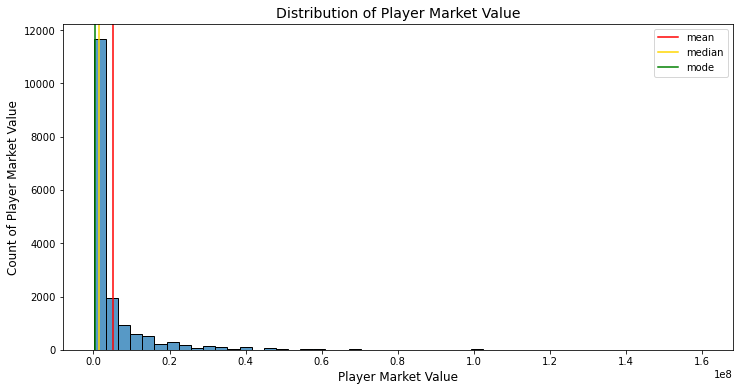

In [233]:
# Visualizing the distribution of Player Market Value
plt.figure(figsize=(12,6))
sns.histplot(data = market_stats, x = 'market_val_amnt', bins=50)
    
# Add vertical lines to show the median and mean
plt.axvline(market_stats['market_val_amnt'].mean(), c='r', label='mean')
plt.axvline(market_stats['market_val_amnt'].median(), c='gold', label='median')
plt.axvline(market_stats['market_val_amnt'].mode()[0], c='green', label='mode')
plt.xlabel('Player Market Value', fontsize=12)
plt.ylabel('Count of Player Market Value', fontsize=12)
plt.title("Distribution of Player Market Value", fontsize=14)
plt.legend()

plt.show()

In [234]:
# Find the mean and median of the column
print(f"The mean value is {market_stats['market_val_amnt'].mean()}")
print(f"The median value is {market_stats['market_val_amnt'].median()}")
print(f"The mode value is {market_stats['market_val_amnt'].mode()[0]}")

The mean value is 5258641.266119578
The median value is 1500000.0
The mode value is 300000.0


For the remaining missing values in the column `market_val_amnt` I will the values with the median of the Market Value which is around 1.5 million EUR.

In [235]:
# Fill the null values with the median value
market_stats['market_val_amnt'] = market_stats['market_val_amnt'].fillna(1500000)

In [215]:
# Look for null values
market_stats.isna().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
player_id                   0
Player                      0
player_age                  0
player_nation               0
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt           0
market_val_amnt             0
Rk                      11509
MP                      11509
Starts                  11509
Min                     11509
90s                     11509
Gls                     11509
Ast                     11509
G-PK                    11509
PK                      11509
PKatt                   11509
CrdY                    11509
CrdR                    11509
Gls.1                   11509
Ast.1                   11509
G+A                     11509
G-PK.1                  11509
G+A-PK                  11509
xG        

The missing values in the Market Value column has been filled. There are now no missing values in this column. There are missing values in otehr columns as well. This is because there is no data for some players in the fbref dataset as there is in the raw_transfer dataset. So I will remove these missing rows. 

In [236]:
# Remove rows with null values
market_stats = market_stats.dropna(how='any',axis=0)
# Check the dataset
market_stats.head()

league  season window  team_id                team_name  \
0   Premier League    2011      s      543  Wolverhampton Wanderers   
1   Premier League    2011      s      543  Wolverhampton Wanderers   
8   Premier League    2011      s      543  Wolverhampton Wanderers   
11  Premier League    2011      s      543  Wolverhampton Wanderers   
19  Premier League    2011      s     2288             Swansea City   

   team_country  player_id           Player  player_age player_nation  ...  \
0       England      42751    Roger Johnson        28.0       England  ...   
1       England      38090     Jamie O'Hara        24.0       England  ...   
8       England      38091     Adam Hammill        24.0       England  ...   
11      England      48078        Sam Vokes        22.0         Wales  ...   
19      England      14066  Wayne Routledge        26.0       England  ...   

   G+A-PK   xG npxG   xA  npxG+xA  xG.1 xA.1  xG+xA  npxG.1  npxG+xA.1  
0    0.08  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
1    0.32  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
8    0.17  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
11   0.00  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
19   0.09  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  

[5 rows x 42 columns]

In [237]:
# Check again for null values
market_stats.isna().sum()

league                  0
season                  0
window                  0
team_id                 0
team_name               0
team_country            0
player_id               0
Player                  0
player_age              0
player_nation           0
player_pos              0
counter_team_id         0
counter_team_name       0
counter_team_country    0
transfer_fee_amnt       0
market_val_amnt         0
Rk                      0
MP                      0
Starts                  0
Min                     0
90s                     0
Gls                     0
Ast                     0
G-PK                    0
PK                      0
PKatt                   0
CrdY                    0
CrdR                    0
Gls.1                   0
Ast.1                   0
G+A                     0
G-PK.1                  0
G+A-PK                  0
xG                      0
npxG                    0
xA                      0
npxG+xA                 0
xG.1                    0
xA.1        

The dataset now has no missing values. I will check the shape of the dataframe.

In [240]:
# Take a look at the shape of the combined dataframe
print(f'There are {market_stats.shape[0]} rows and {market_stats.shape[1]} columns in the dataset.')

There are 8438 rows and 42 columns in the dataset.


There are 8438 rows and 42 columns in the dataset. I will now rename some of the columns for better understanding and interpretability.

**Renaming column names for better understanding**

I will first change the position of the player name column so that it's the first column in the dataframe.

In [241]:
# change the position of the column Player
first_col = market_stats.pop('Player')
market_stats.insert(0, 'Player', first_col)
# look at the first 5 rows again for sanity check
market_stats.head()

Player          league  season window  team_id  \
0     Roger Johnson  Premier League    2011      s      543   
1      Jamie O'Hara  Premier League    2011      s      543   
8      Adam Hammill  Premier League    2011      s      543   
11        Sam Vokes  Premier League    2011      s      543   
19  Wayne Routledge  Premier League    2011      s     2288   

                  team_name team_country  player_id  player_age player_nation  \
0   Wolverhampton Wanderers      England      42751        28.0       England   
1   Wolverhampton Wanderers      England      38090        24.0       England   
8   Wolverhampton Wanderers      England      38091        24.0       England   
11  Wolverhampton Wanderers      England      48078        22.0         Wales   
19             Swansea City      England      14066        26.0       England   

    ... G+A-PK   xG npxG   xA  npxG+xA  xG.1 xA.1  xG+xA  npxG.1  npxG+xA.1  
0   ...   0.08  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
1   ...   0.32  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
8   ...   0.17  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
11  ...   0.00  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  
19  ...   0.09  0.0  0.0  0.0      0.0   0.0  0.0    0.0     0.0        0.0  

[5 rows x 42 columns]

In [242]:
# check summary of the dataframe
market_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                8438 non-null   object 
 1   league                8438 non-null   object 
 2   season                8438 non-null   int64  
 3   window                8438 non-null   object 
 4   team_id               8438 non-null   int64  
 5   team_name             8438 non-null   object 
 6   team_country          8438 non-null   object 
 7   player_id             8438 non-null   int64  
 8   player_age            8438 non-null   float64
 9   player_nation         8438 non-null   object 
 10  player_pos            8438 non-null   object 
 11  counter_team_id       8438 non-null   object 
 12  counter_team_name     8438 non-null   object 
 13  counter_team_country  8438 non-null   object 
 14  transfer_fee_amnt     8438 non-null   float64
 15  market_val_amnt     

I will remove the unnecessary columns `team_id`, `player_id`, `counter_team_id` and `Rk` as these are not relevant and contain redundant information.

In [243]:
# Remove the unnecessary columns from the dataset
market_stats.drop('team_id', axis=1, inplace=True)
market_stats.drop('player_id', axis=1, inplace=True)
market_stats.drop('counter_team_id', axis=1, inplace=True)
market_stats.drop('Rk', axis=1, inplace=True)

I will also rename the columns for better understanding and interpretability.

In [244]:
# Rename the columns
market_stats.rename(columns={'90s': 'Min/90'}, inplace=True)
market_stats.rename(columns={'G-PK': 'NP_Gls'}, inplace=True)
market_stats.rename(columns={'PKatt': 'PK_Att'}, inplace=True)
market_stats.rename(columns={'Gls.1': 'Gls/90'}, inplace=True)
market_stats.rename(columns={'Ast.1': 'Ast/90'}, inplace=True)
market_stats.rename(columns={'G+A': 'Gls+Ast/90'}, inplace=True)
market_stats.rename(columns={'G-PK.1': 'Gls-PK/90'}, inplace=True)
market_stats.rename(columns={'G+A-PK': 'Gls+Ast-PK/90'}, inplace=True)
market_stats.rename(columns={'xG.1': 'xG/90'}, inplace=True)
market_stats.rename(columns={'xA.1': 'xA/90'}, inplace=True)
market_stats.rename(columns={'xG+xA': 'xG+xA/90'}, inplace=True)
market_stats.rename(columns={'npxG.1': 'npxG/90'}, inplace=True)
market_stats.rename(columns={'npxG+xA.1': 'npxG+xA/90'}, inplace=True)

market_stats.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos       counter_team_name  \
0       England        28.0       England         CB         Birmingham City   
1       England        24.0       England         CM       Tottenham Hotspur   
8       England        24.0       England         RW        Middlesbrough FC   
11      England        22.0         Wales         CF  Brighton & Hove Albion   
19      England        26.0       England         LW        Newcastle United   

    ... Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  \
0   ...          0.08  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
1   ...          0.32  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
8   ...          0.17  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
11  ...          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
19  ...          0.09  0.0   0.0  0.0      0.0    0.0    0.0       0.0   

    npxG/90  npxG+xA/90  
0       0.0         0.0  
1       0.0         0.0  
8       0.0         0.0  
11      0.0         0.0  
19      0.0         0.0  

[5 rows x 38 columns]

In [246]:
# Take a look at the shape of the combined dataframe
print(f'There are {market_stats.shape[0]} rows and {market_stats.shape[1]} columns in the dataset.')

There are 8438 rows and 38 columns in the dataset.


In [245]:
# Check the summary again
market_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                8438 non-null   object 
 1   league                8438 non-null   object 
 2   season                8438 non-null   int64  
 3   window                8438 non-null   object 
 4   team_name             8438 non-null   object 
 5   team_country          8438 non-null   object 
 6   player_age            8438 non-null   float64
 7   player_nation         8438 non-null   object 
 8   player_pos            8438 non-null   object 
 9   counter_team_name     8438 non-null   object 
 10  counter_team_country  8438 non-null   object 
 11  transfer_fee_amnt     8438 non-null   float64
 12  market_val_amnt       8438 non-null   float64
 13  MP                    8438 non-null   float64
 14  Starts                8438 non-null   float64
 15  Min                 

The column names have been renamed and my dataset is now clean. 

### Data Dictionary

Before I move forward, let me first understand each of my variables. There are **8438 rows** and **38 columns** in the dataset. The variables in the dataset are as follows:

**Player Information**
- `Player` - Player's name
- `league` - Football league the player is currently playing in 
- `season` - Year the Market Value was reported
- `window` - The time of the year the Market Value was recorded (s represents summer and w represents winter)
- `team_name` - Team the player currently plays for
- `team_country` - Country of the team the player currently plays for
- `player_age` - Player's age
- `player_nation` - Player's nationality
- `player_nation2` - Player's second nationality
- `player_pos` - On-field position of the player
- `counter_team_name` - The team the player left
- `counter_team_country` - Country of the team the player left
- `transfer_fee_amnt` - Player's Transfer fee amount in EUR
- `market_val_amnt` - Player's Market Value in EUR estimated by Transfermarkt

**Player Performance statistics**
- `MP` - Matches Played by the player
- `Starts` - Games started by the player
- `Min` - Minutes played by the player
- `Min/90` - Minutes played by the player converted to per 90 minutes (single game)
- `Gls` - Goals scored by the player
- `Ast` - Assists made by the player
- `NP_Gls` - Non-Penalty goals made by the player
- `PK` - Penalty Kicks made by the player
- `PK_Att` - Penalty Kicks attempted by the player
- `CrdY` - Yellow Cards received by the player
- `CrdR` - Red Cards received by the player
- `Gls/90` - Goals scored by the player converted to per 90 minutes (single game)
- `Ast/90` - Assists made by the player converted to per 90 minutes (single game)
- `Gls+Ast/90` - Total goals and assists made by the player converted to per 90 minutes (single game)
- `Gls-PK/90` - Goals minus Penalty Kicks made by the player converted to per 90 minutes (single game)
- `Gls+Ast-PK/90` - Goals plus assists made minus Penalty kicks made converted to per 90 minutes (single game)
- `xG` - Expected goals (includes penalty kicks, but do not include penalty shootouts)
- `npxG` - Non-penalty expected goals
- `xA` - Expected Assists made
- `npxG+xA` - Non-penlaty expected goals plus expected assists made
- `xG/90` - Expected goals converted to per 90 minutes (single game)
- `xA/90` - Expected assists made converted to per 90 minutes (single game)
- `xG+xA/90` - Expected goals plus expected assists made converted to per 90 minutes (single game)
- `npxG/90` - Non-penalty expected goals converted to per 90 minutes (single game)
- `npxG+xA/90` - Non-penalty expected goals plus expected assists converted to per 90 minutes (single game)


Our variable of interest is `market_val_amnt` column which is the Transfer Market Value of the Player in EUR. A player's Market Value is an estimate of the amount for which a team can sell the player's contract to another team.

## Exploratory Data Analysis & Feature Engineering

Now I will perform some Exploratory Data Analysis on the variables to better understand them.

**Looking at the `market_val_amnt_mil` column**

I will now take a look at the `market_val_amnt_mil` column to better understand the target variable.

In [247]:
# Look at the statistical summary of the market_val_amnt column
market_stats['market_val_amnt'].describe()

count    8.438000e+03
mean     5.854424e+06
std      1.161433e+07
min      1.000000e+04
25%      9.000000e+05
50%      1.500000e+06
75%      5.000000e+06
max      1.600000e+08
Name: market_val_amnt, dtype: float64

I will convert the column so that it returns the values in millions for better interpretability.

In [248]:
# Change the market value column to millions
market_stats['market_val_amnt_mil'] = (market_stats['market_val_amnt']/1000000)
# Check the first 5 records
market_stats.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos       counter_team_name  \
0       England        28.0       England         CB         Birmingham City   
1       England        24.0       England         CM       Tottenham Hotspur   
8       England        24.0       England         RW        Middlesbrough FC   
11      England        22.0         Wales         CF  Brighton & Hove Albion   
19      England        26.0       England         LW        Newcastle United   

    ...   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  npxG+xA/90  \
0   ...  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
1   ...  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
8   ...  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
11  ...  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
19  ...  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   

    market_val_amnt_mil  
0                   1.5  
1                   1.5  
8                   0.4  
11                  1.5  
19                  1.5  

[5 rows x 39 columns]

From below, the column is now returning the Market Values in millions.

In [249]:
# Look at the values of the new column
market_stats['market_val_amnt_mil'].value_counts()

1.500    1628
1.000     331
2.000     299
2.500     255
5.000     252
         ... 
1.210       1
0.330       1
3.080       1
0.375       1
1.900       1
Name: market_val_amnt_mil, Length: 141, dtype: int64

I will change the position of the column in the dataframe and drop the old column `market_val_amnt`.

In [250]:
# change the position of the column 
mv_col = market_stats.pop('market_val_amnt_mil')
market_stats.insert(13, 'market_val_amnt_mil', mv_col)
# look at the first 5 rows again for sanity check
market_stats.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos       counter_team_name  \
0       England        28.0       England         CB         Birmingham City   
1       England        24.0       England         CM       Tottenham Hotspur   
8       England        24.0       England         RW        Middlesbrough FC   
11      England        22.0         Wales         CF  Brighton & Hove Albion   
19      England        26.0       England         LW        Newcastle United   

    ... Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  \
0   ...          0.08  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
1   ...          0.32  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
8   ...          0.17  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
11  ...          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
19  ...          0.09  0.0   0.0  0.0      0.0    0.0    0.0       0.0   

    npxG/90  npxG+xA/90  
0       0.0         0.0  
1       0.0         0.0  
8       0.0         0.0  
11      0.0         0.0  
19      0.0         0.0  

[5 rows x 39 columns]

In [251]:
# Drop the market_val_amnt column
market_stats.drop('market_val_amnt', axis=1, inplace=True)

I will now look at the summary of the dataframe to check that the old column has been dropped.

In [252]:
# Check the summary of the dataframe
market_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                8438 non-null   object 
 1   league                8438 non-null   object 
 2   season                8438 non-null   int64  
 3   window                8438 non-null   object 
 4   team_name             8438 non-null   object 
 5   team_country          8438 non-null   object 
 6   player_age            8438 non-null   float64
 7   player_nation         8438 non-null   object 
 8   player_pos            8438 non-null   object 
 9   counter_team_name     8438 non-null   object 
 10  counter_team_country  8438 non-null   object 
 11  transfer_fee_amnt     8438 non-null   float64
 12  market_val_amnt_mil   8438 non-null   float64
 13  MP                    8438 non-null   float64
 14  Starts                8438 non-null   float64
 15  Min                 

Looking at the statistical information of the column `market_val_amnt_mil` below, I can see that the minimum Market Value of a player is approximately 0.01 million EUR whereas the maximum value is 160 million. The average Market Value of a player is only around 5.8 million EUR. 

In [253]:
# Check the statistical information of the column 
market_stats['market_val_amnt_mil'].describe()

count    8438.000000
mean        5.854424
std        11.614328
min         0.010000
25%         0.900000
50%         1.500000
75%         5.000000
max       160.000000
Name: market_val_amnt_mil, dtype: float64

Let me visualize the distribution of the column to understand it better.

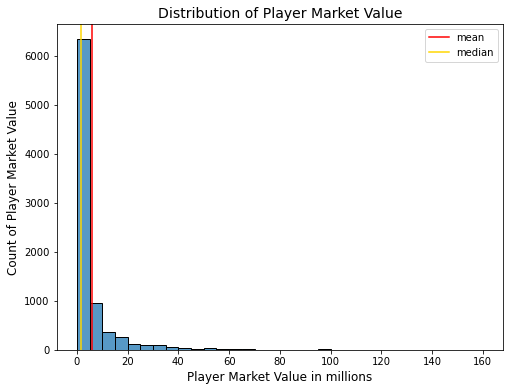

In [254]:
# Visualizing the distribution of market_val_amnt_mil
plt.figure(figsize=(8,6))

sns.histplot(data = market_stats, x = 'market_val_amnt_mil', binwidth = 5)
# add vertical lines to show the median and mean 
plt.axvline(market_stats['market_val_amnt_mil'].mean(), c='r', label='mean')
plt.axvline(market_stats['market_val_amnt_mil'].median(), c='gold', label='median')
plt.xlabel('Player Market Value in millions', fontsize=12)
plt.ylabel('Count of Player Market Value', fontsize=12)
plt.title("Distribution of Player Market Value", fontsize=14)
plt.legend()

plt.show()   

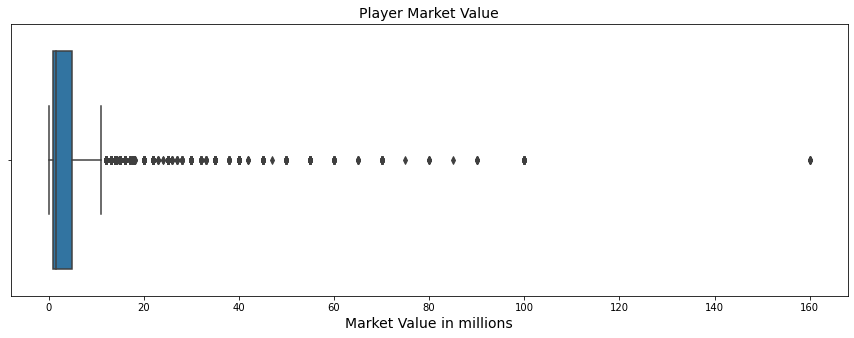

In [255]:
# Visualize Player Market value using box plot
plt.figure(figsize=(15,5))

sns.boxplot(data = market_stats, x = 'market_val_amnt_mil')
plt.title('Player Market Value', fontsize=14)
plt.xlabel('Market Value in millions', fontsize=14)

plt.show()

Looking at the above two plots, I can see that the distribution of the target variable is concentrated between 0 to 10 million with the most values centered around 5 million. There are a lot of outliers in the data. Let me find the number of outliers present in the column.

In [256]:
# Find the number of outliers in the column
MV_outliers = (market_stats['market_val_amnt_mil'] >= 18).sum()
MV_outliers

735

In [257]:
# Check the percentage of outliers
MV_outliers = MV_outliers/market_stats.shape[0]*100
MV_outliers

8.710594927707987

From above, I can see that there are around 8.7% of outliers present in the target variable. This might cause issue in modeling performance.

**Looking at the Players by their Market Value**

There are 3435 players in the dataframe from the top 5 leagues of Europe.

In [258]:
# Find the number of players in the dataframe
market_stats['Player'].nunique()

3435

Let me look at the players and their Market Value and find out the top 10 players with the highest Market Value in Europe.

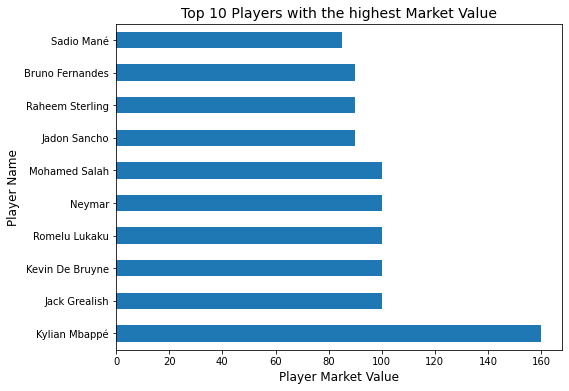

In [259]:
# visualizing the top 10 Players with the highest Market Value
plt.figure(figsize=(8, 6))
market_stats.groupby(['Player'])['market_val_amnt_mil'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.title('Top 10 Players with the highest Market Value', fontsize=14)

plt.show()

Kylian Mbappé is the most valuable player in the world currently with a staggering Market Value of around 160 million EUR. He is followed by Romelu Lukaku, Mohamed Salah, Neymar, Kevin De Bruyne and Jack Grealish in the list of most valuable players with a Market Value of around 100 million EUR. I will now look at the bottom 10 players with the lowest Market Value.

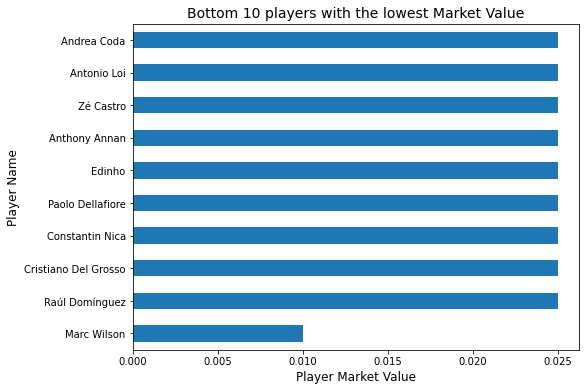

In [260]:
# visualizing the bottom 10 Players with the lowest Market Value
plt.figure(figsize=(8, 6))
market_stats.groupby(['Player'])['market_val_amnt_mil'].mean().sort_values(ascending=True).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.title('Bottom 10 players with the lowest Market Value', fontsize=14)

plt.show()

The above chart shows the least valuable players in Europe's top 5 leagues. They have a Market Value of around 0.01 million to around 0.025 million EUR.

**Looking at the `player_pos` column**

I will now take a look at the Player Position column, `player_pos` which contains the information related to player on-field position. 

In [261]:
# Look at the values of player_pos
market_stats['player_pos'].value_counts()

CF          1621
CB          1384
CM          1080
DM           722
RW           622
RB           589
LB           579
LW           545
AM           528
GK           492
SS           135
LM            84
RM            51
midfield       4
attack         2
Name: player_pos, dtype: int64

The values "midfield" and "attack" should belong to one of the other values in the column. I will clean this column by looking at the players with the position "midfield" and "attack" in order to find out what is their exact on-field position.

In [262]:
# Find the Player with position midfield
market_stats[market_stats['player_pos'] == 'midfield']

Player          league  season window         team_name  \
141    Sylvain Marveaux  Premier League    2011      s  Newcastle United   
2348   Sylvain Marveaux  Premier League    2015      s  Newcastle United   
6326              Verza         La Liga    2015      s        Levante UD   
17282  Sylvain Marveaux         Ligue 1    2014      s       EA Guingamp   

      team_country  player_age player_nation player_pos counter_team_name  \
141        England        25.0        France   midfield  Stade Rennais FC   
2348       England        29.0        France   midfield       EA Guingamp   
6326         Spain        28.0         Spain   midfield        UD Almería   
17282       France        28.0        France   midfield  Newcastle United   

       ... Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  \
141    ...          0.26  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
2348   ...          0.17  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
6326   ...          0.13  0.0   0.0  0.0      0.0    0.0    0.0       0.0   
17282  ...          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0   

       npxG/90  npxG+xA/90  
141        0.0         0.0  
2348       0.0         0.0  
6326       0.0         0.0  
17282      0.0         0.0  

[4 rows x 38 columns]

In [263]:
# Find the Player with position attack
market_stats[market_stats['player_pos'] == 'attack']

Player   league  season window       team_name team_country  \
16943  Gaël Danic  Ligue 1    2013      s  Olympique Lyon       France   
17468  Gaël Danic  Ligue 1    2014      w       SC Bastia       France   

       player_age player_nation player_pos counter_team_name  ...  \
16943        31.0        France     attack   Valenciennes FC  ...   
17468        33.0        France     attack    Olympique Lyon  ...   

      Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
16943          0.47  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
17468          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

       npxG+xA/90  
16943         0.0  
17468         0.0  

[2 rows x 38 columns]

Now I will manually input the value of the player positions by finding the player's exact position on the field from the Transfermarkt website.

In [264]:
# Fill the position for Sylvain Marveaux 
Sylvain = (market_stats['player_pos']=='midfield') & (market_stats['Player']=='Sylvain Marveaux')
market_stats[Sylvain]
# Fill this with the correct value
market_stats.loc[Sylvain, 'player_pos'] = 'AM'

In [265]:
# Fill the position for Verza
Verza = (market_stats['player_pos']=='midfield') & (market_stats['Player']=='Verza')
market_stats[Verza]
# Fill this with the correct value
market_stats.loc[Verza, 'player_pos'] = 'RM'

In [266]:
# Fill the position for Gaël Danic
Verza = (market_stats['player_pos']=='attack') & (market_stats['Player']=='Gaël Danic')
market_stats[Verza]
# Fill this with the correct value
market_stats.loc[Verza, 'player_pos'] = 'LW'

Let me now check the `player_pos` column again.

In [267]:
# Check the Player position values again
market_stats['player_pos'].value_counts()

CF    1621
CB    1384
CM    1080
DM     722
RW     622
RB     589
LB     579
LW     547
AM     531
GK     492
SS     135
LM      84
RM      52
Name: player_pos, dtype: int64

All the players have the correct position now. The players in the dataset have 13 different positions on the field. They are as follow:

- CF: Centre-Forward
- CB: Centre-Back
- CM: Central Midfield
- AM: Attacking Midfield
- DM: Defensive Midfield 
- LM: Left Midfield           
- RM: Right Midfield 
- RW: Right Winger           
- LW: Left Winger            
- LB: Left-Back              
- RB: Right-Back             
- GK: Goalkeeper             
- SS: Second Striker     

I will now visualize the distribution of the column to get a better understanding.

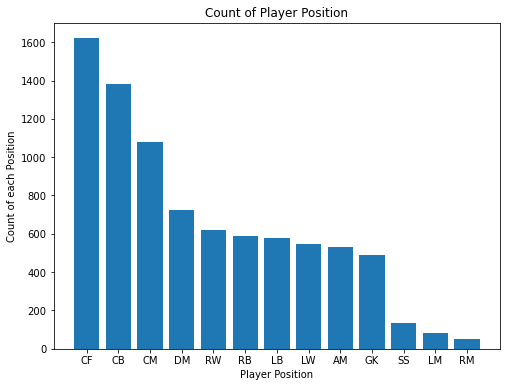

In [268]:
# Visualizing the column Player position
plt.figure(figsize=(8,6))
plt.bar(market_stats['player_pos'].value_counts().index, market_stats['player_pos'].value_counts().values)
plt.title('Count of Player Position')
plt.ylabel('Count of each Position')
plt.xlabel('Player Position')
plt.show()

I can see that there are more Centre-Forwards and Centre-Backs in the dataset than others while Strikers, Left Midfielders and Right Midfielders are the least players in the dataset. Let me now visualize the player Market Value with respect to their on-field position. 

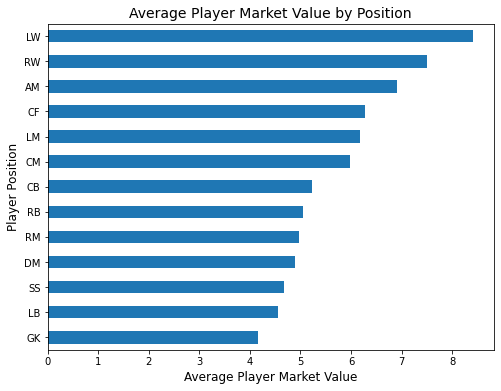

In [269]:
# visualizing the Average Player Market Value by their position
plt.figure(figsize=(8, 6))
market_stats.groupby(['player_pos'])['market_val_amnt_mil'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Average Player Market Value', fontsize=12)
plt.ylabel('Player Position', fontsize=12)
plt.title('Average Player Market Value by Position', fontsize=14)
plt.show()

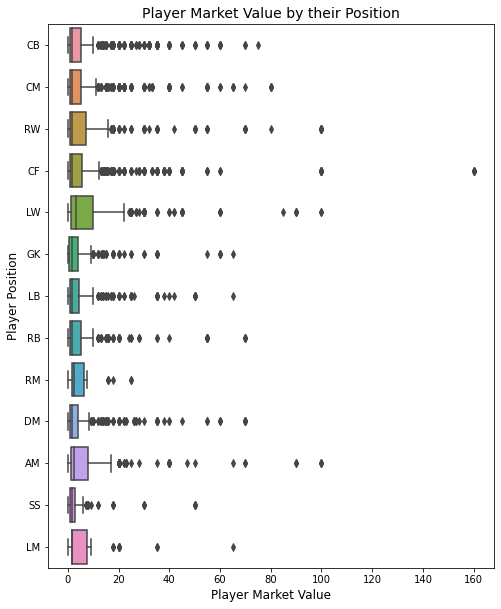

In [270]:
# visualize the relationship between Player Position and Market Value
# use a boxplot
plt.figure(figsize=(8, 10))
sns.boxplot(x="market_val_amnt_mil", y="player_pos", data=market_stats)
plt.xlabel('Player Market Value', fontsize=12)
plt.ylabel('Player Position', fontsize=12)
plt.title('Player Market Value by their Position', fontsize=14)
plt.show()

Looking at the charts above, I can tell that wingers and midfielders have a higher average Market value compared to other players. Goalkeepers followed by Left-Backs have the lowest average Market Value. 


**Position group**

I will now feature engineer and create a new variable to divide the player positions into 4 groups. All the positions related to defending will be grouped as "Defender", all the positions related to midfielding will be grouped as "Midfielder", all the positions related to attack will be grouped as "Attacker" and the goalkeeping position will be grouped as "Goalkeeper". I will name my new variable as `Position_group`.  

In [271]:
# Create a new variable called position_group
position_group = {'CB': 'Defender', 'RB': 'Defender','LB': 'Defender',
                  'CM': 'Midfielder', 'DM': 'Midfielder', 'AM': 'Midfielder', 'LM': 'Midfielder','RM': 'Midfielder',
                  'CF': 'Attacker', 'RW': 'Attacker', 'LW': 'Attacker', 'SS': 'Attacker',
                  'GK': 'Goalkeeper'
                 }

In [272]:
# Add the new column postion_group into the dataframe
market_stats['Position_group'] = market_stats['player_pos'].map(position_group)

# Look at the values of the column
market_stats['Position_group'].value_counts()

Attacker      2925
Defender      2552
Midfielder    2469
Goalkeeper     492
Name: Position_group, dtype: int64

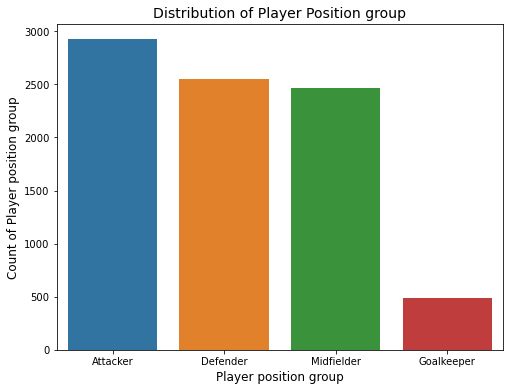

In [273]:
# Visualizing the distribution of Position_group
plt.figure(figsize=(8,6))
sns.barplot(market_stats['Position_group'].value_counts().index, market_stats['Position_group'].value_counts().values)
plt.xlabel('Player position group', fontsize=12)
plt.ylabel('Count of Player position group', fontsize=12)
plt.title("Distribution of Player Position group", fontsize=14)

plt.show()   

The new column `Position_group` has been added into the dataframe. Looking at the distribution of the column, I can see that there are more attackers followed by Defender and Midfielder in the dataframe. There are less Goalkeepers in the dataset.

I will now change the position of the new column and check the dataframe as a sanity check.

In [274]:
# change the position of the column Position_group
pos_grp_col = market_stats.pop('Position_group')
market_stats.insert(9, 'Position_group', pos_grp_col)
# look at the first 5 rows again for sanity check
market_stats.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos Position_group  ...  \
0       England        28.0       England         CB       Defender  ...   
1       England        24.0       England         CM     Midfielder  ...   
8       England        24.0       England         RW       Attacker  ...   
11      England        22.0         Wales         CF       Attacker  ...   
19      England        26.0       England         LW       Attacker  ...   

   Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
0           0.08  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
1           0.32  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
8           0.17  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
11          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
19          0.09  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

    npxG+xA/90  
0          0.0  
1          0.0  
8          0.0  
11         0.0  
19         0.0  

[5 rows x 39 columns]

Let me now visualize the player position group by their average Market Value to get a better idea about the player positions and their respective Market Value.

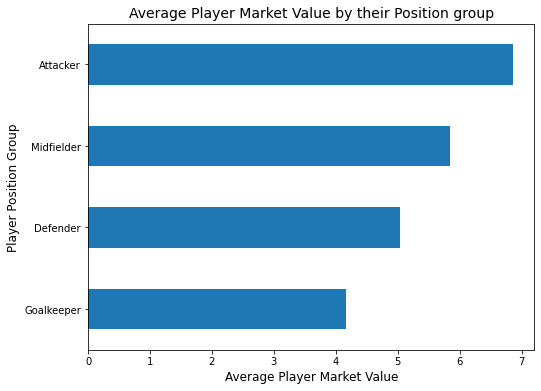

In [275]:
# visualizing the Average Player Market Value by their position group
plt.figure(figsize=(8, 6))
market_stats.groupby(['Position_group'])['market_val_amnt_mil'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Average Player Market Value', fontsize=12)
plt.ylabel('Player Position Group', fontsize=12)
plt.title('Average Player Market Value by their Position group', fontsize=14)
plt.show()

The horizontal barchart above shows that Attackers have the highest average Market Value among other positions which is around 8 million. This makes sense as these are the goal scoring players who can actually turn a game in favor of the team. This is followed by Midfielders and Defenders with around 7.5 million and 6.5 million respectively. Goalkeepers have the lowest Market Value in comparison with around 6 million. I will now take a look at each Player positions with respect to their Market Values.    

In [276]:
# Create a new variable for the Player position Defender
defender_df = market_stats[market_stats['Position_group'] == 'Defender']
defender_df.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
23      Darnel Situ  Premier League    2011      s             Swansea City   
27   Vangelis Moras  Premier League    2011      s             Swansea City   
73    Armand Traoré  Premier League    2011      s      Queens Park Rangers   
74  Anton Ferdinand  Premier League    2011      s      Queens Park Rangers   

   team_country  player_age player_nation player_pos Position_group  ...  \
0       England        28.0       England         CB       Defender  ...   
23      England        19.0        France         CB       Defender  ...   
27      England        30.0        Greece         CB       Defender  ...   
73      England        21.0       Senegal         LB       Defender  ...   
74      England        26.0       England         CB       Defender  ...   

   Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
0           0.08  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
23          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
27          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
73          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
74          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

    npxG+xA/90  
0          0.0  
23         0.0  
27         0.0  
73         0.0  
74         0.0  

[5 rows x 39 columns]

In [277]:
# Create a new variable for the Player position Midfielder
midfielder_df = market_stats[market_stats['Position_group'] == 'Midfielder']
midfielder_df.head()

Player          league  season window                team_name  \
1     Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
53     David Jones  Premier League    2011      s           Wigan Athletic   
76  Jason Puncheon  Premier League    2011      s      Queens Park Rangers   
77     Joey Barton  Premier League    2011      s      Queens Park Rangers   
79     Kieron Dyer  Premier League    2011      s      Queens Park Rangers   

   team_country  player_age player_nation player_pos Position_group  ...  \
1       England        24.0       England         CM     Midfielder  ...   
53      England        26.0       England         CM     Midfielder  ...   
76      England        25.0       England         CM     Midfielder  ...   
77      England        28.0       England         CM     Midfielder  ...   
79      England        32.0       England         RM     Midfielder  ...   

   Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
1           0.32  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
53          0.09  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
76          0.42  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
77          0.34  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
79          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

    npxG+xA/90  
1          0.0  
53         0.0  
76         0.0  
77         0.0  
79         0.0  

[5 rows x 39 columns]

In [278]:
# Create a new variable for the Player position Attacker
attacker_df = market_stats[market_stats['Position_group'] == 'Attacker']
attacker_df.head()

Player          league  season window                team_name  \
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   
36    James Vaughan  Premier League    2011      s             Norwich City   
50    Albert Crusat  Premier League    2011      s           Wigan Athletic   

   team_country  player_age player_nation player_pos Position_group  ...  \
8       England        24.0       England         RW       Attacker  ...   
11      England        22.0         Wales         CF       Attacker  ...   
19      England        26.0       England         LW       Attacker  ...   
36      England        22.0       England         CF       Attacker  ...   
50      England        29.0         Spain         LW       Attacker  ...   

   Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
8           0.17  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
11          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
19          0.09  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
36          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
50          0.35  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

    npxG+xA/90  
8          0.0  
11         0.0  
19         0.0  
36         0.0  
50         0.0  

[5 rows x 39 columns]

In [279]:
# Create a new variable for the Player position Goalkeeper
goalkeeper_df = market_stats[market_stats['Position_group'] == 'Goalkeeper']
goalkeeper_df.head()

Player          league  season window             team_name  \
49     Ali Al-Habsi  Premier League    2011      s        Wigan Athletic   
67   Chris Kirkland  Premier League    2011      s        Wigan Athletic   
98     David de Gea  Premier League    2011      s     Manchester United   
109      Ben Foster  Premier League    2011      s  West Bromwich Albion   
117     Boaz Myhill  Premier League    2011      s  West Bromwich Albion   

    team_country  player_age player_nation player_pos Position_group  ...  \
49       England        29.0          Oman         GK     Goalkeeper  ...   
67       England        30.0       England         GK     Goalkeeper  ...   
98       England        20.0         Spain         GK     Goalkeeper  ...   
109      England        28.0       England         GK     Goalkeeper  ...   
117      England        29.0         Wales         GK     Goalkeeper  ...   

    Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
49           0.03  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
67           0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
98           0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
109          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
117          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

     npxG+xA/90  
49          0.0  
67          0.0  
98          0.0  
109         0.0  
117         0.0  

[5 rows x 39 columns]

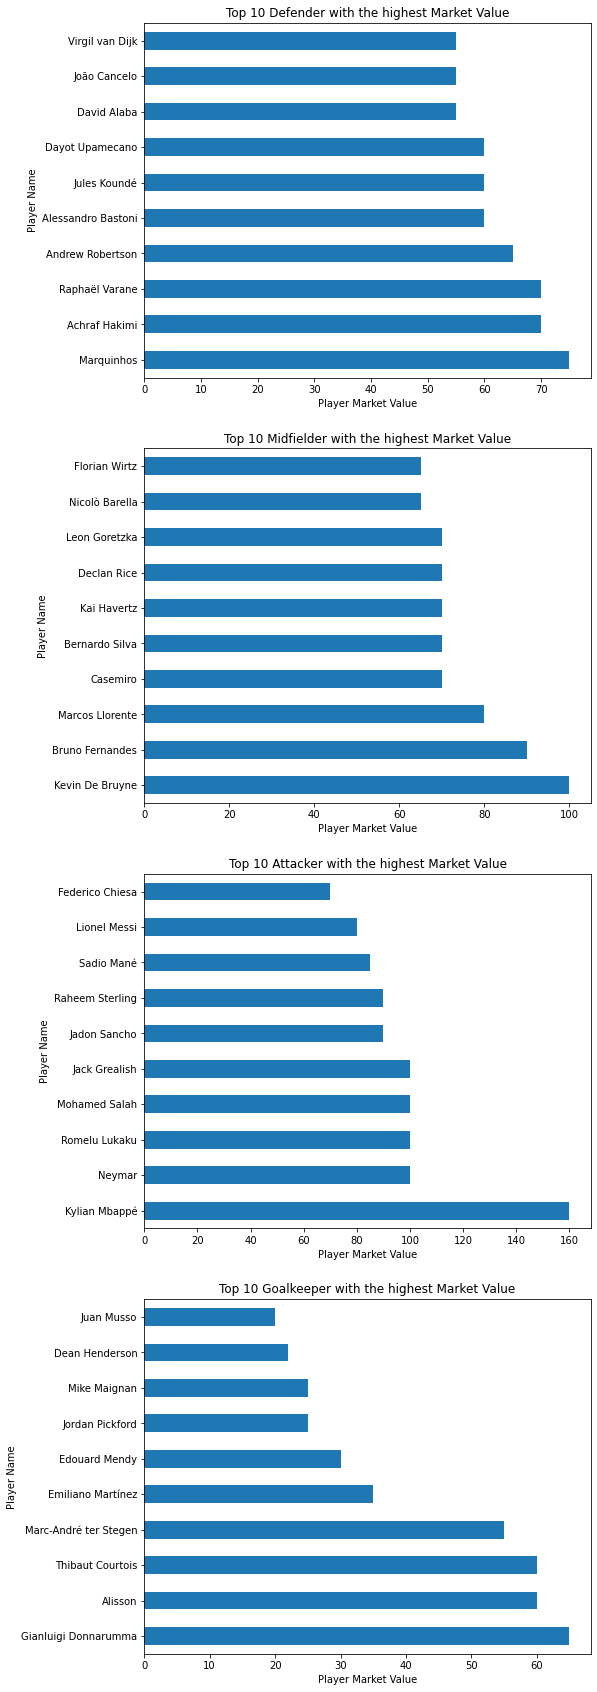

In [280]:
# visualizing Player positions with respect to their Market Values
plt.subplots(4, 1, figsize=(8, 30))

# visualizing top 10 Defender with highest Market Values
plt.subplot(4, 1, 1)
defender_df.groupby(['Player'])['market_val_amnt_mil'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Defender with the highest Market Value')

# visualizing top 10 Midfielder with highest Market Values
plt.subplot(4, 1, 2)
midfielder_df.groupby(['Player'])['market_val_amnt_mil'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Midfielder with the highest Market Value')

# visualizing top 10 Attacker with highest Market Values
plt.subplot(4, 1, 3)
attacker_df.groupby(['Player'])['market_val_amnt_mil'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Attacker with the highest Market Value')

# visualizing top 10 Goalkeeper with highest Market Values
plt.subplot(4, 1, 4)
goalkeeper_df.groupby(['Player'])['market_val_amnt_mil'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Goalkeeper with the highest Market Value')

plt.show()

**Looking at the Player Age column**

Now I will take a look at the Player Age column.

In [281]:
# Look at the values of player_age column
market_stats['player_age'].value_counts()

23.0    779
24.0    744
25.0    728
22.0    727
26.0    704
27.0    662
21.0    601
28.0    557
29.0    537
20.0    466
30.0    447
31.0    345
19.0    333
32.0    245
33.0    164
18.0    129
34.0    111
35.0     50
17.0     37
36.0     29
37.0     14
38.0     12
39.0      7
40.0      4
16.0      4
42.0      1
41.0      1
Name: player_age, dtype: int64

Looking at the values of the column it looks like the column is returning float type values. Let me check the datatype of the column.

In [282]:
# Look at the datatype of the column
market_stats['player_age'].dtype

dtype('float64')

The `player_age` column is indeed returning float64 datatype. I will convert this column into a int column so that it only returns integer type values.

In [283]:
# convert the 'player_age' column into integer format
market_stats['player_age'] = market_stats["player_age"].astype("int")

# Checking the data type or format of the 'player_age' column
market_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                8438 non-null   object 
 1   league                8438 non-null   object 
 2   season                8438 non-null   int64  
 3   window                8438 non-null   object 
 4   team_name             8438 non-null   object 
 5   team_country          8438 non-null   object 
 6   player_age            8438 non-null   int64  
 7   player_nation         8438 non-null   object 
 8   player_pos            8438 non-null   object 
 9   Position_group        8438 non-null   object 
 10  counter_team_name     8438 non-null   object 
 11  counter_team_country  8438 non-null   object 
 12  transfer_fee_amnt     8438 non-null   float64
 13  market_val_amnt_mil   8438 non-null   float64
 14  MP                    8438 non-null   float64
 15  Starts              

The column has been converted into an int64 column. Now I will look at the distribution of the column to better understand the variable.

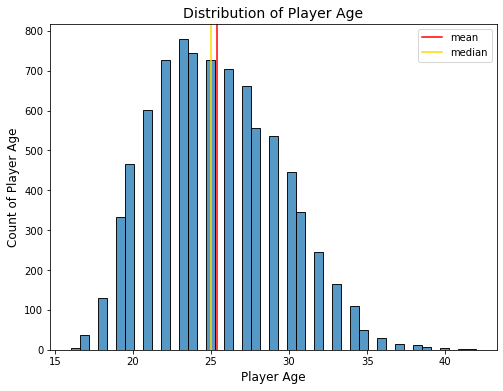

In [284]:
# Visualizing the distribution of Player Age
plt.figure(figsize=(8,6))
sns.histplot(data = market_stats, x = 'player_age')
    
# add vertical lines to show the median and mean
plt.axvline(market_stats['player_age'].mean(), c='r', label='mean')
plt.axvline(market_stats['player_age'].median(), c='gold', label='median')
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Count of Player Age', fontsize=12)
plt.title("Distribution of Player Age", fontsize=14)
plt.legend()

plt.show()   

Looking at the distribution of the column, I can tell that there are more data of players aged 20 to 30 years. Most Footballers retire after the age of 35 and that is why we have less data for these ages. The average age of players is 25 years. Let me look at the average Market Value of the players with respect to their age.

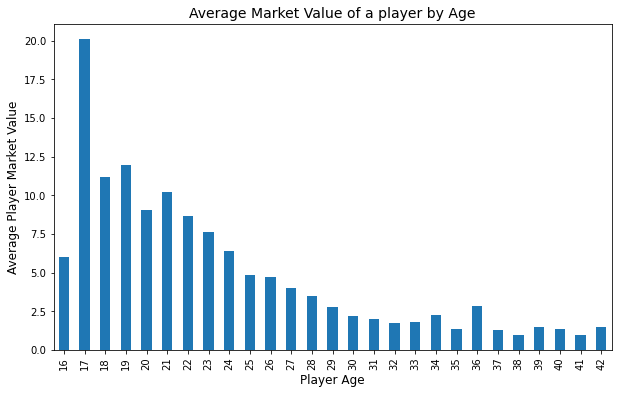

In [285]:
# Visualizing the Average Player Market Value by their Age
plt.figure(figsize=(10, 6))
market_stats.groupby(['player_age'])['market_val_amnt_mil'].mean().plot(kind='bar')   
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Average Player Market Value', fontsize=12)
plt.title('Average Market Value of a player by Age', fontsize=14)
plt.show()

Players of 17 years of age has the highest average Market Value of around 20 million followed by 19 year olds having an average Market Value of 12.5 million. Players on their early 20s have a higher Market Value overall. This is the age when the players are in the peak in their career with a high demand. As the players get older their Market value decreases with their age.

**Looking at the `league` Column**

Let me take a look at the column `league`. 

In [286]:
# Look at the values of the column league
market_stats['league'].value_counts()

Serie A               1988
Premier League        1973
La Liga               1831
Ligue 1               1523
Futball-Bundesliga    1123
Name: league, dtype: int64

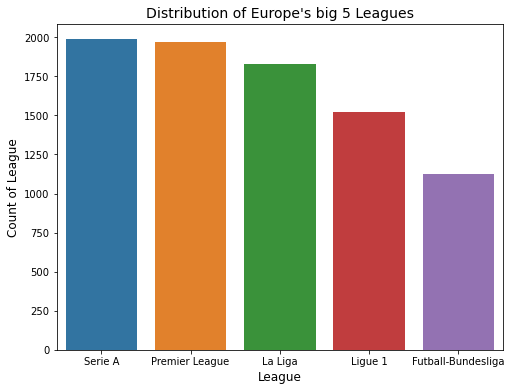

In [287]:
# Visualizing the distribution of league
plt.figure(figsize=(8,6))
sns.barplot(market_stats['league'].value_counts().index, market_stats['league'].value_counts().values)
plt.xlabel('League', fontsize=12)
plt.ylabel('Count of League', fontsize=12)
plt.title("Distribution of Europe's big 5 Leagues", fontsize=14)

plt.show()   

The distribution of the column `league` shows that Searie A has the highest values in the dataset followed by Premier League and La Liga. Ligue 1 and Futball-Bundesliga has lower values in comparison. Let me now take a look at the average market value of the players by their respective leagues.

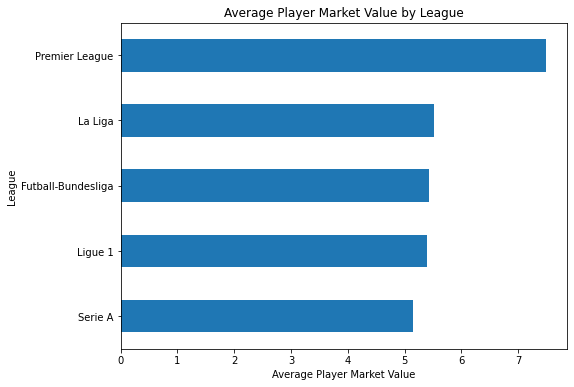

In [288]:
# visualizing the Player Market Value by their League
plt.figure(figsize=(8, 6))
market_stats.groupby(['league'])['market_val_amnt_mil'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Average Player Market Value')
plt.ylabel('League')
plt.title('Average Player Market Value by League')
plt.show()

The players in the Premier League has the highest average market value of around 9 million EUR compared to other league players. The other league players have a similar average market value of around 7 million EUR. 

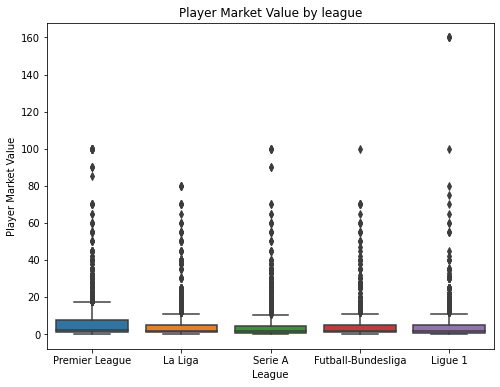

In [289]:
# visualize the relationship between the league and Market value
# use a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="league", y="market_val_amnt_mil", data=market_stats)
plt.xlabel('League')
plt.ylabel('Player Market Value')
plt.title('Player Market Value by league')
plt.show()

The box plot shows all the league players have a Market value ranging between 1 and 20 million with the most centered around 10 million. There are a alot of outliers present in the data.  

**Looking at the `transfer_fee_amnt` column** 

`transfer_fee_amnt` column returns value of the player's Transfer fee amount paid in EUR for the player to get in the team. I will take a look at the column.

In [290]:
# Look at the statistics of the transfer_fee_amnt
market_stats['transfer_fee_amnt'].describe()

count    8.438000e+03
mean     3.533262e+06
std      1.437720e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+06
max      5.000000e+08
Name: transfer_fee_amnt, dtype: float64

I will convert the column to return the values in millions like the `market_val_amnt_mil` column. 

In [291]:
# Change the Transfer Fees column to millions
market_stats['transfer_fee_amnt_mil'] = (market_stats['transfer_fee_amnt']/1000000)
market_stats.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos Position_group  ...   xG  \
0       England          28       England         CB       Defender  ...  0.0   
1       England          24       England         CM     Midfielder  ...  0.0   
8       England          24       England         RW       Attacker  ...  0.0   
11      England          22         Wales         CF       Attacker  ...  0.0   
19      England          26       England         LW       Attacker  ...  0.0   

   npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  npxG+xA/90  \
0   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
1   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
8   0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
11  0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   
19  0.0  0.0      0.0    0.0    0.0       0.0      0.0         0.0   

    transfer_fee_amnt_mil  
0                    8.00  
1                    3.75  
8                    0.00  
11                   0.00  
19                   3.25  

[5 rows x 40 columns]

In [292]:
# change the position of the column 
mv_col = market_stats.pop('transfer_fee_amnt_mil')
market_stats.insert(12, 'transfer_fee_amnt_mil', mv_col)
# look at the first 5 rows again for sanity check
market_stats.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos Position_group  ...  \
0       England          28       England         CB       Defender  ...   
1       England          24       England         CM     Midfielder  ...   
8       England          24       England         RW       Attacker  ...   
11      England          22         Wales         CF       Attacker  ...   
19      England          26       England         LW       Attacker  ...   

   Gls+Ast-PK/90   xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  \
0           0.08  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
1           0.32  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
8           0.17  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
11          0.00  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   
19          0.09  0.0   0.0  0.0      0.0    0.0    0.0       0.0      0.0   

    npxG+xA/90  
0          0.0  
1          0.0  
8          0.0  
11         0.0  
19         0.0  

[5 rows x 40 columns]

I will change the position of the column in the dataframe and drop the old column to avid redundancy. 

In [293]:
# Drop the old transfer_fee_amnt column
market_stats.drop('transfer_fee_amnt', axis=1, inplace=True)

In [294]:
# Check the summary of the dataframe
market_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 8438 non-null   object 
 1   league                 8438 non-null   object 
 2   season                 8438 non-null   int64  
 3   window                 8438 non-null   object 
 4   team_name              8438 non-null   object 
 5   team_country           8438 non-null   object 
 6   player_age             8438 non-null   int64  
 7   player_nation          8438 non-null   object 
 8   player_pos             8438 non-null   object 
 9   Position_group         8438 non-null   object 
 10  counter_team_name      8438 non-null   object 
 11  counter_team_country   8438 non-null   object 
 12  transfer_fee_amnt_mil  8438 non-null   float64
 13  market_val_amnt_mil    8438 non-null   float64
 14  MP                     8438 non-null   float64
 15  Sta

**Looking at the Team column**

I will now take a look at the `team_name` column. From below, I can see that there are 172 teams in the big 5 leagues in Europe. 

In [295]:
# Find the number of total teams in the dataframe
market_stats['team_name'].nunique()

172

I will feature engineer and split the teams into 4 groups with respect to the total Transfer amount in millions that they paid for the players in their teams.  

In [296]:
# Create a new dataframe with the buying teams and their total Transfer Fee
buying_team_val = market_stats.groupby(['team_name'])['transfer_fee_amnt_mil'].sum().sort_values(ascending=False)
print(buying_team_val)

team_name
Paris Saint-Germain    1378.50
AS Roma                1262.73
Chelsea FC             1234.30
Manchester City        1157.35
Juventus FC            1149.58
                        ...   
GFC Ajaccio               0.00
Clermont Foot 63          0.00
Brescia Calcio            0.00
Carpi FC 1909             0.00
Venezia FC                0.00
Name: transfer_fee_amnt_mil, Length: 172, dtype: float64


Firt I created a dataframe with all the buying teams and the total transfer fee amount they paid for the players.

In [297]:
# Look at the dataframe
buying_team_val_df = pd.DataFrame({'Teams':buying_team_val.index, "Total Transfer Fee Amount":buying_team_val.values})
buying_team_val_df.head(20)

Teams  Total Transfer Fee Amount
0   Paris Saint-Germain                   1378.500
1               AS Roma                   1262.730
2            Chelsea FC                   1234.300
3       Manchester City                   1157.350
4           Juventus FC                   1149.580
5     Manchester United                   1072.930
6            SSC Napoli                   1019.650
7    Novara Calcio 1908                   1003.900
8          FC Barcelona                    984.570
9            Arsenal FC                    964.730
10         Liverpool FC                    938.630
11        Bayern Munich                    681.000
12             AC Milan                    658.520
13          Real Madrid                    658.000
14          Inter Milan                    635.916
15   Atlético de Madrid                    616.200
16            AS Monaco                    613.400
17           Everton FC                    581.320
18    Borussia Dortmund                    526.550
19          Valencia CF                    510.000

Paris Saint-Germain spent the most amount of money in Europe to have the players in their team followed by AS Roma and Chelsea FC. Below is the statistical summary of this. 

In [298]:
# get basic statistics about the Total Transfer Fee Amount of the buying team
buying_team_val_df['Total Transfer Fee Amount'].describe()

count     172.000000
mean      173.335244
std       290.283650
min         0.000000
25%         8.375000
50%        46.960000
75%       189.201250
max      1378.500000
Name: Total Transfer Fee Amount, dtype: float64

Now I will separate the teams into 4 groups with respect to the amount of money they spent in the transfer market.

In [299]:
# Separate the teams into 4 groups
buying_team_1 = buying_team_val_df[buying_team_val_df['Total Transfer Fee Amount'] < 100]
buying_team_2 = buying_team_val_df[(buying_team_val_df['Total Transfer Fee Amount'] >= 100) & (buying_team_val_df['Total Transfer Fee Amount'] < 300)]
buying_team_3 = buying_team_val_df[(buying_team_val_df['Total Transfer Fee Amount'] >= 300) & (buying_team_val_df['Total Transfer Fee Amount'] < 800)]
buying_team_4 = buying_team_val_df[buying_team_val_df['Total Transfer Fee Amount'] >= 800]

In [300]:
#creating tier map
tier_map = {}
#tier 1
for club in buying_team_1['Teams']:
    tier_map[club] = 1
#tier 2
for club in buying_team_2['Teams']:
    tier_map[club] = 2
#tier 3
for club in buying_team_3['Teams']:
    tier_map[club] = 3
#tier 4
for club in buying_team_4['Teams']:
    tier_map[club] = 4

With feature engineering I will add the new feature, `buying_team` into the dataframe.

In [301]:
# Add the new column into the dataframe
market_stats['buying_team'] = market_stats['team_name'].map(tier_map)
# Check the values of the column
market_stats['buying_team'].value_counts()

1    3321
2    2172
3    1874
4    1071
Name: buying_team, dtype: int64

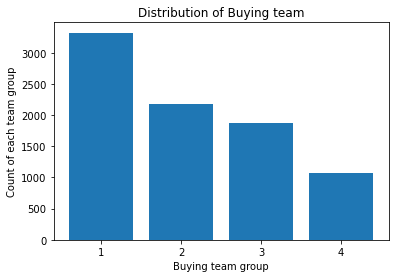

In [302]:
# Visualizing the column buying_team
plt.figure()
plt.bar(market_stats['buying_team'].value_counts().index, market_stats['buying_team'].value_counts().values)
plt.title('Distribution of Buying team')
plt.ylabel('Count of each team group')
plt.xlabel('Buying team group')
plt.xticks(range(1, 5))
plt.show()

**Looking at the `player_nation` column**

I will now take a look at the `player_nation` column.

In [303]:
# Find the number of total nations in the dataframe
market_stats['player_nation'].nunique()

119

There are a total 119 different player nations in the dataframe where the players belong to. I will feature engineer a new feature `Player_Nationality` in which all the player nations will be grouped together by continents namely, *Europe, North America, South America, Africa, Australia,* and *Asia*. 

In [305]:
# Look at all the unique values in the column
market_stats['player_nation'].unique()

array(['England', 'Wales', 'France', 'Greece', 'Oman', 'Spain',
       'Argentina', 'Senegal', 'Italy', 'Hungary', 'New Zealand',
       'Norway', 'Switzerland', 'Guyana', 'Israel', "Cote d'Ivoire",
       'Germany', 'Russia', 'Mexico', 'Denmark', 'Honduras', 'Scotland',
       'Austria', 'Belgium', 'DR Congo', 'Ireland', 'Egypt',
       'Northern Ireland', 'Togo', 'Ecuador', 'Nigeria', 'United States',
       'Cameroon', 'South Africa', 'Brazil', 'Netherlands', 'Chile',
       'Mali', 'French Guiana', 'Gibraltar', 'Japan', 'Sweden',
       'Bulgaria', 'Iran', 'Colombia', 'Costa Rica', 'Morocco', 'Ghana',
       'Finland', 'Paraguay', 'Uruguay', 'Poland', 'Sierra Leone',
       'Canada', 'Portugal', 'Turkey', 'Congo', 'Barbados', 'Australia',
       'Jamaica', 'Benin', 'Venezuela', 'Croatia', 'Martinique',
       'Trinidad and Tobago', 'Zambia', 'Romania', 'The Gambia',
       'Equatorial Guinea', 'Tunisia', 'Slovakia', 'Kenya', 'Kosovo',
       'Armenia', 'Algeria', 'Estonia', 'China'

In [306]:
# Creating a new feature called Nationality
Nationality = {'England':'EU', 'Wales':'EU', 'Spain':'EU', 'Italy':'EU', 'Argentina':'SAM', 
               'New Zealand':'AU', 'Switzerland':'EU', 'Guyana':'SAM', 'France':'EU', 'Israel':'AS', 
               "Cote d'Ivoire": 'AF', 'Mexico': 'NTHAM', 'Austria': 'EU', 'Belgium': 'EU',
               'DR Congo':'AF', 'Egypt':'AF', 'Northern Ireland':'EU', 'Togo':'AF', 'Ecuador':'SAM',
               'Cameroon': 'AF', 'South Africa': 'AF', 'Scotland': 'EU', 'Ireland': 'EU',
               'Chile': 'SAM', 'Mali': 'AF', 'Nigeria': 'AF', 'Russia': 'EU', 'Brazil': 'SAM', 'Germany': 'EU',
               'Netherlands': 'EU', 'Japan': 'AS', 'Iran': 'AS', 'Colombia': 'SAM', 'Costa Rica': 'NTHAM', 
               'Ghana': 'AF', 'Senegal': 'AF', 'Paraguay': 'SAM', 'Uruguay': 'SAM', 'Poland': 'EU', 'Norway': 'EU',
               'Sierra Leone': 'AF', 'Canada': 'NTHAM', 'Turkey': 'AS', 'Barbados': 'NTHAM', 'Jamaica': 'NTHAM', 
               'Benin':'AF', 'Morocco':'AF', 'Croatia':'EU', 'Martinique':'NTHAM', 'Honduras':'NTHAM', 'Greece':'EU',
               'United States':'NTHAM', 'Portugal':'EU', 'Sweden':'EU', 'Zambia':'AF', 'Romania':'EU', 'Australia':'AU',
               'Denmark':'EU', 'The Gambia':'AF', 'Equatorial Guinea':'AF', 'Tunisia':'AF', 'Kenya':'AF', 'Kosovo':'AF',
               'Armenia':'AS', 'Algeria':'AF', 'Estonia':'EU', 'China':'AS', 'Venezuela':'SAM', 'Lithuania':'EU',
               'Zimbabwe':'AF', 'Hungary':'EU', 'Burundi':'AF', 'Curacao':'NTHAM', 'Gabon':'AF', 'Guadeloupe':'NTHAM',
               'Guinea':'AF', 'Bermuda':'NTHAM', 'Ukraine':'EU', 'Congo':'AF', 'Angola':'AF', 'Slovakia':'EU',
               'Iceland':'EU', 'Burkina Faso':'AF', 'Dominican Republic':'NTHAM', 'Cape Verde':'AF', 'Serbia':'EU', 
               'Panama':'NTHAM', 'Slovenia':'EU', 'Azerbaijan':'AS', 'Qatar':'AS', 'Central African Republic':'AF', 
               'Bosnia-Herzegovina':'EU', 'Czech Republic':'EU', 'Mauritania':'AF', 'North Macedonia':'EU', 
               'Kazakhstan':'AS', 'Bulgaria':'EU', 'Albania':'EU', 'Liechtenstein':'EU', 'Peru':'SAM', 
               'Libya':'AF', 'Uzbekistan':'AS', 'Finland':'EU', 'Philippines':'AS', 'Iraq':'AS', 'Mozambique':'AF', 
               'Rwanda':'AF', 'Madagascar':'AF', 'Comoros':'AF', 'French Guiana':'SAM', 'Mauritius':'AF', 
               'Guinea-Bissau':'AF', 'Haiti':'NTHAM', 'Chad':'AF', 'Georgia':'AS', 'Luxembourg':'EU', 'Gibraltar':'EU',
               'Oman':'AS', 'Trinidad and Tobago':'SAM' 
              }

I will include the new feature `Nationality` in the dataframe.

In [307]:
# Adding the column Nationality into the dataframe
market_stats['Nationality'] = market_stats['player_nation'].map(Nationality)

# check the values of the column
market_stats['Nationality'].value_counts()

EU       5766
AF       1217
SAM      1117
NTHAM     177
AS        133
AU         28
Name: Nationality, dtype: int64

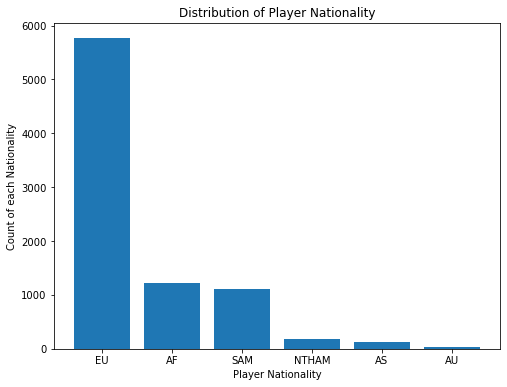

In [308]:
# Visualizing the column Player Nationality
plt.figure(figsize=(8,6))
plt.bar(market_stats['Nationality'].value_counts().index, market_stats['Nationality'].value_counts().values)
plt.title('Distribution of Player Nationality')
plt.ylabel('Count of each Nationality')
plt.xlabel('Player Nationality')
plt.show()

The new feature has been added in the dataframe. From above I can see that there are more European players in the dataset than other nationalities. I will now take a look at the player market values with respect to their nationality.

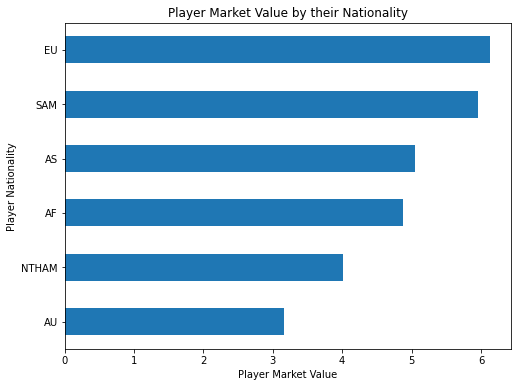

In [309]:
# visualizing the Player Market Value by their Nationality
plt.figure(figsize=(8, 6))
market_stats.groupby(['Nationality'])['market_val_amnt_mil'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Nationality')
plt.title('Player Market Value by their Nationality')
plt.show()

I can see that there the average market value of European players are higher than that of the players from other nations. They are followed by South Americans and then Asians. I will now move on to modeling.

## Modeling

I will create a copy of the dataset and save it in a new dataframe called `final_df`.

In [311]:
# Create a copy of the dataset
final_df = market_stats.copy()
# Sanity check by looking at the first 5 records
final_df.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos Position_group  ... npxG  \
0       England          28       England         CB       Defender  ...  0.0   
1       England          24       England         CM     Midfielder  ...  0.0   
8       England          24       England         RW       Attacker  ...  0.0   
11      England          22         Wales         CF       Attacker  ...  0.0   
19      England          26       England         LW       Attacker  ...  0.0   

     xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  npxG+xA/90  buying_team  \
0   0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
1   0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
8   0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
11  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
19  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   

    Nationality  
0            EU  
1            EU  
8            EU  
11           EU  
19           EU  

[5 rows x 41 columns]

Checking the shape of the dataframe, I can see that there are **8438 rows** and **41 columns** in the dataset. I will also look at all the columns in the dataframe.

In [312]:
# Take a look at the shape of the dataframe
print(f'There are {final_df.shape[0]} rows and {final_df.shape[1]} columns in the dataset.')

There are 8438 rows and 41 columns in the dataset.


In [313]:
# Look at the columns in the dataframe
final_df.columns

Index(['Player', 'league', 'season', 'window', 'team_name', 'team_country',
       'player_age', 'player_nation', 'player_pos', 'Position_group',
       'counter_team_name', 'counter_team_country', 'transfer_fee_amnt_mil',
       'market_val_amnt_mil', 'MP', 'Starts', 'Min', 'Min/90', 'Gls', 'Ast',
       'NP_Gls', 'PK', 'PK_Att', 'CrdY', 'CrdR', 'Gls/90', 'Ast/90',
       'Gls+Ast/90', 'Gls-PK/90', 'Gls+Ast-PK/90', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG/90', 'xA/90', 'xG+xA/90', 'npxG/90', 'npxG+xA/90',
       'buying_team', 'Nationality'],
      dtype='object')

In [314]:
# Get summary information of dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 8438 non-null   object 
 1   league                 8438 non-null   object 
 2   season                 8438 non-null   int64  
 3   window                 8438 non-null   object 
 4   team_name              8438 non-null   object 
 5   team_country           8438 non-null   object 
 6   player_age             8438 non-null   int64  
 7   player_nation          8438 non-null   object 
 8   player_pos             8438 non-null   object 
 9   Position_group         8438 non-null   object 
 10  counter_team_name      8438 non-null   object 
 11  counter_team_country   8438 non-null   object 
 12  transfer_fee_amnt_mil  8438 non-null   float64
 13  market_val_amnt_mil    8438 non-null   float64
 14  MP                     8438 non-null   float64
 15  Sta

Looking at the columns and their summary information, I can see that there are 41 columns with non-null values. Among the 41 columns, there are 30 numerical variables and 11 categorical variables. In order to perform modelling on the dataset I first need to convert the categorical variables into numerical ones. First I will convert the `Position_group` variable. 

**Converting the `Position_group` column**

In [315]:
# Look at the values of Position_group
final_df['Position_group'].value_counts()

Attacker      2925
Defender      2552
Midfielder    2469
Goalkeeper     492
Name: Position_group, dtype: int64

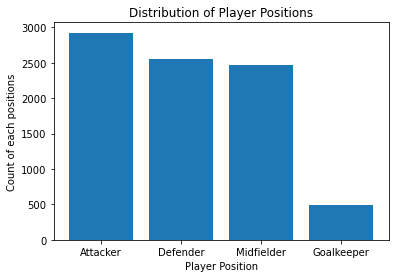

In [317]:
# Visualizing the column Player Position
plt.figure()
plt.bar(final_df['Position_group'].value_counts().index, 
        final_df['Position_group'].value_counts().values)
plt.title('Distribution of Player Positions')
plt.ylabel('Count of each positions')
plt.xlabel('Player Position')

plt.show()

The column only returns 4 values. So I can create dummy variables from this column using `pd.get_dummies` and include these variables in the dataframe. Then I will remove the old `Position_group` column from the dataframe. 

In [318]:
# Create dummy variables for the column Position_group
dummy_pos_grp = pd.get_dummies(final_df['Position_group'])

# Concatenate the dummy variables into the dataframe
final_df = pd.concat([final_df, dummy_pos_grp], axis=1)

# Remove the old Position_group column 
final_df.drop('Position_group', axis=1, inplace=True)

In [319]:
# Look at the shape of the dataframe again
final_df.shape

(8438, 44)

Looking at the shape of the dataframe, I can see the number of columns has increased. Now I will take a look at the `Nationality` column.

**Converting the `Nationality` column**

In [320]:
# Look at the values of Position_group
final_df['Nationality'].value_counts()

EU       5766
AF       1217
SAM      1117
NTHAM     177
AS        133
AU         28
Name: Nationality, dtype: int64

The column returns 6 values of the different continents the players belong to. I will convert this column into a binary one with players who are from Europe will be denoted as '1' and the players from the rest of the continents will be denoted by '0'. I will save this in a variable called `Player_Nationality` and then remove the old `Nationality` column from the dataframe.

In [321]:
# Converting Nationality into a binary column
final_df['Player_Nationality'] = np.where(final_df['Nationality'] == 'EU', 1, 0)

# Check the values of the new column
final_df['Player_Nationality'].value_counts()

1    5766
0    2672
Name: Player_Nationality, dtype: int64

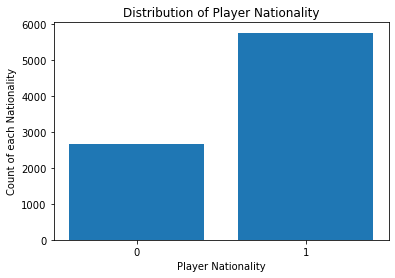

In [322]:
# Visualizing the column Player Nationality
plt.figure()
plt.bar(final_df['Player_Nationality'].value_counts().index, 
        final_df['Player_Nationality'].value_counts().values)
plt.title('Distribution of Player Nationality')
plt.ylabel('Count of each Nationality')
plt.xlabel('Player Nationality')
plt.xticks(list(range(0,2)))
plt.show()

Looking at the distribution of the `Player_Nationality`, I can see that there are more European players in the top 5 leagues in Europe compared to from other continents. This makes sense as all the 5 leagues are from Europe. 

I will remove the old `Nationality` column from the dataframe and rename the new `Player_Nationality` column to `Nationality`. I will then check the dataframe again as a sanity check.  

In [323]:
# Remove the old Nationality column 
final_df.drop('Nationality', axis=1, inplace=True)

In [324]:
# Rename the column Player_Nationality to Nationality
final_df.rename(columns={'Player_Nationality': 'Nationality'}, inplace=True)

In [325]:
# Check the dataframe
final_df.head()

Player          league  season window                team_name  \
0     Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1      Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
8      Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
11        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
19  Wayne Routledge  Premier League    2011      s             Swansea City   

   team_country  player_age player_nation player_pos       counter_team_name  \
0       England          28       England         CB         Birmingham City   
1       England          24       England         CM       Tottenham Hotspur   
8       England          24       England         RW        Middlesbrough FC   
11      England          22         Wales         CF  Brighton & Hove Albion   
19      England          26       England         LW        Newcastle United   

    ... xA/90  xG+xA/90  npxG/90  npxG+xA/90  buying_team  Attacker  Defender  \
0   ...   0.0       0.0      0.0         0.0            2         0         1   
1   ...   0.0       0.0      0.0         0.0            2         0         0   
8   ...   0.0       0.0      0.0         0.0            2         1         0   
11  ...   0.0       0.0      0.0         0.0            2         1         0   
19  ...   0.0       0.0      0.0         0.0            2         1         0   

    Goalkeeper  Midfielder  Nationality  
0            0           0            1  
1            0           1            1  
8            0           0            1  
11           0           0            1  
19           0           0            1  

[5 rows x 44 columns]

In [326]:
# Check the shape of the dataframe
final_df.shape

(8438, 44)

I will now remove the unnecessary columns from the dataframe as they don't add much value here. The `Player` and the `league` columns will also be removed as they are not necessary for the modeling.

In [327]:
# Drop the unnecessary columns
final_df.drop(columns = ['Player', 'league', 'window', 'team_name', 'team_country', 'player_nation', 'player_pos', 'transfer_fee_amnt_mil',
                         'counter_team_name', 'counter_team_country'], inplace = True)
# Check the dataframe
final_df.head()

season  player_age  market_val_amnt_mil    MP  Starts     Min  Min/90  \
0     2011          28                  1.5  38.0    38.0  3375.0    37.5   
1     2011          24                  1.5  14.0    13.0  1115.0    12.4   
8     2011          24                  0.4  10.0     7.0   536.0     6.0   
11    2011          22                  1.5   2.0     0.0    31.0     0.3   
19    2011          26                  1.5  17.0    10.0   996.0    11.1   

     Gls   Ast  NP_Gls  ...  xA/90  xG+xA/90  npxG/90  npxG+xA/90  \
0   0.05  0.03    0.05  ...    0.0       0.0      0.0         0.0   
1   0.24  0.08    0.24  ...    0.0       0.0      0.0         0.0   
8   0.00  0.17    0.00  ...    0.0       0.0      0.0         0.0   
11  0.00  0.00    0.00  ...    0.0       0.0      0.0         0.0   
19  0.00  0.09    0.00  ...    0.0       0.0      0.0         0.0   

    buying_team  Attacker  Defender  Goalkeeper  Midfielder  Nationality  
0             2         0         1           0           0            1  
1             2         0         0           0           1            1  
8             2         1         0           0           0            1  
11            2         1         0           0           0            1  
19            2         1         0           0           0            1  

[5 rows x 34 columns]

All the categorical columns have been converted to numerical values and the dataset is ready for modeling. I will take a look at all the columns.

In [328]:
# Look at the columns in the dataframe
final_df.columns

Index(['season', 'player_age', 'market_val_amnt_mil', 'MP', 'Starts', 'Min',
       'Min/90', 'Gls', 'Ast', 'NP_Gls', 'PK', 'PK_Att', 'CrdY', 'CrdR',
       'Gls/90', 'Ast/90', 'Gls+Ast/90', 'Gls-PK/90', 'Gls+Ast-PK/90', 'xG',
       'npxG', 'xA', 'npxG+xA', 'xG/90', 'xA/90', 'xG+xA/90', 'npxG/90',
       'npxG+xA/90', 'buying_team', 'Attacker', 'Defender', 'Goalkeeper',
       'Midfielder', 'Nationality'],
      dtype='object')

In [329]:
# Check the summary of the dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 20053
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               8438 non-null   int64  
 1   player_age           8438 non-null   int64  
 2   market_val_amnt_mil  8438 non-null   float64
 3   MP                   8438 non-null   float64
 4   Starts               8438 non-null   float64
 5   Min                  8438 non-null   float64
 6   Min/90               8438 non-null   float64
 7   Gls                  8438 non-null   float64
 8   Ast                  8438 non-null   float64
 9   NP_Gls               8438 non-null   float64
 10  PK                   8438 non-null   float64
 11  PK_Att               8438 non-null   float64
 12  CrdY                 8438 non-null   float64
 13  CrdR                 8438 non-null   float64
 14  Gls/90               8438 non-null   float64
 15  Ast/90               8438 non-null   

The final dataframe has 34 columns now with player information, their postion, the buying and selling teams, their Market Value in million and their on-field performance statistics. There are **8438 rows** and **34 columns** in the dataset. 

In [330]:
# Take a look at the shape of the dataframe
print(f'There are {final_df.shape[0]} rows and {final_df.shape[1]} columns in the dataset.')

There are 8438 rows and 34 columns in the dataset.


Before I move on to modeling the data, I will instanstiate my independent and dependent variables. As mentioned previously, `market_val_amnt_mil` column which is the Player Market Value in million is the target variable and the dependent variable. The remaining columns in the dataframe are my independent variables.

In [331]:
# instantiating the independent and dependent variables 
X = final_df.drop(columns="market_val_amnt_mil")
y = final_df["market_val_amnt_mil"]

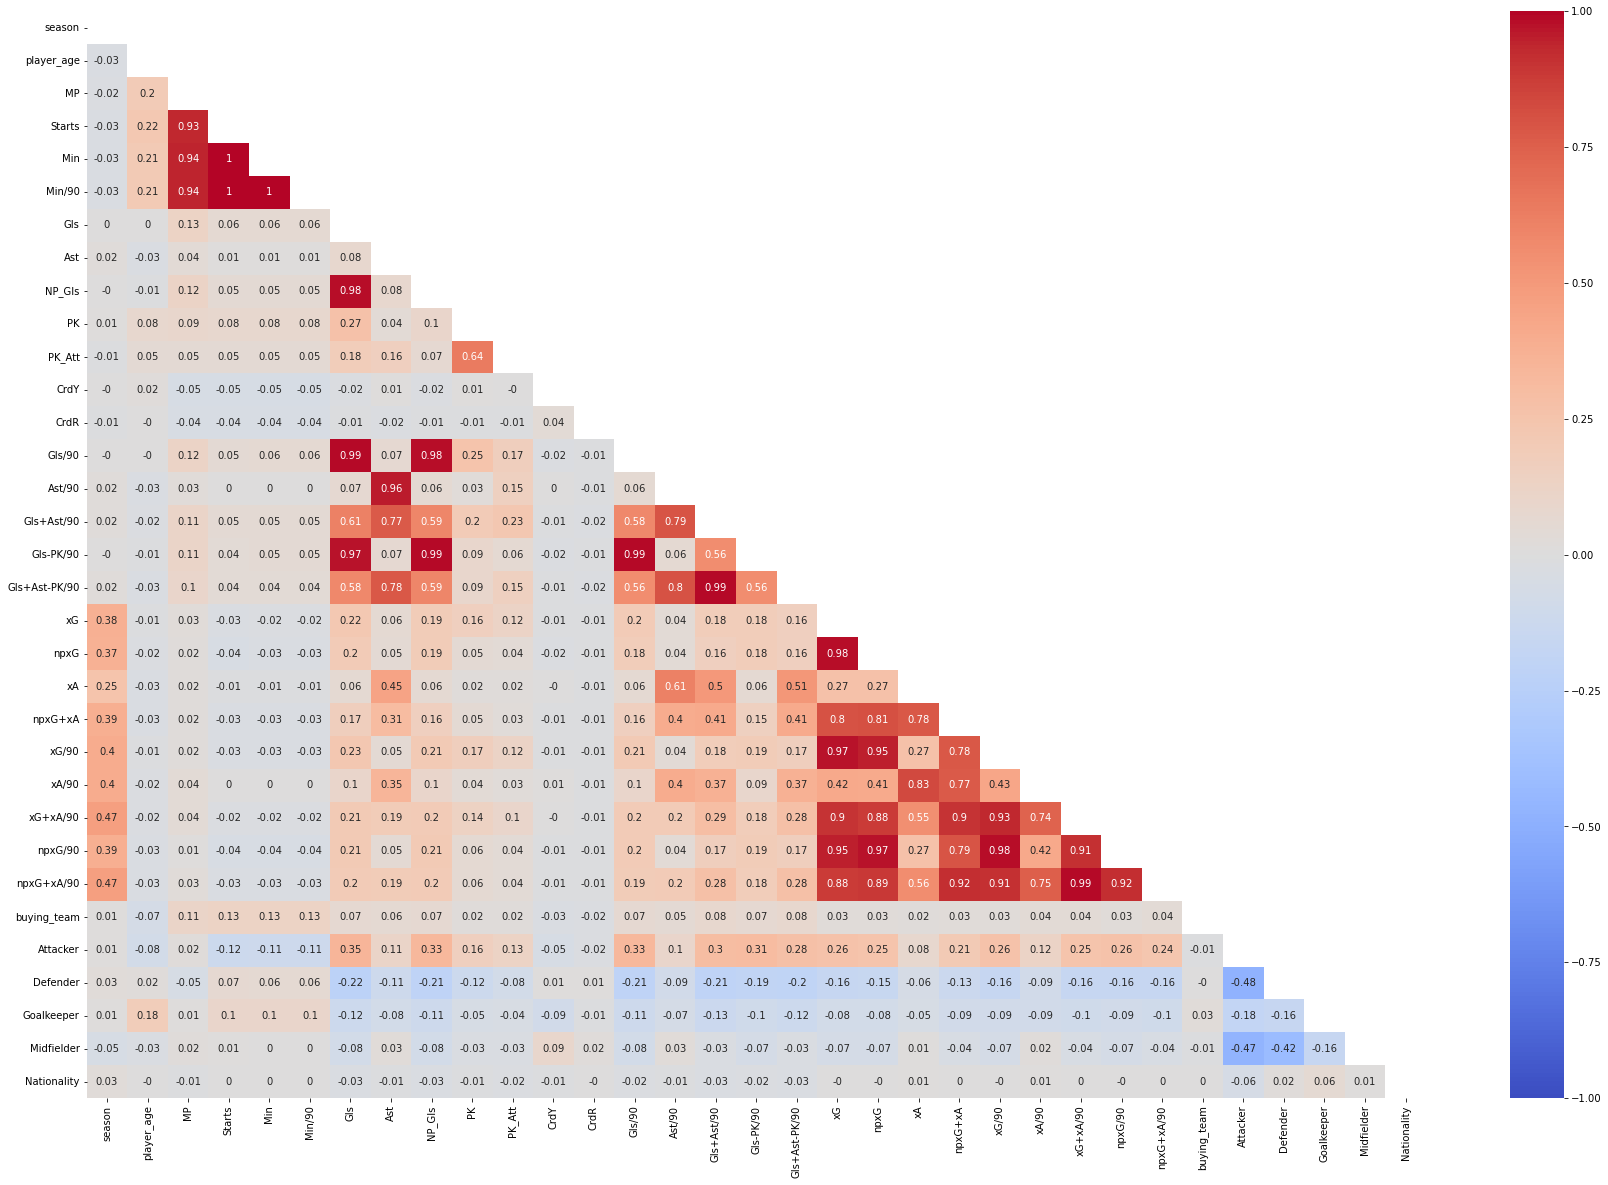

In [332]:
# Visualize the independent variables with a heatmap
corr_X = X.corr()
mask = np.triu(corr_X)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_X.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

Looking at the heatmap above, I can see that there are a lot of multicolinearity present in the dataset. Specifically in the `Min`, `Starts`, `Min/90`. I will now visualize the independent variables versus the target variable to get a better understanding of the features.

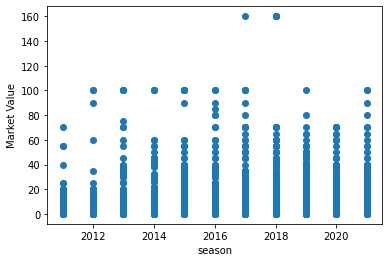

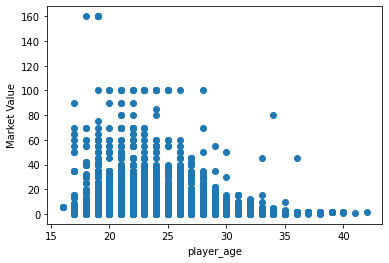

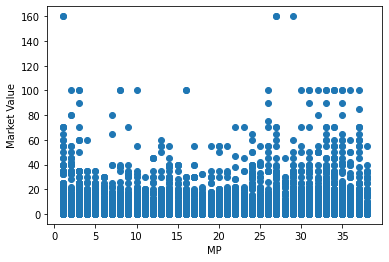

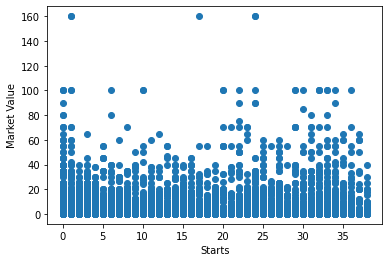

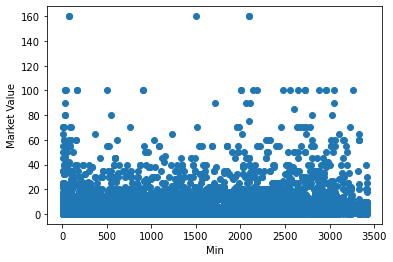

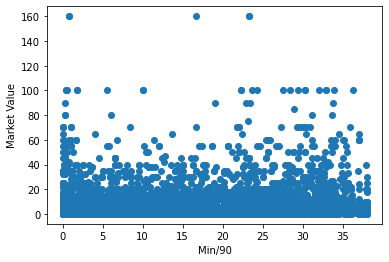

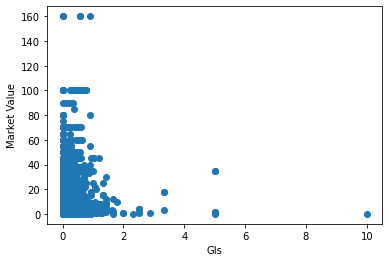

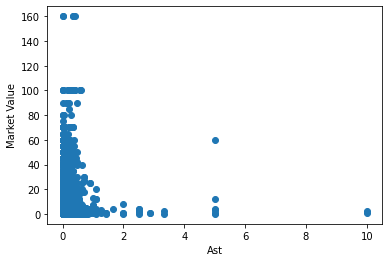

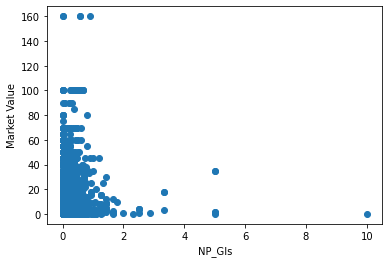

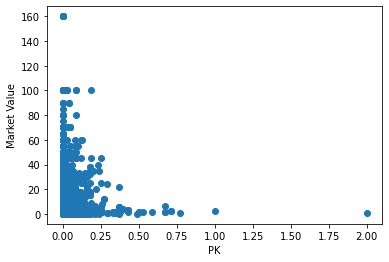

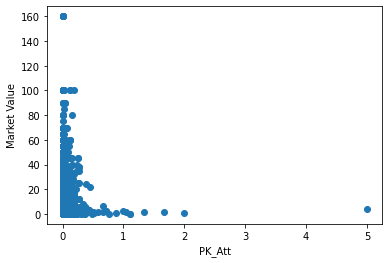

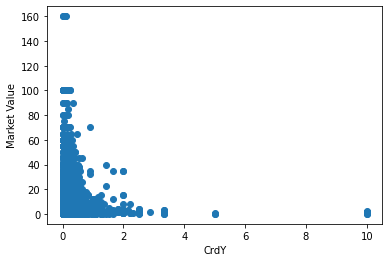

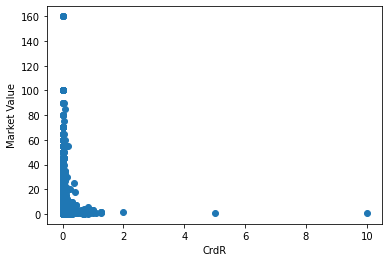

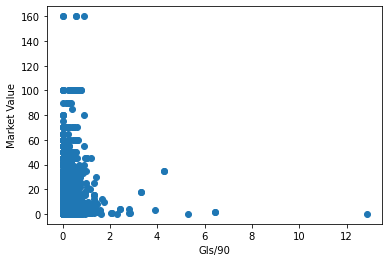

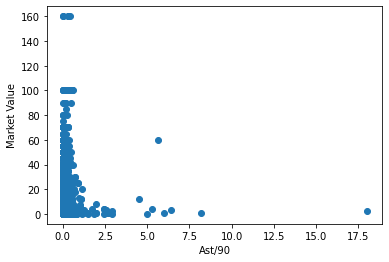

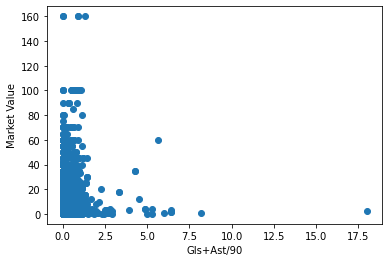

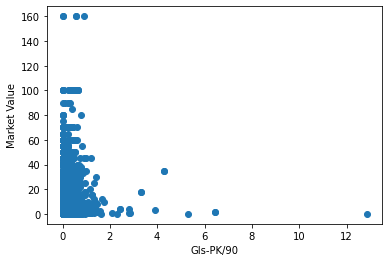

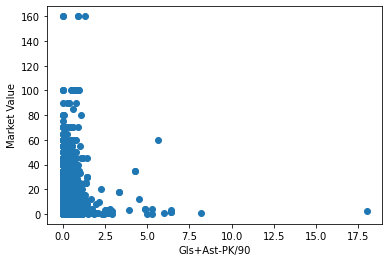

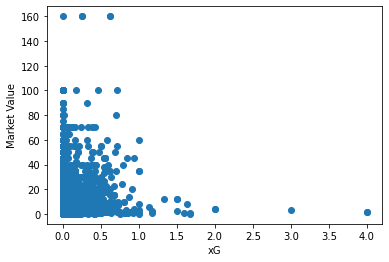

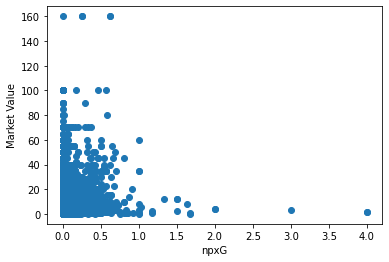

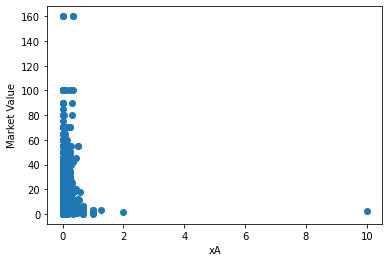

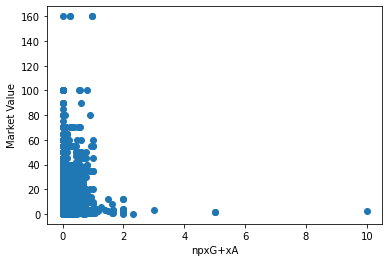

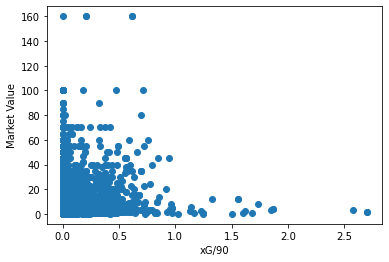

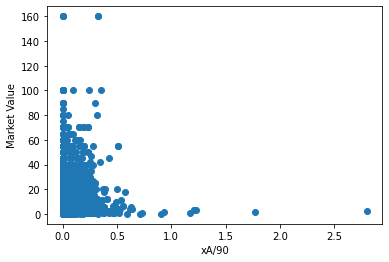

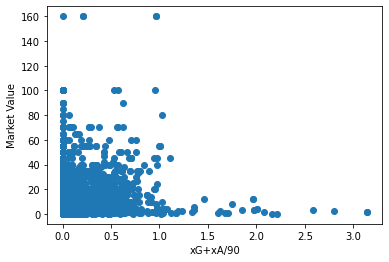

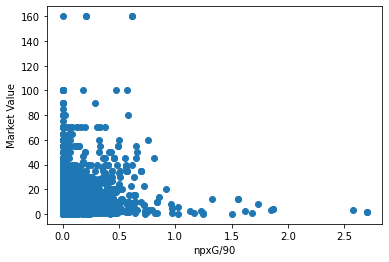

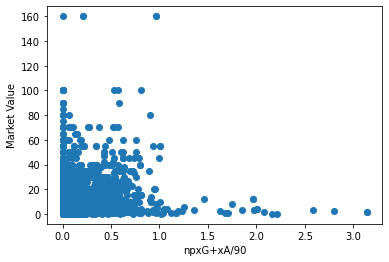

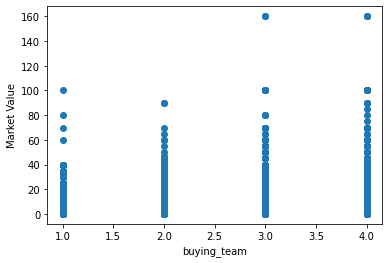

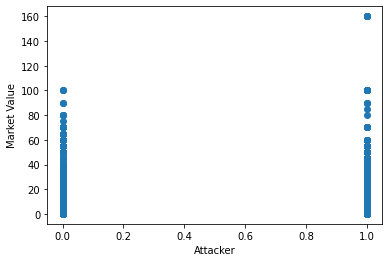

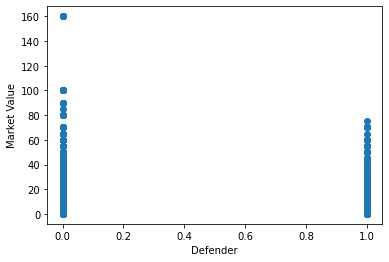

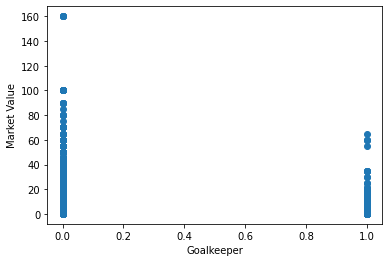

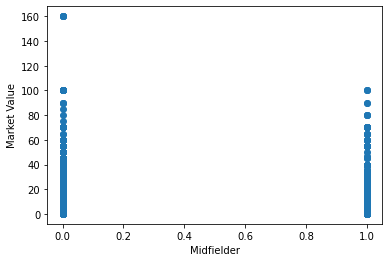

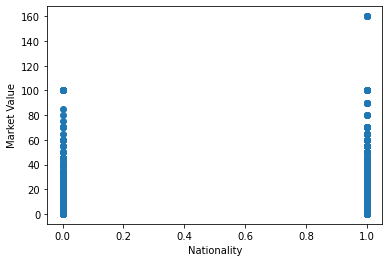

In [333]:
# visualize the independent variables Vs Market Value 

for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Market Value')
    plt.xlabel(col)
    
    plt.show();

I will deal with the multicolinearity later. First I will perform some modeling to see their performance. For that I will split the data into train and test sets with 67%-33% split between them by using the `train_test_split` from the scikit-learn package.

In [334]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

I will check the shape of each of the set as a sanity check.

In [335]:
# Check the shape of each set
print(f"Shape of X_train set: {X_train.shape}")
print(f"Shape of X_test set: {X_test.shape}")
print(f"Shape of y_train set: {y_train.shape}")
print(f"Shape of y_test set: {y_test.shape}")

Shape of X_train set: (5653, 33)
Shape of X_test set: (2785, 33)
Shape of y_train set: (5653,)
Shape of y_test set: (2785,)


I can see that the split is okay. The train set has 5653 rows and the test set has 2785 rows. Now I will perform some modeling.

### Linear Regression

I will first run a Linear Regression model on the data and create a baseline model. This will be a measuring matrix and will help me in comparing and finding the best model. 

For model evaluation, R-squared metrics has been used as a relative measure of goodness of fit to measure the model accuracy and the Mean Absolute Errors is used to calculate the average absolute value of errors between the true Market Value and the predicted Market Value to measure the model performance.

I will import the LinearRegression packages and then instantiate and fit my data.

**Baseline model**

In [336]:
# Import the required package
from sklearn.linear_model import LinearRegression

# Run Linear Regression on the unscaled data first as a baseline model
# 1. Instantiate
baseline_model = LinearRegression()
# 2. Fit
baseline_model.fit(X_train, y_train)

LinearRegression()

In [337]:
baseline_train = round(baseline_model.score(X_train, y_train), 2)
baseline_test = round(baseline_model.score(X_test, y_test), 2)
# Print the R^2
print(f'Baseline model train R^2: {round((baseline_train),2)}')
print(f'Baseline model test R^2: {round((baseline_test),2)}')

Baseline model train R^2: 0.2
Baseline model test R^2: 0.2


In [342]:
# Save the baseline_test R^2 into a new variable for later use 
baseline_r2 = baseline_test
baseline_r2

0.2

The R<sup>2</sup> score on the test set is approximately 0.20 or 20% which is the same as the score on the train set, ~20%. This is not so bad since there is no overfitting in the data. I will now visualize the model prediction versus the actual value in order to compare how the model is performing.

In [340]:
# Import packages
import statsmodels.api as sm
import scipy.stats as stats

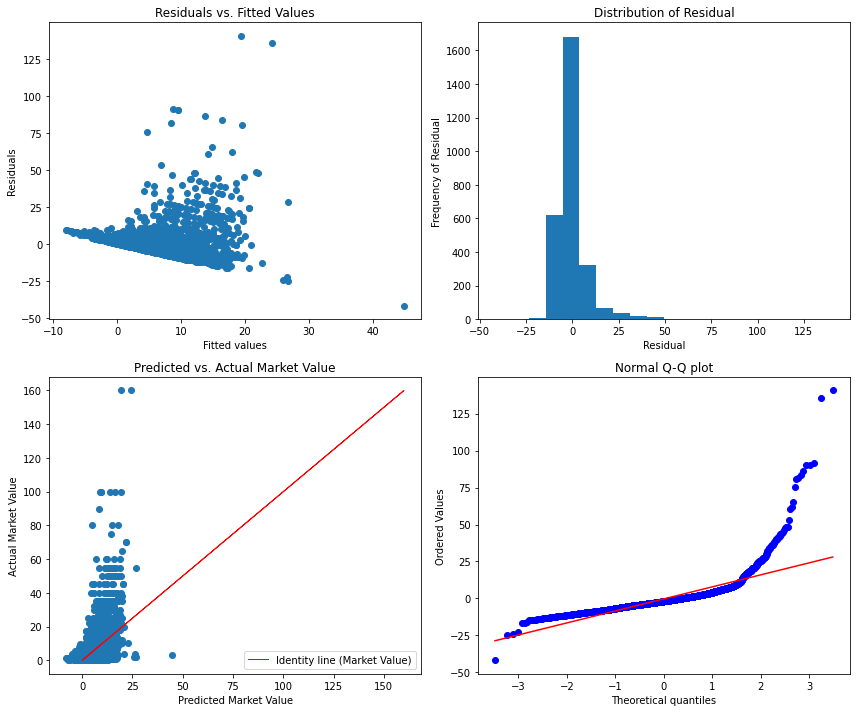

In [341]:
# Find the residuals and prediction values
baseline_model_predict = baseline_model.predict(X_test)
baseline_model_resid = y_test - baseline_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(baseline_model_predict, baseline_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(baseline_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(baseline_model_predict, y_test)
plt.plot(y_test, y_test, color='red',linewidth=1, label='Identity line (Market Value)')
plt.title('Predicted vs. Actual Market Value')
plt.xlabel('Predicted Market Value')
plt.ylabel('Actual Market Value')
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(baseline_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals are not very normally distributed and looking at the prediction versus actual values I can tell that the model is not doing a good job at predicting the market variables. The Q-Q plot generated a probability plot of the sample data against the quantiles of a the theoretical distribution. The plot does not show much linearity in the data. I will now calculate the mean cross_val_scores with RMSE, ‘neg_root_mean_squared_error’ as the scoring metric. Ideally, we would want the RMSE value to be as close to 0 as possible.

In [343]:
# Import the packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Create a dataframe with the RMSE
baseline_results = pd.DataFrame(columns=['Set','Avg RMSE'])
a=1
# Calculate the cross_val_score
cross_val_train = cross_val_score(baseline_model, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(baseline_model, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
baseline_cv_train_mean = round(-(cross_val_train.mean()),2)
# Find the test Results
baseline_cv_test_mean = round(-(cross_val_test.mean()),2)

# Display the results in the dataframe
if a == 1: 
    baseline_results.loc[0] = ['Baseline Train',baseline_cv_train_mean]
    baseline_results.loc[1] = ['Baseline Test', baseline_cv_test_mean]

    a+=1
    
# Display the results
baseline_results

Set  Avg RMSE
0  Baseline Train     10.59
1   Baseline Test     10.12

I will also calculate the Mean Absolute error which is the average absolute value of the errors between the true value and the predicted value. Similar to the RMSE, we would want the MAE value to be as close to 0 as possible.

In [344]:
# Calculate the Mean Absolute error
baseline_model_mae = -np.mean(cross_val_score(baseline_model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error'))
baseline_model_mae

5.862641158070124

Both the RMSE and MAE values are high for the baseline model. I can interpret this as the model is capable of predicting the Market Value of a player within 5.8 million on average. It has an error of around 10.12 million (RMSE). I will now scale the data using `StandardScaler` from scikit-learn package.

In [345]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

I will again run the Linear Regression model on the scaled data to see if there is an improvement.

In [346]:
# Run Linear Regression on the scaled data
# 1. Instantiate
lr_model = LinearRegression()
# 2. Fit
lr_model.fit(X_train_scaled, y_train)
# 3. Score model
print(f'Score on scaled train set: {round(lr_model.score(X_train_scaled, y_train),2)}')
print(f'Score on scaled test set: {round(lr_model.score(X_test_scaled, y_test),2)}')

Score on scaled train set: 0.2
Score on scaled test set: 0.2


The R<sup>2</sup> remained the same on the scaled data. There was no improvement in the performance. I will now take a look at the residuals and the predicted values. 

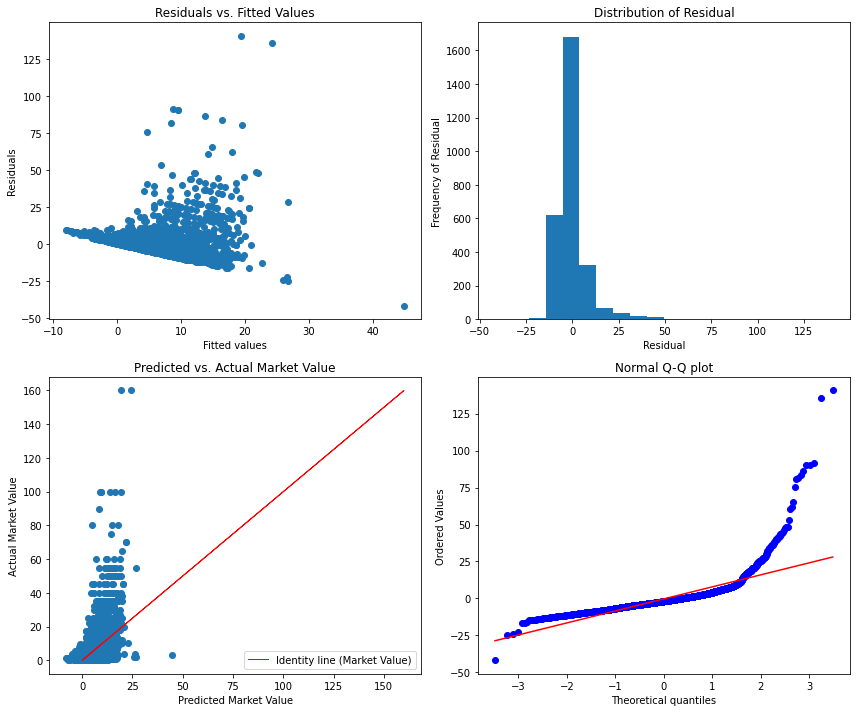

In [347]:
# Find the residuals and prediction values
lr_model_predict = lr_model.predict(X_test_scaled)
lr_model_resid = y_test - lr_model_predict


# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lr_model_predict, lr_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lr_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lr_model_predict, y_test)
plt.plot(y_test, y_test, color='red',linewidth=1, label='Identity line (Market Value)')
plt.title('Predicted vs. Actual Market Value')
plt.xlabel('Predicted Market Value')
plt.ylabel('Actual Market Value')
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lr_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

In [348]:
# Calculate the RMSE
lr_cross_val_train = cross_val_score(lr_model, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
lr_cross_val_test = cross_val_score(lr_model, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)


# Find the train Results
lr_cross_val_train_mean = round(-(cross_val_train.mean()),2)
# Find the test Results
lr_cross_val_test_mean = round(-(cross_val_test.mean()),2)

print(f'RMSE on train: {lr_cross_val_train_mean}')
print(f'RMSE on test: {lr_cross_val_test_mean}')

RMSE on train: 10.59
RMSE on test: 10.12


In [349]:
# Calculate the Mean Absolute error
lr_model_mae = -np.mean(cross_val_score(lr_model, X_train_scaled, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error'))
lr_model_mae

5.862545971634952

There was no improvement in the predictions as well as in the RMSE and MAE. Let me find the model coefficients to see which features had the most effect on the target variable.

In [350]:
# Check the coefficients and the odds ratio
LR_coeffs_df = pd.DataFrame({"Features": X_train.columns, "coef": lr_model.coef_, "odds_ratio": np.exp(lr_model.coef_)})
# Display coefficients
LR_coeffs_df.sort_values('coef', ascending = False)

Features       coef    odds_ratio
17  Gls+Ast-PK/90  79.868195  4.856419e+34
16      Gls-PK/90  59.028269  4.321668e+25
6             Gls  39.913369  2.158519e+17
5          Min/90  20.155729  5.669203e+08
22          xG/90  13.899561  1.087684e+06
9              PK  11.998467  1.625055e+05
26     npxG+xA/90  10.949950  5.695121e+04
23          xA/90   6.530800  6.859471e+02
14         Ast/90   6.143078  4.654842e+02
18             xG   4.418416  8.296477e+01
27    buying_team   2.656652  1.424851e+01
0          season   1.746411  5.733986e+00
32    Nationality   0.334278  1.396931e+00
28       Attacker   0.216192  1.241341e+00
31     Midfielder   0.137936  1.147902e+00
12           CrdR  -0.097735  9.068892e-01
30     Goalkeeper  -0.113611  8.926047e-01
10         PK_Att  -0.281076  7.549706e-01
29       Defender  -0.300994  7.400822e-01
11           CrdY  -0.316597  7.286242e-01
2              MP  -1.269578  2.809502e-01
19           npxG  -1.328366  2.649098e-01
20             xA  -1.930734  1.450417e-01
21        npxG+xA  -2.400933  9.063332e-02
1      player_age  -3.052524  4.723956e-02
3          Starts  -3.648586  2.602791e-02
7             Ast  -4.752520  8.629921e-03
25        npxG/90  -6.958019  9.509786e-04
4             Min -13.635047  1.197773e-06
24       xG+xA/90 -21.213592  6.124264e-10
8          NP_Gls -34.336145  1.224621e-15
13         Gls/90 -64.545995  9.290320e-29
15     Gls+Ast/90 -81.094873  6.038707e-36

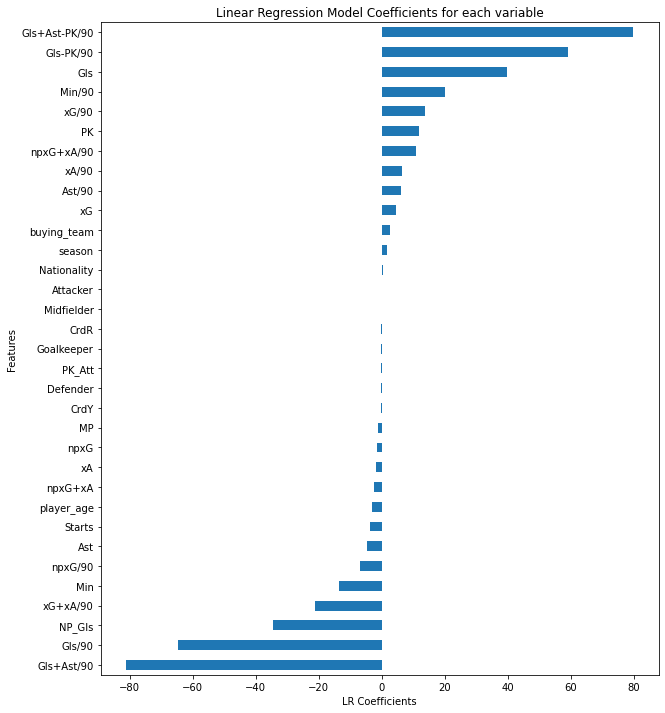

In [351]:
# visualizing the model coefficients for each features
plt.figure(figsize=(10,12))

LR_coeffs_df.groupby(['Features'])['coef'].sum().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('LR Coefficients')
plt.ylabel('Features')
plt.title('Linear Regression Model Coefficients for each variable')
plt.show()

The Goals scored, Assists made, Minutes played in the game have the most positive effect on the Market Value while the player age, games started, etc had a negative effect on the target variable. I will visualize only the top 10 features from the model.

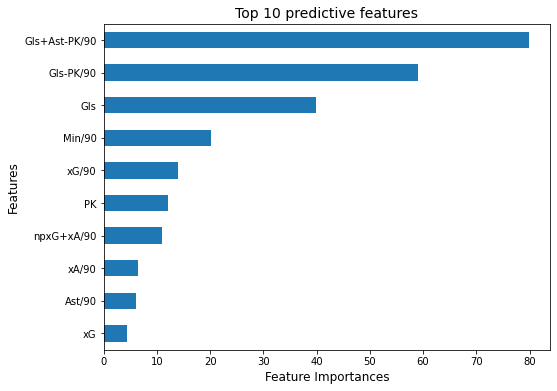

In [352]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))

plt.title('Top 10 predictive features', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)
# Extract the top 10 features
feat_importance = pd.Series(lr_model.coef_, index=X_train.columns)
feat_importance.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

The goals columns have a higher coefficient compared to the other columns. This makes sense as the higher the number of goals scored by a player, the higher their popularity will be and the higher their demand will be. This would respectively increase their Market Value.

I will now run Lasso and Ridge Regression models on the data.

### Lasso Regression

I will now run Lasso Regression model on the data. First I will run the model on the unscaled data.

In [359]:
# Run Lasso on the unscaled data
from sklearn.linear_model import Lasso

lasso_model_unscaled = Lasso(alpha=0.01, max_iter=1000000, random_state=21).fit(X_train, y_train)
# score the model
print(f'Lasso R^2 Score on unscaled train set: {round(lasso_model_unscaled.score(X_train, y_train),2)}')
print(f'Lasso R^2 Score on unscaled test set: {round(lasso_model_unscaled.score(X_test, y_test),2)}')

Lasso R^2 Score on unscaled train set: 0.2
Lasso R^2 Score on unscaled test set: 0.2


The Lasso R<sup>2</sup> on the unscaled data is exactly the same as the Linear Regression. I will rerun the model on the scaled data to see if tehre is an improvement.

In [360]:
# Run Lasso on the scaled data
lasso_model_1 = Lasso(alpha=0.01, max_iter=1000000, random_state=21).fit(X_train_scaled, y_train)
# Scores of each model
print(f'Lasso R^2 Score on train set: {round(lasso_model_1.score(X_train_scaled, y_train),2)}')
print(f'Lasso R^2 Score on test set: {round(lasso_model_1.score(X_test_scaled, y_test),2)}')

Lasso R^2 Score on train set: 0.2
Lasso R^2 Score on test set: 0.2


The R<sup>2</sup> did not change. Let me check the residuals and the predicted values of the model.

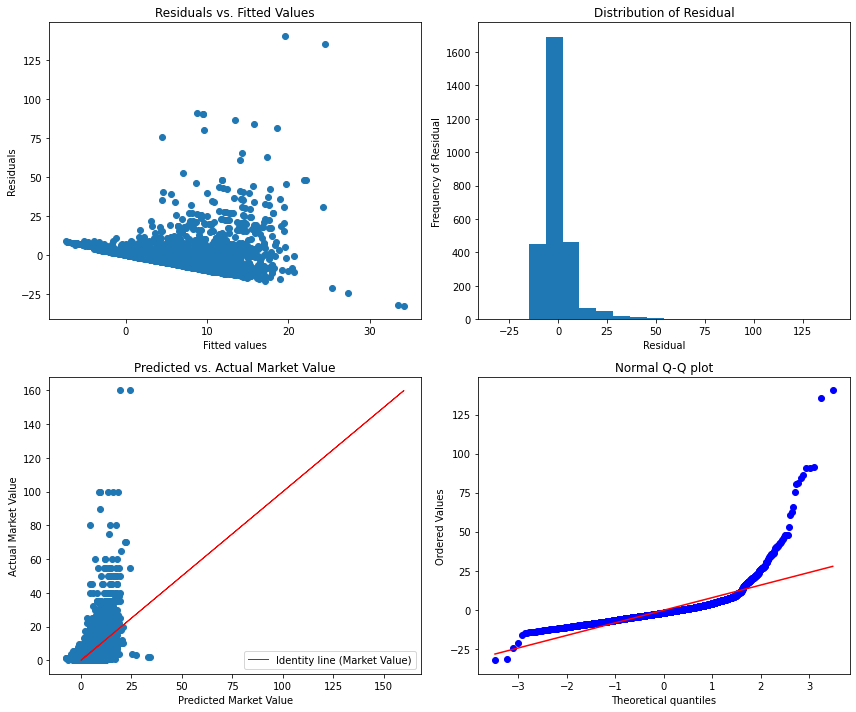

In [362]:
# Find the residuals and the predicted values
lasso_model_1_pred = lasso_model_1.predict(X_test_scaled)
lasso_model_1_resid = y_test - lasso_model_1_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lasso_model_1_pred, lasso_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lasso_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lasso_model_1_pred, y_test)
plt.plot(y_test, y_test, color='red',linewidth=1, label='Identity line (Market Value)')
plt.title('Predicted vs. Actual Market Value')
plt.xlabel('Predicted Market Value')
plt.ylabel('Actual Market Value')
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lasso_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The Lasso model did not do a good job at predicting the Market Value as well. Let me see the coefficients of the model.

In [363]:
# Create a coefficients table for lasso model
lasso_coef_df = pd.DataFrame({"Features": X_train.columns, "Lasso Coefficients": lasso_model_1.coef_})
# Display the coefficients
lasso_coef_df.sort_values('Lasso Coefficients', ascending = False)

Features  Lasso Coefficients
4             Min            2.917611
6             Gls            2.698265
27    buying_team            2.648650
14         Ast/90            2.056937
0          season            1.754057
18             xG            1.379534
23          xA/90            1.014586
17  Gls+Ast-PK/90            0.331674
32    Nationality            0.303254
8          NP_Gls            0.089407
5          Min/90            0.081808
28       Attacker            0.079646
9              PK            0.000000
31     Midfielder            0.000000
26     npxG+xA/90           -0.000000
24       xG+xA/90            0.000000
22          xG/90           -0.000000
19           npxG            0.000000
21        npxG+xA           -0.000000
15     Gls+Ast/90            0.000000
12           CrdR           -0.092810
30     Goalkeeper           -0.113397
16      Gls-PK/90           -0.119410
10         PK_Att           -0.166360
11           CrdY           -0.306817
29       Defender           -0.372915
25        npxG/90           -0.515224
2              MP           -0.589560
3          Starts           -0.747693
20             xA           -1.543116
7             Ast           -1.656196
13         Gls/90           -2.391628
1      player_age           -3.051386

There are lot of zeros in the coefficients. I will filter the dataframe to only show the non-zero coefficients.

In [364]:
# Display only the coefficients not equal to 0
new_lasso_coef_df = lasso_coef_df[(lasso_coef_df['Lasso Coefficients'] != 0)]
# Display coefficients
new_lasso_coef_df.sort_values('Lasso Coefficients', ascending = False)

Features  Lasso Coefficients
4             Min            2.917611
6             Gls            2.698265
27    buying_team            2.648650
14         Ast/90            2.056937
0          season            1.754057
18             xG            1.379534
23          xA/90            1.014586
17  Gls+Ast-PK/90            0.331674
32    Nationality            0.303254
8          NP_Gls            0.089407
5          Min/90            0.081808
28       Attacker            0.079646
12           CrdR           -0.092810
30     Goalkeeper           -0.113397
16      Gls-PK/90           -0.119410
10         PK_Att           -0.166360
11           CrdY           -0.306817
29       Defender           -0.372915
25        npxG/90           -0.515224
2              MP           -0.589560
3          Starts           -0.747693
20             xA           -1.543116
7             Ast           -1.656196
13         Gls/90           -2.391628
1      player_age           -3.051386

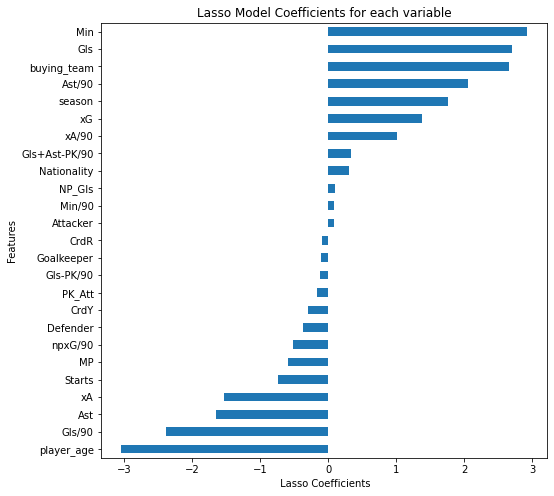

In [365]:
# visualizing the model coefficients for each features
plt.figure(figsize=(8,8))

new_lasso_coef_df.groupby(['Features'])['Lasso Coefficients'].sum().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel(' Lasso Coefficients')
plt.ylabel('Features')
plt.title('Lasso Model Coefficients for each variable')
plt.show()

I will check the RMSE and the MAE for the Lasso model 1 on the scaled data.

In [366]:
# Create a dataframe with the RMSE
lasso_results = pd.DataFrame(columns=['Set','Avg RMSE'])
a=1
# Calculate the cross_val_score
cross_val_train = cross_val_score(lasso_model_1, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(lasso_model_1, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
# Find the test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)

# Display the results in the dataframe
if a == 1: 
    lasso_results.loc[0] = ['Train',cross_val_train_mean]
    lasso_results.loc[1] = ['Test', cross_val_test_mean]

    a+=1
    
# Display the results
lasso_results

Set  Avg RMSE
0  Train     10.63
1   Test      9.97

In [367]:
# Calculate the Mean Absolute error
lasso_model_mae = -np.mean(cross_val_score(lasso_model_1, X_train_scaled, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error'))
lasso_model_mae

5.849682361039075

Looking at the RMSE and MAE it looks it has decreased a little. 

### Ridge Regression

I will now run Ridge Regression model on the data. First I will run the model on the unscaled data.

In [374]:
# import Ridge
from sklearn.linear_model import Ridge

# Run Ridge on the unscaled data
ridge_model_unscaled = Ridge(alpha=0.1, max_iter=1000000, random_state=21).fit(X_train, y_train)
# score the model
print(f'Ridge R^2 Score on unscaled train set: {round(ridge_model_unscaled.score(X_train, y_train),2)}')
print(f'Ridge R^2 Score on unscaled test set: {round(ridge_model_unscaled.score(X_test, y_test),2)}')

Ridge R^2 Score on unscaled train set: 0.2
Ridge R^2 Score on unscaled test set: 0.2


The R<sup>2</sup> is the same for this model as well. Let me run the model on the scaled data now.

In [375]:
# Run Ridge on the scaled data
ridge_model_1 = Ridge(alpha=0.1, max_iter=1000000, random_state=21).fit(X_train_scaled, y_train)
# Score the model
print(f'Ridge R^2 on train set: {round(ridge_model_1.score(X_train_scaled, y_train),2)}')
print(f'Ridge R^2 on test set: {round(ridge_model_1.score(X_test_scaled, y_test),2)}')

Ridge R^2 on train set: 0.2
Ridge R^2 on test set: 0.2


The R<sup>2</sup> is the same on the scaled data as well. Let me check the coefficients from the model.

In [376]:
# Create a coefficients table for ridge model
ridge_coef_df = pd.DataFrame({"Features": X_train.columns, "Ridge Coefficients": ridge_model_1.coef_})
# Print the coefficients dataframe
ridge_coef_df.sort_values('Ridge Coefficients', ascending = False)

Features  Ridge Coefficients
17  Gls+Ast-PK/90           19.702855
16      Gls-PK/90           17.003393
22          xG/90           10.115499
14         Ast/90            6.148573
23          xA/90            6.033455
9              PK            5.719423
8          NP_Gls            5.669522
5          Min/90            5.088376
19           npxG            3.224623
27    buying_team            2.650185
0          season            1.749945
26     npxG+xA/90            1.673613
4             Min            1.449093
32    Nationality            0.328098
28       Attacker            0.219839
31     Midfielder            0.137651
12           CrdR           -0.097615
30     Goalkeeper           -0.116094
10         PK_Att           -0.269992
29       Defender           -0.303190
11           CrdY           -0.317669
18             xG           -0.484349
6             Gls           -1.256239
2              MP           -1.286205
20             xA           -2.025658
21        npxG+xA           -2.274010
1      player_age           -3.043828
3          Starts           -3.645773
25        npxG/90           -4.211681
7             Ast           -4.758328
24       xG+xA/90          -10.367373
15     Gls+Ast/90          -20.029655
13         Gls/90          -21.496090

I will filter only the non-zero coefficients to look at the best features.

In [377]:
# Display only the coefficients not equal to 0
new_ridge_coef_df = ridge_coef_df[(ridge_coef_df['Ridge Coefficients'] != 0)]
# Display coefficients
new_ridge_coef_df.sort_values('Ridge Coefficients', ascending = False)

Features  Ridge Coefficients
17  Gls+Ast-PK/90           19.702855
16      Gls-PK/90           17.003393
22          xG/90           10.115499
14         Ast/90            6.148573
23          xA/90            6.033455
9              PK            5.719423
8          NP_Gls            5.669522
5          Min/90            5.088376
19           npxG            3.224623
27    buying_team            2.650185
0          season            1.749945
26     npxG+xA/90            1.673613
4             Min            1.449093
32    Nationality            0.328098
28       Attacker            0.219839
31     Midfielder            0.137651
12           CrdR           -0.097615
30     Goalkeeper           -0.116094
10         PK_Att           -0.269992
29       Defender           -0.303190
11           CrdY           -0.317669
18             xG           -0.484349
6             Gls           -1.256239
2              MP           -1.286205
20             xA           -2.025658
21        npxG+xA           -2.274010
1      player_age           -3.043828
3          Starts           -3.645773
25        npxG/90           -4.211681
7             Ast           -4.758328
24       xG+xA/90          -10.367373
15     Gls+Ast/90          -20.029655
13         Gls/90          -21.496090

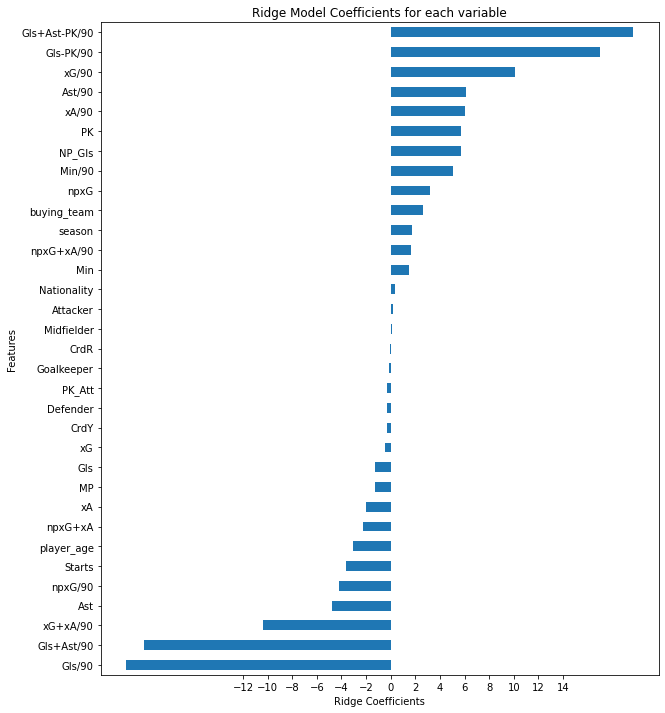

In [378]:
# visualizing the Ridge model coefficients for each features
plt.figure(figsize=(10,12))

new_ridge_coef_df.groupby(['Features'])['Ridge Coefficients'].sum().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Ridge Coefficients')
plt.ylabel('Features')
plt.title('Ridge Model Coefficients for each variable')
plt.xticks(list(range(-12, 16, 2)))
plt.show()

These features are quite similar to what I got with the other 2 models. I will now look at the residuals and the predicted values for the model.

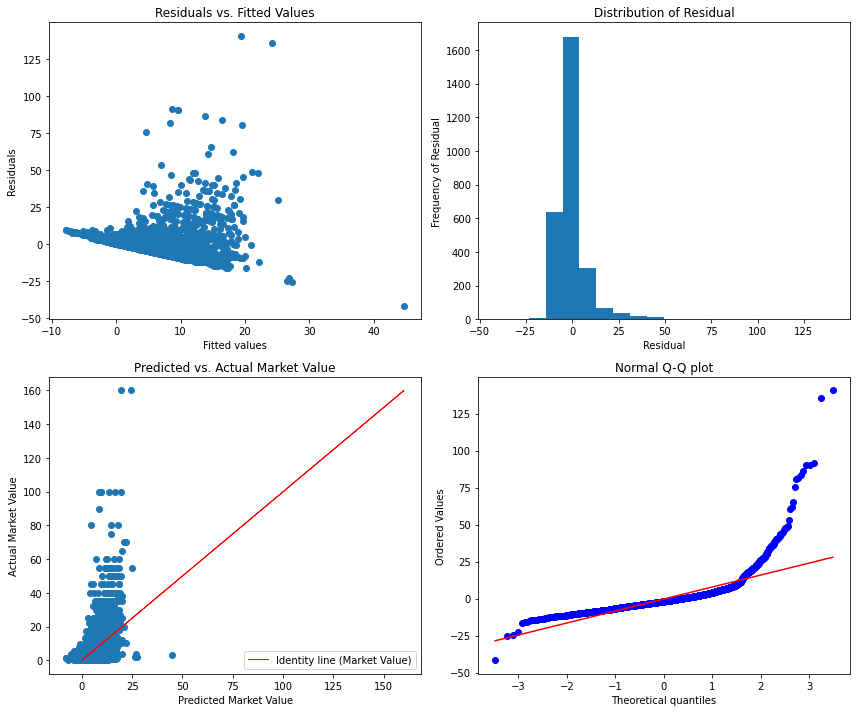

In [379]:
# Find the residuals 
ridge_model_1_pred = ridge_model_1.predict(X_test_scaled)
ridge_model_1_resid = y_test - ridge_model_1_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(ridge_model_1_pred, ridge_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(ridge_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(ridge_model_1_pred, y_test)
plt.plot(y_test, y_test, color='red',linewidth=1, label='Identity line (Market Value)')
plt.title('Predicted vs. Actual Market Value')
plt.xlabel('Predicted Market Value')
plt.ylabel('Actual Market Value')
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(ridge_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

This model like the other two was not able to predict the Market Value accurately. Let me chekc the RMSE and the MAE for this model.

In [380]:
# Create a dataframe with the RMSE
ridge_model_1_results = pd.DataFrame(columns=['Set','Avg RMSE'])
a=1
# Calculate the cross_val_score
cross_val_train = cross_val_score(ridge_model_1, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(ridge_model_1, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
# Find the test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)

# Display the results in the dataframe
if a == 1: 
    ridge_model_1_results.loc[0] = ['Train',cross_val_train_mean]
    ridge_model_1_results.loc[1] = ['Test', cross_val_test_mean]

    a+=1
    
# Display the results
ridge_model_1_results

Set  Avg RMSE
0  Train     10.58
1   Test     10.07

In [381]:
# Calculate the Mean Absolute error
ridge_model_1_mae = -np.mean(cross_val_score(ridge_model_1, X_train_scaled, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error'))
ridge_model_1_mae

5.85441279083084

The RMSE and the MAE did not change much. Let me filter only the top 10 features from the model.

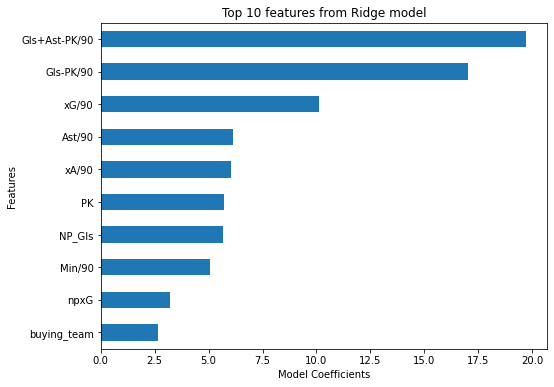

In [382]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))

plt.title('Top 10 features from Ridge model')
plt.xlabel('Model Coefficients')
plt.ylabel('Features')
# Extract the top 10 features
feat_importances = pd.Series(ridge_model_1.coef_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [389]:
# Display the Mean Absolute Error of the models
print(f'Linear Regression: {lr_model_mae}')
print(f'Lasso: {lr_model_mae}')
print(f'Ridge: {ridge_model_1_mae}')
print(f'Baseline model: {baseline_model_mae}')

Linear Regression: 5.862545971634952
Lasso: 5.862545971634952
Ridge: 5.85441279083084
Baseline model: 5.862641158070124


All 3 models have almost similar RMSE and MAE values which are quite high. The models are also not performing well. One of the reasons for this is beacause the data is very imbalanced and skewed. 

-----

### Transforming the target variable by taking the log of `market_val_amnt_mil`

I will transform the target variable by taking the logarithm of the Market Value in an attempt to linearize the data. This will help me eliminating any negative value predictions as well and also help address the issue of skewness.

In [390]:
# Taking log of Market Value column
final_df['log_MV'] = np.log(final_df['market_val_amnt_mil'] + 1)
# Check the dataframe
final_df.head()

season  player_age  market_val_amnt_mil    MP  Starts     Min  Min/90  \
0     2011          28                  1.5  38.0    38.0  3375.0    37.5   
1     2011          24                  1.5  14.0    13.0  1115.0    12.4   
8     2011          24                  0.4  10.0     7.0   536.0     6.0   
11    2011          22                  1.5   2.0     0.0    31.0     0.3   
19    2011          26                  1.5  17.0    10.0   996.0    11.1   

     Gls   Ast  NP_Gls  ...  xG+xA/90  npxG/90  npxG+xA/90  buying_team  \
0   0.05  0.03    0.05  ...       0.0      0.0         0.0            2   
1   0.24  0.08    0.24  ...       0.0      0.0         0.0            2   
8   0.00  0.17    0.00  ...       0.0      0.0         0.0            2   
11  0.00  0.00    0.00  ...       0.0      0.0         0.0            2   
19  0.00  0.09    0.00  ...       0.0      0.0         0.0            2   

    Attacker  Defender  Goalkeeper  Midfielder  Nationality    log_MV  
0          0         1           0           0            1  0.916291  
1          0         0           0           1            1  0.916291  
8          1         0           0           0            1  0.336472  
11         1         0           0           0            1  0.916291  
19         1         0           0           0            1  0.916291  

[5 rows x 35 columns]

The target variable has been transformed into log values. I will take a look at this column.

In [391]:
# Find the basic statistics details about the column
final_df['log_MV'].describe()

count    8438.000000
mean        1.315869
std         0.960812
min         0.009950
25%         0.641854
50%         0.916291
75%         1.791759
max         5.081404
Name: log_MV, dtype: float64

Looking at the column I can see that the average is around 1.31 and the maximum value is around 5.08. Let me look at the histograms and boxplots of the Market Value before and after the transformation to see the difference.

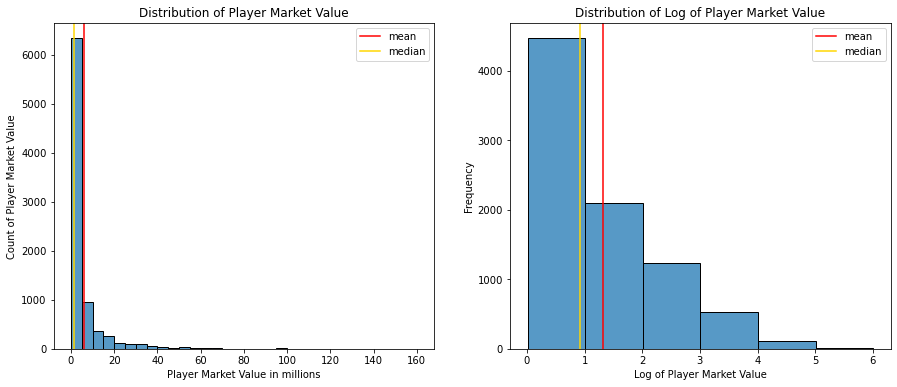

In [392]:
# Visualizing both variables
plt.subplots(1, 2, figsize=(15, 6))

# Visualizing the distribution of market_val_amnt_mil
plt.subplot(1, 2, 1)
sns.histplot(data = final_df, x = 'market_val_amnt_mil', binwidth = 5)
# add vertical lines to show the median and mean
plt.axvline(final_df['market_val_amnt_mil'].mean(), c='r', label='mean')
plt.axvline(final_df['market_val_amnt_mil'].median(), c='gold', label='median')
plt.xlabel('Player Market Value in millions')
plt.ylabel('Count of Player Market Value')
plt.title("Distribution of Player Market Value")
plt.legend()

# Visualizing the distribution of log_MV
plt.subplot(1, 2, 2)
sns.histplot(data = final_df, x = 'log_MV', binwidth = 1)
# add vertical lines to show the median and mean
plt.axvline(final_df['log_MV'].mean(), c='r', label='mean')
plt.axvline(final_df['log_MV'].median(), c='gold', label='median')
plt.xlabel('Log of Player Market Value')
plt.ylabel('Frequency')
plt.title("Distribution of Log of Player Market Value")
plt.legend()

plt.show() 

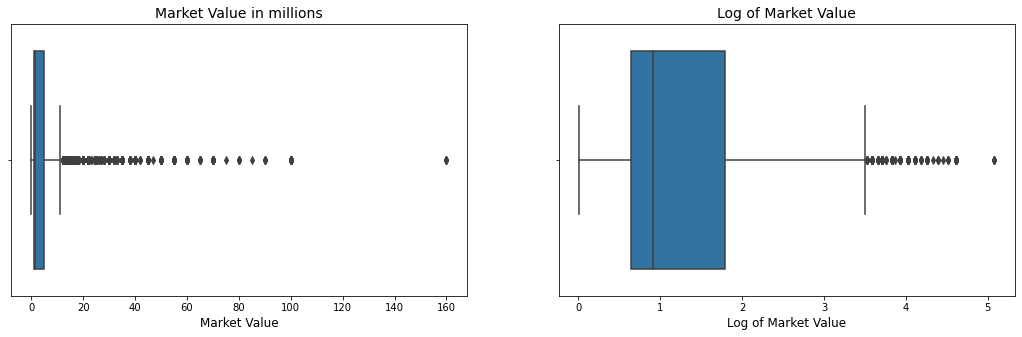

In [393]:
# Visualizing using Box plots
plt.subplots(1, 2, figsize=(18, 5))

# Box plot of Market Value in millions
plt.subplot(1, 2, 1)
sns.boxplot(data=final_df, x = 'market_val_amnt_mil')
plt.title('Market Value in millions', fontsize=14)
plt.xlabel('Market Value', fontsize=12)

# Box plot of Log of Market Value
plt.subplot(1, 2, 2)
sns.boxplot(data=final_df, x = 'log_MV')
plt.title('Log of Market Value', fontsize=14)
plt.xlabel('Log of Market Value', fontsize=12)

plt.show()

Looking at the histograms and the box plots, I can tell that the target variable looks much better than before. The data is less skewed than before and the trend also looks more consistent now. I will move forward to modeling to see the difference in the performance.

I will instanstiate my independent and dependent variables again with the log of Market Value being the target variable now. 

In [394]:
# Instantiating our independent and dependent variables 
X_orig = final_df.drop(columns=["market_val_amnt_mil", "log_MV"])
y_orig_log = final_df["log_MV"]

Let me visualize the independent variables versus the target variable to get a better understanding of the features.

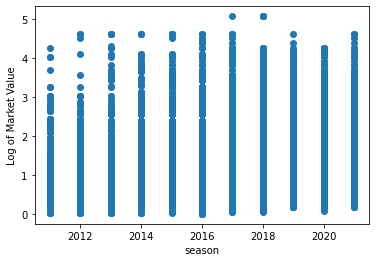

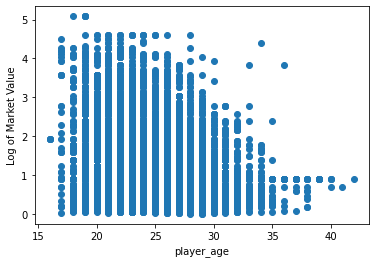

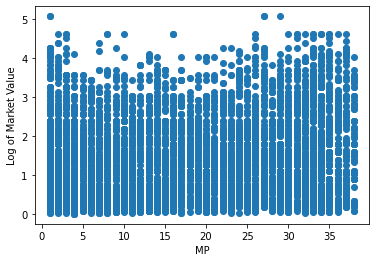

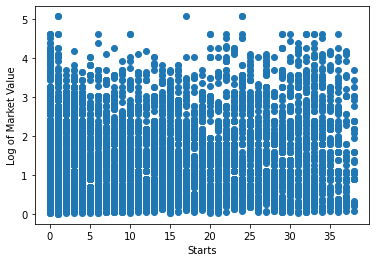

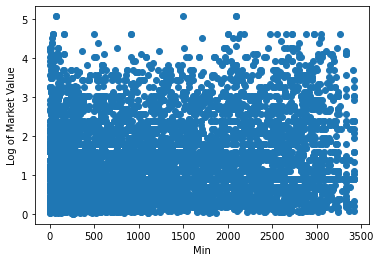

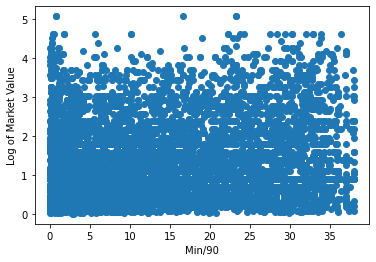

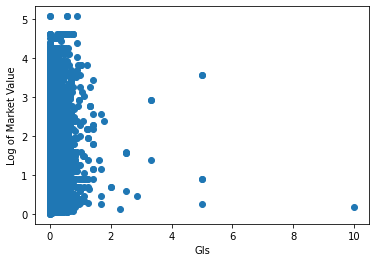

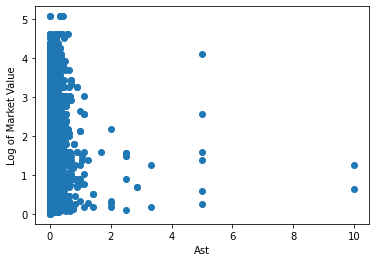

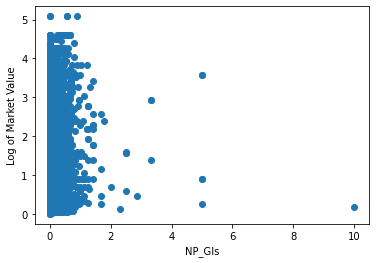

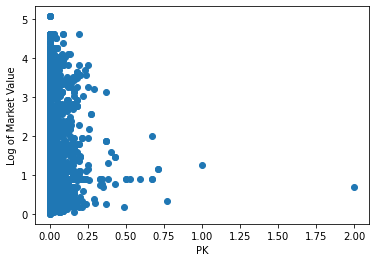

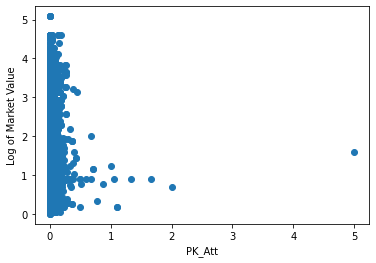

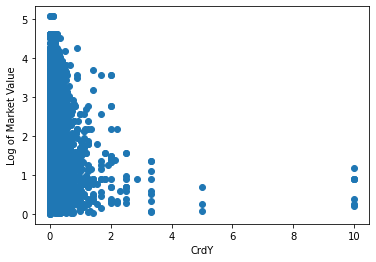

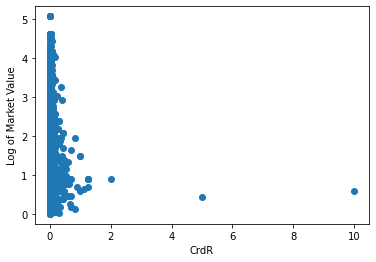

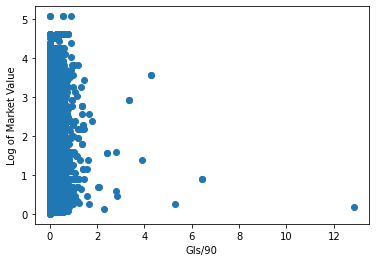

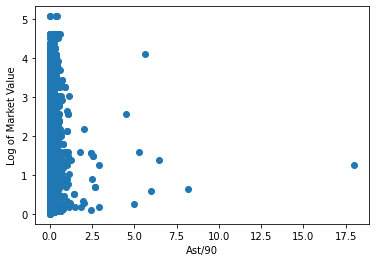

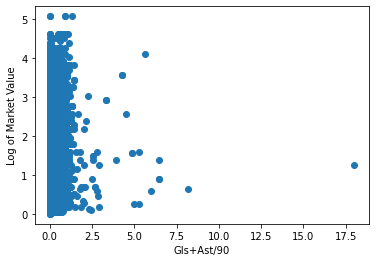

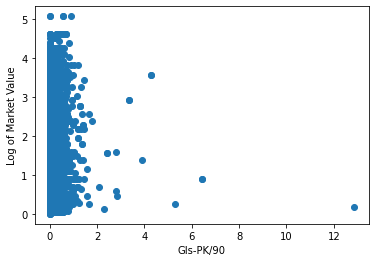

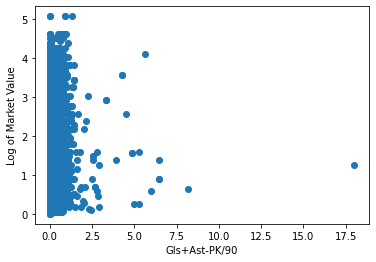

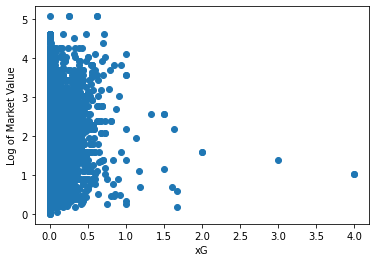

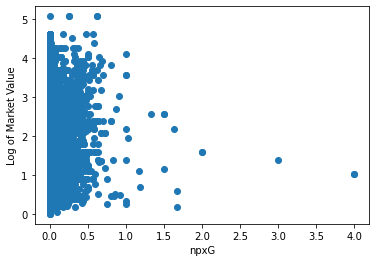

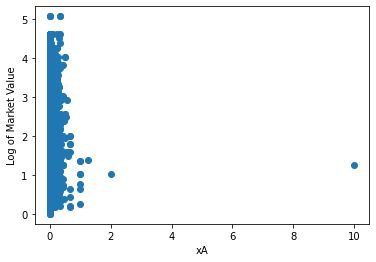

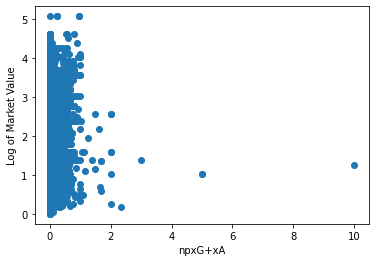

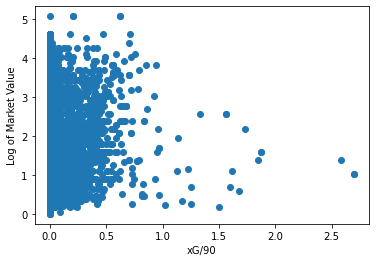

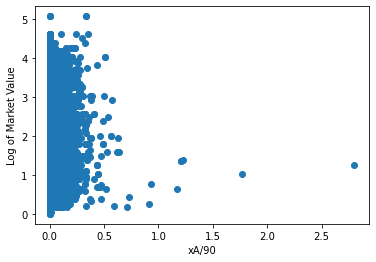

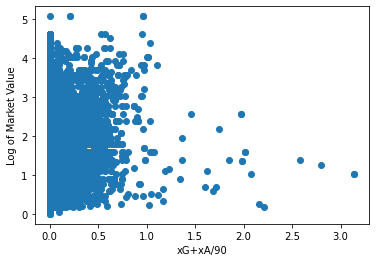

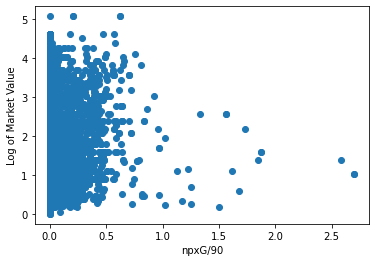

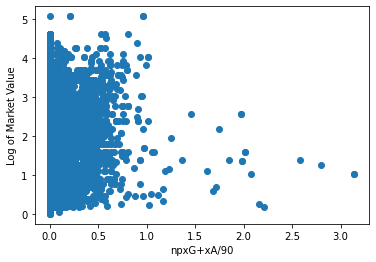

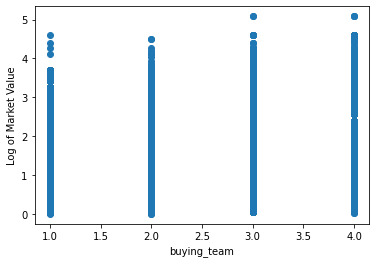

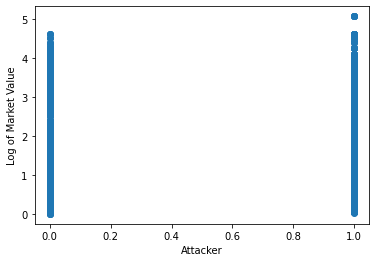

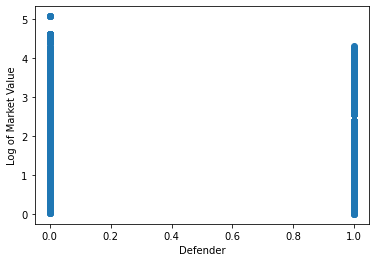

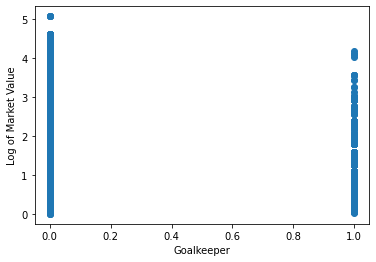

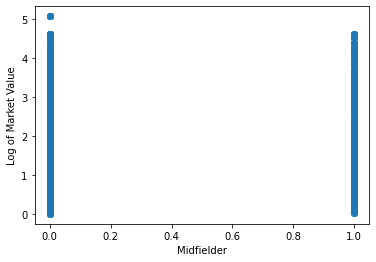

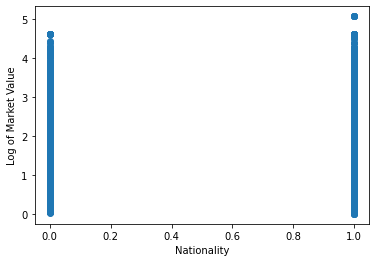

In [395]:
# visualize the independent variables Vs Log of Market Value 

for col in X_orig.columns: 
    plt.figure()
    plt.scatter(X_orig[col], y_orig_log)
    plt.ylabel('Log of Market Value')
    plt.xlabel(col)
    
    plt.show();

I will also look at the correlations between each variables with the target variable. The year, teams, and the goals columns have a higher correlation compared to the other columns. The player age, positions, and the number of yellow cards and red cards received by the players are negatively correlated to the Market Value. The age column being negatively correlated makes sense because as the players get older, their stamina decreases, their performance deteriorates and since they can't perform well the demand to have them play in a club decreases along with their Market Value. Moreover, most players retire after the age of 38.

In [396]:
# Look at correlation between each variable and Log of Market Value
final_df.corr()['log_MV'].sort_values(ascending=False)

log_MV                 1.000000
market_val_amnt_mil    0.812974
season                 0.348302
buying_team            0.313842
xG+xA/90               0.254590
npxG+xA/90             0.253476
xG/90                  0.224336
npxG/90                0.221458
xG                     0.217684
npxG+xA                0.215596
npxG                   0.214001
xA/90                  0.208997
MP                     0.159505
Min/90                 0.143545
Min                    0.143515
Starts                 0.137952
xA                     0.126156
Gls                    0.112334
Gls+Ast/90             0.112239
Gls+Ast-PK/90          0.109910
NP_Gls                 0.109463
Gls/90                 0.101257
Gls-PK/90              0.097986
Ast                    0.056385
Attacker               0.055181
Ast/90                 0.048951
Nationality            0.040156
PK                     0.036234
PK_Att                 0.024980
Midfielder             0.012591
CrdR                  -0.029855
Defender

I will split the data into train and test sets with 67%-33% split between them like I did previously.

In [397]:
# Splitting the data into new train and test sets
X_orig_train, X_orig_test, y_orig_log_train, y_orig_log_test = train_test_split(X_orig, y_orig_log, 
                                                                                test_size=0.33, random_state=42)

I will check the shape of each set as a sanity check.

In [398]:
# Check the shape of each set
print(f"Shape of X_orig_train set: {X_orig_train.shape}")
print(f"Shape of X_orig_test set: {X_orig_test.shape}")
print(f"Shape of y_orig_log_train set: {y_orig_log_train.shape}")
print(f"Shape of y_orig_log_test set: {y_orig_log_test.shape}")

Shape of X_orig_train set: (5653, 33)
Shape of X_orig_test set: (2785, 33)
Shape of y_orig_log_train set: (5653,)
Shape of y_orig_log_test set: (2785,)


Now I will first run a Linear Regression model to see the model performance.

In [399]:
# Apply Linear Regression model to unscaled data
# Instantiate the model
lr_model_unscaled = LinearRegression()
# Fit
lr_model_unscaled.fit(X_orig_train, y_orig_log_train)
# Score model
print(f'Score on train set for unscaled data: {round(lr_model_unscaled.score(X_orig_train, y_orig_log_train),2)}')
print(f'Score on test set for unscaled data: {round(lr_model_unscaled.score(X_orig_test, y_orig_log_test),2)}')

Score on train set for unscaled data: 0.34
Score on test set for unscaled data: 0.33


The R<sup>2</sup> has gone up by 13% which is good. There is a little underfitting present in the data. I will scale the data using StandardScaler from scikit-learn package and fit the scaled data into a Linear Regression model in order to see if there is an improvement in the model performance.

In [400]:
# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_orig_train)
X_orig_train_scaled = scaler.transform(X_orig_train)
X_orig_test_scaled = scaler.transform(X_orig_test)

In [401]:
# Apply Linear Regression model to scaled data
# Instantiate the model
lr_model_2 = LinearRegression()
# Fit
lr_model_2.fit(X_orig_train_scaled, y_orig_log_train)
# Score model
print(f'Score on train set: {round(lr_model_2.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'Score on test set: {round(lr_model_2.score(X_orig_test_scaled, y_orig_log_test),2)}')

Score on train set: 0.34
Score on test set: 0.33


The score remained the same for the scaled data. Let me check the residuals and predictions.

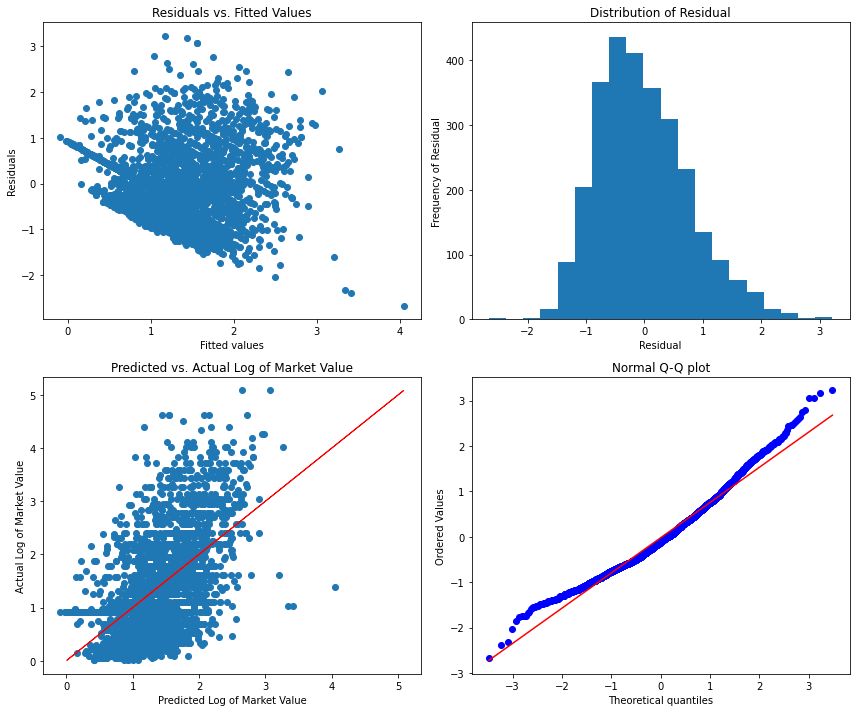

In [474]:
# Find the residuals and predictions
lr_model_2_predict = lr_model_2.predict(X_orig_test_scaled)
lr_model_2_resid = y_orig_log_test - lr_model_2_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lr_model_2_predict, lr_model_2_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lr_model_2_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lr_model_2_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lr_model_2_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals look much better than before and have a much more normal shape to their distribution. The model is performing much better than before with the transformed target variable. The Q-Q plot looks better. It is pretty linear, representing a good model fit on the data. Let me find the coefficients from this model.

In [403]:
# Check the coefficients and the odds ratio
LR_2_coeffs_df = pd.DataFrame({"Features": X_orig_train.columns, "coef": lr_model_2.coef_, 
                             "odds_ratio": np.expm1(lr_model_2.coef_)})
# Display coefficients
LR_2_coeffs_df.sort_values('coef', ascending = False)

Features      coef  odds_ratio
17  Gls+Ast-PK/90  6.342347  567.128191
16      Gls-PK/90  3.174852   22.923276
6             Gls  2.072614    6.945567
26     npxG+xA/90  1.649325    4.203466
5          Min/90  1.542701    3.677207
22          xG/90  1.430031    3.178828
9              PK  0.910602    1.485818
18             xG  0.650775    0.917025
23          xA/90  0.600709    0.823411
14         Ast/90  0.436132    0.546713
0          season  0.273225    0.314196
27    buying_team  0.251736    0.286257
2              MP  0.054294    0.055795
32    Nationality  0.034610    0.035216
31     Midfielder  0.018821    0.019000
28       Attacker -0.002073   -0.002071
30     Goalkeeper -0.006809   -0.006785
10         PK_Att -0.007886   -0.007855
29       Defender -0.012987   -0.012903
12           CrdR -0.013079   -0.012994
11           CrdY -0.026327   -0.025984
20             xA -0.124750   -0.117283
21        npxG+xA -0.199097   -0.180530
1      player_age -0.289272   -0.251191
3          Starts -0.340955   -0.288909
7             Ast -0.362197   -0.303855
19           npxG -0.380156   -0.316245
25        npxG/90 -0.729899   -0.518042
4             Min -1.084131   -0.661805
8          NP_Gls -1.680317   -0.813685
24       xG+xA/90 -2.675035   -0.931096
13         Gls/90 -3.570776   -0.971866
15     Gls+Ast/90 -6.420195   -0.998372

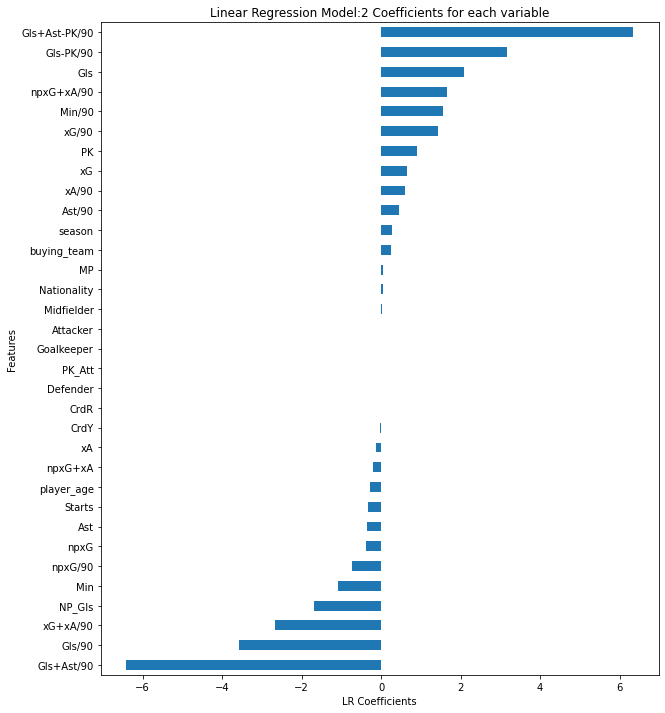

In [404]:
# visualizing the model coefficients for each features
plt.figure(figsize=(10,12))

LR_2_coeffs_df.groupby(['Features'])['coef'].sum().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('LR Coefficients')
plt.ylabel('Features')
plt.title('Linear Regression Model:2 Coefficients for each variable')

plt.show()

As expected all the columns related goal scoring, assists, minutes played have the most effect on the Market Value. Player age, games started by the player, etc have a negative effect on the value. I will calculate the RMSE and the MAE now.

In [405]:
# Calculate the cross_val_score
lr_model_2_cv_train = cross_val_score(lr_model_2, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
lr_model_2_cv_test = cross_val_score(lr_model_2, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
lr_model_2_cv_train_mean = round(-(lr_model_2_cv_train.mean()),2)
# Find the test Results
lr_model_2_cv_test_mean = round(-(lr_model_2_cv_test.mean()),2)

print(f'RMSE on train: {lr_model_2_cv_train_mean}')
print(f'RMSE on test: {lr_model_2_cv_test_mean}')

RMSE on train: 0.8
RMSE on test: 0.8


In [406]:
# Print the MAE
mean_lr_model_2_mae = -np.mean(cross_val_score(lr_model_2, X_orig_train_scaled, y_orig_log_train, cv=5, scoring='neg_mean_absolute_error'))
mean_lr_model_2_mae

0.624573686457623

Both the RMSE and MAE went down by almost 5. Overall this model had a good performance. I will take a look at the top 10 features from this model.

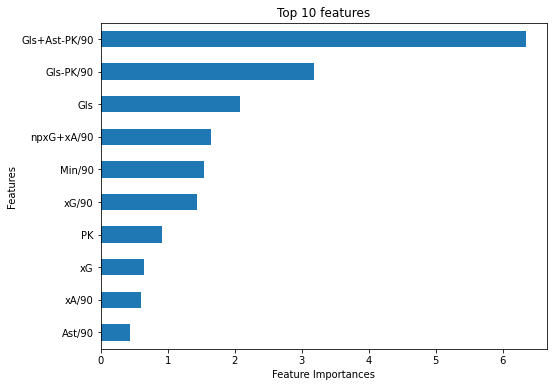

In [407]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))

plt.title('Top 10 features')
plt.xlabel('Feature Importances')
plt.ylabel('Features')
# Extract the top 10 features
feat_importance = pd.Series(lr_model_2.coef_, index = X_orig_train.columns)
feat_importance.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

I will now try to look at the ten best predictors using f_regression.

In [408]:
# Import required package
from sklearn.feature_selection import SelectKBest, f_regression

# Finding the best predictors
k_values = range(1, 34)

for my_k in k_values:
    # fit selector and transform
    my_KBest_2 = SelectKBest(f_regression, k=my_k).fit(X_orig_train_scaled, y_orig_log_train)
    X_orig_transformed = my_KBest_2.transform(X_orig_train_scaled)
    
    # fit the model and score
    lr_model_best_pred = LinearRegression()
    lr_model_best_pred.fit(X_orig_transformed, y_orig_log_train)
    r2_score = lr_model_best_pred.score(X_orig_transformed, y_orig_log_train)
    
    print(f"{my_k} features, Train score: {r2_score}")

1 features, Train score: 0.11727755237975557
2 features, Train score: 0.2165350478270186
3 features, Train score: 0.2833909808073989
4 features, Train score: 0.29169149920631454
5 features, Train score: 0.291898485805951
6 features, Train score: 0.29295559740621646
7 features, Train score: 0.29297338981496757
8 features, Train score: 0.2937452676034221
9 features, Train score: 0.2938307705511861
10 features, Train score: 0.2942775334827513
11 features, Train score: 0.2946488176243577
12 features, Train score: 0.32810078338430526
13 features, Train score: 0.32829756414358624
14 features, Train score: 0.3283027818691715
15 features, Train score: 0.3289100802316589
16 features, Train score: 0.3289105207184736
17 features, Train score: 0.3303389056124205
18 features, Train score: 0.33046851662925303
19 features, Train score: 0.33060062188145334
20 features, Train score: 0.33076076786042585
21 features, Train score: 0.3325193401445058
22 features, Train score: 0.33258698084327165
23 feature

In [409]:
# Average score over the 5 Folds
print(f"Average Score: {round(np.mean(r2_score),2)*100}")

Average Score: 34.0


In [410]:
# Finding the 10 best predictors
ten_best = SelectKBest(f_regression, k = 10)

#transform
X_train_ten = ten_best.fit_transform(X_orig_train_scaled, y_orig_log_train)
X_test_ten = ten_best.transform(X_orig_test_scaled)

# Instantiate
lr_ten_best = LinearRegression()

# Fit
lr_ten_best.fit(X_train_ten, y_orig_log_train)

# Score
lr_ten_best_train_score = lr_ten_best.score(X_train_ten, y_orig_log_train) * 100
lr_ten_best_test_score = lr_ten_best.score(X_test_ten, y_orig_log_test) * 100

print(f'Train score: {round(lr_ten_best_train_score, 2)}%')
print(f'Test score: {round(lr_ten_best_test_score, 2)}%')

Train score: 29.43%
Test score: 28.18%


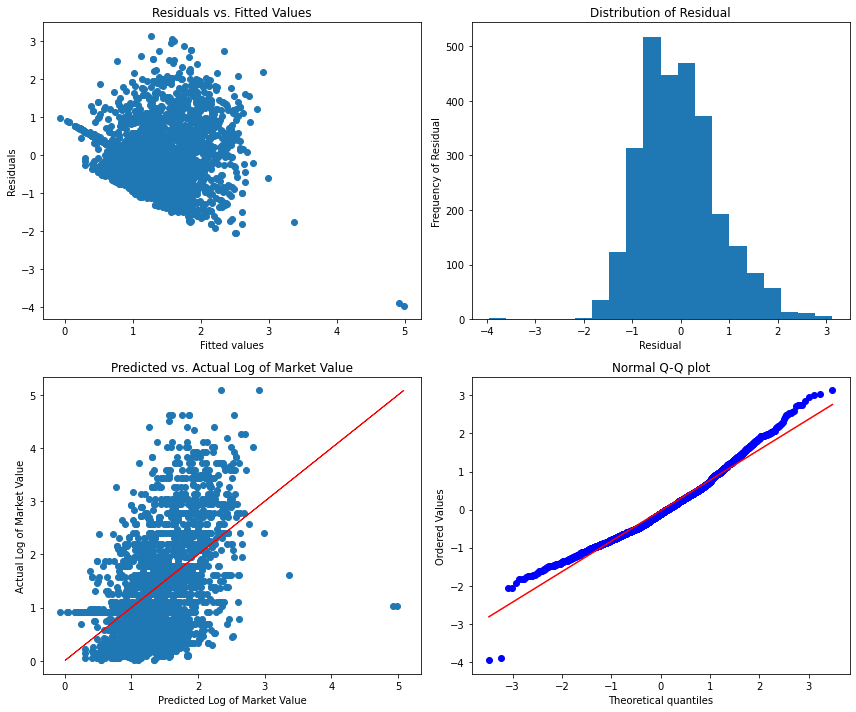

In [469]:
# Find the residuals 
lr_ten_best_pred = lr_ten_best.predict(X_test_ten)
lr_ten_best_resid = y_orig_log_test - lr_ten_best_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lr_ten_best_pred, lr_ten_best_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lr_ten_best_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lr_ten_best_pred, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lr_ten_best_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

In [413]:
# Print the MAE
mean_lr_ten_best_mae = -np.mean(cross_val_score(lr_ten_best, X_train_ten, y_orig_log_train, cv=5, scoring='neg_mean_absolute_error'))
mean_lr_ten_best_mae

0.6392716347415972

Although the R^2 is lower than before but this is not a bad model in terms of error rate and predicting the Market Values. I will now run other models like Lasso and Ridge on the data.

**Hyperparameter tuning using gridsearch to find the best Lasso model**

I will now try to optimize the hyperparameters using a gridsearch to find the best Lasso model through cross validation. I will 2-fold for the gridsearch.

In [414]:
# Hyperparameter tuning for Lasso using gridsearch
# import package 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create pipeline
estimators = [('model', Lasso(random_state=21, max_iter=1000000))]
pipeline = Pipeline(estimators)

# Create list of parameters
params = {'model__alpha': [10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]}
grid_search = GridSearchCV(pipeline, param_grid=params, cv=2)

# Fit
X_fitted_search = grid_search.fit(X_orig_train_scaled, y_orig_log_train)

In [415]:
# Find the best model
grid_best_lasso_model = X_fitted_search.best_estimator_
grid_best_lasso_model

Pipeline(steps=[('model',
                 Lasso(alpha=0.01, max_iter=1000000, random_state=21))])

In [416]:
# Print R^2
print(f"Lasso Train R^2: {round(grid_best_lasso_model.score(X_orig_train_scaled, y_orig_log_train),2)}")
print(f"Lasso Test R^2: {round(grid_best_lasso_model.score(X_orig_test_scaled, y_orig_log_test),2)}")
print(f"Baseline R^2: {baseline_r2}")

Lasso Train R^2: 0.33
Lasso Test R^2: 0.32
Baseline R^2: 0.2


The score is close to what I had for the Linear Regression model but this is still a better model than my baseline one. There seems to be some overfitting in the data. Let me look at the residuals and the predictions.

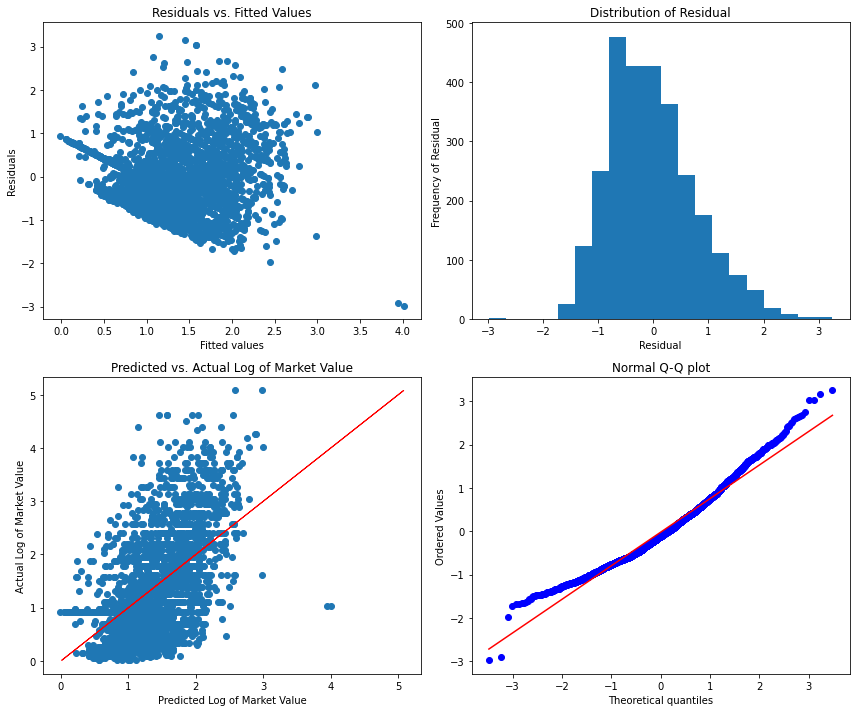

In [470]:
# Find the residuals and predictions
grid_best_lasso_model_pred = grid_best_lasso_model.predict(X_orig_test_scaled)
grid_best_lasso_model_resid = y_orig_log_test - grid_best_lasso_model_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(grid_best_lasso_model_pred, grid_best_lasso_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(grid_best_lasso_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(grid_best_lasso_model_pred, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(grid_best_lasso_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals and the predictions look much better than the previous model. It is much more normal than before. Let me find the MAE and RMSE.

In [419]:
# Print the MAE
mean_grid_best_lasso_model_mae = -np.mean(cross_val_score(grid_best_lasso_model, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_grid_best_lasso_model_mae

0.6226955949899077

In [420]:
# Calculate the cross_val_score
grid_best_lasso_model_cv_train = cross_val_score(grid_best_lasso_model, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
grid_best_lasso_model_cv_test = cross_val_score(grid_best_lasso_model, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
grid_best_lasso_model_cv_train_mean = round(-(grid_best_lasso_model_cv_train.mean()),2)
# Find the test Results
grid_best_lasso_model_cv_test_mean = round(-(lr_model_2_cv_test.mean()),2)

print(f'RMSE on train: {grid_best_lasso_model_cv_train_mean}')
print(f'RMSE on test: {grid_best_lasso_model_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.8


Both the RMSE and the MAE are slightly lower than the Linear Regression model. This means that the Lasso model is better than the Linear Regression model. 

**Hyperparameter tuning using gridsearch to find the best Ridge model**

I will now try to optimize the hyperparameters using a gridsearch to find the best Ridge model through cross validation. I will be using 2-fold for the gridsearch.

In [424]:
# Hyperparameter tuning for Ridge using gridsearch
# Create pipeline
estimators = [('model', Ridge(random_state=21, max_iter=1000000))]
pipeline = Pipeline(estimators)

# Create list of parameters
params = {'model__alpha': [10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]}
grid_search = GridSearchCV(pipeline, param_grid=params, cv=2)

# Fit
X_fitted_search_rg = grid_search.fit(X_orig_train_scaled, y_orig_log_train)

In [425]:
# Find the best model
grid_best_ridge_model = X_fitted_search_rg.best_estimator_
grid_best_ridge_model

Pipeline(steps=[('model', Ridge(alpha=100, max_iter=1000000, random_state=21))])

In [426]:
# Score model
print(f"Ridge Train R^2: {round(grid_best_ridge_model.score(X_orig_train_scaled, y_orig_log_train), 2)}")
print(f"Ridge Test R^2: {round(grid_best_ridge_model.score(X_orig_test_scaled, y_orig_log_test), 2)}")

Ridge Train R^2: 0.33
Ridge Test R^2: 0.33


The R^2 is again similar to the Linear Regression and Lasso models but there are no overfitting in the data. I will take a look at the residuals and the predictions.

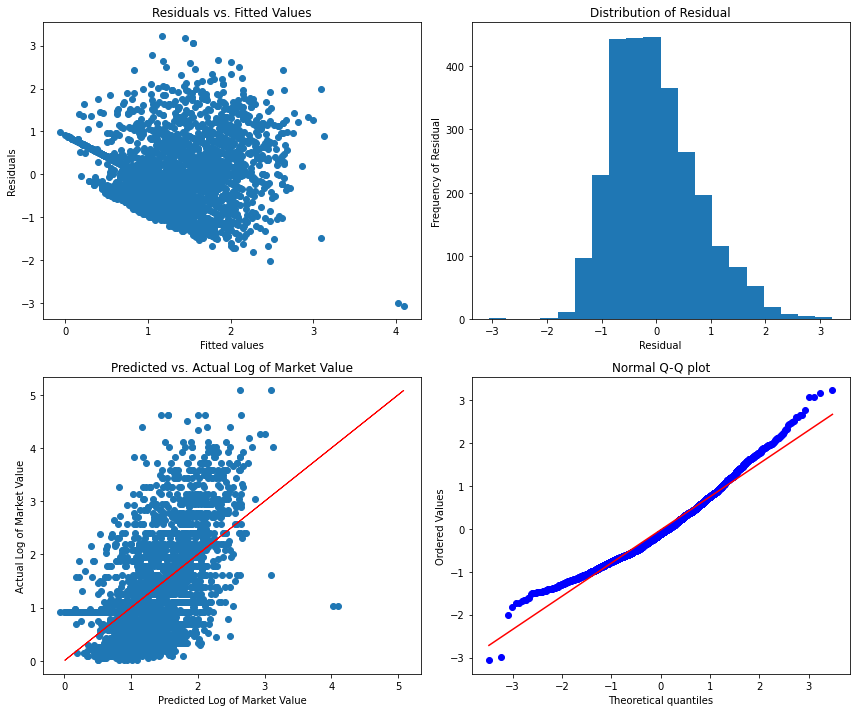

In [471]:
# Find the residuals and predictions
grid_best_ridge_model_pred = grid_best_ridge_model.predict(X_orig_test_scaled)
grid_best_ridge_model_resid = y_orig_log_test - grid_best_ridge_model_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(grid_best_ridge_model_pred, grid_best_ridge_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(grid_best_ridge_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(grid_best_ridge_model_pred, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(grid_best_ridge_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals look more normally distributed than before and the predictions are also better. It's still underpredicting the values though. The Q-Q plot is also better than before. I will calculate the MAE and RMSE.

In [428]:
# Print the MAE
mean_grid_best_ridge_model_mae = -np.mean(cross_val_score(grid_best_ridge_model, X_orig_train, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_grid_best_ridge_model_mae

0.6228328243493058

In [429]:
# Calculate the RMSE
grid_best_ridge_model_cv_train = cross_val_score(grid_best_ridge_model, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
grid_best_ridge_model_cv_test = cross_val_score(grid_best_ridge_model, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
grid_best_ridge_model_cv_train_mean = round(-(grid_best_ridge_model_cv_train.mean()),2)
# Find the test Results
grid_best_ridge_model_cv_test_mean = round(-(grid_best_ridge_model_cv_test.mean()),2)

print(f'RMSE on train: {grid_best_ridge_model_cv_train_mean}')
print(f'RMSE on test: {grid_best_ridge_model_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.79


The absolute errors went down slightly so this means this is a better model than the Lasso and the Linear Regression. I will now run Lasso and Ridge on the unscaled data for comparison.

In [430]:
# Run Lasso model on the unscaled data
lasso_model_unscaled_2 = Lasso(alpha=0.01, max_iter=1000000, random_state=21).fit(X_orig_train, y_orig_log_train)
# Score model
print(f'Lasso R^2 on train set: {round(lasso_model_unscaled_2.score(X_orig_train, y_orig_log_train),2)}')
print(f'Lasso R^2 on test set: {round(lasso_model_unscaled_2.score(X_orig_test, y_orig_log_test),2)}')

Lasso R^2 on train set: 0.32
Lasso R^2 on test set: 0.32


In [431]:
# Run Ridge on unscaled data
ridge_model_unscaled_2 = Ridge(alpha=100, max_iter=1000000, random_state=21).fit(X_orig_train, y_orig_log_train)
# Score model
print(f'Ridge R^2 on train set: {round(ridge_model_unscaled_2.score(X_orig_train, y_orig_log_train),2)}')
print(f'Ridge R^2 on test set: {round(ridge_model_unscaled_2.score(X_orig_test, y_orig_log_test),2)}')

Ridge R^2 on train set: 0.33
Ridge R^2 on test set: 0.33


Both the R^2 for the unscaled data are quite similar to each other with the Ridge model having a higher R^2. Now I will again run the models on the scaled data.

In [432]:
# Run Lasso model on scaled data
lasso_model_2 = Lasso(alpha=0.01, max_iter=1000000, random_state=21).fit(X_orig_train_scaled, y_orig_log_train)
# Score model
print(f'Lasso R^2 on train set: {round(lasso_model_2.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'Lasso R^2 on test set: {round(lasso_model_2.score(X_orig_test_scaled, y_orig_log_test),2)}')

Lasso R^2 on train set: 0.33
Lasso R^2 on test set: 0.32


The Lasso train R^2 went up by 1 but the test R^2 remained the same. There is a little overfitting present.

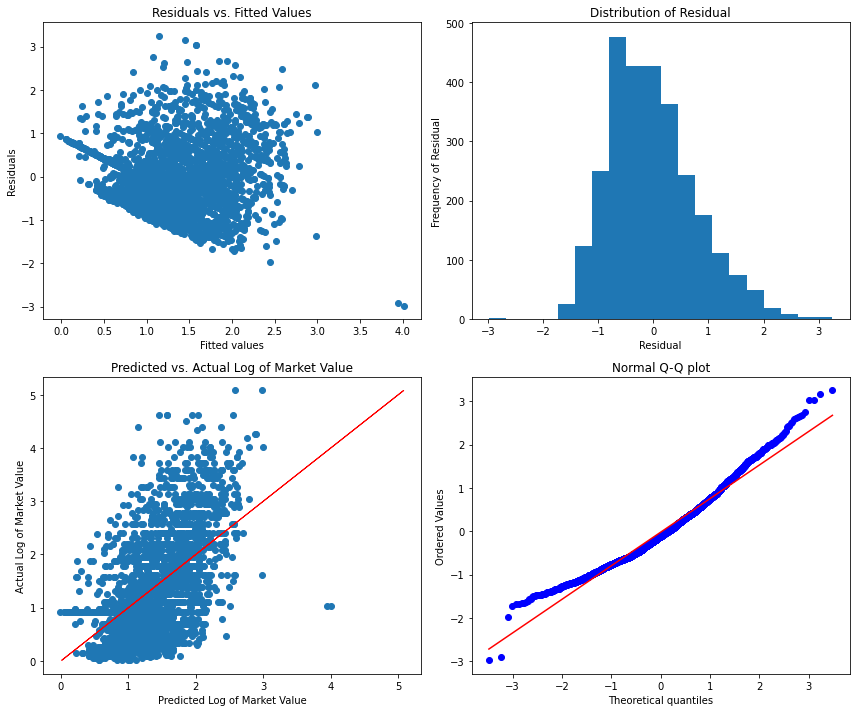

In [472]:
# Find the residuals and predictions
lasso_model_2_pred = lasso_model_2.predict(X_orig_test_scaled)
lasso_model_2_model_resid = y_orig_log_test - lasso_model_2_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lasso_model_2_pred, lasso_model_2_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lasso_model_2_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lasso_model_2_pred, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lasso_model_2_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals look the same like before. I will take a look at the coefficients. I will filter only the non-zero coefficients to see which features are the best predictors.

In [435]:
# Create a coefficients table for lasso_model_2
lasso_2_coef_df = pd.DataFrame({"Features": X_orig_train.columns, "Lasso Coefficients": lasso_model_2.coef_, 
                                "Effect": np.expm1(lasso_model_2.coef_)})

# Find the coefficients not equal to 0
lasso_2_coef_df = lasso_2_coef_df[(lasso_2_coef_df['Lasso Coefficients'] != 0)]
# Display coefficients
lasso_2_coef_df.sort_values('Lasso Coefficients', ascending = False)

Features  Lasso Coefficients    Effect
0        season            0.269596  0.309435
27  buying_team            0.247385  0.280673
2            MP            0.125961  0.134238
18           xG            0.078052  0.081179
4           Min            0.044851  0.045872
32  Nationality            0.022420  0.022673
6           Gls            0.019545  0.019737
23        xA/90            0.012186  0.012260
15   Gls+Ast/90            0.010054  0.010104
31   Midfielder            0.007349  0.007377
9            PK            0.001707  0.001708
5        Min/90            0.000384  0.000384
12         CrdR           -0.004363 -0.004353
29     Defender           -0.006737 -0.006714
11         CrdY           -0.016898 -0.016756
1    player_age           -0.278922 -0.243401

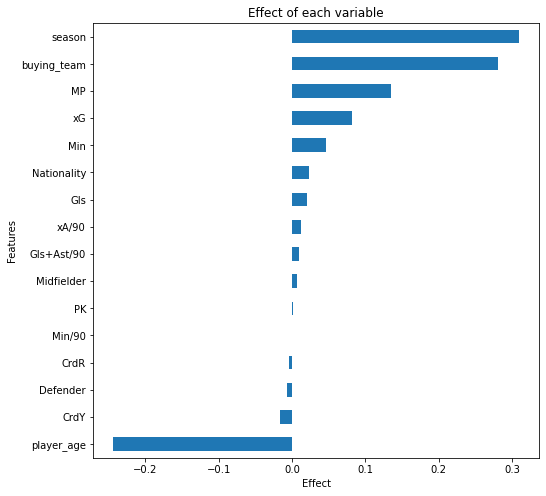

In [436]:
# visualize the effect of each variable
plt.figure(figsize=(8,8))
lasso_2_coef_df.groupby(['Features'])["Effect"].sum().sort_values(ascending=True).plot(kind="barh")
#plt.axhline(y=1, c="gray", linestyle="--")
plt.title("Effect of each variable")
plt.xlabel('Effect')
plt.ylabel('Features')
plt.show()

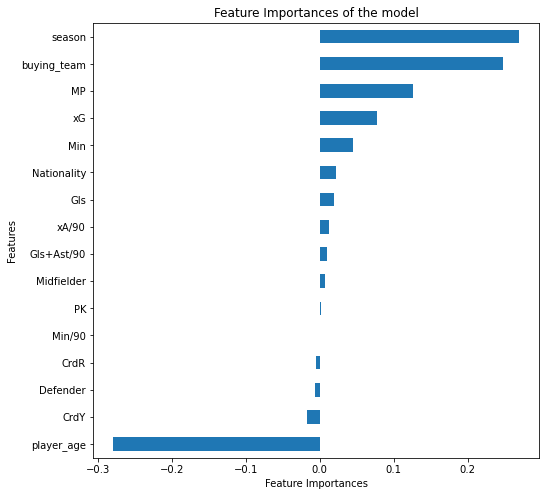

In [437]:
# visualizing the model coefficients for each features
plt.figure(figsize=(8,8))

lasso_2_coef_df.groupby(['Features'])['Lasso Coefficients'].sum().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances of the model')
plt.show()

Again, year, teams, matches played by the player, expected goals have the most effect on the Market Value while age, red cards and yellow cards received have a negative effect on the values.

In [438]:
# Calculate the RMSE
lasso_model_2_cv_train = cross_val_score(lasso_model_2, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
lasso_model_2_cv_test = cross_val_score(lasso_model_2, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
lasso_model_2_cv_train_mean = round(-(lasso_model_2_cv_train.mean()),2)
# Find the test Results
lasso_model_2_cv_test_mean = round(-(lasso_model_2_cv_test.mean()),2)

print(f'RMSE on train: {lasso_model_2_cv_train_mean}')
print(f'RMSE on test: {lasso_model_2_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.78


In [439]:
# Print the MAE
mean_lasso_model_2_mae = -np.mean(cross_val_score(lasso_model_2, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_lasso_model_2_mae

0.6226955949899077

The mean absolute error and RMSE are slightly less than the previous model. I will now run the best ridge model with the hyperparameter.

In [440]:
# Run Ridge on scaled data
ridge_model_2 = Ridge(alpha=100, max_iter=1000000, random_state=21).fit(X_orig_train_scaled, y_orig_log_train)
# Score model
print(f'Ridge R^2 on train set: {round(ridge_model_2.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'Ridge R^2 on test set: {round(ridge_model_2.score(X_orig_test_scaled, y_orig_log_test),2)}')

Ridge R^2 on train set: 0.33
Ridge R^2 on test set: 0.33


Although the R^2 is still low and similar to the previous Lasso model, this model does not have any overfitting present. 

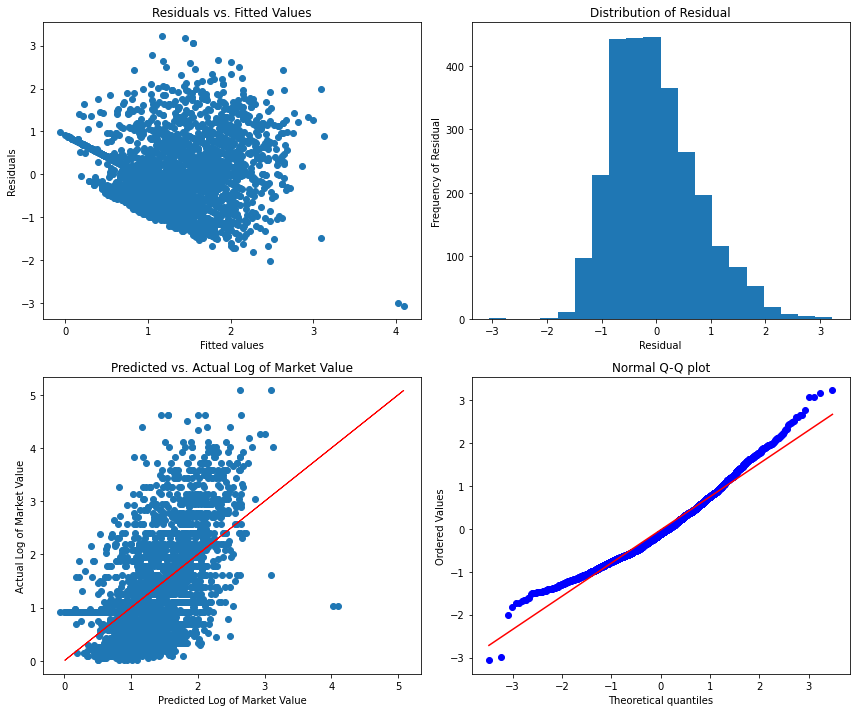

In [464]:
# the residuals 
ridge_model_2_pred = ridge_model_2.predict(X_orig_test_scaled)
ridge_model_2_model_resid = y_orig_log_test - ridge_model_2_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(ridge_model_2_pred, ridge_model_2_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(ridge_model_2_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(ridge_model_2_pred, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(ridge_model_2_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

All the above charts point to the fact that this is the best model I have so far. Let me check the features.

In [442]:
# Create a coefficients table for ridge_model_2
ridge_2_coef_df = pd.DataFrame({"Features": X_orig_train.columns, "Ridge Coefficients": ridge_model_2.coef_, 
                               "Effect": np.expm1(ridge_model_2.coef_)})

# Find the coefficients not equal to 0
ridge_2_coef_df = ridge_2_coef_df[(ridge_2_coef_df['Ridge Coefficients'] != 0)]
# Display coefficients
ridge_2_coef_df.sort_values('Ridge Coefficients', ascending = False)

Features  Ridge Coefficients    Effect
0          season            0.269618  0.309464
27    buying_team            0.248074  0.281554
2              MP            0.089831  0.093989
5          Min/90            0.072126  0.074790
4             Min            0.071654  0.074283
8          NP_Gls            0.067374  0.069695
6             Gls            0.065079  0.067243
23          xA/90            0.063238  0.065280
18             xG            0.057052  0.058711
19           npxG            0.055643  0.057220
14         Ast/90            0.039549  0.040341
17  Gls+Ast-PK/90            0.033514  0.034082
32    Nationality            0.032615  0.033152
15     Gls+Ast/90            0.030062  0.030518
31     Midfielder            0.016364  0.016499
9              PK            0.014203  0.014305
24       xG+xA/90            0.004722  0.004734
26     npxG+xA/90            0.004322  0.004331
10         PK_Att           -0.000204 -0.000204
28       Attacker           -0.001117 -0.001117
30     Goalkeeper           -0.005276 -0.005262
29       Defender           -0.012332 -0.012256
12           CrdR           -0.013488 -0.013397
21        npxG+xA           -0.014047 -0.013949
22          xG/90           -0.014421 -0.014317
25        npxG/90           -0.022449 -0.022199
11           CrdY           -0.026120 -0.025782
3          Starts           -0.057875 -0.056232
20             xA           -0.059503 -0.057768
16      Gls-PK/90           -0.066924 -0.064733
7             Ast           -0.067575 -0.065342
13         Gls/90           -0.068203 -0.065929
1      player_age           -0.284937 -0.247939

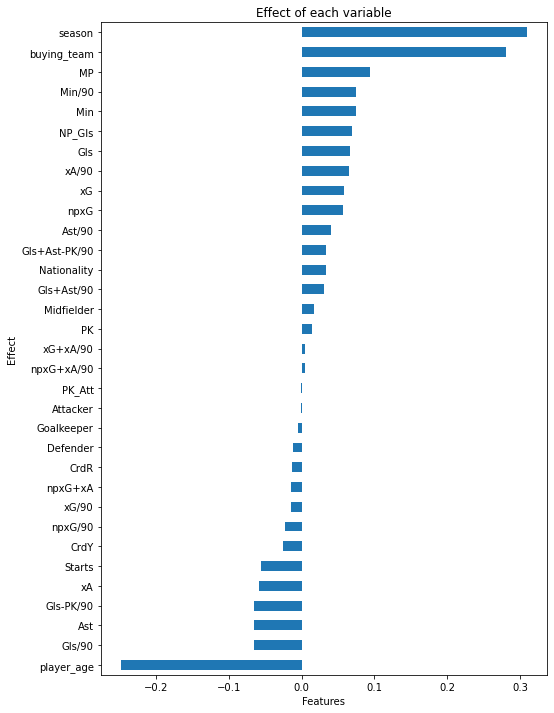

In [443]:
# visualize the effect of each variable
plt.figure(figsize=(8,12))
ridge_2_coef_df.groupby(['Features'])["Effect"].sum().sort_values(ascending=True).plot(kind="barh")
#plt.axhline(y=1, c="gray", linestyle="--")
plt.title("Effect of each variable")
plt.xlabel('Features')
plt.ylabel('Effect')
plt.show()

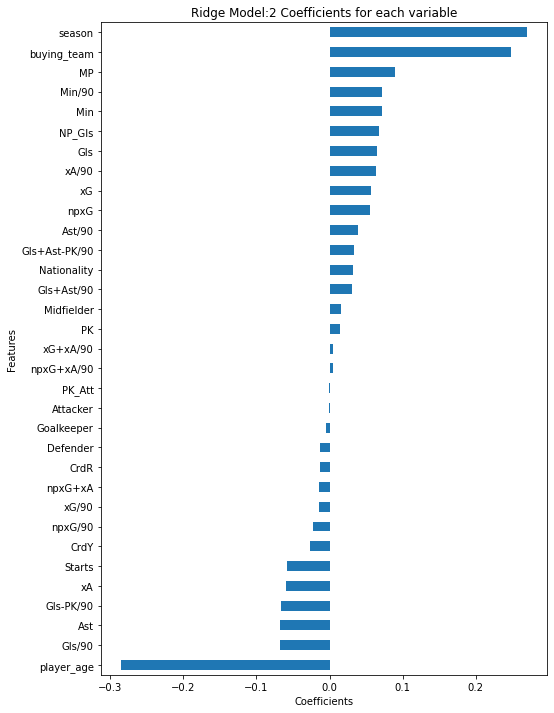

In [444]:
# visualizing the model coefficients for each features
plt.figure(figsize=(8,12))
ridge_2_coef_df.groupby(['Features'])['Ridge Coefficients'].sum().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Ridge Model:2 Coefficients for each variable')
plt.show()

The predictors are similar to what I got in the previous model. Let me check the mean absolute errors and RMSE.

In [445]:
# Print the MAE
mean_ridge_model_2_mae = -np.mean(cross_val_score(ridge_model_2, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_ridge_model_2_mae

0.6225474764706634

In [446]:
# Calculate the RMSE
ridge_model_2_cv_train = cross_val_score(ridge_model_2, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
ridge_model_2_cv_test = cross_val_score(ridge_model_2, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
ridge_model_2_cv_train_mean = round(-(ridge_model_2_cv_train.mean()),2)
# Find the test Results
ridge_model_2_cv_test_mean = round(-(ridge_model_2_cv_test.mean()),2)

print(f'RMSE on train: {ridge_model_2_cv_train_mean}')
print(f'RMSE on test: {ridge_model_2_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.79


The MAE and RMSE are the same as the one for Lasso model.

----

I will extract the top 10 features from this model and will rerun all the models to compare the R^2 and MAE and RMSE.

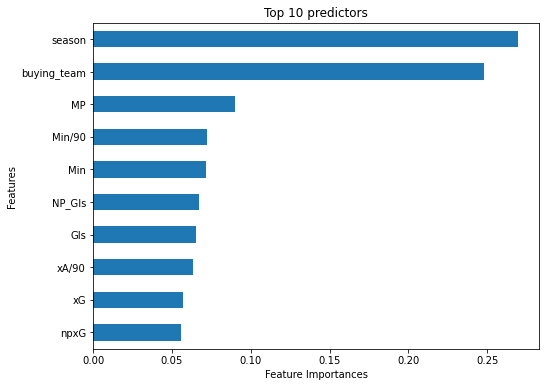

In [447]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Top 10 predictors')
plt.xlabel('Feature Importances')
plt.ylabel('Features')

# Extract the top 10 features
feat_importances = pd.Series(ridge_model_2.coef_, index = X_orig_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

I will again instantiate the new independent and dependent variables with the top 10 features.

In [448]:
# Create a new list with top features
top_features = list(feat_importance.nlargest(10).keys())

# Instantiate new dependent and independent variables
X_3 = final_df.drop(columns=["market_val_amnt_mil", "log_MV"], axis=1)[top_features]
y_3 = final_df['log_MV']

In [449]:
# splitting our data into train and test sets
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.33, random_state=42)

In [450]:
# Check the shape of each set
print(X_3_train.shape)
print(X_3_test.shape)
print(y_3_train.shape)
print(y_3_test.shape)

(5653, 10)
(2785, 10)
(5653,)
(2785,)


I will scale the data and then fit into the models.

In [451]:
# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_3_train)
X_3_train_scaled = scaler.transform(X_3_train)
X_3_test_scaled = scaler.transform(X_3_test)

In [452]:
# Run Linear Regression on the scaled data
# 1. Instantiate
lr_model_4 = LinearRegression()
# 2. Fit
lr_model_4.fit(X_3_train_scaled, y_3_train)
# 3. Score model
print(f'Score on train set: {round(lr_model_4.score(X_3_train_scaled, y_3_train),2)}')
print(f'Score on test set: {round(lr_model_4.score(X_3_test_scaled, y_3_test),2)}')

Score on train set: 0.09
Score on test set: 0.08


In [453]:
# Calculate the RMSE
lr_model_4_cv_train = cross_val_score(lr_model_4, X_3_train_scaled, y_3_train, scoring="neg_root_mean_squared_error",cv=5)
lr_model_4_cv_test = cross_val_score(lr_model_4, X_3_test_scaled, y_3_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
lr_model_4_cv_train_mean = round(-(lr_model_4_cv_train.mean()),2)
# Find the test Results
lr_model_4_cv_test_mean = round(-(lr_model_4_cv_test.mean()),2)

print(f'RMSE on train: {lr_model_4_cv_train_mean}')
print(f'RMSE on test: {lr_model_4_cv_test_mean}')

RMSE on train: 0.93
RMSE on test: 0.92


In [454]:
# Print the MAE
mean_lr_model_4_mae = -np.mean(cross_val_score(lr_model_4, X_3_train_scaled, y_3_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_lr_model_4_mae

0.7204070025227239

The Linear Regression R^2 is very low but this is because the number of features is less. Both the RMSE and MAE are high though.

In [455]:
# Run Lasso model on scaled data
lasso_model_3 = Lasso(alpha=0.01, max_iter=1000000, random_state=21).fit(X_3_train_scaled, y_3_train)
# Score model
print(f'Lasso R^2 on train set: {round(lasso_model_3.score(X_3_train_scaled, y_3_train),2)}')
print(f'Lasso R^2 on test set: {round(lasso_model_3.score(X_3_test_scaled, y_3_test),2)}')

Lasso R^2 on train set: 0.09
Lasso R^2 on test set: 0.09


In [456]:
# Calculate the RMSE
lasso_model_3_cv_train = cross_val_score(lasso_model_3, X_3_train_scaled, y_3_train, scoring="neg_root_mean_squared_error",cv=5)
lasso_model_3_cv_test = cross_val_score(lasso_model_3, X_3_test_scaled, y_3_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
lasso_model_3_cv_train_mean = round(-(lasso_model_3_cv_train.mean()),2)
# Find the test Results
lasso_model_3_cv_test_mean = round(-(lasso_model_3_cv_test.mean()),2)

print(f'RMSE on train: {lasso_model_3_cv_train_mean}')
print(f'RMSE on test: {lasso_model_3_cv_test_mean}')

RMSE on train: 0.92
RMSE on test: 0.91


In [457]:
# Print the MAE
mean_lasso_model_3_mae = -np.mean(cross_val_score(lasso_model_3, X_3_train_scaled, y_3_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_lasso_model_3_mae

0.7218217473020505

The Lasso model does not have any overfitting but again the R^2 is quite low. The MAE and RMSE is similar to the previous model.

In [458]:
# Run Ridge on scaled data
ridge_model_3 = Ridge(alpha=100, max_iter=1000000, random_state=21).fit(X_3_train_scaled, y_3_train)
# Score model
print(f'Ridge R^2 on train set: {round(ridge_model_3.score(X_3_train_scaled, y_3_train),2)}')
print(f'Ridge R^2 on test set: {round(ridge_model_3.score(X_3_test_scaled, y_3_test),2)}')

Ridge R^2 on train set: 0.09
Ridge R^2 on test set: 0.09


In [459]:
# Calculate the RMSE
ridge_model_3_cv_train = cross_val_score(ridge_model_3, X_3_train_scaled, y_3_train, scoring="neg_root_mean_squared_error",cv=5)
ridge_model_3_cv_test = cross_val_score(ridge_model_3, X_3_test_scaled, y_3_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
ridge_model_3_cv_train_mean = round(-(ridge_model_3_cv_train.mean()),2)
# Find the test Results
ridge_model_3_cv_test_mean = round(-(ridge_model_3_cv_test.mean()),2)

print(f'RMSE on train: {ridge_model_3_cv_train_mean}')
print(f'RMSE on test: {ridge_model_3_cv_test_mean}')

RMSE on train: 0.92
RMSE on test: 0.91


In [460]:
# Print the MAE
mean_ridge_model_3_mae = -np.mean(cross_val_score(ridge_model_3, X_3_test_scaled, y_3_test, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_ridge_model_3_mae

0.7077362216691874

So far Ridge model has been better compared to the other two models since it has a lower mean absolute error. 

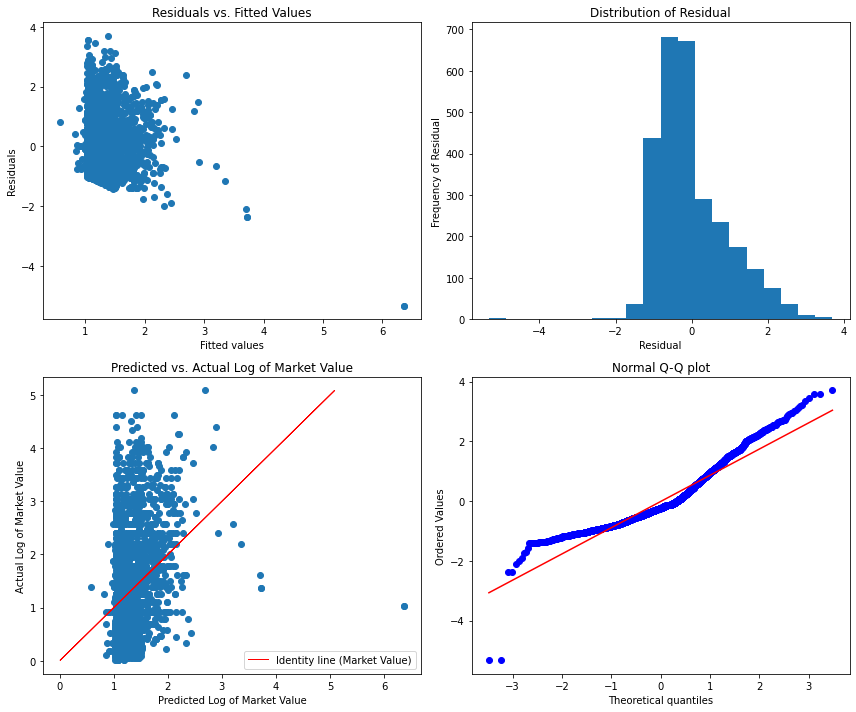

In [462]:
# Fins the residuals and predictions 
ridge_model_3_pred = ridge_model_3.predict(X_3_test_scaled)
ridge_model_3_model_resid = y_3_test - ridge_model_3_pred

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(ridge_model_3_pred, ridge_model_3_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(ridge_model_3_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(ridge_model_3_pred, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1, label='Identity line (Market Value)')
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(ridge_model_3_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The models are not predicting the values well and the residuals does not look that normal. I will now address the matter of overfitting and multicolinearity.

-----

#### Address the issue of overfitting and multicolinearity

In order to address the issue of multicolinearity I will check all the independent variables with respect to the target variable and also calculate the correlation coefficients between the independent variables and the target variable.

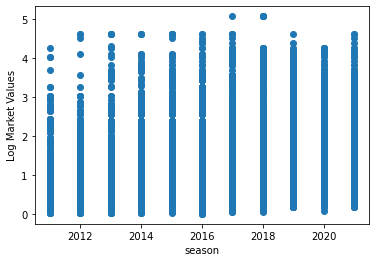

Corrlation coefficient between season and y_orig_log (0.3483016922550499, 3.0687641601956005e-239)



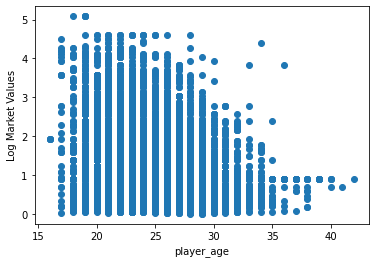

Corrlation coefficient between player_age and y_orig_log (-0.2905381266136907, 8.419400226345876e-164)



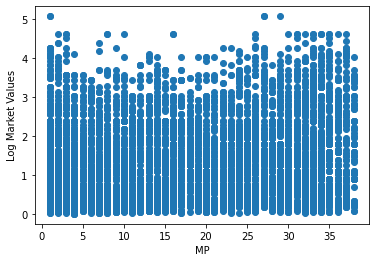

Corrlation coefficient between MP and y_orig_log (0.15950519729645043, 3.350793078316162e-49)



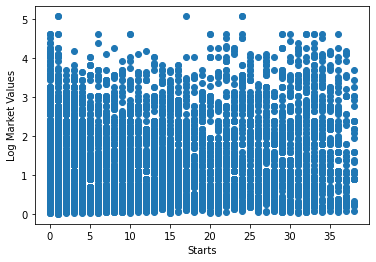

Corrlation coefficient between Starts and y_orig_log (0.13795166484192972, 3.973146773334205e-37)



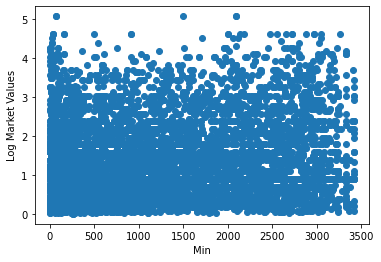

Corrlation coefficient between Min and y_orig_log (0.14351548881083842, 4.523007819966853e-40)



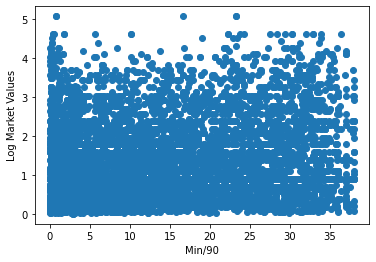

Corrlation coefficient between Min/90 and y_orig_log (0.14354508918709827, 4.359592720013842e-40)



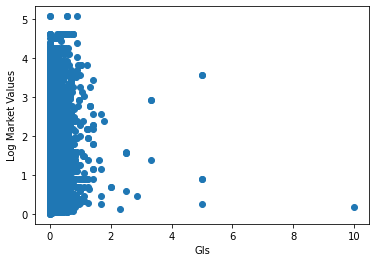

Corrlation coefficient between Gls and y_orig_log (0.11233412737498862, 4.180548001070803e-25)



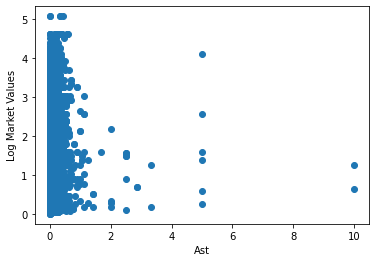

Corrlation coefficient between Ast and y_orig_log (0.05638506249958153, 2.1856989770448625e-07)



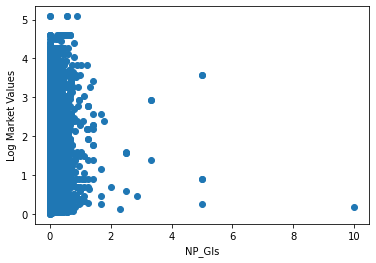

Corrlation coefficient between NP_Gls and y_orig_log (0.10946284809242737, 6.507280609700926e-24)



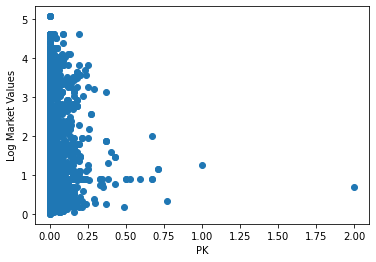

Corrlation coefficient between PK and y_orig_log (0.03623382048361627, 0.0008716230708638746)



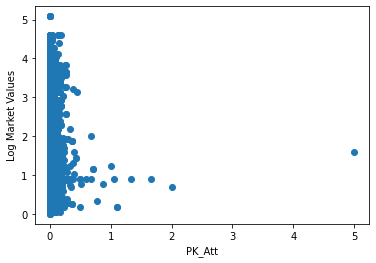

Corrlation coefficient between PK_Att and y_orig_log (0.02497997225282421, 0.021753589646656295)



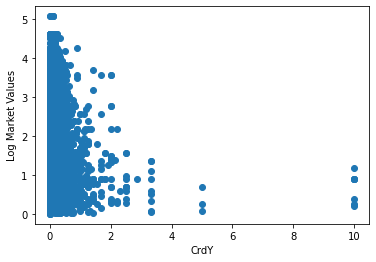

Corrlation coefficient between CrdY and y_orig_log (-0.046472624672973806, 1.9496135520770757e-05)



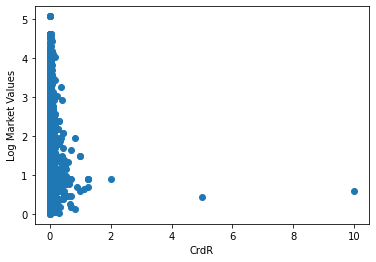

Corrlation coefficient between CrdR and y_orig_log (-0.029854726154332673, 0.0060951552726813815)



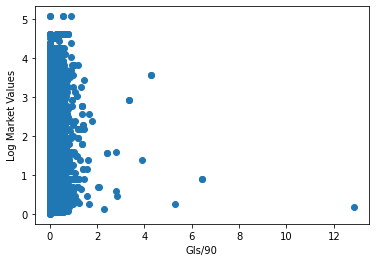

Corrlation coefficient between Gls/90 and y_orig_log (0.10125684474762761, 1.1213632456993356e-20)



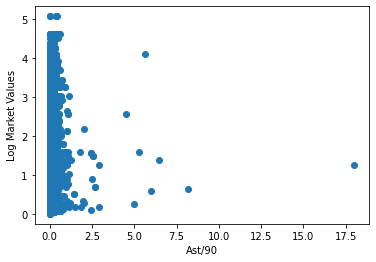

Corrlation coefficient between Ast/90 and y_orig_log (0.04895081138586575, 6.840789806854525e-06)



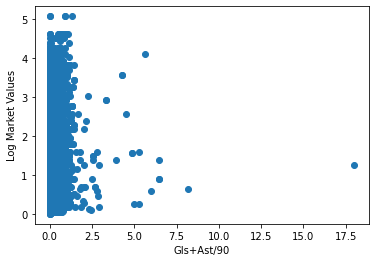

Corrlation coefficient between Gls+Ast/90 and y_orig_log (0.11223904641822019, 4.583621267543748e-25)



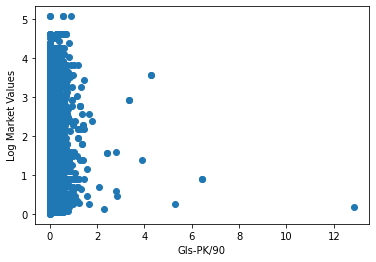

Corrlation coefficient between Gls-PK/90 and y_orig_log (0.09798605258280103, 1.8596900034299043e-19)



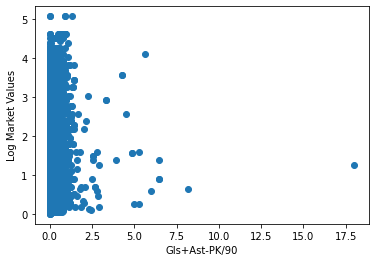

Corrlation coefficient between Gls+Ast-PK/90 and y_orig_log (0.10990996564577223, 4.263794127310874e-24)



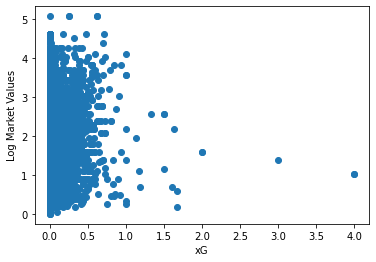

Corrlation coefficient between xG and y_orig_log (0.2176839253287191, 4.690078246976645e-91)



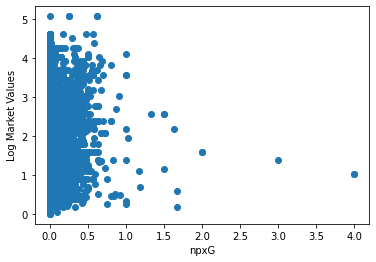

Corrlation coefficient between npxG and y_orig_log (0.21400106523302231, 5.410304550835586e-88)



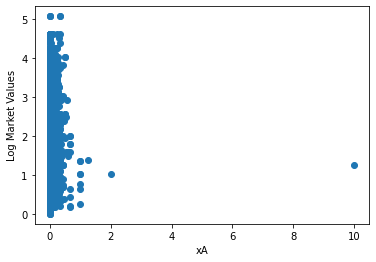

Corrlation coefficient between xA and y_orig_log (0.1261558118511892, 2.791550787953749e-31)



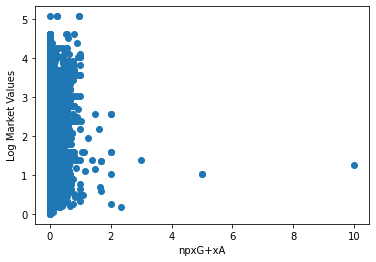

Corrlation coefficient between npxG+xA and y_orig_log (0.21559638606192283, 2.593173557610387e-89)



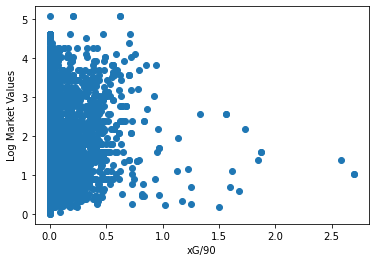

Corrlation coefficient between xG/90 and y_orig_log (0.22433628663983665, 9.88446633273434e-97)



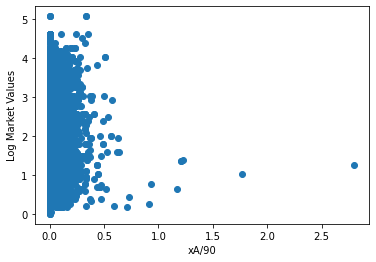

Corrlation coefficient between xA/90 and y_orig_log (0.20899663182035766, 6.35098728141836e-84)



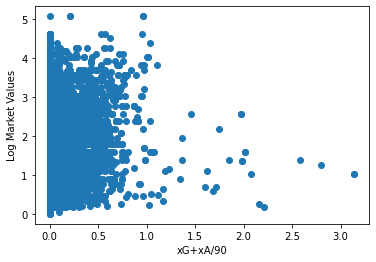

Corrlation coefficient between xG+xA/90 and y_orig_log (0.2545904188153906, 5.964289102447838e-125)



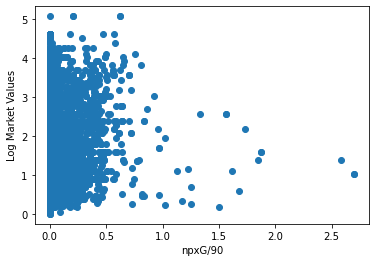

Corrlation coefficient between npxG/90 and y_orig_log (0.22145794148185438, 2.978321397592652e-94)



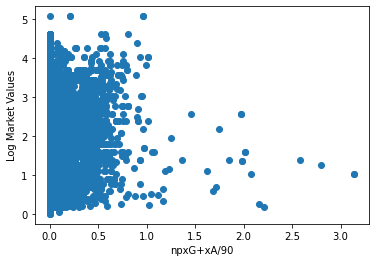

Corrlation coefficient between npxG+xA/90 and y_orig_log (0.25347566801007854, 7.70072120191536e-124)



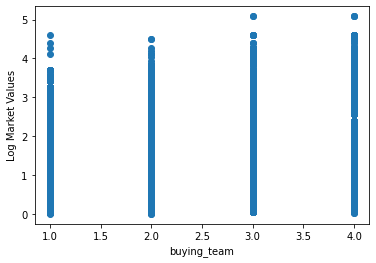

Corrlation coefficient between buying_team and y_orig_log (0.31384224402882466, 3.1140136337224565e-192)



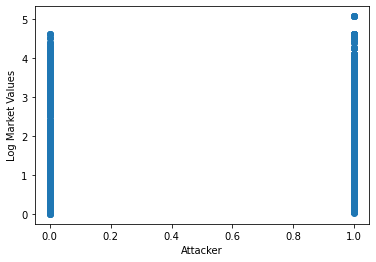

Corrlation coefficient between Attacker and y_orig_log (0.055180562439519215, 3.9381803646796663e-07)



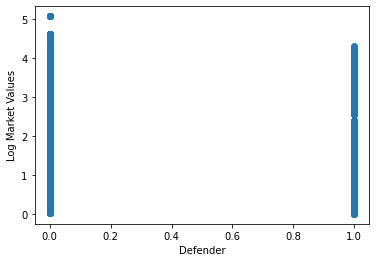

Corrlation coefficient between Defender and y_orig_log (-0.0446242119481151, 4.121651670646369e-05)



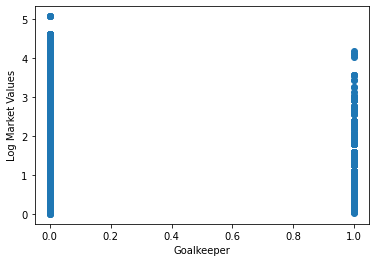

Corrlation coefficient between Goalkeeper and y_orig_log (-0.04904475520027238, 6.568041444151886e-06)



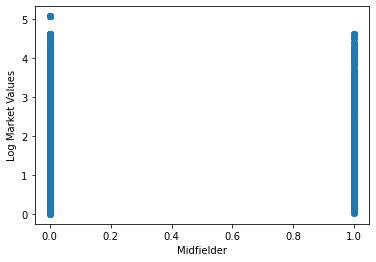

Corrlation coefficient between Midfielder and y_orig_log (0.01259110230101448, 0.2474867748200524)



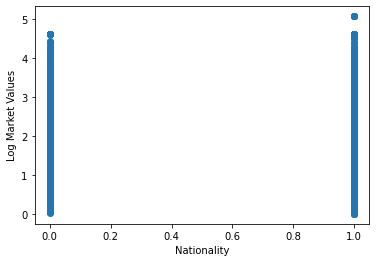

Corrlation coefficient between Nationality and y_orig_log (0.04015626896804031, 0.0002245718185379871)



In [475]:
# import package 
from scipy.stats import pearsonr

# Plot scatter plots between the independent variables and the target variable
for col in X_orig.columns:
    plt.figure()
    plt.scatter(X_orig[col], y_orig_log)
    plt.xlabel(col)
    plt.ylabel('Log Market Values')
    plt.show()
    
    print(f'Corrlation coefficient between {col} and y_orig_log {pearsonr(X_orig[col], y_orig_log)}')
    print('')

I will drop the columns with high multicolinearity and also the columns which are similar to each other.

In [476]:
# Drop some features and instantiate new independent and dependent variables 
X_4 = final_df.drop(columns=["market_val_amnt_mil", "log_MV", "Min/90", "Ast/90", "Gls+Ast/90", "Gls+Ast-PK/90"])
y_log_4 = final_df["log_MV"]

I will again check the independent variables with respect to the target variable and calculate the correlation coefficients between the independent variables and the target variable to check for multicolinearity.

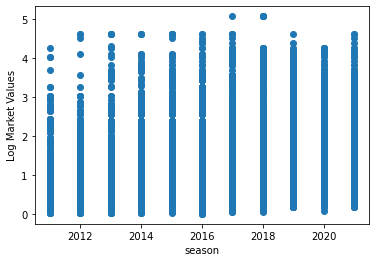

Corrlation coefficient between season and y_orig_log (0.3483016922550499, 3.0687641601956005e-239)



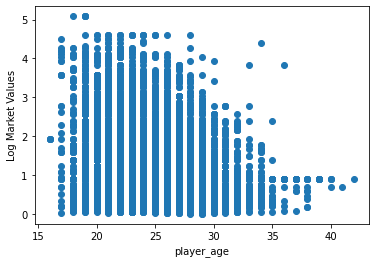

Corrlation coefficient between player_age and y_orig_log (-0.2905381266136907, 8.419400226345876e-164)



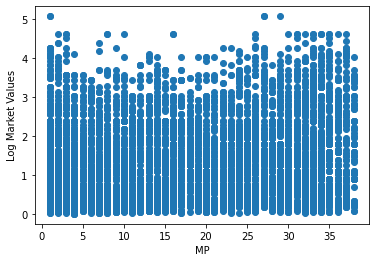

Corrlation coefficient between MP and y_orig_log (0.15950519729645043, 3.350793078316162e-49)



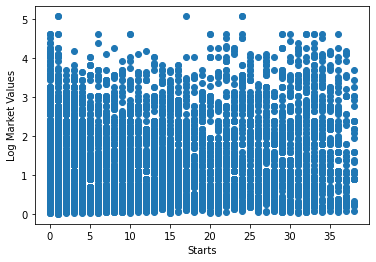

Corrlation coefficient between Starts and y_orig_log (0.13795166484192972, 3.973146773334205e-37)



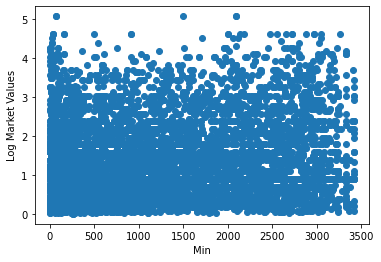

Corrlation coefficient between Min and y_orig_log (0.14351548881083842, 4.523007819966853e-40)



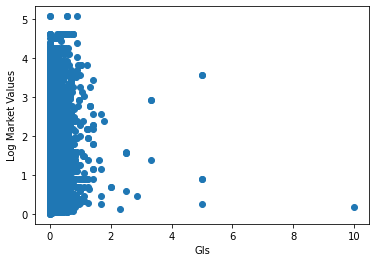

Corrlation coefficient between Gls and y_orig_log (0.11233412737498862, 4.180548001070803e-25)



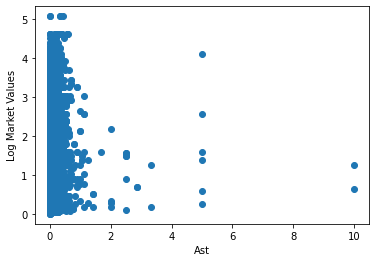

Corrlation coefficient between Ast and y_orig_log (0.05638506249958153, 2.1856989770448625e-07)



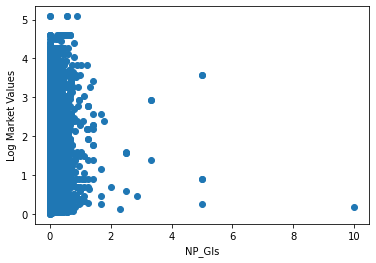

Corrlation coefficient between NP_Gls and y_orig_log (0.10946284809242737, 6.507280609700926e-24)



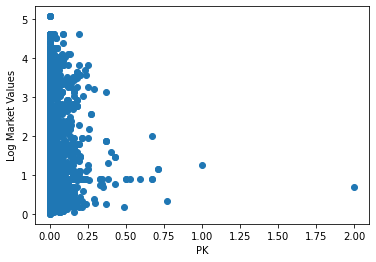

Corrlation coefficient between PK and y_orig_log (0.03623382048361627, 0.0008716230708638746)



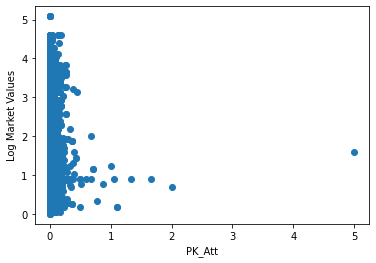

Corrlation coefficient between PK_Att and y_orig_log (0.02497997225282421, 0.021753589646656295)



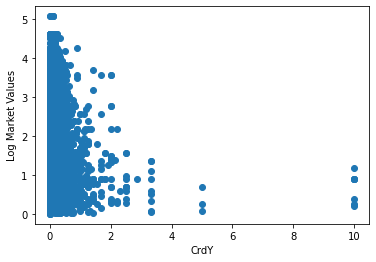

Corrlation coefficient between CrdY and y_orig_log (-0.046472624672973806, 1.9496135520770757e-05)



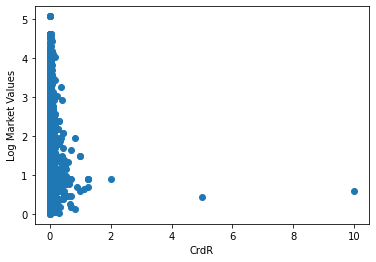

Corrlation coefficient between CrdR and y_orig_log (-0.029854726154332673, 0.0060951552726813815)



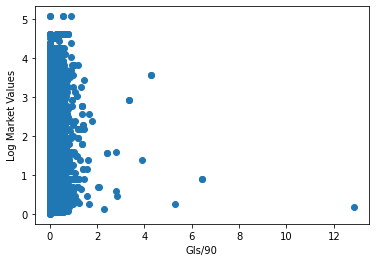

Corrlation coefficient between Gls/90 and y_orig_log (0.10125684474762761, 1.1213632456993356e-20)



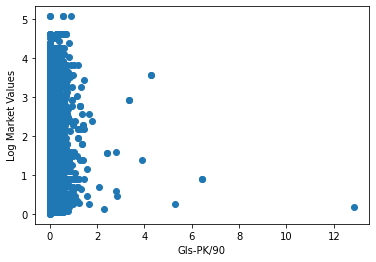

Corrlation coefficient between Gls-PK/90 and y_orig_log (0.09798605258280103, 1.8596900034299043e-19)



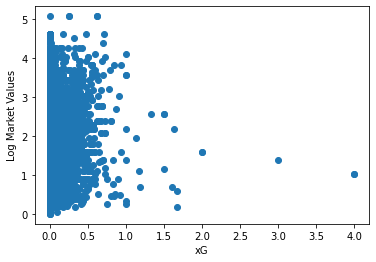

Corrlation coefficient between xG and y_orig_log (0.2176839253287191, 4.690078246976645e-91)



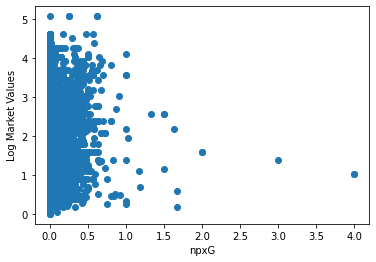

Corrlation coefficient between npxG and y_orig_log (0.21400106523302231, 5.410304550835586e-88)



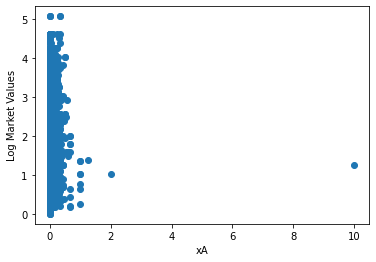

Corrlation coefficient between xA and y_orig_log (0.1261558118511892, 2.791550787953749e-31)



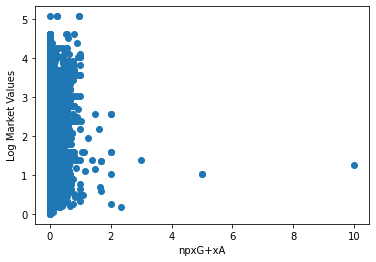

Corrlation coefficient between npxG+xA and y_orig_log (0.21559638606192283, 2.593173557610387e-89)



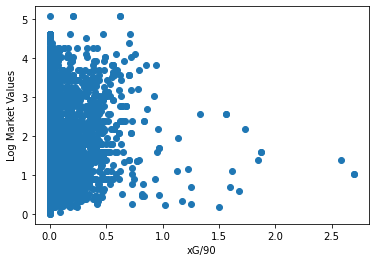

Corrlation coefficient between xG/90 and y_orig_log (0.22433628663983665, 9.88446633273434e-97)



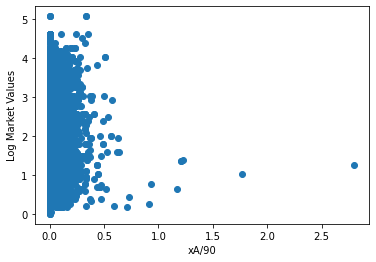

Corrlation coefficient between xA/90 and y_orig_log (0.20899663182035766, 6.35098728141836e-84)



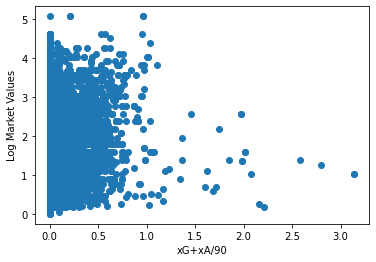

Corrlation coefficient between xG+xA/90 and y_orig_log (0.2545904188153906, 5.964289102447838e-125)



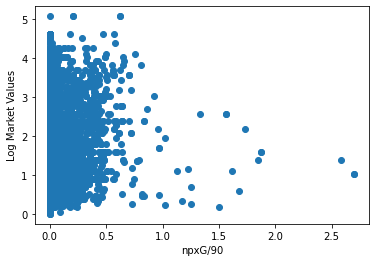

Corrlation coefficient between npxG/90 and y_orig_log (0.22145794148185438, 2.978321397592652e-94)



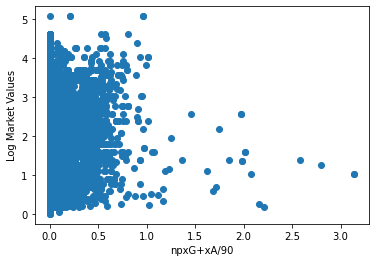

Corrlation coefficient between npxG+xA/90 and y_orig_log (0.25347566801007854, 7.70072120191536e-124)



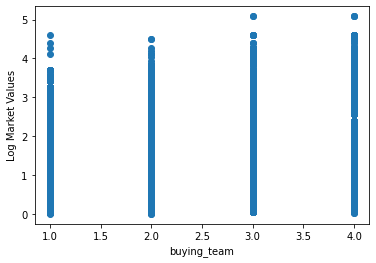

Corrlation coefficient between buying_team and y_orig_log (0.31384224402882466, 3.1140136337224565e-192)



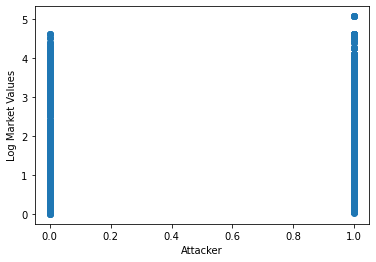

Corrlation coefficient between Attacker and y_orig_log (0.055180562439519215, 3.9381803646796663e-07)



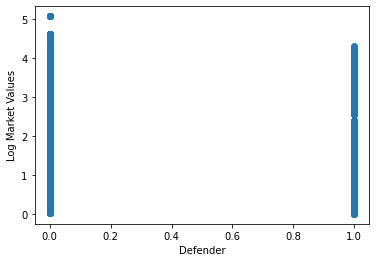

Corrlation coefficient between Defender and y_orig_log (-0.0446242119481151, 4.121651670646369e-05)



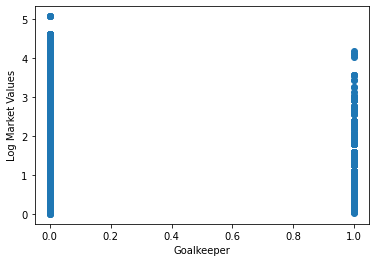

Corrlation coefficient between Goalkeeper and y_orig_log (-0.04904475520027238, 6.568041444151886e-06)



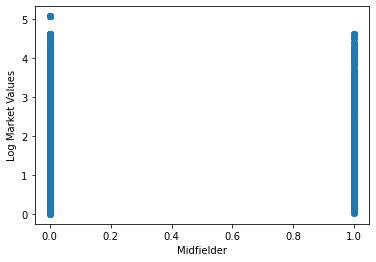

Corrlation coefficient between Midfielder and y_orig_log (0.01259110230101448, 0.2474867748200524)



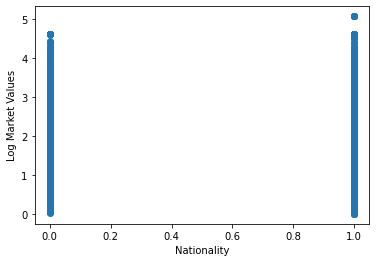

Corrlation coefficient between Nationality and y_orig_log (0.04015626896804031, 0.0002245718185379871)



In [477]:
# Plot scatter plots between the independent variables and the target variable
for col in X_4.columns:
    plt.figure()
    plt.scatter(X_4[col], y_log_4)
    plt.xlabel(col)
    plt.ylabel('Log Market Values')
    plt.show()
    
    print(f'Corrlation coefficient between {col} and y_orig_log {pearsonr(X_4[col], y_log_4)}')
    print('')

I can still see some features with high colinearity, speciafically the `Starts`, `Min/90`, `npxG+xA/90`, etc. I will drop these columns and then again instantiate the independent and dependent variables.

In [478]:
# Drop some features and instantiate new independent and dependent variables 
X_4 = final_df.drop(columns=["market_val_amnt_mil", "log_MV", "Min/90", "Ast/90", "Gls+Ast/90", "Gls+Ast-PK/90",
                            "npxG+xA/90", "xG+xA/90", "Gls/90", "Gls-PK/90", "npxG/90", "xG/90", "Starts"])
y_log_4 = final_df["log_MV"]

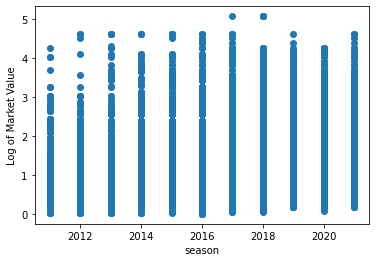

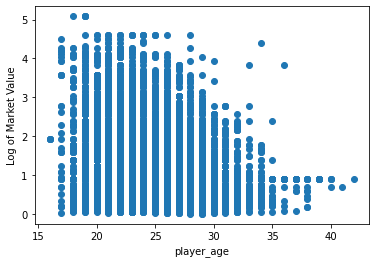

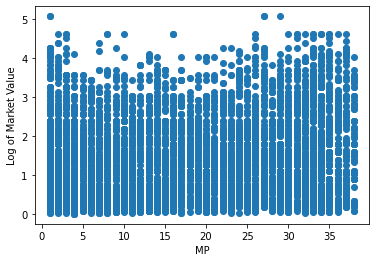

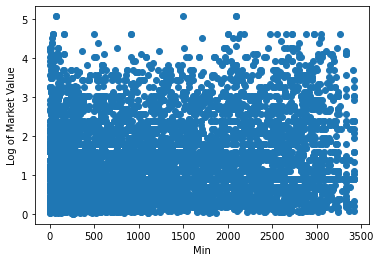

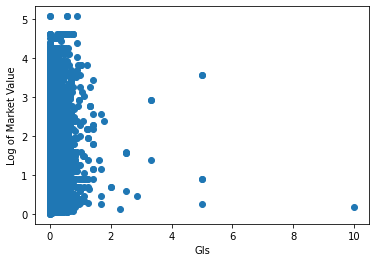

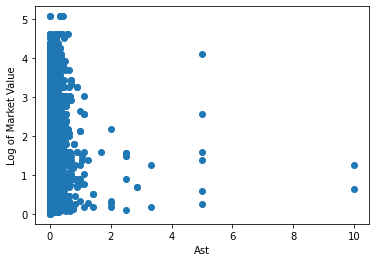

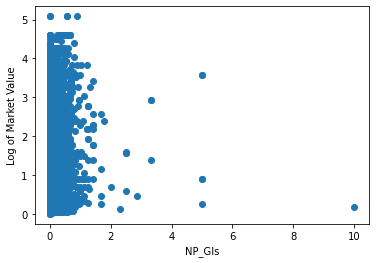

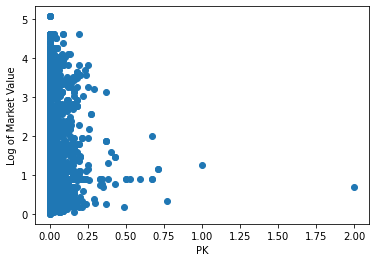

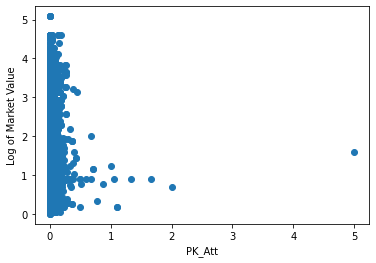

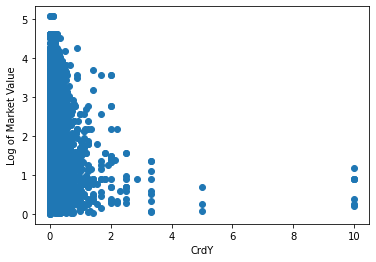

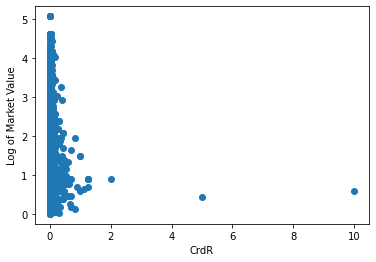

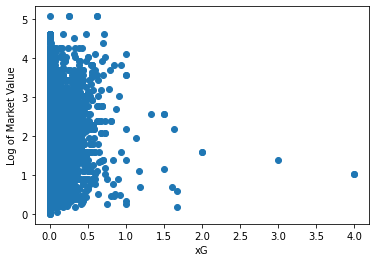

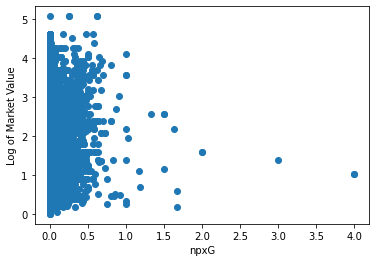

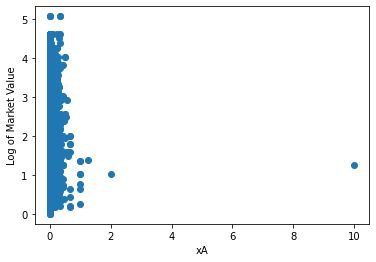

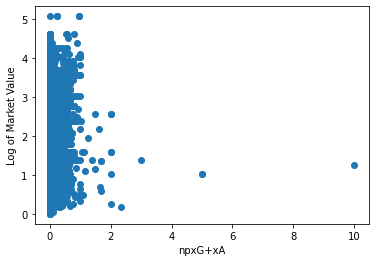

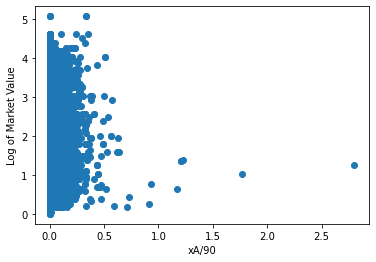

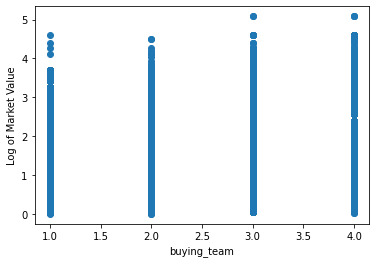

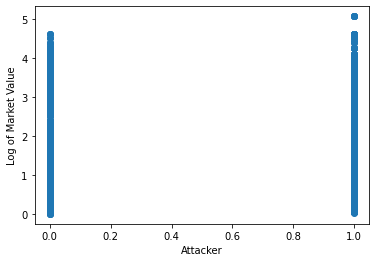

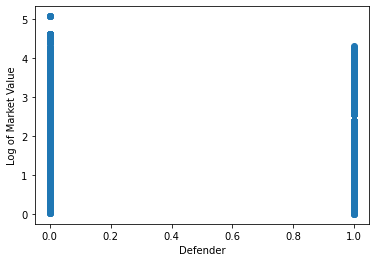

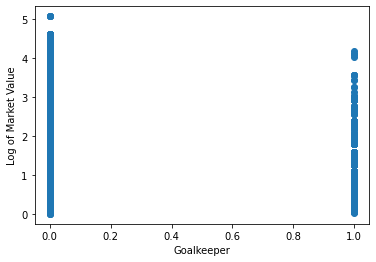

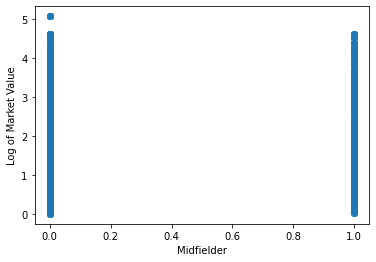

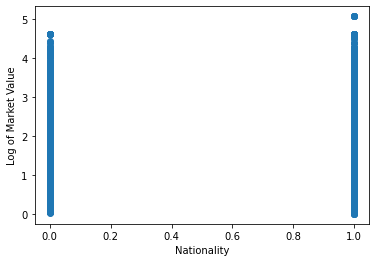

In [479]:
# visualize the independent variables Vs Log of Market Value 

for col in X_4.columns: 
    plt.figure()
    plt.scatter(X_4[col], y_log_4)
    plt.ylabel('Log of Market Value')
    plt.xlabel(col)
    
    plt.show();

This looks much better than before. I will now split my data into train and test and then fit models into the data.

In [480]:
# splitting our data into train and test sets
X_4_train, X_4_test, y_4_log_train, y_4_log_test = train_test_split(X_4, y_log_4, test_size=0.33, random_state=42)

In [481]:
# Check the shape of each set
print(X_4_train.shape)
print(X_4_test.shape)
print(y_4_log_train.shape)
print(y_4_log_test.shape)

(5653, 22)
(2785, 22)
(5653,)
(2785,)


After checking the multicolinearity and dropping some variables, I now have 22 features. Let me first run a Linear Regression model in order to check if there is an improvement.

In [482]:
# Apply Linear Regression model to unscaled data
# Instantiate the model
lr_model_4_unscaled = LinearRegression()
# Fit
lr_model_4_unscaled.fit(X_4_train, y_4_log_train)
# Score model
print(f'R^2 on train set for unscaled data: {round(lr_model_4_unscaled.score(X_4_train, y_4_log_train),2)}')
print(f'R^2 on test set for unscaled data: {round(lr_model_4_unscaled.score(X_4_test, y_4_log_test),2)}')
print(f'Baseline R^2: {baseline_r2}')

R^2 on train set for unscaled data: 0.33
R^2 on test set for unscaled data: 0.33
Baseline R^2: 0.2


The model definitely improved from the baseline model but the R^2 is still low. I will scale the data using StandardScalar and again fit it into a Linear Regression model.

In [483]:
# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_4_train)
X_4_train_scaled = scaler.transform(X_4_train)
X_4_test_scaled = scaler.transform(X_4_test)

In [484]:
# Apply Linear Regression model to scaled data
# Instantiate the model
lr_model_5 = LinearRegression()
# Fit
lr_model_5.fit(X_4_train_scaled, y_4_log_train)
# Score model
print(f'R^2 on train set: {round(lr_model_5.score(X_4_train_scaled, y_4_log_train),2)}')
print(f'R^2 on test set: {round(lr_model_5.score(X_4_test_scaled, y_4_log_test),2)}')

R^2 on train set: 0.33
R^2 on test set: 0.33


The R^2 remained the same for the scaled data. Although there is no overfitting present in the data. Let me check the residuals and the predictions.

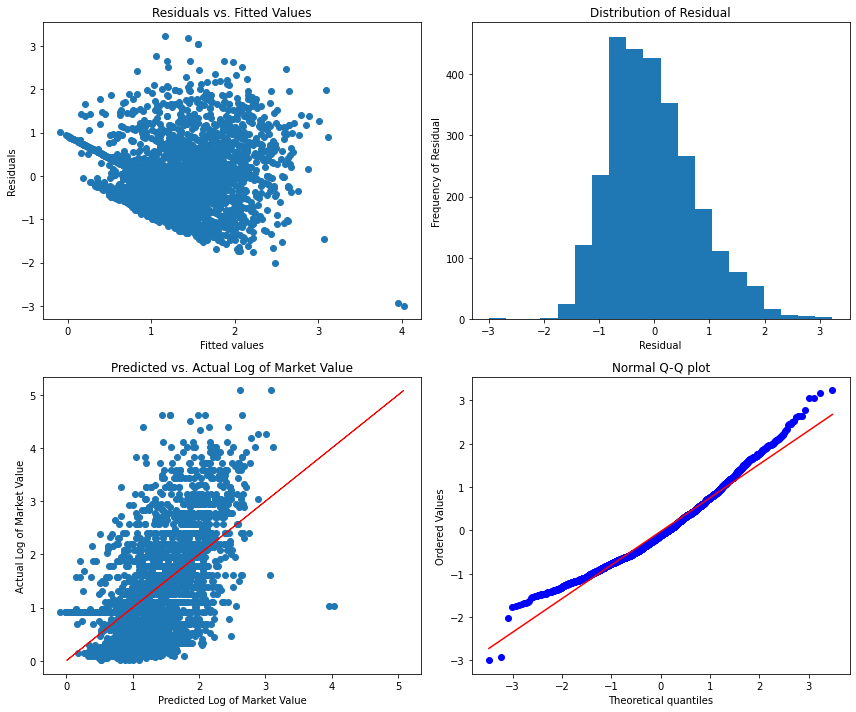

In [485]:
# Find the residuals and predictions 
lr_model_5_predict = lr_model_5.predict(X_4_test_scaled)
lr_model_5_resid = y_4_log_test - lr_model_5_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lr_model_5_predict, lr_model_5_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lr_model_5_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lr_model_5_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lr_model_5_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

In [486]:
# Print the MAE
mean_lr_model_5_mae = -np.mean(cross_val_score(lr_model_5, X_4_train_scaled, y_4_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_lr_model_5_mae

0.6231920755664043

In [487]:
# Calculate the RMSE
lr_model_5_cv_train = cross_val_score(lr_model_5, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)
lr_model_5_cv_test = cross_val_score(lr_model_5, X_4_test_scaled, y_4_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
lr_model_5_cv_train_mean = round(-(lr_model_5_cv_train.mean()),2)
# Find the test Results
lr_model_5_cv_test_mean = round(-(lr_model_5_cv_test.mean()),2)

print(f'RMSE on train: {lr_model_5_cv_train_mean}')
print(f'RMSE on test: {lr_model_5_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.79


Although the model has a low R^2 the mean absolte error and the RMSE are somewhat similar to the previous models. Let me find the ten best predictors using the f_regression.

In [488]:
# Find the 10 best predictors using f_regression
ten_best_4 = SelectKBest(f_regression, k = 10)

# Fit and transform 
X_train_ten_4 = ten_best_4.fit_transform(X_4_train_scaled, y_4_log_train)
X_test_ten_4 = ten_best_4.transform(X_4_test_scaled)

# Instantiate
lr_ten_best_4 = LinearRegression()

# Fit
lr_ten_best_4.fit(X_train_ten_4, y_4_log_train)

# Print score
lr_ten_best_4_train_score = lr_ten_best_4.score(X_train_ten_4, y_4_log_train)
lr_ten_best_4_test_score = lr_ten_best_4.score(X_test_ten_4, y_4_log_test)

print(f'Train R^2: {round(lr_ten_best_4_train_score, 2)}')
print(f'Test R^2: {round(lr_ten_best_4_test_score, 2)}')

Train R^2: 0.33
Test R^2: 0.32


There seems to be a little overfitting present in the data. I will look into Lasso model. First I will try to find the best Lasso model by hyperparameter tuning using gridsearch.

In [489]:
# Hyperparameter tuning with gridsearch to find best Lasso model
# Create pipeline
ls_estimators = [('model', Lasso(random_state=21, max_iter=1000000))]
ls_pipeline = Pipeline(ls_estimators)

# Create list of parameters
ls_params = {'model__alpha': [10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]}
ls_grid_search_4 = GridSearchCV(ls_pipeline, param_grid = ls_params, cv=2)

# Fit
X_fitted_search_ls = ls_grid_search_4.fit(X_4_train_scaled, y_4_log_train)

In [490]:
# Find the best model
ls_grid_best_model_4 = X_fitted_search_ls.best_estimator_
ls_grid_best_model_4

Pipeline(steps=[('model',
                 Lasso(alpha=0.01, max_iter=1000000, random_state=21))])

In [491]:
# Score model
print(f"Best model Train R^2: {round(ls_grid_best_model_4.score(X_4_train_scaled, y_4_log_train), 2)}")
print(f"Best model Test R^2: {round(ls_grid_best_model_4.score(X_4_test_scaled, y_4_log_test), 2)}")

Best model Train R^2: 0.33
Best model Test R^2: 0.32


There seems to be some overfitting present in the data and the R^2 is the same as the previous model.

In [492]:
# Run Lasso model on the unscaled data
lasso_model_unscaled_4 = Lasso(alpha=0.01, max_iter=1000000, random_state=21).fit(X_4_train, y_4_log_train)
# Score model
print(f'Lasso R^2 on train set: {round(lasso_model_unscaled_4.score(X_4_train, y_4_log_train),2)}')
print(f'Lasso R^2 on test set: {round(lasso_model_unscaled_4.score(X_4_test, y_4_log_test),2)}')

Lasso R^2 on train set: 0.32
Lasso R^2 on test set: 0.32


I get the same R^2 by running the Lasso with the hyperparameters on the unscaled data. I will now run the Lasso best model with hyperparameters on the scaled data.

In [493]:
# Run Lasso model on scaled data
lasso_model_4 = Lasso(alpha=0.001, max_iter=1000000, random_state=21).fit(X_4_train_scaled, y_4_log_train)
# Score model
print(f'Lasso R^2 on train set: {round(lasso_model_4.score(X_4_train_scaled, y_4_log_train),2)}')
print(f'Lasso R^2 on test set: {round(lasso_model_4.score(X_4_test_scaled, y_4_log_test),2)}')

Lasso R^2 on train set: 0.33
Lasso R^2 on test set: 0.33


The R^2 has increased but it is still the same as the previous models. I will look at the residuals and the predictions.

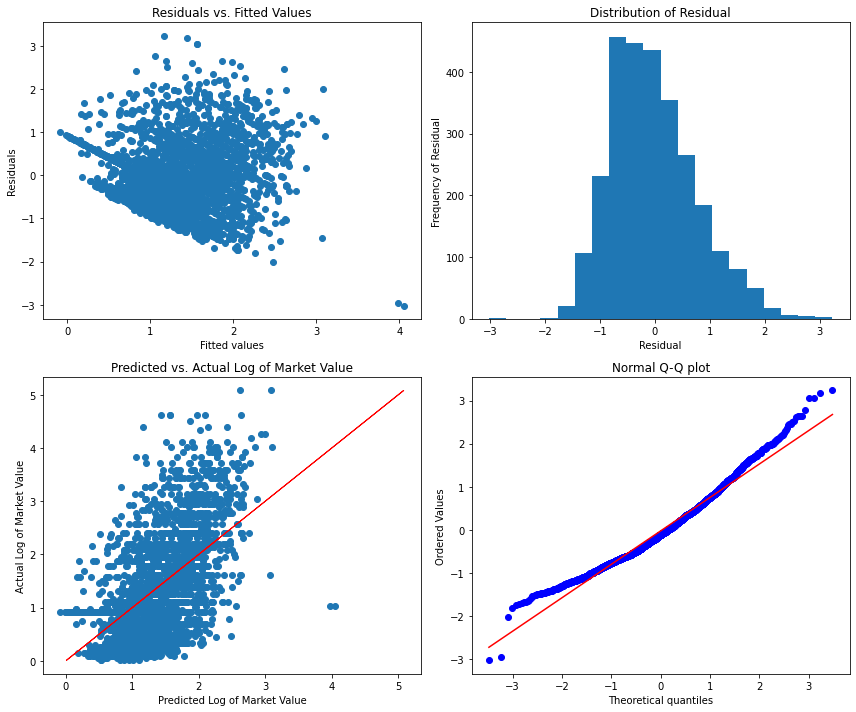

In [495]:
# Find the residuals and predictions
lasso_model_4_predict = lasso_model_4.predict(X_4_test_scaled)
lasso_model_4_resid = y_4_log_test - lasso_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lasso_model_4_predict, lasso_model_4_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lasso_model_4_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lasso_model_4_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lasso_model_4_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals are more normally distributed than the previous models and the model is predicting better than the previous models. 

In [496]:
# Create a coefficients table
lasso_model_4_coef_df = pd.DataFrame({"Features": X_4_train.columns, "Lasso Coefficients": lasso_model_4.coef_, 
                                "Effect": np.expm1(lasso_model_4.coef_)})

# Find the coefficients not equal to 0
lasso_model_4_coef_df = lasso_model_4_coef_df[(lasso_model_4_coef_df['Lasso Coefficients'] != 0)]
# Display coefficients
lasso_model_4_coef_df.sort_values('Lasso Coefficients', ascending = False)

Features  Lasso Coefficients    Effect
0        season            0.273574  0.314655
16  buying_team            0.252176  0.286823
2            MP            0.112037  0.118554
3           Min            0.068178  0.070556
11           xG            0.045172  0.046208
15        xA/90            0.038333  0.039077
12         npxG            0.031934  0.032450
21  Nationality            0.031068  0.031556
4           Gls            0.029181  0.029611
20   Midfielder            0.013704  0.013798
7            PK            0.013015  0.013100
5           Ast            0.003002  0.003007
8        PK_Att            0.000955  0.000955
19   Goalkeeper           -0.004432 -0.004423
10         CrdR           -0.012708 -0.012628
18     Defender           -0.013470 -0.013379
13           xA           -0.021584 -0.021353
9          CrdY           -0.025074 -0.024762
1    player_age           -0.289146 -0.251097

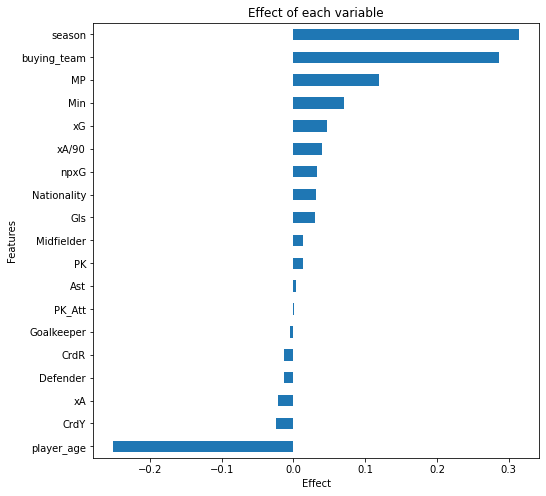

In [497]:
# visualize the effect of each variable
plt.figure(figsize=(8,8))
lasso_model_4_coef_df.groupby(['Features'])["Effect"].sum().sort_values(ascending=True).plot(kind="barh")
plt.title("Effect of each variable")
plt.xlabel('Effect')
plt.ylabel('Features')

plt.show()

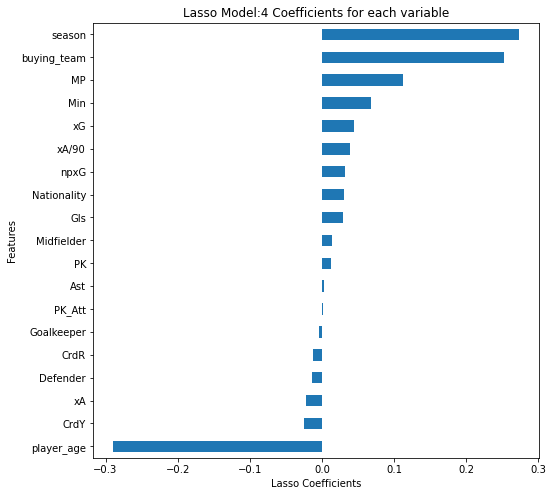

In [498]:
# visualizing the model coefficients for each features
plt.figure(figsize=(8,8))

lasso_model_4_coef_df.groupby(['Features'])['Lasso Coefficients'].sum().sort_values(ascending=True).plot(kind='barh') 
plt.xlabel('Lasso Coefficients')
plt.ylabel('Features')
plt.title('Lasso Model:4 Coefficients for each variable')
plt.show()

In [499]:
# Print the MAE
mean_lasso_model_4_mae = -np.mean(cross_val_score(lasso_model_4, X_4_train_scaled, y_4_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_lasso_model_4_mae

0.6228817160224693

In [500]:
# Calculate the RMSE
lasso_model_4_cv_train = cross_val_score(lasso_model_4, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)
lasso_model_4_cv_test = cross_val_score(lasso_model_4, X_4_test_scaled, y_4_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
lasso_model_4_cv_train_mean = round(-(lasso_model_4_cv_train.mean()),2)
# Find the test Results
lasso_model_4_cv_test_mean = round(-(lasso_model_4_cv_test.mean()),2)

print(f'RMSE on train: {lasso_model_4_cv_train_mean}')
print(f'RMSE on test: {lasso_model_4_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.79


The RMSE and the MAE did not change either. I will now try to find the best Ridge model using gridsearch by hyperparameter tuning.

In [501]:
# Hyperparameter tuning using gridsearch to find the best Ridge model
# Create pipeline
rg_estimators = [('model', Ridge(random_state=21, max_iter=1000000))]
rg_pipeline = Pipeline(rg_estimators)

# Create list of parameters
rg_params = {'model__alpha': [10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]}
rg_grid_search_4 = GridSearchCV(rg_pipeline, param_grid = rg_params, cv=2)

# Fit
X_fitted_search_rg_4 = rg_grid_search_4.fit(X_4_train_scaled, y_4_log_train)

In [502]:
# Find the best model
rg_grid_best_model_4 = X_fitted_search_rg_4.best_estimator_
rg_grid_best_model_4

Pipeline(steps=[('model', Ridge(alpha=100, max_iter=1000000, random_state=21))])

In [503]:
# Print R^2
print(f"Best model Train R^2: {round(rg_grid_best_model_4.score(X_4_train_scaled, y_4_log_train), 2)}")
print(f"Best model Test R^2: {round(rg_grid_best_model_4.score(X_4_test_scaled, y_4_log_test), 2)}")

Best model Train R^2: 0.33
Best model Test R^2: 0.33


There seems to be some overfitting present in the data and the R^2 is the same as the previous models.

Let me try running the Ridge model with the hyperparameters first on the unscaled data and then on the scaled data to see if there is any change.

In [504]:
# Run Ridge on unscaled data
ridge_model_unscaled_4 = Ridge(alpha=100, max_iter=1000000, random_state=21).fit(X_4_train, y_4_log_train)
# Score model
print(f'Ridge R^2 on train set: {round(ridge_model_unscaled_4.score(X_4_train, y_4_log_train),2)}')
print(f'Ridge R^2 on test set: {round(ridge_model_unscaled_4.score(X_4_test, y_4_log_test),2)}')

Ridge R^2 on train set: 0.33
Ridge R^2 on test set: 0.33


In [505]:
# Run Ridge on scaled data
ridge_model_4 = Ridge(alpha=100, max_iter=1000000, random_state=21).fit(X_4_train_scaled, y_4_log_train)
# Score model
print(f'Ridge R^2 on train set: {round(ridge_model_4.score(X_4_train_scaled, y_4_log_train),2)}')
print(f'Ridge R^2 on test set: {round(ridge_model_4.score(X_4_test_scaled, y_4_log_test),2)}')

Ridge R^2 on train set: 0.33
Ridge R^2 on test set: 0.33


There seems to be no improvement in the R^2. It has been consistently 0.33 for all the models. I will look at the residuals and the predictions for this model.

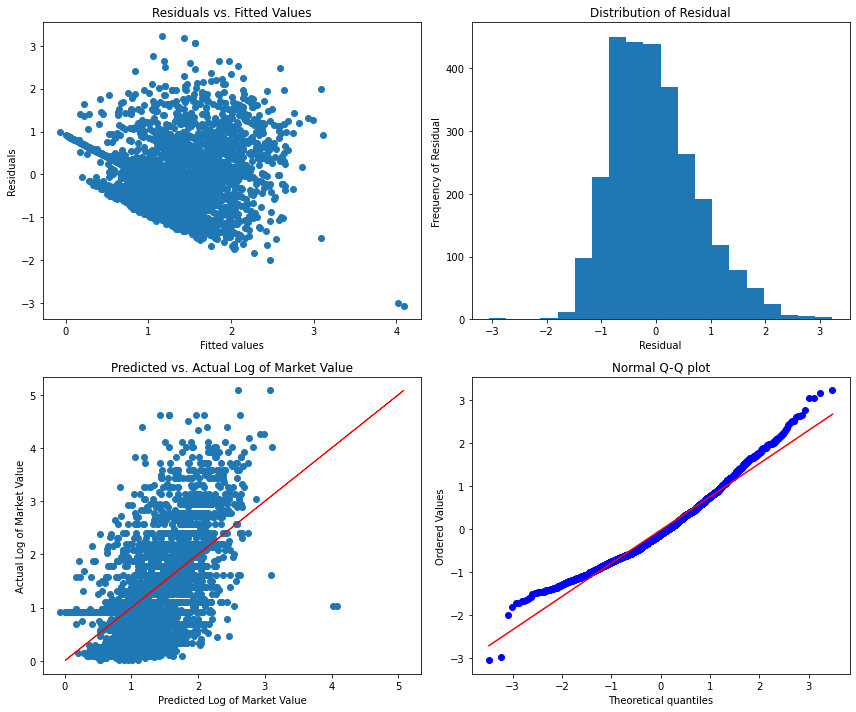

In [506]:
# Find the residuals and predictions
ridge_model_4_predict = ridge_model_4.predict(X_4_test_scaled)
ridge_model_4_resid = y_4_log_test - ridge_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(ridge_model_4_predict, ridge_model_4_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(ridge_model_4_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(ridge_model_4_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(ridge_model_4_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals look normally distributed and the Q-Q plot also shows some linearity in the data. Let me check the average errors on the data.

In [507]:
# Print the MAE
mean_ridge_model_4_mae = -np.mean(cross_val_score(ridge_model_4, X_4_train_scaled, y_4_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_ridge_model_4_mae

0.6225731026311125

In [508]:
# Calculate the RMSE
ridge_model_4_cv_train = cross_val_score(ridge_model_4, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)
ridge_model_4_cv_test = cross_val_score(ridge_model_4, X_4_test_scaled, y_4_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
ridge_model_4_cv_train_mean = round(-(ridge_model_4_cv_train.mean()),2)
# Find the test Results
ridge_model_4_cv_test_mean = round(-(ridge_model_4_cv_test.mean()),2)

print(f'RMSE on train: {ridge_model_4_cv_train_mean}')
print(f'RMSE on test: {ridge_model_4_cv_test_mean}')

RMSE on train: 0.79
RMSE on test: 0.79


The errors are similar to what I had in my previous models but so far this is my best linear model in terms of predictability and error rate. I will find the predictors from this model.

In [509]:
# Create a coefficients table
ridge_model_4_coef_df = pd.DataFrame({"Features": X_4_train.columns, "Ridge Coefficients": ridge_model_4.coef_, 
                               "Effect": np.expm1(ridge_model_4.coef_)})
# Find the coefficients not equal to 0
ridge_model_4_coef_df = ridge_model_4_coef_df[(ridge_model_4_coef_df['Ridge Coefficients'] != 0)]
# Display coefficients
ridge_model_4_coef_df.sort_values('Ridge Coefficients', ascending = False)

Features  Ridge Coefficients    Effect
0        season            0.268653  0.308201
16  buying_team            0.248845  0.282543
2            MP            0.102782  0.108250
3           Min            0.076113  0.079085
15        xA/90            0.043381  0.044336
11           xG            0.040362  0.041188
12         npxG            0.038286  0.039028
21  Nationality            0.031933  0.032448
7            PK            0.015999  0.016128
20   Midfielder            0.015082  0.015196
6        NP_Gls            0.014853  0.014963
4           Gls            0.014350  0.014453
5           Ast            0.004195  0.004204
8        PK_Att            0.001544  0.001545
17     Attacker            0.001444  0.001445
14      npxG+xA           -0.000559 -0.000559
19   Goalkeeper           -0.005773 -0.005756
18     Defender           -0.013447 -0.013357
10         CrdR           -0.013544 -0.013453
13           xA           -0.025603 -0.025278
9          CrdY           -0.025866 -0.025534
1    player_age           -0.284914 -0.247921

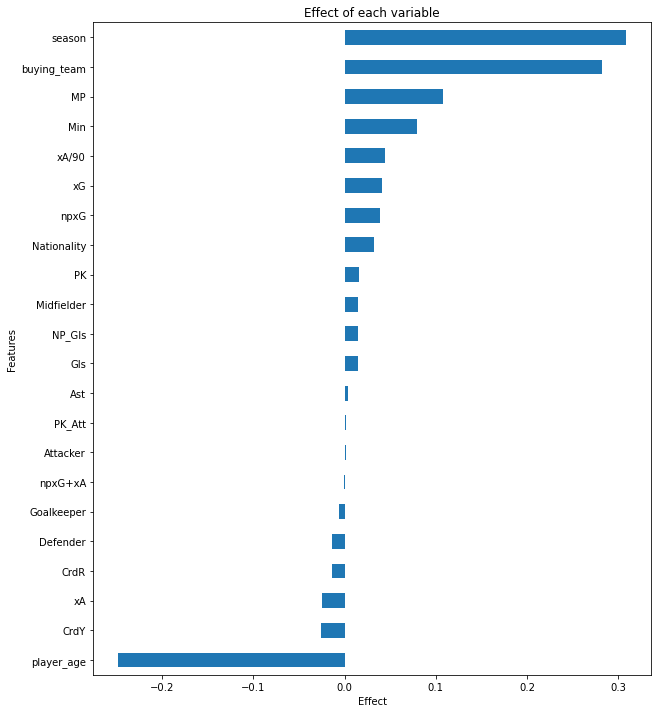

In [510]:
# visualize the effect of each variable
plt.figure(figsize=(10,12))

ridge_model_4_coef_df.groupby(['Features'])["Effect"].sum().sort_values(ascending=True).plot(kind="barh")
plt.title("Effect of each variable")
plt.xlabel('Effect')
plt.ylabel('Features')
plt.show()

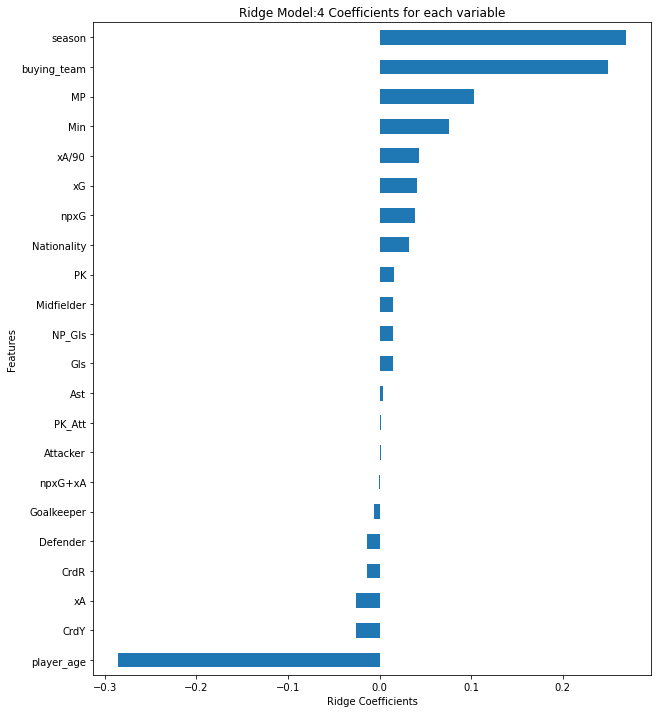

In [511]:
# visualizing the model coefficients for each features
plt.figure(figsize=(10,12))

ridge_model_4_coef_df.groupby(['Features'])['Ridge Coefficients'].sum().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Ridge Coefficients')
plt.ylabel('Features')
plt.title('Ridge Model:4 Coefficients for each variable')
plt.show()

I can see the `season` and `buying_team` has almost twice the effect on the Market Value than other features in the dataset. This is followed by matches played by the players and the number of minutes played by each player. This makes sense since season/year is a factor with the changing Market Value. This is beacuse with the increasing years, we are losing the monetary value and also we need to consider inflation. The teams or clubs play a major role in determning the Market Value of a Footballer. If a player is playing for a big club like Real Madrid, Manchester United or Liverpool then the value of that player increases as the clubs add a certain degree of brand value to the players. The more games a player takes part in, the more value it adds to him, and the more he can prove himself infront of the world so matches played by a player make a difference as well unlike players who are benchwarmers and also participate in a game when another player is unable to play. The Market Value of these players are certainly less.  

On the other hand, `player_age` has a negative effect on the Market Value. This is because as the players get older, their stamina decreases, their performance deteriorates and since they can't perform well the demand to have them play in a club falls along with their Market Value. Moreover, most players retire after the age of 38. 

I will now extract the top 10 features from this model to get the key predictors in determining the Market Value of players.

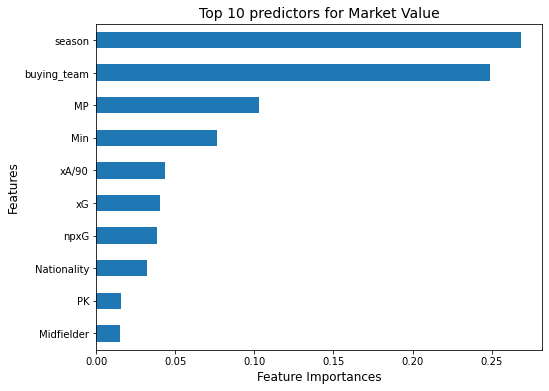

In [512]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Top 10 predictors for Market Value', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Extract the top 10 features
feat_importances = pd.Series(ridge_model_4.coef_, index = X_4_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

My featured engineered variable, `Nationality` is among the top 10 features for determining the Market Value. This means nationalities do matter when it comes to determining Market Value. Other columns like, `xA/90`, `xG`, `npxG` and `PK` also include in the top 10 predictors. The more goals a player scores the higher their Market value will get. 


I will now look at non-linear models namely, 
- K-Nearest Neighbor Regressor
- Decision Tree Regressor
- Support Vector Regressor

I will then compare the R<sup>2</sup> of each model along with their model performances (RMSE and MAE). 

------

### KNN Regressor

I will first fit a KNN Regressor with default hyperparameters on the unscaled data to see the performance. 

In [513]:
# Import KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# Run KNN Regressor model on unscaled data with default parameter
KNN_model_unscaled = KNeighborsRegressor()
# Fit
KNN_model_unscaled.fit(X_orig_train, y_orig_log_train)
# Print R^2
print(f"R^2 score on train set: {round(KNN_model_unscaled.score(X_orig_train, y_orig_log_train),2)}")
print(f"R^2 score on test set: {round(KNN_model_unscaled.score(X_orig_test, y_orig_log_test),2)}")

R^2 score on train set: 0.44
R^2 score on test set: 0.17


The R^2 is quite low, lower than the baseline model. There is also severe overfitting present in the data. I will rerun the model on the scaled data now.

In [514]:
# Run KNN Regressor on scaled data with default parameter
KNN_model = KNeighborsRegressor()
# Fit
KNN_model.fit(X_orig_train_scaled, y_orig_log_train)
# Print R^2
print(f"R^2 score on train set: {round(KNN_model.score(X_orig_train_scaled, y_orig_log_train),2)}")
print(f"R^2 score on test set: {round(KNN_model.score(X_orig_test_scaled, y_orig_log_test),2)}")

R^2 score on train set: 0.57
R^2 score on test set: 0.31


Although the R^2 has increased, there is still overfitting present in the data. I will now tune the hyperparameters to find the best KNN Regressor model using gridsearch. I will be using 5 folds for the cross validation. 

In [544]:
# Find Hyperparameters to improve model performance using gridsearch

# Create estimator grid
knn_estimators = [("scaler", StandardScaler()),
               ("model", KNeighborsRegressor())]

# Instantiate pipeline
knn_pipe = Pipeline(knn_estimators)

# Set param grid
knn_params = {"model": [KNeighborsRegressor()],
            "model__n_neighbors": list(range(5, 100, 5)),
            "model__weights": ['uniform', 'distance'],
            "scaler": [StandardScaler(), None]}

# Fit and score gird search
knn_grid_search = GridSearchCV(knn_pipe, knn_params, cv = 5)
fitted_knn_grid = knn_grid_search.fit(X_orig_train, y_orig_log_train)

In [545]:
# Find the best model
best_k = fitted_knn_grid.best_estimator_
# Display the best model
best_k

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])

In [551]:
# Print R^2
print(f'Best Model R^2 on train set: {round(best_k.score(X_orig_train, y_orig_log_train),2)}')
print(f'Best Model R^2 on test set: {round(best_k.score(X_orig_test, y_orig_log_test),2)}')

Best Model R^2 on train set: 1.0
Best Model R^2 on test set: 0.38


The R^2 has almost doubled compared to the baseline model. Although there is overfitting present in the data. I will run this model with the optimized hyperparameters and look at the predictions.

In [515]:
# Run the best KNN Regressor model on scaled data uing hyperparameters 
KNN_model_1 = KNeighborsRegressor(weights='distance', n_neighbors=15)
# Fit
KNN_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Print score
print(f"R^2 score on train set: {round(KNN_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}")
print(f"R^2 score on test set: {round(KNN_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}")

R^2 score on train set: 1.0
R^2 score on test set: 0.39


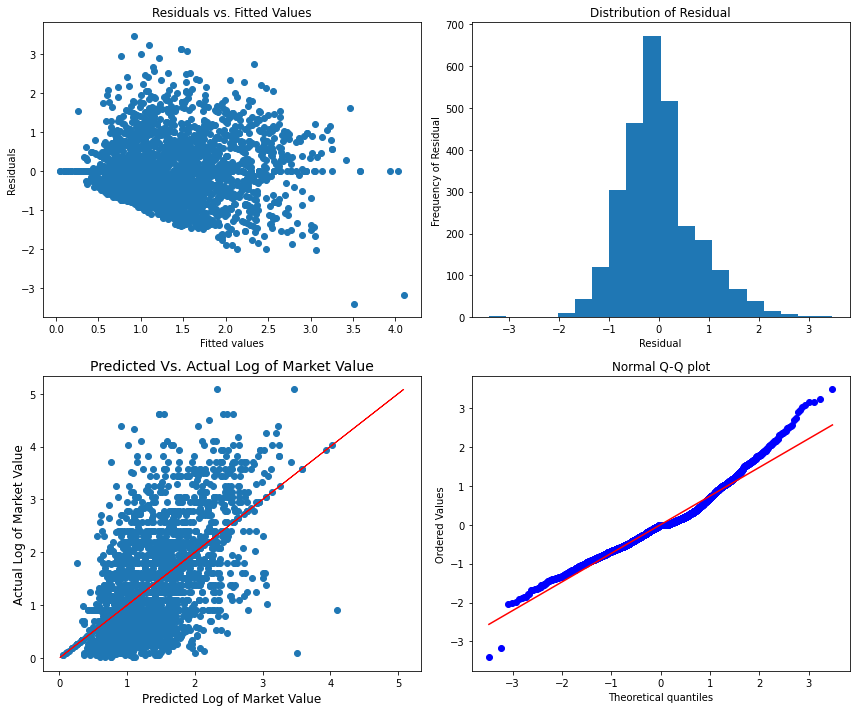

In [516]:
# Find the residuals and predictions
KNN_model_1_predict = KNN_model_1.predict(X_orig_test_scaled)
KNN_model_1_resid = y_orig_log_test - KNN_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(KNN_model_1_predict, KNN_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(KNN_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(KNN_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(KNN_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The R^2 is quite good compared to the other models and the residuals are more normally distributed. Thw Q-Q plot is also linear. I will now check the MAE and RMSE to check the errors. 

In [557]:
# Print the MAE
mean_KNN_model_1_mae = -np.mean(cross_val_score(KNN_model_1, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_KNN_model_1_mae

0.5480862387290187

In [559]:
# Calculate the RMSE
KNN_model_1_cv_train = cross_val_score(KNN_model_1, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
KNN_model_1_cv_test = cross_val_score(KNN_model_1, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
KNN_model_1_cv_train_mean = round(-(KNN_model_1_cv_train.mean()),2)
# Find the test Results
KNN_model_1_cv_test_mean = round(-(KNN_model_1_cv_test.mean()),2)

print(f'RMSE on train: {KNN_model_1_cv_train_mean}')
print(f'RMSE on test: {KNN_model_1_cv_test_mean}')

RMSE on train: 0.75
RMSE on test: 0.77


Both the RMSE and the MAE are lower than the previous models. Let me now fit the models by adjusting the number of neighbors to see the accuracy scores for different models.

In [563]:
# Fitting KNN models by adjusting the number of neighbors

k_values = list(range(1, 20, 1))
train_acc = []
test_acc = []

for k in k_values:
    
    KNN_model_2 = KNeighborsRegressor(weights='distance', n_neighbors=k)
    KNN_model_2.fit(X_orig_train_scaled, y_orig_log_train)
    
    train_accuracy = round(KNN_model_2.score(X_orig_train_scaled, y_orig_log_train), 2)
    test_accuracy = round(KNN_model_2.score(X_orig_test_scaled, y_orig_log_test), 2)
    
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    
    print(f"Finished model with {k} neighbors", end="\r")

I will plot the training and test accuracy for the various k-values.

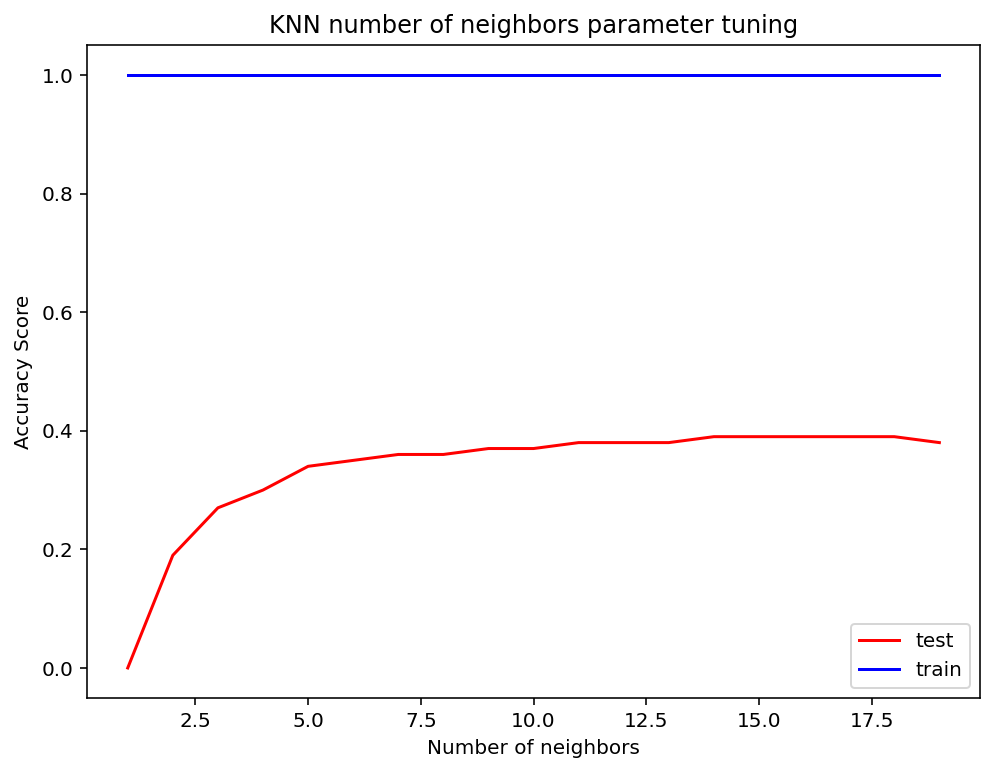

In [564]:
# Visualize the accuracy scores for different k values
plt.figure(figsize=(8, 6))

plt.plot(k_values, test_acc, color="red", label="test")
plt.plot(k_values, train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.title('KNN number of neighbors parameter tuning')
plt.legend()
plt.show()

In [566]:
# the index of the minimal distance
best_idx = np.argmin(np.abs(np.array(train_acc) - np.array(test_acc)))
k_values[best_idx]

14

I can see that the highest test accuracy is achieved for smaller Ks (below 15). However here the model is severely overfitting. For bigger values of k, the test accuracy becomes almost constant. I can look for the point in the chart where the train and test accuracy is closest since it gives comparable performance. 

The best KNN model gave around 39% accuracy with an average absolute error of 0.54. The best value of k is when train and test accuracy are close. This is around n-neighbours = 14 in this case.

I will now rerun the model with the best value of k on the data sets where I have attempted to solve the multicolinearity issue.

In [518]:
# Run the best KNN Regressor model on scaled data uing hyperparameters 
KNN_model_3 = KNeighborsRegressor(weights='distance', n_neighbors=14)
# Fit
KNN_model_3.fit(X_4_train_scaled, y_4_log_train)
# Print score
print(f"R^2 score on train set: {round(KNN_model_3.score(X_4_train_scaled, y_4_log_train),2)}")
print(f"R^2 score on test set: {round(KNN_model_3.score(X_4_test_scaled, y_4_log_test),2)}")

R^2 score on train set: 1.0
R^2 score on test set: 0.4


The R^2 has definitely increased although the overfitting is still present. Let me check the residuals and the predictions.

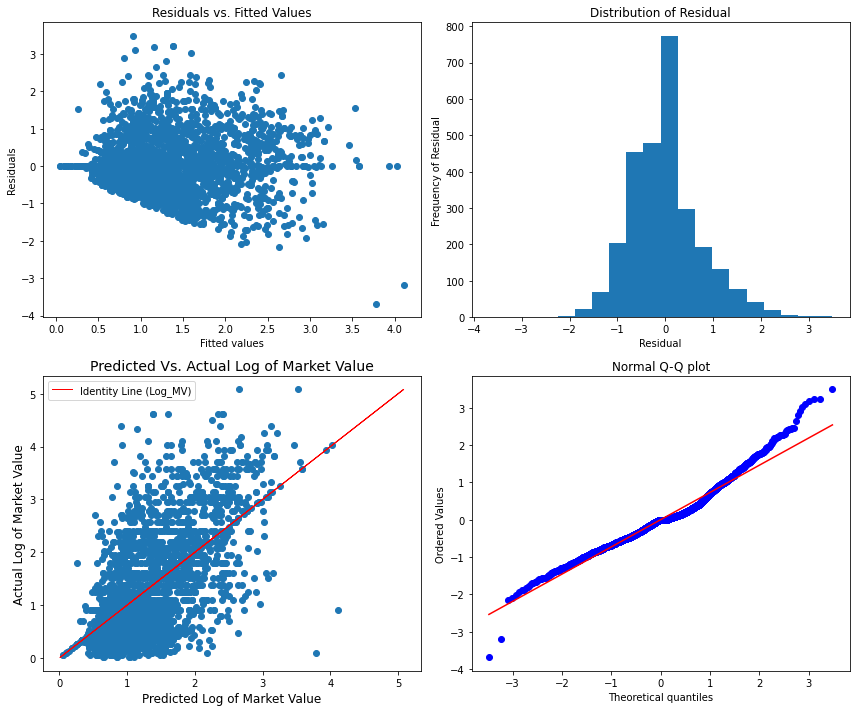

In [519]:
# Find the residuals and predictions
KNN_model_3_predict = KNN_model_3.predict(X_4_test_scaled)
KNN_model_3_resid = y_4_log_test - KNN_model_3_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(KNN_model_3_predict, KNN_model_3_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(KNN_model_3_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(KNN_model_3_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red', linewidth=1, label='Identity Line (Log_MV)')
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(KNN_model_3_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals are almost normally distributed and the model is also successful in predicting some Market Values very accurately. I will check the mean absolute errors and the RMSE for this model.

In [608]:
# Print the MAE
mean_KNN_model_3_mae = -np.mean(cross_val_score(KNN_model_3, X_4_train_scaled, y_4_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_KNN_model_3_mae

0.5406968419077334

In [610]:
# Calculate the RMSE
KNN_model_3_cv_train = cross_val_score(KNN_model_3, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)
KNN_model_3_cv_test = cross_val_score(KNN_model_3, X_4_test_scaled, y_4_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
KNN_model_3_cv_train_mean = round(-(KNN_model_3_cv_train.mean()),2)
# Find the test Results
KNN_model_3_cv_test_mean = round(-(KNN_model_3_cv_test.mean()),2)

print(f'RMSE on train: {KNN_model_3_cv_train_mean}')
print(f'RMSE on test: {KNN_model_3_cv_test_mean}')

RMSE on train: 0.74
RMSE on test: 0.77


In [616]:
print(f"Baseline R^2: {baseline_r2}")
print(f"Best KNN R^2: {round(KNN_model_3.score(X_4_test_scaled, y_4_log_test),2)}")
print(f"Baseline MAE: {round(baseline_model_mae,2)}")
print(f"Best KNN MAE: {round(np.expm1(mean_KNN_model_3_mae),2)}")
print(f"Baseline RMSE: {baseline_cv_test_mean}")
print(f"Best KNN RMSE: {round(np.expm1(KNN_model_3_cv_test_mean),2)}")

Baseline R^2: 0.2
Best KNN R^2: 0.4
Baseline MAE: 5.86
Best KNN MAE: 0.72
Baseline RMSE: 10.12
Best KNN RMSE: 1.16


This is a great model in terms of predictability and also the error rate. This model also gives the higher R^2 than the other models. I will now look at the Decision Tree Regressor.

### Decision Tree Regressor

I will try to find the best model for the Decision Tree Regressor model by hyperparameter tuning using gridsearch. I will be using 2 folds for the cross validation.

In [577]:
# Import DT Regressor
from sklearn.tree import DecisionTreeRegressor

# Find Hyperparameters to improve model performance using gridsearch

# Create estimators
DT_estimators = [("model", DecisionTreeRegressor(random_state=21))]

# Instantiate pipeline
DT_pipe = Pipeline(DT_estimators)

# Set parameter grid
DT_params = {"model__criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               "model__max_depth": list(range(5, 50, 5)),
               "model__min_samples_leaf": list(range(1, 20)),
               "model__splitter": ['best', 'random']}


# Fit and find the best model                
DT_grid_search = GridSearchCV(DT_pipe, DT_params, cv = 2)
fitted_DT_grid = DT_grid_search.fit(X_orig_train_scaled, y_orig_log_train)             
fitted_DT_grid.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=17,
                                       random_state=21, splitter='random'))])

In [578]:
# Print Score
print(f'Best DT Model R^2 on train set: {round(fitted_DT_grid.score(X_orig_train_scaled, y_orig_log_train), 2)}')
print(f'Best DT Model R^2 on test set: {round(fitted_DT_grid.score(X_orig_test_scaled, y_orig_log_test), 2)}')

Best DT Model R^2 on train set: 0.43
Best DT Model R^2 on test set: 0.3


The R^2 is lower than the KNN model and there seems to be overfitting in the data. I will run this model with the optimized hyperparameters on the scaled data and look at the residuals and predictions.

In [522]:
# Instantiate & fit the Decision Tree model on the scaled data using hyperparameters
DT_model_1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=17, random_state=21, splitter='random')
DT_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Print score
print(f"R^2 score on train set: {round(DT_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}")
print(f"R^2 score on test set: {round(DT_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}")

R^2 score on train set: 0.43
R^2 score on test set: 0.3


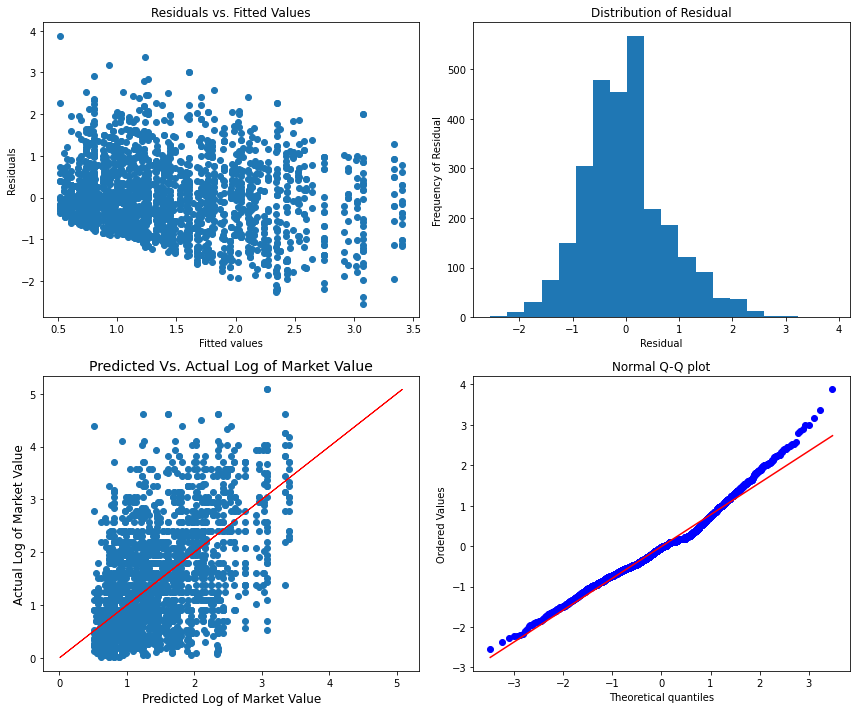

In [523]:
# Find the residuals and predicted values
DT_model_1_predict = DT_model_1.predict(X_orig_test_scaled)
DT_model_1_resid = y_orig_log_test - DT_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(DT_model_1_predict, DT_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(DT_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(DT_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(DT_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The KNN model is still a better model than this one. Let me calculate the MAE and RMSE. 

In [624]:
# Print the MAE
mean_DT_model_1_mae = -np.mean(cross_val_score(DT_model_1, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_DT_model_1_mae

0.6030490089860747

In [625]:
# Calculate the RMSE
DT_model_1_cv_train = cross_val_score(DT_model_1, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
DT_model_1_cv_test = cross_val_score(DT_model_1, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
DT_model_1_cv_train_mean = round(-(DT_model_1_cv_train.mean()),2)
# Find the test Results
DT_model_1_cv_test_mean = round(-(DT_model_1_cv_test.mean()),2)

print(f'RMSE on train: {DT_model_1_cv_train_mean}')
print(f'RMSE on test: {DT_model_1_cv_test_mean}')

RMSE on train: 0.8
RMSE on test: 0.79


Both the MAE and the RMSE are higher than the KNN model. I will now run a DT model with the optimized hyperparameters on the X_4_train_scaled and y_4_log_train. 

In [524]:
# Instantiate & fit the Decision Tree model
DT_model_2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=17, random_state=21, splitter='random')
DT_model_2.fit(X_4_train_scaled, y_4_log_train)
# Print score
print(f"R^2 score on train set: {round(DT_model_2.score(X_4_train_scaled, y_4_log_train),2)}")
print(f"R^2 score on test set: {round(DT_model_2.score(X_4_test_scaled, y_4_log_test),2)}")

R^2 score on train set: 0.43
R^2 score on test set: 0.33


Although the R^2 increased by 1%, it is still lower than the KNN model. Let me check the residuals, predictions and the MAE and RMSE.

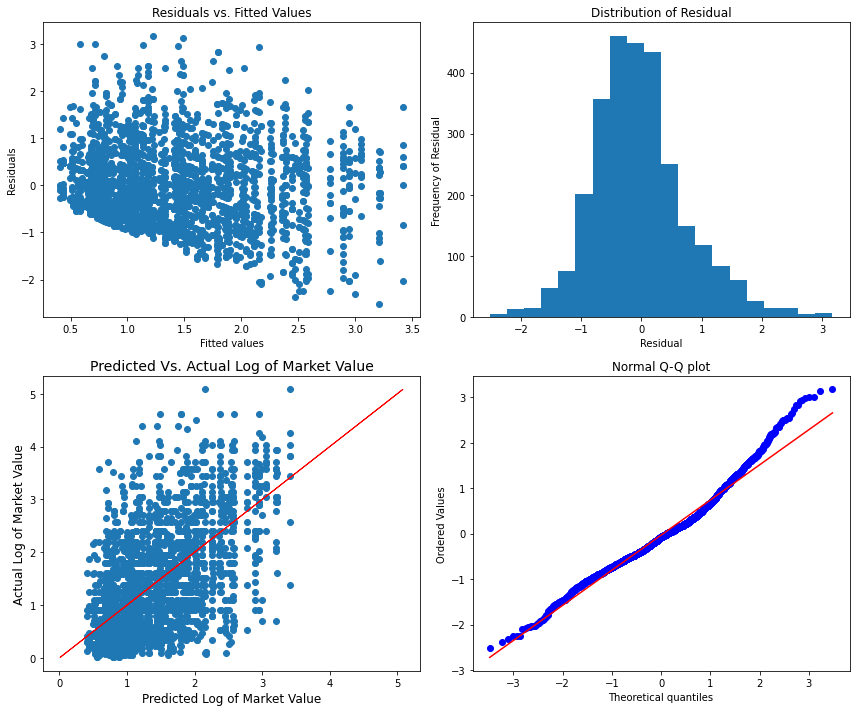

In [525]:
# Find the residuals and predicted values
DT_model_2_predict = DT_model_2.predict(X_4_test_scaled)
DT_model_2_resid = y_4_log_test - DT_model_2_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(DT_model_2_predict, DT_model_2_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(DT_model_2_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(DT_model_2_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(DT_model_2_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

In [631]:
# Print the MAE
mean_DT_model_2_mae = -np.mean(cross_val_score(DT_model_2, X_4_train_scaled, y_4_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_DT_model_2_mae

0.6047100280718594

In [632]:
# Calculate the RMSE
DT_model_2_cv_train = cross_val_score(DT_model_2, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)
DT_model_2_cv_test = cross_val_score(DT_model_2, X_4_test_scaled, y_4_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
DT_model_2_cv_train_mean = round(-(DT_model_2_cv_train.mean()),2)
# Find the test Results
DT_model_2_cv_test_mean = round(-(DT_model_2_cv_test.mean()),2)

print(f'RMSE on train: {DT_model_2_cv_train_mean}')
print(f'RMSE on test: {DT_model_2_cv_test_mean}')

RMSE on train: 0.8
RMSE on test: 0.81


This model is better than the previous model in terms of the MAE and RMSE. The residuals is more normal than the previous model and the Q-Q plot also shows more linearity than the previous DT model. 

### Support Vector Regressor

I will first fit a SVR Regressor with default hyperparameters on the scaled data to see the performance.

In [526]:
# Import the SVR package
from sklearn.svm import SVR

# Instantiate & fit the SVR model
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_orig_train_scaled, y_orig_log_train)
# Print score
print(f"R^2 score on train set: {round(SVR_model.score(X_orig_train_scaled, y_orig_log_train),2)}")
print(f"R^2 score on test set: {round(SVR_model.score(X_orig_test_scaled, y_orig_log_test),2)}")

R^2 score on train set: 0.31
R^2 score on test set: 0.31


The score is lower than the previous models but there is no overfitting present in the data. Let me check the residuals and the predictions.

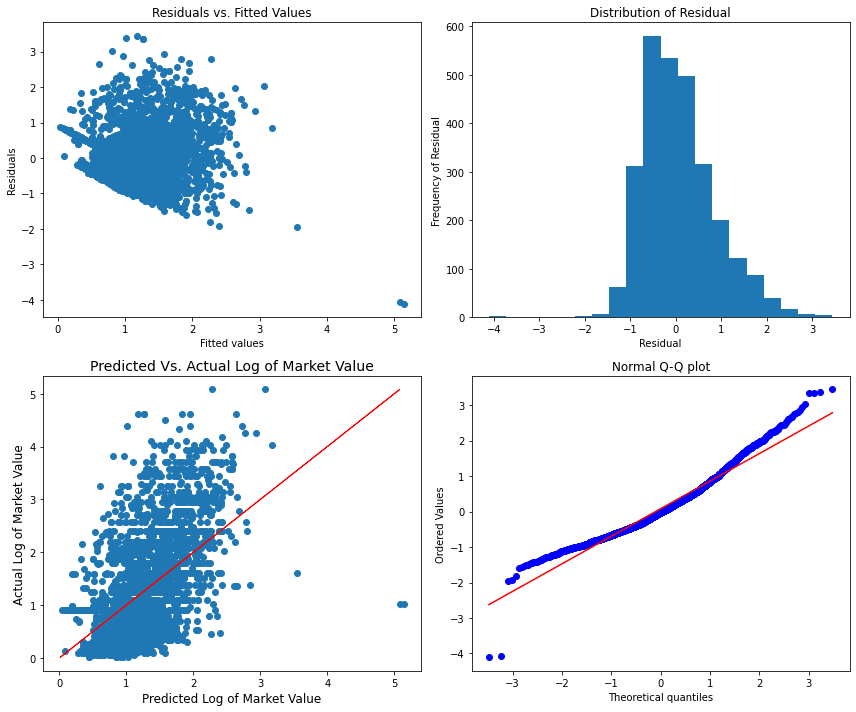

In [527]:
# Find the residuals and predicted values
SVR_model_predict = SVR_model.predict(X_orig_test_scaled)
SVR_model_resid = y_orig_log_test - SVR_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(SVR_model_predict, SVR_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(SVR_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(SVR_model_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(SVR_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

All the charts point to the fact that the previous models were definitely better than this model. I will check the MAE and RMSE.

In [654]:
# Print the MAE
mean_SVR_model_mae = -np.mean(cross_val_score(SVR_model, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_SVR_model_mae

0.6158286028899512

In [655]:
# Calculate the RMSE
SVR_model_cv_train = cross_val_score(SVR_model, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
SVR_model_cv_test = cross_val_score(SVR_model, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
SVR_model_cv_train_mean = round(-(SVR_model_cv_train.mean()),2)
# Find the test Results
SVR_model_cv_test_mean = round(-(SVR_model_cv_test.mean()),2)

print(f'RMSE on train: {SVR_model_cv_train_mean}')
print(f'RMSE on test: {SVR_model_cv_test_mean}')

RMSE on train: 0.82
RMSE on test: 0.85


Both the MAE and RMSE are higher than the previous model but lower than the baseline model. I will take a look at the feature importances and filter only the non-zero features.

In [656]:
# Create a coefficients table
SVR_model_coef_df = pd.DataFrame({"Features": X_orig_train.columns, "Coefficients": SVR_model.coef_[0], 
                               "Effect": np.expm1(SVR_model.coef_[0])})
# Find the coefficients not equal to 0
SVR_model_coef_df = SVR_model_coef_df[(SVR_model_coef_df['Coefficients'] != 0)]
# Display coefficients
SVR_model_coef_df.sort_values('Coefficients', ascending = False, )

Features  Coefficients    Effect
23          xA/90      0.419767  0.521608
5          Min/90      0.235434  0.265458
0          season      0.233475  0.262982
4             Min      0.232655  0.261946
8          NP_Gls      0.227350  0.255269
14         Ast/90      0.226363  0.254031
27    buying_team      0.224474  0.251664
25        npxG/90      0.204520  0.226936
18             xG      0.160923  0.174595
17  Gls+Ast-PK/90      0.127814  0.136342
19           npxG      0.127563  0.136056
22          xG/90      0.125645  0.133880
9              PK      0.074805  0.077674
2              MP      0.070565  0.073114
6             Gls      0.067914  0.070273
32    Nationality      0.049173  0.050402
31     Midfielder      0.027835  0.028226
16      Gls-PK/90      0.007452  0.007480
29       Defender      0.006614  0.006636
10         PK_Att     -0.003005 -0.003000
12           CrdR     -0.008794 -0.008755
30     Goalkeeper     -0.015088 -0.014975
11           CrdY     -0.021242 -0.021018
28       Attacker     -0.025565 -0.025241
20             xA     -0.056871 -0.055284
15     Gls+Ast/90     -0.103968 -0.098746
21        npxG+xA     -0.178361 -0.163360
7             Ast     -0.195156 -0.177294
26     npxG+xA/90     -0.199801 -0.181106
1      player_age     -0.206895 -0.186895
13         Gls/90     -0.285707 -0.248517
24       xG+xA/90     -0.346318 -0.292713
3          Starts     -0.377323 -0.314305

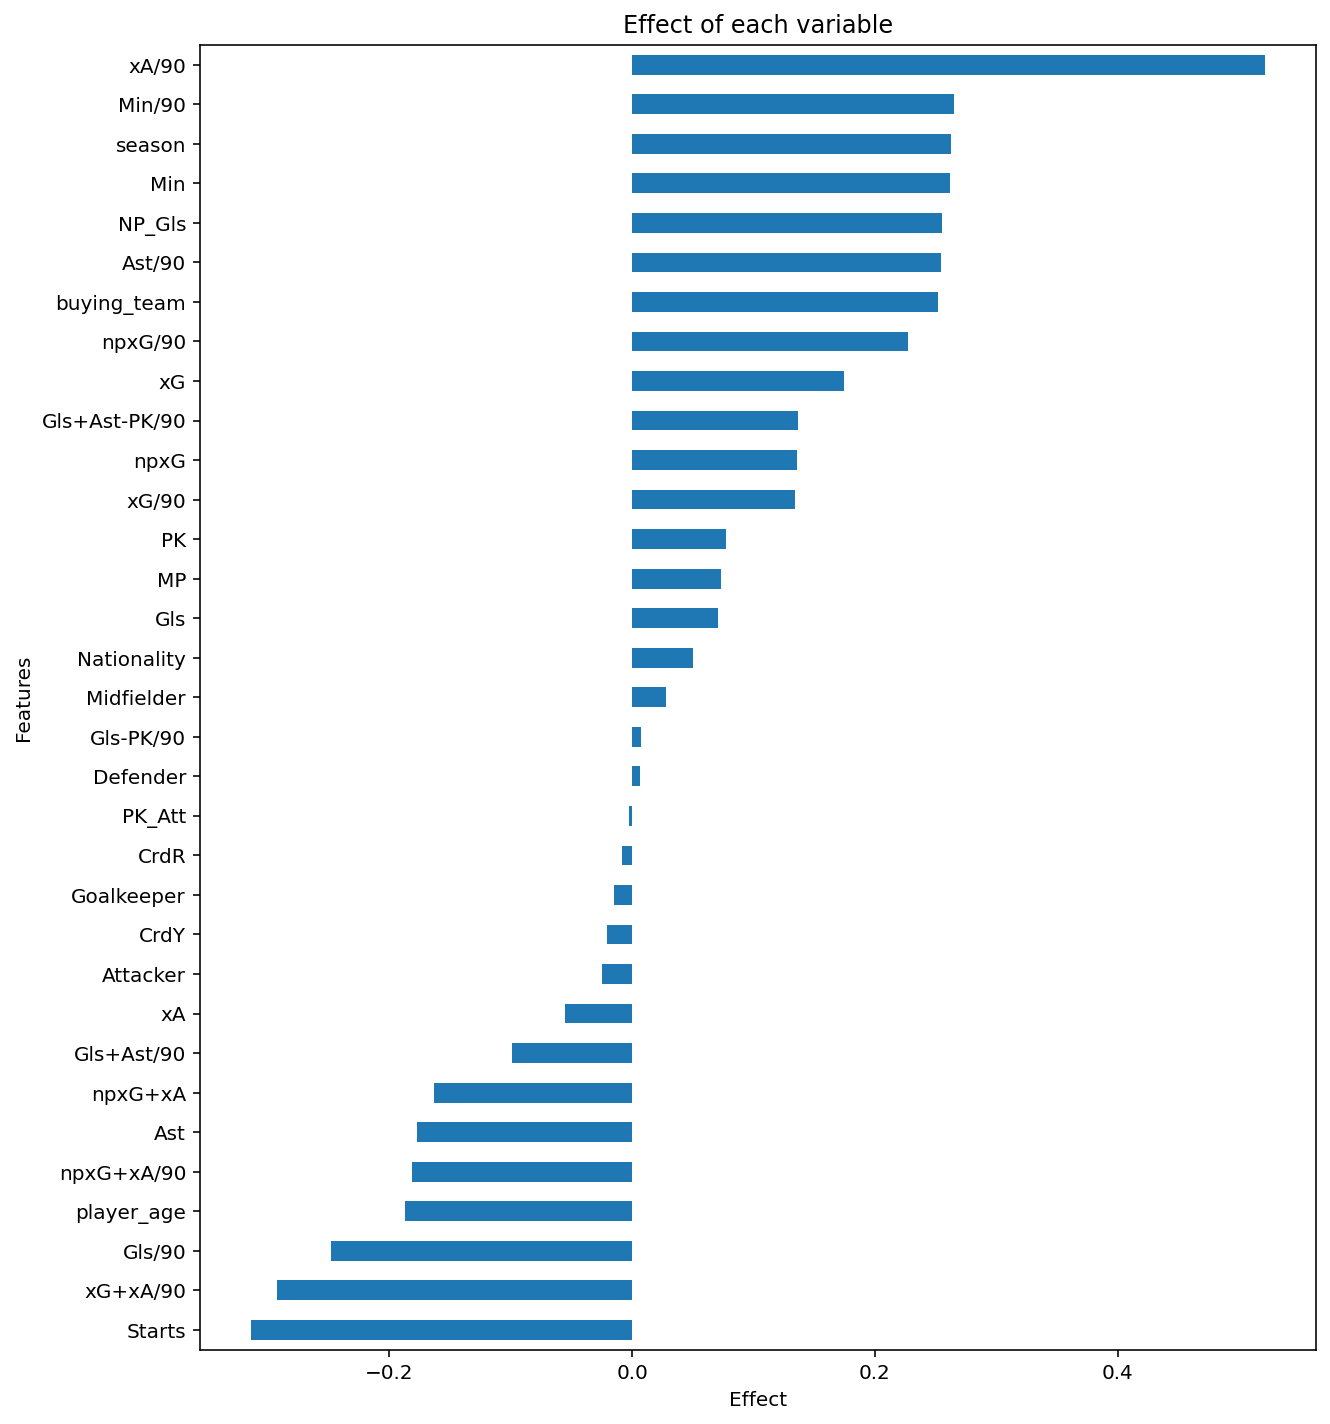

In [657]:
# visualize the effect of each variable
plt.figure(figsize=(10,12))

SVR_model_coef_df.groupby(['Features'])["Effect"].sum().sort_values(ascending=True).plot(kind="barh")
plt.title("Effect of each variable")
plt.xlabel('Effect')
plt.ylabel('Features')
plt.show()

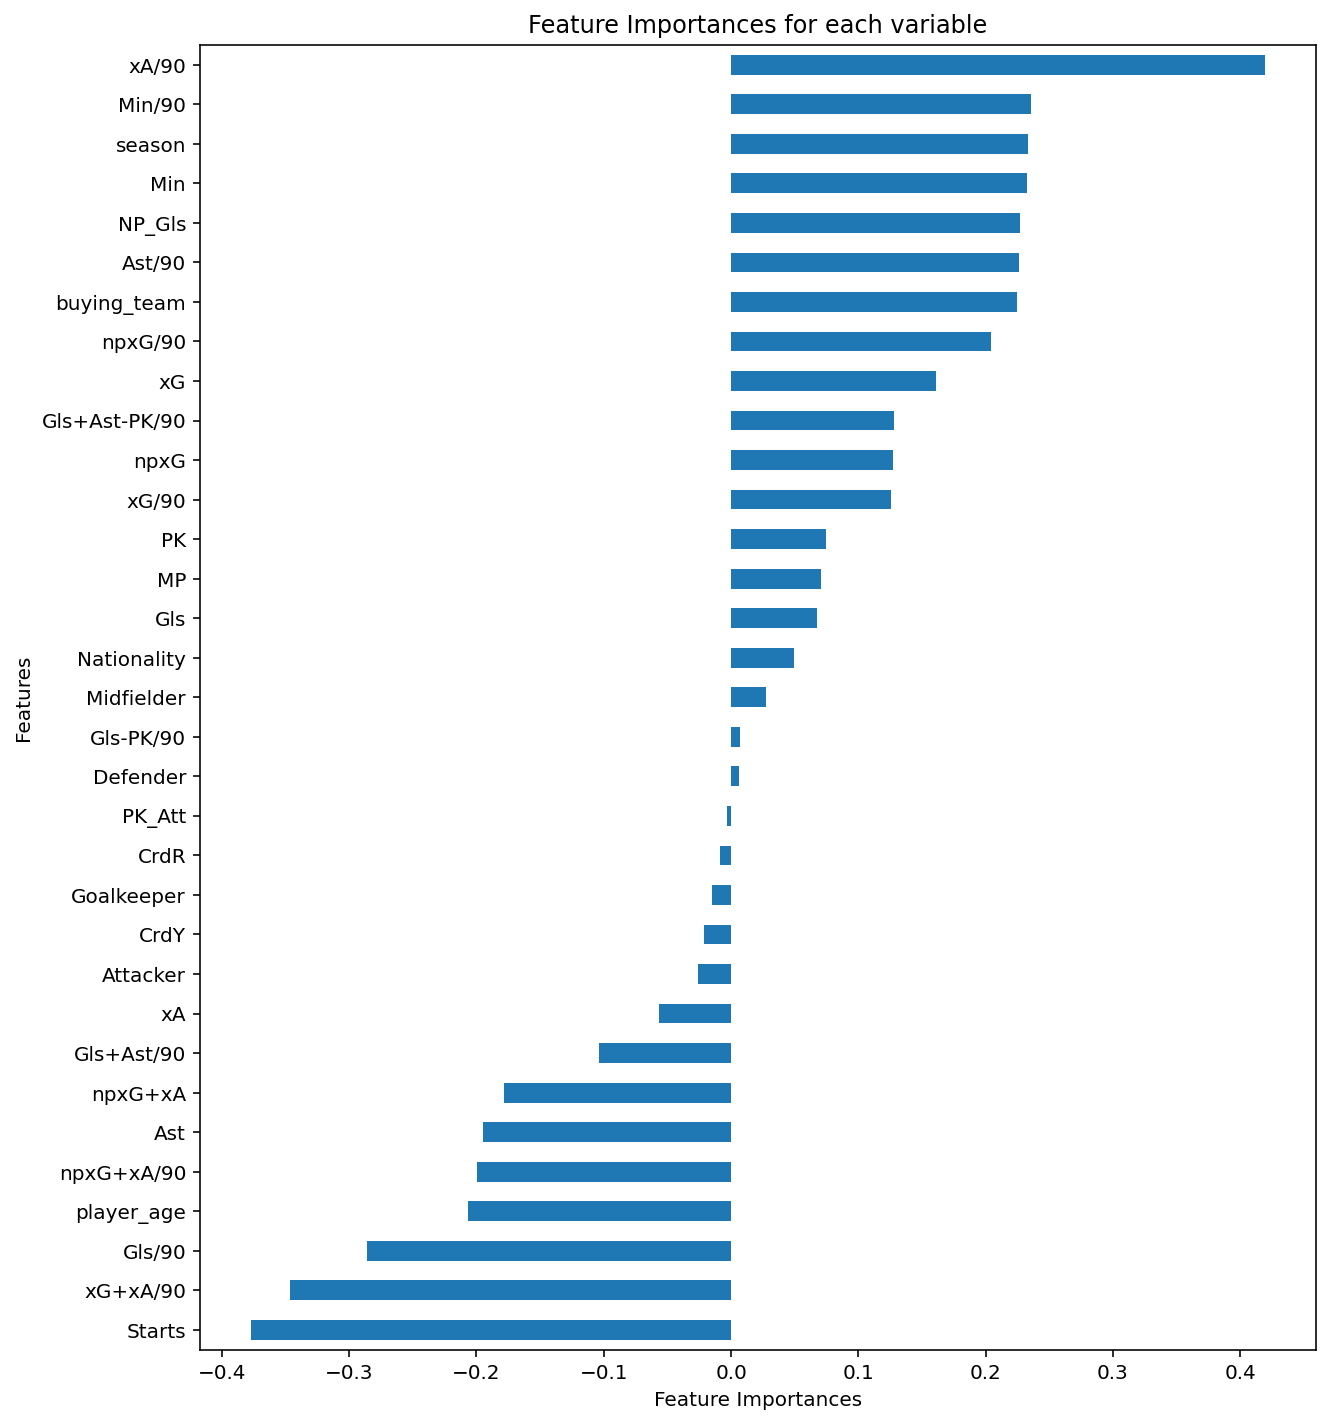

In [658]:
# visualizing the model coefficients for each features
plt.figure(figsize=(10,12))

SVR_model_coef_df.groupby(['Features'])['Coefficients'].sum().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances for each variable')
plt.show()

Let me only filter top 10 predictors from this model.

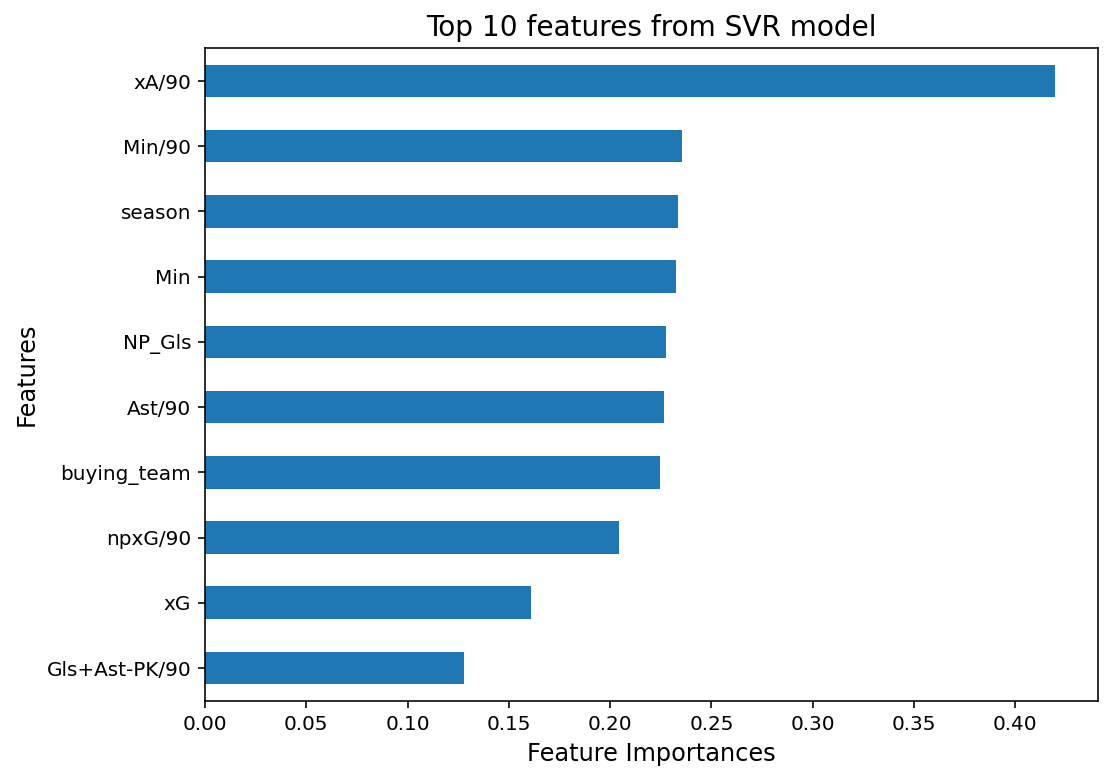

In [659]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Top 10 features from SVR model', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Extract the top 10 features
feat_importances = pd.Series(SVR_model.coef_[0], index = X_orig_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

The top 10 features from this model shows the expected assists, minutes played by the player, season/year, non-penalty goals and etc. Mostly these columns are all related to the amount of goals and assists made by the player. The higher the goals the higher is the Market Value of the player. Now I will find the best SVR model by hyperparameter tuning using gridsearch. I will be using 2 folds for the cross validation.

In [589]:
# Find Hyperparameters to improve model performance using gridsearch
# Create the estimators
svr_estimators = [('scaler', StandardScaler())
                  ,("model", SVR(max_iter=1000000))]

# Instantiate pipeline
svr_pipe = Pipeline(svr_estimators)

# Set the parameter grid
svr_params = {"model__kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
             "model__gamma": ['scale', 'auto'],
             "model__C": [0.01, 0.1, 1, 10, 100],
             "model__epsilon": np.arange(1, 10, 2)/10}

# Fit and find the best SVR model            
svr_grid_search = GridSearchCV(svr_pipe, svr_params, cv = 2)
fitted_svr_grid = svr_grid_search.fit(X_orig_train, y_orig_log_train)             
fitted_svr_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SVR(C=1, epsilon=0.3, gamma='auto', max_iter=1000000))])

In [590]:
# Print Score
print(f'Best Model R^2 on train set: {round(fitted_svr_grid.score(X_orig_train, y_orig_log_train),2)}')
print(f'Best Model R^2 on test set: {round(fitted_svr_grid.score(X_orig_test, y_orig_log_test),2)}')

Best Model R^2 on train set: 0.46
Best Model R^2 on test set: 0.4


The best SVR moel has a R^2 of 0.40 which is the same as I got with the KNN model but the overfitting in this model is lower than than the KNN model. I will run a new SVR model with the optimized hyperparameter and check the residuals and predictions.

In [528]:
# Instantiate & fit the SVR model on the scaled data using hyperparameters 
SVR_model_1 = SVR(C=1, epsilon=0.3, gamma='auto', max_iter=1000000)
SVR_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Print score
print(f"R^2 score on train set: {round(SVR_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}")
print(f"R^2 score on test set: {round(SVR_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}")

R^2 score on train set: 0.46
R^2 score on test set: 0.4


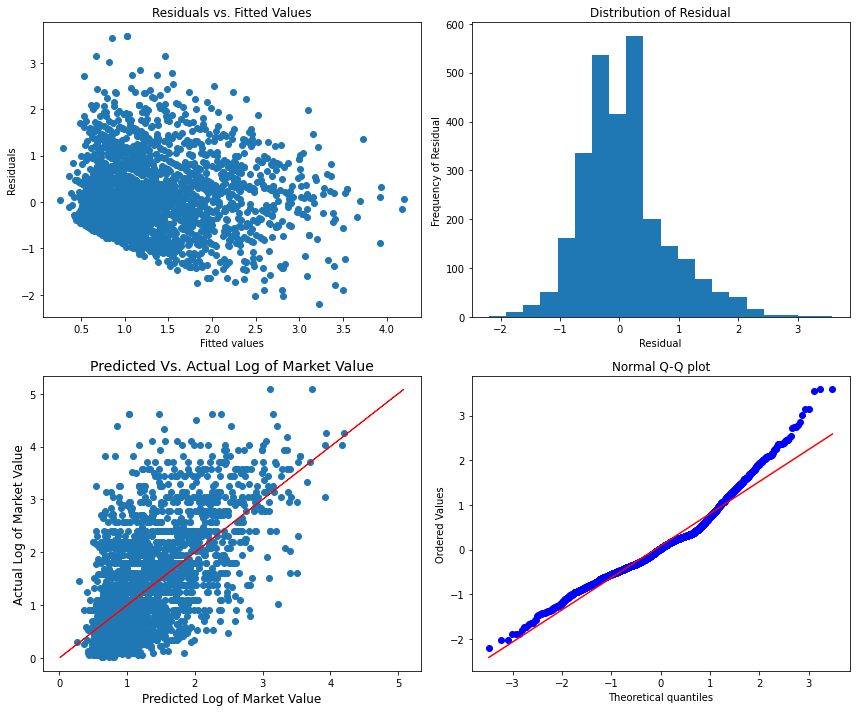

In [529]:
# Find the residuals and predicted values
SVR_model_1_predict = SVR_model_1.predict(X_orig_test_scaled)
SVR_model_1_resid = y_orig_log_test - SVR_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(SVR_model_1_predict, SVR_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(SVR_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(SVR_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(SVR_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals are almost normal and the Q-Q plot also shows linearity. This model is doing a better job at predicting the Market Values compared to all other models. I will check the errors as well.

In [665]:
# Print the MAE
mean_SVR_model_1_mae = -np.mean(cross_val_score(SVR_model_1, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_SVR_model_1_mae

0.5515103245589721

In [666]:
# Calculate the RMSE
SVR_model_1_cv_train = cross_val_score(SVR_model_1, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
SVR_model_1_cv_test = cross_val_score(SVR_model_1, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
SVR_model_1_cv_train_mean = round(-(SVR_model_1_cv_train.mean()),2)
# Find the test Results
SVR_model_1_cv_test_mean = round(-(SVR_model_1_cv_test.mean()),2)

print(f'RMSE on train: {SVR_model_1_cv_train_mean}')
print(f'RMSE on test: {SVR_model_1_cv_test_mean}')

RMSE on train: 0.74
RMSE on test: 0.75


The errors are much lower than all my previous models.  I will now run a SVR model with the optimized hyperparameters on the X_4_train_scaled and y_4_log_train to see if there is an improvement.

In [530]:
# Instantiate & fit the SVR model on the scaled data using hyperparameters 
SVR_model_2 = SVR(C=1, epsilon=0.3, gamma='auto', max_iter=1000000)
SVR_model_2.fit(X_4_train_scaled, y_4_log_train)
# Print score
print(f"R^2 score on train set: {round(SVR_model_2.score(X_4_train_scaled, y_4_log_train),2)}")
print(f"R^2 score on test set: {round(SVR_model_2.score(X_4_test_scaled, y_4_log_test),2)}")

R^2 score on train set: 0.47
R^2 score on test set: 0.41


The R^2 has increased by 1%. Let me see if the model is predicting well.

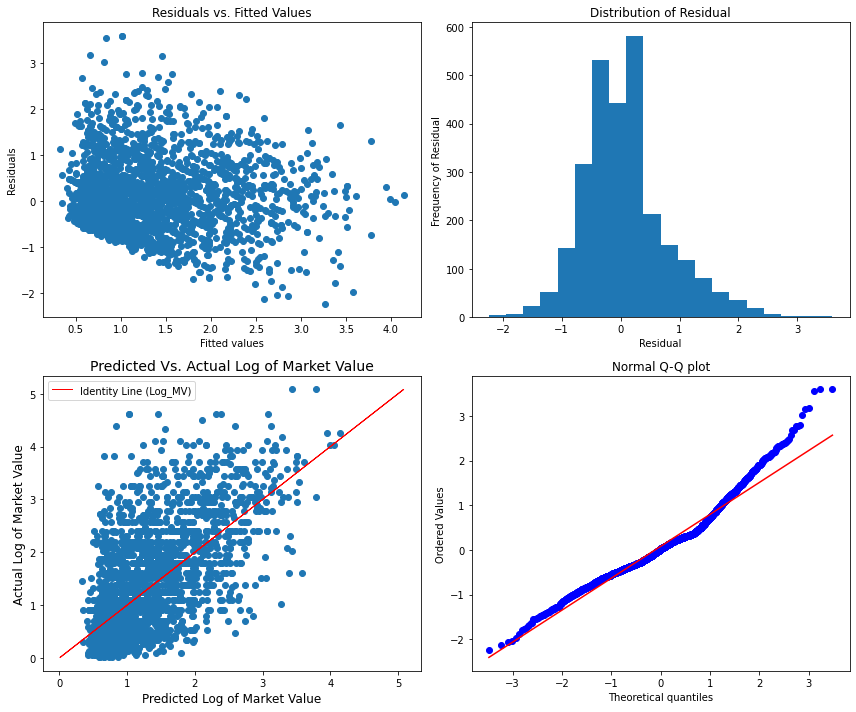

In [531]:
# Find the residuals and predicted values
SVR_model_2_predict = SVR_model_2.predict(X_4_test_scaled)
SVR_model_2_resid = y_4_log_test - SVR_model_2_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(SVR_model_2_predict, SVR_model_2_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(SVR_model_2_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(SVR_model_2_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red',linewidth=1, label='Identity Line (Log_MV)')
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(SVR_model_2_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

This is by far my best model in terms of R^2, residuals and also predictions.  

In [679]:
# Print the MAE
mean_SVR_model_2_mae = -np.mean(cross_val_score(SVR_model_2, X_4_train_scaled, y_4_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_SVR_model_2_mae

0.549359880112218

In [678]:
# Calculate the RMSE
SVR_model_2_cv_train = cross_val_score(SVR_model_2, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)
SVR_model_2_cv_test = cross_val_score(SVR_model_2, X_4_train_scaled, y_4_log_train, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
SVR_model_2_cv_train_mean = round(-(SVR_model_2_cv_train.mean()),2)
# Find the test Results
SVR_model_2_cv_test_mean = round(-(SVR_model_2_cv_test.mean()),2)

print(f'RMSE on train: {SVR_model_2_cv_train_mean}')
print(f'RMSE on test: {SVR_model_2_cv_test_mean}')

RMSE on train: 0.75
RMSE on test: 0.75


Both the MAE and RMSE are also lower than all of my models so far. I will now fit the data into a SVR model using a linear kernel to find the top 10 predictors with the help of the feature importances.

In [520]:
# Instantiate & fit the SVR model on the scaled data using hyperparameters 
SVR_model_3 = SVR(kernel='linear', C=1, epsilon=0.3, gamma='auto', max_iter=1000000)
SVR_model_3.fit(X_4_train_scaled, y_4_log_train)
# Print score
print(f"R^2 score on train set: {round(SVR_model_3.score(X_4_train_scaled, y_4_log_train),2)}")
print(f"R^2 score on test set: {round(SVR_model_3.score(X_4_test_scaled, y_4_log_test),2)}")

R^2 score on train set: 0.31
R^2 score on test set: 0.31


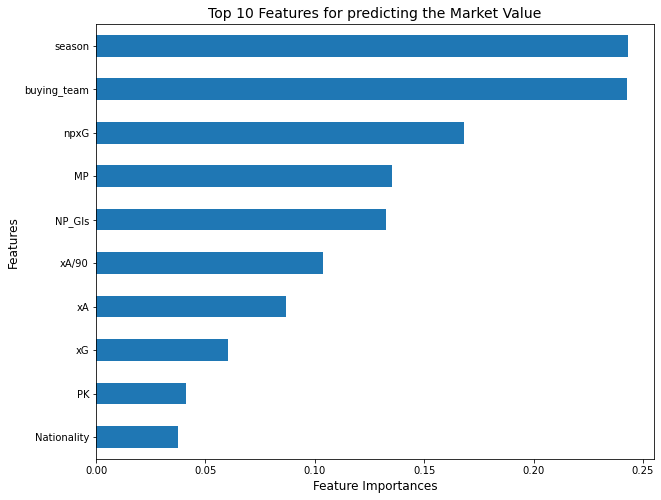

In [521]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(10,8))
plt.title('Top 10 Features for predicting the Market Value', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Extract the top 10 features
feat_importances = pd.Series(SVR_model_3.coef_[0], index = X_4_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

My featured engineered variable, Nationality is among the top 10 features for determining the Market Value. This means nationalities do matter when it comes to determining Market Value. 

Therefore these are the top predictors that has the most positive effect on the Market value:
1. `Season` - Year plays a role in determining the Market value of a player.
2. `buying_team` - the buying clubs. Teams add a certain degree of brand value to the players.
3. `npxG` - Non-Penalty expected Goals. The higher the better.
4. `MP` - Matches played by the player. The higher the better.
5. `NP_Gls` - Non-Penalty Goals. The higher the better.
6. `xA/90` -Expected Assists converted to per 90 minutes. The higher the better.
7. `xA` - Expected Assists. The higher the better.
8. `xG` - Expected Goals. The higher the better.
9. `PK` - Penalty Kicks made by the player. The higher the better.
10. `Nationality` - Nationality of the player. Europeans tend to have a higher market value than non-Europeans. 

On the other hand the following has a negative effect on the Market Value:
1. `player_age` - As the players get older, their stamina decreases and their performance declines. This results in the fall of their demand which in turn decreases their Market Value. Moreover, young players are considered as long term investment by the teams and so the demand for young players are higher than than older players.
2. `CrdY` - The number of yellow cards received by the player does matter. The higher the number of cards received the lower is the Market value.
3. `CrdR` - The number of red cards received by the player plays an important role in determining the Market Value as well. 

----

## Findings

I will create a dataframe to compare all of my model performance.

In [714]:
# Create a comparison dataframe with all the R^2, MAE and RMSE
comparison_df = pd.DataFrame(columns=['Model','R^2', 'MAE', 'RMSE'])
a=1

lr_r2 = round(lr_model_5.score(X_4_test_scaled, y_4_log_test),2)
lr_mae = round(np.expm1(mean_lr_model_5_mae),2)
lr_rmse = round(np.expm1(lr_model_5_cv_test_mean),2) 

ls_r2 = round(lasso_model_4.score(X_4_test_scaled, y_4_log_test),2)
ls_mae = round(np.expm1(mean_lasso_model_4_mae),2)
ls_rmse = round(np.expm1(lasso_model_4_cv_test_mean),2) 

r_r2 = round(ridge_model_4.score(X_4_test_scaled, y_4_log_test),2)
r_mae = round(np.expm1(mean_ridge_model_4_mae),2)
r_rmse = round(np.expm1(ridge_model_4_cv_test_mean),2) 

knn_r2 = round(KNN_model_3.score(X_4_test_scaled, y_4_log_test),2)
knn_mae = round(np.expm1(mean_KNN_model_3_mae),2)
knn_rmse = round(np.expm1(KNN_model_3_cv_test_mean),2)

dt_r2 = round(DT_model_2.score(X_4_test_scaled, y_4_log_test),2)
dt_mae = round(np.expm1(mean_DT_model_2_mae),2)
dt_rmse = round(np.expm1(DT_model_2_cv_test_mean),2)

svr_r2 = round(SVR_model_2.score(X_4_test_scaled, y_4_log_test),2)
svr_mae = round(np.expm1(mean_SVR_model_2_mae),2)
svr_rmse = round(np.expm1(SVR_model_2_cv_test_mean),2)

# Display the results in the dataframe
if a == 1: 
    #comparison_df.loc[0] = ['Baseline Model', baseline_r2, round(baseline_model_mae,2), baseline_cv_test_mean]
    comparison_df.loc[0] = ['Linear Regression', lr_r2, lr_mae, lr_rmse]
    comparison_df.loc[1] = ['Lasso', ls_r2, ls_mae, ls_rmse]
    comparison_df.loc[2] = ['Ridge', r_r2, r_mae, r_rmse]
    comparison_df.loc[3] = ['KNN Regressor', knn_r2, knn_mae, knn_rmse]
    comparison_df.loc[4] = ['DT Regressor', dt_r2, dt_mae, dt_rmse]
    comparison_df.loc[5] = ['SVR', svr_r2, svr_mae, svr_rmse]    
    
    a+=1
    
# Display the results
comparison_df

Model   R^2   MAE  RMSE
0  Linear Regression  0.33  0.86  1.20
1              Lasso  0.33  0.86  1.20
2              Ridge  0.33  0.86  1.20
3      KNN Regressor  0.40  0.72  1.16
4       DT Regressor  0.33  0.83  1.25
5                SVR  0.41  0.73  1.12

I will also create another dataframe for my baseline model.

In [726]:
# Create a comparison dataframe with all the R^2, MAE and RMSE
baseline_df = pd.DataFrame(columns=['Baseline','R^2', 'MAE', 'RMSE'])
a=1
# Display the results in the dataframe
if a == 1: 
    baseline_df.loc[0] = ['Baseline Model', baseline_r2, round(baseline_model_mae,2), baseline_cv_test_mean]
    
    a+=1
    
# Display the results
baseline_df    

Baseline  R^2   MAE   RMSE
0  Baseline Model  0.2  5.86  10.12

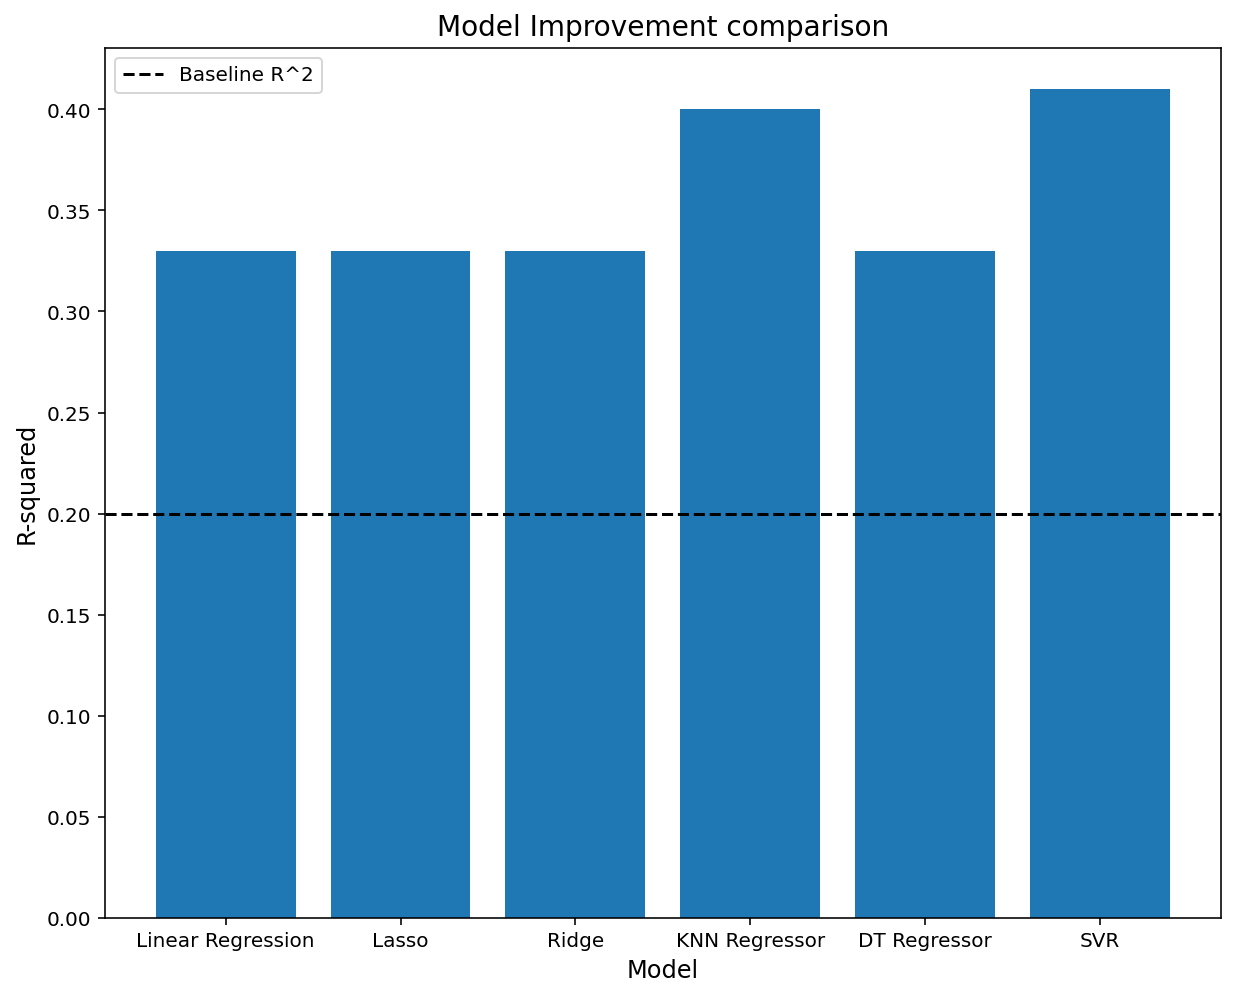

In [731]:
# visualizing the comparison of R^2 between each models
plt.figure(figsize=(10, 8))

plt.bar(comparison_df['Model'], comparison_df['R^2'])
plt.axhline(y=0.20, linestyle = 'dashed', color='black', label='Baseline R^2')
plt.title('Model Improvement comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.legend()

plt.show()

Looking at the R2 of all the models I can see that the SVR Regressor has the highest R2 compared to the other models followed by KNN Regressor. I will now compare the MAE and RMSE of all the models.

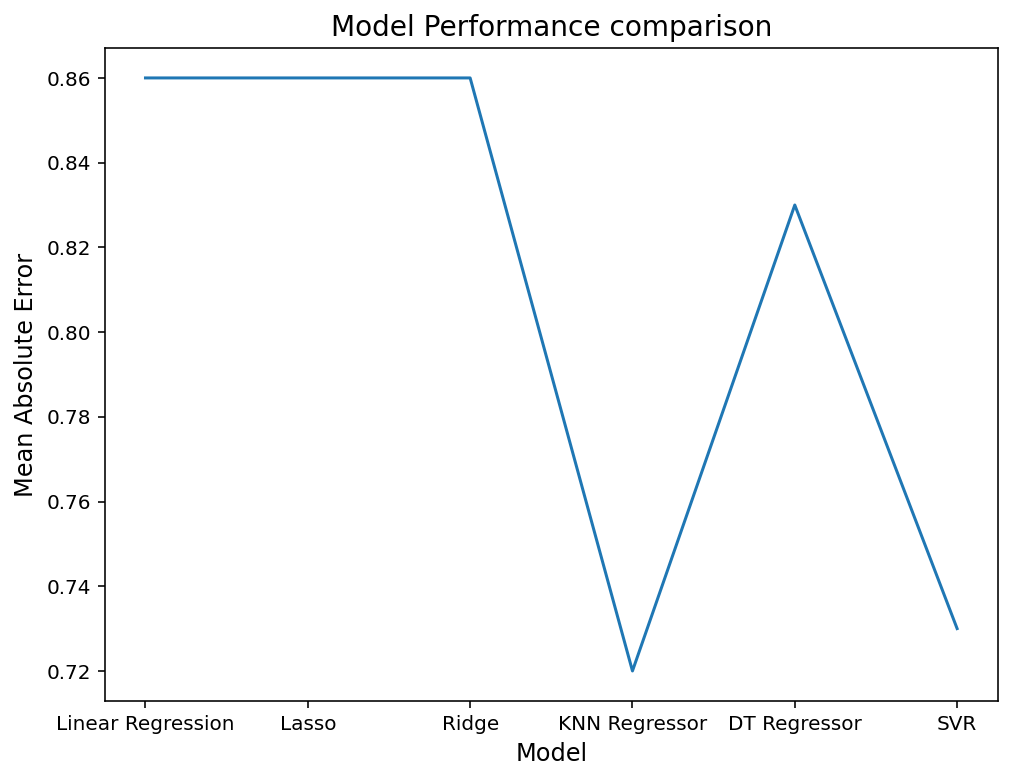

In [743]:
# visualizing the comparison of R^2 between each models
plt.figure(figsize=(8, 6))

plt.plot(comparison_df['Model'], comparison_df['MAE'])
plt.title('Model Performance comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)

plt.show()

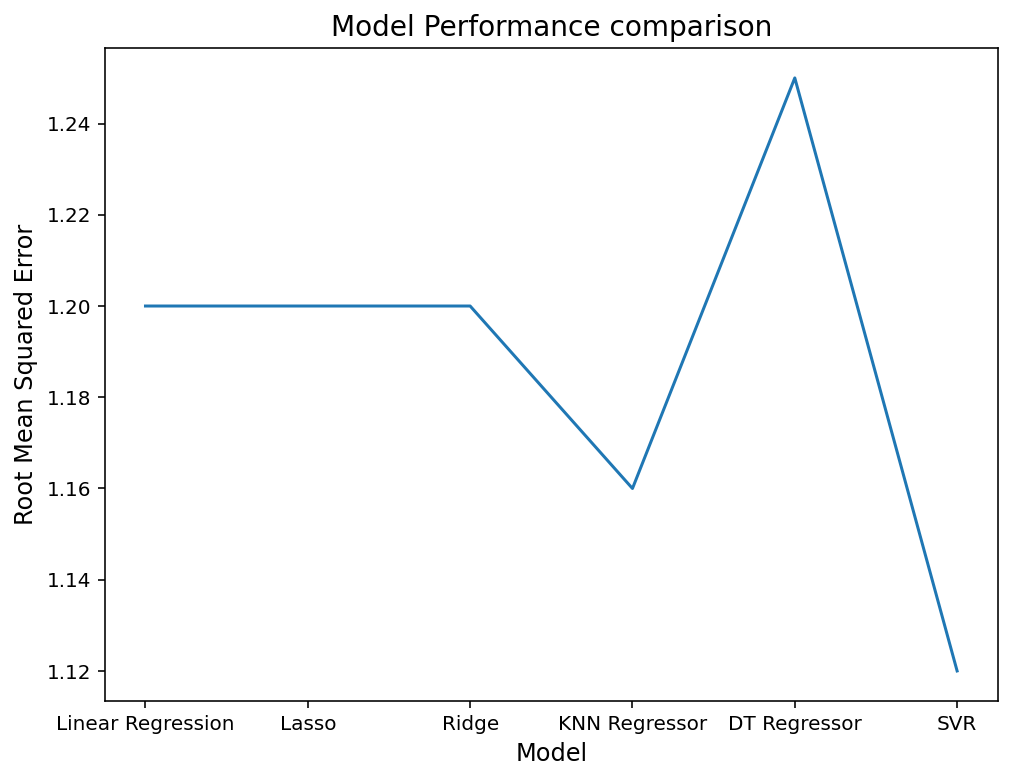

In [744]:
# visualizing the comparison of R^2 between each models
plt.figure(figsize=(8, 6))

plt.plot(comparison_df['Model'], comparison_df['RMSE'])
plt.title('Model Performance comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Root Mean Squared Error', fontsize=12)

plt.show()

Again the SVR model has the lowest Mean Absolute Errors between the true value and the predicted Market Value. The RMSE is also the lowest for the SVR model. Therefore, the SVR model worked best in predicting the Market Values of the players. I will look at the model predictions now and will also visualize the model predictions without the log value. That means I will see what happens when I "un-log" the values.

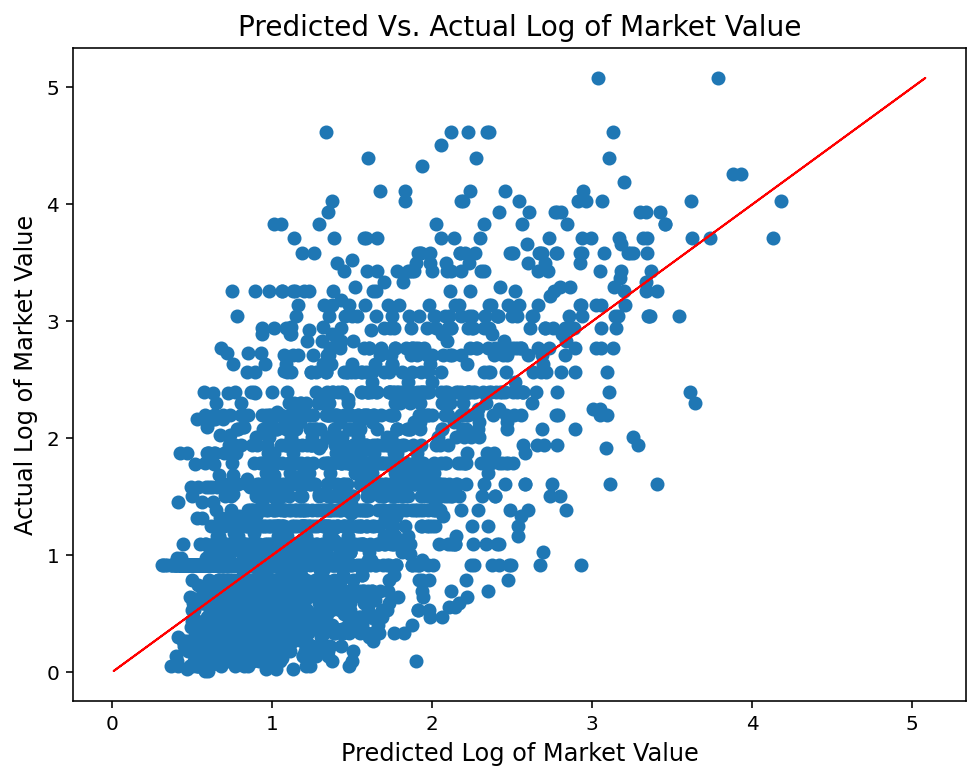

In [972]:
# Visualize Predicted vs. log of Actual Market Value
plt.figure(figsize=(8, 6))
plt.scatter(SVR_model_2_predict, y_4_log_test)
plt.plot(y_4_log_test, y_4_log_test, color='red',linewidth=1, label='Identity Line (Log_MV)')
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)
plt.legend()
plt.show()

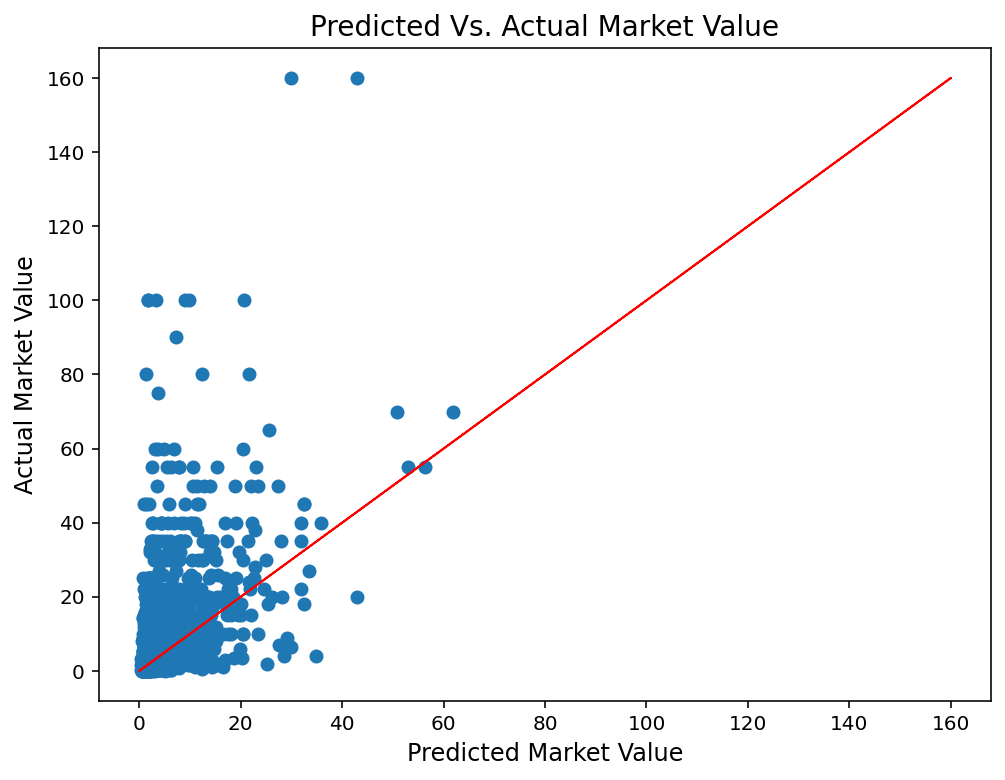

In [705]:
# Visulaize Predicted vs. Actual Market Value
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(SVR_model_2_predict), np.expm1(y_4_log_test))
plt.plot(np.expm1(y_4_log_test), np.expm1(y_4_log_test), color='red',linewidth=1)
plt.title('Predicted Vs. Actual Market Value', fontsize=14)
plt.xlabel('Predicted Market Value', fontsize=12)
plt.ylabel('Actual Market Value', fontsize=12)

plt.show()

In [ ]:
# Print the MAE with un-log
round(np.expm1(SVR_model_2_cv_test_mean),2)

When I “un-log” the predicted target variable and compare it with the original market value I can see that the predictions are not that good. Moreover, the Mean Absolute Error increases to 0.73 millions. The results are surprising, however I should highlight that this is the best model I could possibly achieve with the limited features that I chose. 

-----

## Conclusion

10 models have been used in this project to predict the player transfer market value. For model evaluation, **R<sup>2</sup>** metrics has been used as a measure of goodness of fit to measure the model accuracy and the **Mean Absolute Errors** has been calculated for each model to find the average absolute errors between the true market value and the predicted market values to measure the model performance. Additionally, the **Root Mean Squared Errors** has also been calculated as a scoring metrics. The results for each model has been compared to identify which model worked best to predict player Market Values with the highest R<sup>2</sup> and the lowest Mean Absolute Errors and Root Mean Squared Error.

Among all the models, the **SVR Regressor** had the best accuracy and performance with the highest R<sup>2</sup> and lowest MAE. The model had an error of around 0.7 million EUR with the model able to predict the Market Value best. Therefore, this model is good for predicting the Market Value of elite players who tend to have a higher Market value. 

I also found out the key predictors that determines the Player Market Value. The features that had the most positive
effect are **season/year** the Market Value was recorded, **current team** and **Nationality** the player belongs to. This is because the teams add a certain degree of brand value to the players and Europeans tend to have a higher market value than other nationalities. Player on-field performance like the **number of matches played**, **non-penalty goals**, **penalty kicks made** and player potential performance statistics like **non-penalty expected goals**, **expected assists** and **expected goals** had a strong positive effect on the market value. 

Features that had the most negative effect include **player age**, **number of yellow cards** and **red cards received**. As the player gets older, their stamina decreases, their performance deteriorates and since they can't perform well the demand to have them play in a club decreases along with their Market Value. A higher number of red and yellow cards could imply a disciplinary issue of the player character.

-------

## Drawbacks and Next Steps

There were some limitations to this project. First, I had data for only a limited number of players as I only used the players from 5 leagues. Secondly, I only had a limited number of features as my independent variables. Also my model is good for predicting the Market value of elite players who have a higher Market value.

In the second notebook, "***Nazhad Bari_Capstone Project - Notebook-II (Random Forest and Boosting)***" I went deeper into modeling the data by using more powerful models like Random Forest Regressor, AdaBoost Regressor, Gradient Boost Regressor and XGBoost Regressor. I compared results from both the notebooks and found the model that worked best to predict the Maket Values.

-----

I will export the `market_stats` dataframe and save it to my local computer folder for later use.

In [732]:
# Export the market_stats dataset to save in a local folder
market_stats.to_csv('data/market_val_stats.csv', index = False)

--------